# Saving our Phase Diagram

In our last trial, even though the digram is successfully created, some of the points are not so good as expected.
 - The edge points (or special points), e.g. those points in which any of `Jx, Jy, Jz` is zero.
 - The induced points. In the comb method, we first calculated the line `Jx = Jy`, and then make use of it to induce the following points which deviate from the original line. The overal trend is fine, but the absolute value of entanglement entropy is not so consistent with the result given by an independent computation.

Let's solve them one by one.

## Preparation

The first section is the import zone with no doubt!

In [17]:
""" In this script we will read out the psi for each point from the .h5 fiels in /data folder
"""
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from kitaev_ladder import KitaevLadderModel, load_data, run_atomic
from rotation import get_xyz, decimals

Then select the region we want to specify.
Considering the symmetry of Kitaev ladder, we can just choose the region

`Jx >= 0, Jy >= 0, Jz >= 0`

However, in our control system, the fundamental variables are `a` and `b` given by the following transformation:

`a = Jx + Jy`

`b = Jx - Jy`

which implies that it will be not so easy to use the region just mentioned.

Then we choose another region, `0 <= a <= 1` and `0 <= b <= 1`

In [18]:
a_start = 0
a_end = 1
a_number = 11

b_start = 0
b_end = 1
b_number = 11

a_list = np.linspace(a_start, a_end, a_number)
b_list = np.linspace(b_start, b_end, b_number)

a_list = np.round(a_list, decimals=decimals)
b_list = np.round(a_list, decimals=decimals)

In [19]:
for a in a_list: 
    for b in b_list:
        Jx, Jy, Jz = get_xyz(a, b, biased=False)
        if Jx==0 or Jy==0 or Jz==0:
            print(f"At the point (a, b) = ({a}, {b}), J = ({Jx}, {Jy}, {Jz})")

At the point (a, b) = (0.0, 0.0), J = (0.0, 0.0, 1.0)
At the point (a, b) = (0.0, 1.0), J = (0.5, -0.5, 0.0)
At the point (a, b) = (0.1, 0.1), J = (0.1, 0.0, 0.9)
At the point (a, b) = (0.1, 1.0), J = (0.55, -0.45, 0.0)
At the point (a, b) = (0.2, 0.2), J = (0.2, 0.0, 0.8)
At the point (a, b) = (0.2, 1.0), J = (0.6, -0.4, 0.0)
At the point (a, b) = (0.3, 0.3), J = (0.3, 0.0, 0.7)
At the point (a, b) = (0.3, 1.0), J = (0.65, -0.35, 0.0)
At the point (a, b) = (0.4, 0.4), J = (0.4, 0.0, 0.6)
At the point (a, b) = (0.4, 1.0), J = (0.7, -0.3, 0.0)
At the point (a, b) = (0.5, 0.5), J = (0.5, 0.0, 0.5)
At the point (a, b) = (0.5, 1.0), J = (0.75, -0.25, 0.0)
At the point (a, b) = (0.6, 0.6), J = (0.6, 0.0, 0.4)
At the point (a, b) = (0.6, 1.0), J = (0.8, -0.2, 0.0)
At the point (a, b) = (0.7, 0.7), J = (0.7, 0.0, 0.3)
At the point (a, b) = (0.7, 1.0), J = (0.85, -0.15, 0.0)
At the point (a, b) = (0.8, 0.8), J = (0.8, 0.0, 0.2)
At the point (a, b) = (0.8, 1.0), J = (0.9, -0.1, 0.0)
At the poin

Try calculating all the 121 points with brutal force.

System setting

In [42]:
L = 4
chi = 100
N_sweeps_check=5
max_sweeps=1000
verbose=1

In [39]:
def f(a, b):
    
    Jx, Jy, Jz = get_xyz(a, b)
    
    data = run_atomic(
        Jx=Jx, 
        Jy=Jy, 
        Jz=Jz, 
        L=L, 
        chi=chi, 
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose
    )
    if data==-1:
        print("No data!!!!!!!!!!!!!!!!!!")
        return np.nan
    psi = data['psi']
    
#     sweeps_stat = data['sweeps_stat']
# #     print("Sweeps: ", sweeps_stat['sweep'])
#     last_sweep = len(sweeps_stat['sweep']) * N_sweeps_check
#     max_sweeps = data['parameters']['max_sweeps']
    return float(np.mean(psi.entanglement_entropy()))
    if max_sweeps == last_sweep:
        return np.nan
    else:
        return float(np.mean(psi.entanglement_entropy()))

ff = np.frompyfunc(f, 2, 1)

In [40]:
A, B = np.meshgrid(a_list, b_list)

In [43]:
entanglement_entropy = ff(A, B)

Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.001 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=1.0 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250001249999048, S = nan, norm_err = 3.6e-14
Current memory usage 298.4 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8142e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [11, 10, 8, 11, 8, 10, 8, 11, 10, 10, 11, 9, 8, 11, 9, 11]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250001249999146, S = nan, norm_err = 3.1e-14
Current memory usage 298.7 MB, time elapsed: 6.4 s
Delta E = -1.9762e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (0.9999999999999996+2.1326256732789872e-16j)
After the canonicalization:
Bond dim =  [4, 8, 6, 8, 6, 8, 4, 8, 5, 8, 5, 8, 4, 8, 5, 8]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.05 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.9 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoS

Updating environment
..
sweep 80, age = 3920
Energy = -0.1118254418584144, S = 1.0494538013144696, norm_err = 1.7e-03
Current memory usage 330.2 MB, time elapsed: 329.5 s
Delta E = 1.4766e-04, Delta S = 2.4666e-02 (per sweep)
max_trunc_err = 1.1022e-09, max_E_trunc = -1.7337e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 85, age = 4144
Energy = -0.0969859380045452, S = 1.0950998757743369, norm_err = 4.0e-02
Current memory usage 330.2 MB, time elapsed: 349.4 s
Delta E = 2.9679e-03, Delta S = 9.1292e-03 (per sweep)
max_trunc_err = 1.7656e-09, max_E_trunc = -4.4895e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 90, age = 4368
Energy = -0.1110637556370300, S = 0.9874060506406295, norm_err = 1.3e-03
Current memory usage 330.2 MB, time elapsed: 369.6 s
Delta E = -2.8156e-03, Delta S = -2.1539e-02 (per sweep)
max_trun

Updating environment
..
sweep 170, age = 7952
Energy = -0.1018438198716396, S = 0.9810080007819806, norm_err = 3.2e-02
Current memory usage 330.2 MB, time elapsed: 691.2 s
Delta E = -2.0901e-03, Delta S = -3.9921e-02 (per sweep)
max_trunc_err = 7.1063e-09, max_E_trunc = -1.0232e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 175, age = 8176
Energy = -0.1113494938166681, S = 0.9572125625197130, norm_err = 3.3e-03
Current memory usage 330.2 MB, time elapsed: 711.1 s
Delta E = -1.9011e-03, Delta S = -4.7591e-03 (per sweep)
max_trunc_err = 1.8891e-09, max_E_trunc = -2.5216e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 180, age = 8400
Energy = -0.1109739506329817, S = 0.8926014171733100, norm_err = 2.6e-03
Current memory usage 330.2 MB, time elapsed: 731.2 s
Delta E = 7.5109e-05, Delta S = -1.2922e-02 (per sweep)
ma

Updating environment
..
sweep 260, age = 11984
Energy = -0.0503654102001789, S = 1.2922842941616228, norm_err = 1.7e-01
Current memory usage 330.2 MB, time elapsed: 1053.7 s
Delta E = 1.0308e-02, Delta S = 5.0282e-02 (per sweep)
max_trunc_err = 4.6653e-09, max_E_trunc = -2.0464e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 265, age = 12208
Energy = 0.0711217596592917, S = 3.0827876771175706, norm_err = 5.9e-02
Current memory usage 330.2 MB, time elapsed: 1073.7 s
Delta E = 2.4297e-02, Delta S = 3.5810e-01 (per sweep)
max_trunc_err = 2.6300e-09, max_E_trunc = -7.6170e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 270, age = 12432
Energy = -0.1125412091559639, S = 0.7213424310178382, norm_err = 6.1e-05
Current memory usage 330.6 MB, time elapsed: 1093.9 s
Delta E = -3.6733e-02, Delta S = -4.7229e-01 (per sweep)


Updating environment
..
sweep 350, age = 16016
Energy = -0.1065393880751273, S = 1.0614566529870821, norm_err = 1.0e-02
Current memory usage 331.8 MB, time elapsed: 1413.2 s
Delta E = -1.3793e-02, Delta S = -4.7510e-02 (per sweep)
max_trunc_err = 1.1666e-09, max_E_trunc = 5.9117e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 355, age = 16240
Energy = -0.1127939247183747, S = 0.9813888471233975, norm_err = 8.1e-05
Current memory usage 332.0 MB, time elapsed: 1433.2 s
Delta E = -1.2509e-03, Delta S = -1.6014e-02 (per sweep)
max_trunc_err = 9.6214e-10, max_E_trunc = -4.2587e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 360, age = 16464
Energy = -0.1049673729957590, S = 0.8804887425316554, norm_err = 2.0e-02
Current memory usage 332.3 MB, time elapsed: 1453.2 s
Delta E = 1.5653e-03, Delta S = -2.0180e-02 (per swee

norm_tol=1.00e-05 not reached, norm_err=2.67e-04
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
DMRG finished after 435 sweeps.
total size = 19952, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000061139032-2.868629541807194e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.1 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.8 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSit

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0933312166305534, S = nan, norm_err = 8.6e-03
Current memory usage 344.0 MB, time elapsed: 15.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7343e-09, max_E_trunc = 3.0198e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = 0.0488896787158719, S = nan, norm_err = 2.2e-01
Current memory usage 344.0 MB, time elapsed: 40.3 s
Delta E = 2.8444e-02, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (0.9999999999999983-8.273987235369457e-17j)
After the canonicalization:
Bond dim =  [16, 19, 22, 30, 23, 24, 14, 20, 12, 20, 12, 20, 12, 20, 14, 20]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.15 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.7 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811891513+4.071569470465164e-13j)
After the canonicalization:
Bond dim =  [7, 14, 14, 20, 14, 20, 14, 20, 14, 20, 14, 20, 14, 20, 14, 14]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.6 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0827429596121181, S = nan, norm_err = 3.3e-13
Current memory usage 344.0 MB, time elapsed: 7.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1073e-19, max_E_trunc = 7.4607e-14
MPS bond dimensions: [42, 45, 30, 48, 48, 52, 46, 50, 49, 56, 49, 54, 48, 55, 50, 50]
Updating environment
..
sweep 10, age = 784
Energy = -0.0827429596121132, S = nan, norm_err = 6.4e-13
Current memory usage 344.0 MB, time elapsed: 13.4 s
Delta E = 9.7700e-16, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071078358780519-2.425562477954802e-12j)
After the canonicalization:
Bond dim =  [11, 20, 22, 28, 22, 28, 22, 28, 22, 28, 22, 28, 22, 28, 22, 22]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.25 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0760004202140621, S = nan, norm_err = 6.9e-13
Current memory usage 344.0 MB, time elapsed: 7.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0273e-19, max_E_trunc = 8.8818e-15
MPS bond dimensions: [50, 60, 38, 66, 68, 77, 68, 77, 66, 80, 73, 78, 71, 80, 71, 67]
Updating environment
..
sweep 10, age = 784
Energy = -0.0760004202140643, S = nan, norm_err = 9.0e-13
Current memory usage 344.0 MB, time elapsed: 15.9 s
Delta E = -4.4409e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071080368811947+2.2035889461350068e-13j)
After the canonicalization:
Bond dim =  [15, 28, 29, 40, 29, 40, 29, 40, 29, 40, 28, 40, 29, 40, 29, 28]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.3 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0715139925305555, S = nan, norm_err = 5.8e-11
Current memory usage 344.0 MB, time elapsed: 9.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8268e-18, max_E_trunc = 1.0658e-14
MPS bond dimensions: [67, 84, 53, 88, 96, 100, 93, 100, 91, 100, 90, 100, 92, 100, 92, 89]
Updating environment
..
sweep 10, age = 784
Energy = -0.0715139925305597, S = nan, norm_err = 7.0e-13
Current memory usage 344.0 MB, time elapsed: 20.5 s
Delta E = -8.4377e-16, Delta S = 0.0000e+00 (per sweep)


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.00033813503292664734-0.0003448931327136197j)
After the canonicalization:
Bond dim =  [37, 51, 40, 50, 39, 51, 41, 66, 50, 68, 50, 66, 49, 64, 48, 49]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.35 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695233934866190, S = nan, norm_err = 4.4e-09
Current memory usage 344.0 MB, time elapsed: 11.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2117e-15, max_E_trunc = 3.9968e-15
MPS bond dimensions: [100, 100, 77, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695233934866187, S = nan, norm_err = 1.6e-12
Current memory usage 344.0 MB, time elapsed: 21.1 s
Delta E = 4.9960e-17, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999725-8.881784197001252e-16j)
After the canonicalization:
Bond dim =  [56, 76, 56, 76, 56, 76, 56, 76, 56, 76, 56, 76, 56, 76, 56, 76]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0701417762772432, S = nan, norm_err = 5.3e-06
Current memory usage 344.0 MB, time elapsed: 16.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2820e-13, max_E_trunc = 2.4980e-13
MPS bond dimensions: [100, 100, 98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0701417762776991, S = nan, norm_err = 4.4e-11
Current memory usage 344.0 MB, time elapsed: 26.0 s
Delta E = -9.1188e-14, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7314882517887569-1.913633331520355e-11j)
After the canonicalization:
Bond dim =  [48, 86, 92, 100, 92, 100, 93, 100, 92, 100, 92, 100, 92, 100, 92, 89]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=0.45 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0734230383213643, S = nan, norm_err = 2.2e-03
Current memory usage 344.1 MB, time elapsed: 18.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1268e-10, max_E_trunc = 8.2983e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0734231110148504, S = nan, norm_err = 4.6e-06
Current memory usage 344.1 MB, time elapsed: 28.9 s
Delta E = -1.4539e-08, Delta S = 0.0000e+00 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0795705460355671, S = nan, norm_err = 8.3e-03
Current memory usage 353.9 MB, time elapsed: 17.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3969e-09, max_E_trunc = 2.4964e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0795767163571095, S = nan, norm_err = 4.1e-03
Current memory usage 353.9 MB, time elapsed: 31.1 s
Delta E = -1.2341e-06, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0795773586656967, S = 1.1516235897517260, norm_err = 4.5e-05
Current memory usage 353.9 MB, time elapsed: 134.2 s
Delta E = -6.3686e-12, Delta S = 7.7900e-05 (per sweep)
max_trunc_err = 6.7527e-07, max_E_trunc = 5.4390e-07
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
norm_tol=1.00e-05 not reached, norm_err=4.51e-05
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.45e-05
Call psi.canonical_form()
DMRG finished after 90 sweeps.
total size = 4688, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047-1.416982314966243e-15j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.05 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.9 for config KitaevLadderModel


==============

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0550098670936430, S = nan, norm_err = 1.0e-02
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.6805e-08, max_E_trunc = -1.0859e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = 0.0026917519150724, S = nan, norm_err = 1.5e-01
Current memory usage 353.9 MB, time elapsed: 40.4 s
Delta E = 1.1540e-02, Delta S = 0.0000e+00 (

Updating environment
..
sweep 90, age = 4368
Energy = -0.1121048400168654, S = 0.9135467147946321, norm_err = 1.9e-05
Current memory usage 353.9 MB, time elapsed: 354.3 s
Delta E = -3.2755e-04, Delta S = -1.4099e-02 (per sweep)
max_trunc_err = 1.1755e-09, max_E_trunc = -8.1286e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.1109546412387807, S = 0.7356542098975851, norm_err = 2.4e-03
Current memory usage 353.9 MB, time elapsed: 373.8 s
Delta E = 2.3004e-04, Delta S = -3.5579e-02 (per sweep)
max_trunc_err = 2.5335e-09, max_E_trunc = -4.0927e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.1121749980108806, S = 0.9171546464120082, norm_err = 2.9e-05
Current memory usage 353.9 MB, time elapsed: 393.4 s
Delta E = -2.4407e-04, Delta S = 3.6300e-02 (per sweep)
max_t

Updating environment
..
sweep 180, age = 8400
Energy = 0.1449627141125731, S = 3.0099066456181252, norm_err = 2.5e-01
Current memory usage 353.9 MB, time elapsed: 707.3 s
Delta E = 5.1530e-02, Delta S = 4.0548e-01 (per sweep)
max_trunc_err = 2.9343e-09, max_E_trunc = -9.0949e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.1125957831365660, S = 0.8475252084100486, norm_err = 1.9e-04
Current memory usage 353.9 MB, time elapsed: 726.9 s
Delta E = -5.1512e-02, Delta S = -4.3248e-01 (per sweep)
max_trunc_err = 2.2530e-09, max_E_trunc = -4.0950e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.1111278103463285, S = 0.9085306807273218, norm_err = 2.7e-03
Current memory usage 353.9 MB, time elapsed: 746.5 s
Delta E = 2.9359e-04, Delta S = 1.2201e-02 (per sweep)
max_tr

Updating environment
..
sweep 270, age = 12432
Energy = 0.1753615862189761, S = 3.2094703185772406, norm_err = 4.0e-02
Current memory usage 353.9 MB, time elapsed: 1058.5 s
Delta E = 5.7568e-02, Delta S = 4.8100e-01 (per sweep)
max_trunc_err = 1.6218e-08, max_E_trunc = 3.4106e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 275, age = 12656
Energy = -0.1125973756278427, S = 0.8078868254203745, norm_err = 8.4e-05
Current memory usage 353.9 MB, time elapsed: 1077.8 s
Delta E = -5.7592e-02, Delta S = -4.8032e-01 (per sweep)
max_trunc_err = 1.4674e-09, max_E_trunc = -2.2965e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 280, age = 12880
Energy = -0.1126102745574542, S = 0.9088715858794268, norm_err = 4.8e-05
Current memory usage 353.9 MB, time elapsed: 1097.2 s
Delta E = -2.5798e-06, Delta S = 2.0197e-02 (per sweep)


Updating environment
..
sweep 360, age = 16464
Energy = -0.1117357582139675, S = 0.9020029452729430, norm_err = 2.3e-05
Current memory usage 353.9 MB, time elapsed: 1410.0 s
Delta E = 1.8631e-04, Delta S = -1.0547e-02 (per sweep)
max_trunc_err = 1.2788e-08, max_E_trunc = -8.4810e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 365, age = 16688
Energy = -0.1102884613560420, S = 0.9835498739923565, norm_err = 5.1e-03
Current memory usage 353.9 MB, time elapsed: 1429.5 s
Delta E = 2.8946e-04, Delta S = 1.6309e-02 (per sweep)
max_trunc_err = 3.2536e-09, max_E_trunc = -1.3165e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 370, age = 16912
Energy = -0.1118159881349499, S = 1.0042524506568398, norm_err = 1.2e-03
Current memory usage 353.9 MB, time elapsed: 1449.0 s
Delta E = -3.0551e-04, Delta S = 4.1405e-03 (per sweep)

Updating environment
..
sweep 450, age = 20496
Energy = 0.1034424695564979, S = 2.2172322988099857, norm_err = 4.9e-01
Current memory usage 353.9 MB, time elapsed: 1761.0 s
Delta E = 4.2594e-02, Delta S = 2.4107e-01 (per sweep)
max_trunc_err = 2.9762e-09, max_E_trunc = -1.4097e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 455, age = 20720
Energy = -0.1125902800750822, S = 0.8796431576577723, norm_err = 1.7e-04
Current memory usage 353.9 MB, time elapsed: 1780.4 s
Delta E = -4.3207e-02, Delta S = -2.6752e-01 (per sweep)
max_trunc_err = 1.9323e-09, max_E_trunc = -7.3214e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 460, age = 20944
Energy = -0.1106870241898434, S = 0.9370882042431079, norm_err = 4.9e-04
Current memory usage 353.9 MB, time elapsed: 1801.9 s
Delta E = 3.8065e-04, Delta S = 1.1489e-02 (per sweep)


Updating environment
..
sweep 540, age = 24528
Energy = -0.1011450353758221, S = 1.0435238891198271, norm_err = 2.9e-02
Current memory usage 353.9 MB, time elapsed: 2123.7 s
Delta E = 1.0692e-03, Delta S = 1.7568e-02 (per sweep)
max_trunc_err = 4.8603e-09, max_E_trunc = 9.0949e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 545, age = 24752
Energy = -0.1121940432299340, S = 0.9178876719817932, norm_err = 6.1e-04
Current memory usage 353.9 MB, time elapsed: 2143.5 s
Delta E = -2.2098e-03, Delta S = -2.5127e-02 (per sweep)
max_trunc_err = 4.5601e-09, max_E_trunc = -2.1828e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 550, age = 24976
Energy = -0.1113823209369116, S = 0.9501327483794453, norm_err = 3.0e-03
Current memory usage 353.9 MB, time elapsed: 2163.3 s
Delta E = 1.6234e-04, Delta S = 6.4490e-03 (per sweep)


Updating environment
..
sweep 630, age = 28560
Energy = -0.0879585479696630, S = 1.1072828629608824, norm_err = 8.1e-02
Current memory usage 353.9 MB, time elapsed: 2483.1 s
Delta E = 4.8569e-03, Delta S = 5.1719e-02 (per sweep)
max_trunc_err = 1.0038e-09, max_E_trunc = -2.8240e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 635, age = 28784
Energy = -0.1110948640692300, S = 0.9615176083526884, norm_err = 1.8e-03
Current memory usage 353.9 MB, time elapsed: 2503.1 s
Delta E = -4.6273e-03, Delta S = -2.9153e-02 (per sweep)
max_trunc_err = 4.8553e-09, max_E_trunc = -1.1687e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 640, age = 29008
Energy = 0.1657099178060832, S = 2.5920382448496326, norm_err = 4.7e-01
Current memory usage 353.9 MB, time elapsed: 2523.0 s
Delta E = 5.5361e-02, Delta S = 3.2610e-01 (per sweep)


Updating environment
..
sweep 720, age = 32592
Energy = 0.1755546845796516, S = 2.5152400434744075, norm_err = 5.2e-01
Current memory usage 353.9 MB, time elapsed: 2840.9 s
Delta E = 5.2717e-02, Delta S = 2.8734e-01 (per sweep)
max_trunc_err = 7.8934e-09, max_E_trunc = 1.1823e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 725, age = 32816
Energy = -0.1119107788091753, S = 0.9311122368946245, norm_err = 5.7e-05
Current memory usage 353.9 MB, time elapsed: 2860.6 s
Delta E = -5.7493e-02, Delta S = -3.1683e-01 (per sweep)
max_trunc_err = 1.1250e-09, max_E_trunc = -1.4552e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 730, age = 33040
Energy = -0.0797728861478930, S = 1.1815142054384522, norm_err = 6.7e-02
Current memory usage 353.9 MB, time elapsed: 2880.3 s
Delta E = 6.4276e-03, Delta S = 5.0080e-02 (per sweep)
m

Updating environment
..
sweep 810, age = 36624
Energy = -0.0489679049230318, S = 1.2758650777703877, norm_err = 2.0e-01
Current memory usage 353.9 MB, time elapsed: 3195.9 s
Delta E = 1.2645e-02, Delta S = 6.4669e-02 (per sweep)
max_trunc_err = 3.1550e-09, max_E_trunc = 4.5475e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 815, age = 36848
Energy = -0.1123568632317955, S = 0.8482547060282968, norm_err = 6.3e-04
Current memory usage 353.9 MB, time elapsed: 3215.6 s
Delta E = -1.2678e-02, Delta S = -8.5522e-02 (per sweep)
max_trunc_err = 1.7101e-09, max_E_trunc = -1.4688e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 820, age = 37072
Energy = 0.1083245955576899, S = 2.2472901403894650, norm_err = 4.7e-01
Current memory usage 353.9 MB, time elapsed: 3235.3 s
Delta E = 4.4136e-02, Delta S = 2.7981e-01 (per sweep)
m

Updating environment
..
sweep 900, age = 40656
Energy = -0.1103434035181294, S = 0.9464222634320143, norm_err = 1.4e-06
Current memory usage 353.9 MB, time elapsed: 3551.0 s
Delta E = 4.7466e-04, Delta S = 1.0140e-02 (per sweep)
max_trunc_err = 6.6882e-09, max_E_trunc = 9.0949e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 905, age = 40880
Energy = -0.1121032982250370, S = 0.8934464966324420, norm_err = 9.5e-05
Current memory usage 353.9 MB, time elapsed: 3570.7 s
Delta E = -3.5198e-04, Delta S = -1.0595e-02 (per sweep)
max_trunc_err = 3.5620e-09, max_E_trunc = -1.3733e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 910, age = 41104
Energy = -0.0869799662451669, S = 1.0885580923825231, norm_err = 6.3e-02
Current memory usage 353.9 MB, time elapsed: 3590.4 s
Delta E = 5.0247e-03, Delta S = 3.9022e-02 (per sweep)


Updating environment
..
sweep 990, age = 44688
Energy = -0.1124449180904037, S = 0.9582502760317770, norm_err = 5.4e-05
Current memory usage 353.9 MB, time elapsed: 3904.7 s
Delta E = -9.7278e-03, Delta S = -7.6866e-02 (per sweep)
max_trunc_err = 7.0801e-09, max_E_trunc = 7.2760e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 995, age = 44912
Energy = -0.1125832624779264, S = 0.9971605178376710, norm_err = 3.3e-05
Current memory usage 353.9 MB, time elapsed: 3924.4 s
Delta E = -2.7669e-05, Delta S = 7.7820e-03 (per sweep)
max_trunc_err = 3.3980e-09, max_E_trunc = -6.9758e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 1000, age = 45136
Energy = 0.1932685216546588, S = 2.5600363348666315, norm_err = 3.7e-01
Current memory usage 353.9 MB, time elapsed: 3944.1 s
Delta E = 6.1170e-02, Delta S = 3.1258e-01 (per sweep)

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
DMRG finished after 1000 sweeps.
total size = 45264, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000003294311+3.8063421362644334e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.1 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.9 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config Tw

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1128544303906123, S = nan, norm_err = 2.4e-08
Current memory usage 353.9 MB, time elapsed: 15.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6833e-13, max_E_trunc = 5.3291e-15
MPS bond dimensions: [100, 64, 85, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.1128544324608909, S = nan, norm_err = 1.5e-08
Current memory usage 353.9 MB, time elapsed: 38.4 s
Delta E = -4.1406e-10, Delta S = 0.0000e+00 (p

DMRG finished after 85 sweeps.
total size = 4144, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000482231+2.0658904450009356e-17j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.15 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.8 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0947841238074490, S = nan, norm_err = 4.5e-03
Current memory usage 353.9 MB, time elapsed: 15.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2885e-09, max_E_trunc = 2.1316e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0919661532872889, S = nan, norm_err = 9.3e-03
Current memory usage 353.9 MB, time elapsed: 38.1 s
Delta E = 5.6359e-04, Delta S = 0.0000e+00 (

Updating environment
..
sweep 90, age = 4368
Energy = -0.1011480067332737, S = 0.8319933882250007, norm_err = 8.1e-06
Current memory usage 353.9 MB, time elapsed: 328.8 s
Delta E = -8.7702e-03, Delta S = -9.9127e-02 (per sweep)
max_trunc_err = 3.7396e-08, max_E_trunc = 3.4106e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = 0.0878905758158730, S = 2.2914937983702202, norm_err = 3.7e-01
Current memory usage 353.9 MB, time elapsed: 347.7 s
Delta E = 3.7808e-02, Delta S = 2.9190e-01 (per sweep)
max_trunc_err = 8.2815e-09, max_E_trunc = 9.6634e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0636122633671743, S = 1.1461212740754179, norm_err = 1.3e-01
Current memory usage 353.9 MB, time elapsed: 367.9 s
Delta E = -3.0301e-02, Delta S = -2.2907e-01 (per sweep)
max_trun

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000006587271+5.03076447812051e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.7 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0914073169287404, S = nan, norm_err = 1.1e-12
Current memory usage 353.9 MB, time elapsed: 5.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0368e-19, max_E_trunc = 1.7764e-14
MPS bond dimensions: [27, 33, 20, 34, 34, 39, 33, 40, 34, 43, 40, 43, 37, 41, 38, 31]
Updating environment
..
sweep 10, age = 784
Energy = -0.0914073169287442, S = nan, norm_err = 8.4e-13
Current memory usage 353.9 MB, time elapsed: 11.9 s
Delta E = -7.4385e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865507-7.875663215659544e-15j)
After the canonicalization:
Bond dim =  [7, 14, 14, 24, 14, 20, 14, 24, 14, 20, 14, 24, 14, 20, 14, 14]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.25 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.6 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0827869489328047, S = nan, norm_err = 4.4e-13
Current memory usage 353.9 MB, time elapsed: 7.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2075e-20, max_E_trunc = 2.6645e-14
MPS bond dimensions: [37, 42, 31, 45, 46, 54, 50, 58, 52, 56, 49, 54, 45, 51, 41, 46]
Updating environment
..
sweep 10, age = 784
Energy = -0.0827869489327995, S = nan, norm_err = 1.1e-12
Current memory usage 353.9 MB, time elapsed: 15.3 s
Delta E = 1.0436e-15, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.707130601490469-9.989120154224612e-13j)
After the canonicalization:
Bond dim =  [11, 20, 22, 28, 22, 24, 22, 28, 22, 24, 22, 28, 22, 24, 22, 20]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.3 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0760914248439678, S = nan, norm_err = 3.2e-12
Current memory usage 353.9 MB, time elapsed: 9.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2515e-19, max_E_trunc = 1.9540e-14
MPS bond dimensions: [51, 60, 40, 65, 66, 79, 70, 80, 72, 84, 70, 84, 71, 81, 68, 64]
Updating environment
..
sweep 10, age = 784
Energy = -0.0760914248439721, S = nan, norm_err = 6.5e-13
Current memory usage 353.9 MB, time elapsed: 18.2 s
Delta E = -8.6597e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7085093002765496+6.431024538177065e-13j)
After the canonicalization:
Bond dim =  [15, 30, 30, 40, 30, 44, 30, 40, 30, 44, 30, 40, 30, 44, 30, 28]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.35 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0716813529449210, S = nan, norm_err = 3.4e-10
Current memory usage 353.9 MB, time elapsed: 12.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1234e-18, max_E_trunc = 2.1316e-14
MPS bond dimensions: [69, 84, 57, 95, 94, 100, 93, 100, 94, 99, 93, 100, 95, 100, 92, 91]
Updating environment
..
sweep 10, age = 784
Energy = -0.0716813529449190, S = nan, norm_err = 8.6e-13
Current memory usage 353.9 MB, time elapsed: 24.9 s
Delta E = 3.9968e-16, Delta S = 0.0000e+00 (per sweep)
m

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811873077+3.1633029529132273e-13j)
After the canonicalization:
Bond dim =  [21, 42, 42, 52, 42, 60, 42, 52, 42, 60, 42, 52, 42, 60, 42, 39]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0698051184245831, S = nan, norm_err = 1.4e-06
Current memory usage 353.9 MB, time elapsed: 16.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6473e-15, max_E_trunc = 1.9540e-14
MPS bond dimensions: [100, 100, 81, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0698051184246089, S = nan, norm_err = 6.5e-12
Current memory usage 353.9 MB, time elapsed: 26.8 s
Delta E = -5.1514e-15, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.00010013075376634069+3.558453115468224e-05j)
After the canonicalization:
Bond dim =  [49, 52, 45, 48, 48, 62, 62, 72, 63, 72, 63, 66, 58, 68, 59, 63]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0705936300166286, S = nan, norm_err = 1.3e-03
Current memory usage 353.9 MB, time elapsed: 18.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8565e-12, max_E_trunc = 8.8818e-13
MPS bond dimensions: [100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0705936505307656, S = nan, norm_err = 1.3e-06
Current memory usage 353.9 MB, time elapsed: 29.8 s
Delta E = -4.1028e-09, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071283292956261-2.8817361572773233e-11j)
After the canonicalization:
Bond dim =  [48, 88, 91, 100, 90, 100, 94, 100, 91, 100, 93, 100, 91, 100, 94, 86]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0741868946135747, S = nan, norm_err = 3.6e-03
Current memory usage 353.9 MB, time elapsed: 17.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9457e-11, max_E_trunc = 2.3407e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0741881935419244, S = nan, norm_err = 1.9e-03
Current memory usage 353.9 MB, time elapsed: 35.4 s
Delta E = -2.5979e-07, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0741885232279227, S = 1.5140991105934645, norm_err = 9.0e-05
Current memory usage 353.9 MB, time elapsed: 143.8 s
Delta E = 2.3309e-12, Delta S = 4.4417e-04 (per sweep)
max_trunc_err = 1.2458e-08, max_E_trunc = 1.2444e-08
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0741885233511290, S = 1.5160160518472119, norm_err = 8.3e-05
Current memory usage 353.9 MB, time elapsed: 149.7 s
Delta E = -2.4641e-11, Delta S = 3.8339e-04 (per sweep)
max_trunc_err = 1.2937e-08, max_E_trunc = 1.2867e-08
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0741885234411441, S = 1.5176949989960560, norm_err = 7.2e-05
Current memory usage 353.9 MB, time elapsed: 155.7 s
Delta E = -1.8003e-11, Delta S = 3.3579e-04 (per sweep)
max_trunc

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.37e-05
Call psi.canonical_form()
DMRG finished after 150 sweeps.
total size = 7376, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047+4.90977832568918e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.45 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


=============

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0808502623647402, S = nan, norm_err = 7.5e-07
Current memory usage 353.9 MB, time elapsed: 17.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5238e-11, max_E_trunc = 1.0420e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0808502626149714, S = nan, norm_err = 4.7e-07
Current memory usage 353.9 MB, time elapsed: 39.6 s
Delta E = -5.0046e-11, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0808502760033392, S = 0.7369007314299059, norm_err = 1.6e-07
Current memory usage 353.9 MB, time elapsed: 352.8 s
Delta E = -1.6623e-10, Delta S = 3.8720e-03 (per sweep)
max_trunc_err = 4.4703e-11, max_E_trunc = 4.4565e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0808502766631420, S = 0.7521585984639401, norm_err = 1.3e-07
Current memory usage 353.9 MB, time elapsed: 372.3 s
Delta E = -1.3196e-10, Delta S = 3.0516e-03 (per sweep)
max_trunc_err = 2.9668e-11, max_E_trunc = 3.5925e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0808502774684445, S = 0.7709801216556225, norm_err = 3.7e-07
Current memory usage 353.9 MB, time elapsed: 391.9 s
Delta E = -1.6106e-10, Delta S = 3.7643e-03 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 8400
Energy = -0.0808502897950625, S = 1.0147803039125618, norm_err = 1.7e-07
Current memory usage 353.9 MB, time elapsed: 693.8 s
Delta E = -2.0985e-10, Delta S = 3.2776e-03 (per sweep)
max_trunc_err = 6.5911e-11, max_E_trunc = 8.0149e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.0808502905231840, S = 1.0259504823835022, norm_err = 2.9e-07
Current memory usage 353.9 MB, time elapsed: 712.9 s
Delta E = -1.4562e-10, Delta S = 2.2340e-03 (per sweep)
max_trunc_err = 7.2109e-11, max_E_trunc = 8.6402e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.0808502910295061, S = 1.0333263532346488, norm_err = 2.7e-07
Current memory usage 353.9 MB, time elapsed: 731.9 s
Delta E = -1.0126e-10, Delta S = 1.4752e-03 (per sweep)
max_tr

Updating environment
..
sweep 270, age = 12432
Energy = -0.0808502987555855, S = 1.1109503276191619, norm_err = 3.0e-07
Current memory usage 353.9 MB, time elapsed: 991.5 s
Delta E = -6.7375e-11, Delta S = 4.3241e-04 (per sweep)
max_trunc_err = 5.8492e-11, max_E_trunc = 5.6161e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 275, age = 12656
Energy = -0.0808502992891995, S = 1.1142456078953467, norm_err = 6.1e-07
Current memory usage 353.9 MB, time elapsed: 1008.1 s
Delta E = -1.0672e-10, Delta S = 6.5906e-04 (per sweep)
max_trunc_err = 7.0123e-11, max_E_trunc = 7.1736e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 280, age = 12880
Energy = -0.0808502995683611, S = 1.1159797001066636, norm_err = 9.2e-07
Current memory usage 353.9 MB, time elapsed: 1024.0 s
Delta E = -5.5832e-11, Delta S = 3.4682e-04 (per sweep)
m

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000189+6.35017267122078e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 98, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.1 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.8 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1015446506075006, S = nan, norm_err = 8.4e-13
Current memory usage 353.9 MB, time elapsed: 10.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8055e-19, max_E_trunc = 4.0856e-14
MPS bond dimensions: [23, 27, 17, 28, 33, 39, 32, 32, 26, 28, 27, 34, 30, 36, 35, 30]
Updating environment
..
sweep 10, age = 784
Energy = -0.1015446506075035, S = nan, norm_err = 8.6e-13
Current memory usage 353.9 MB, time elapsed: 15.4 s
Delta E = -5.7732e-16, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999987-3.184665183323217e-16j)
After the canonicalization:
Bond dim =  [12, 20, 12, 20, 12, 20, 12, 20, 12, 20, 12, 20, 12, 20, 12, 20]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.15 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.8 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = 0.1394714440504496, S = nan, norm_err = 1.5e-01
Current memory usage 353.9 MB, time elapsed: 13.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6656e-11, max_E_trunc = 3.1974e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 86, 79, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0703926156190628, S = nan, norm_err = 8.1e-05
Current memory usage 353.9 MB, time elapsed: 35.9 s
Delta E = -4.1973e-02, Delta S = 0.0000e+00 (pe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000002227-2.369913483122807e-17j)
After the canonicalization:
Bond dim =  [100, 98, 99, 87, 85, 96, 97, 99, 97, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.8 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1015715720308434, S = nan, norm_err = 1.8e-05
Current memory usage 353.9 MB, time elapsed: 16.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2726e-10, max_E_trunc = -4.8672e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = 0.0952133588341382, S = nan, norm_err = 2.4e-01
Current memory usage 353.9 MB, time elapsed: 39.6 s
Delta E = 3.9357e-02, Delta S = 0.0000e+00 (

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0914639969826292, S = nan, norm_err = 1.7e-12
Current memory usage 353.9 MB, time elapsed: 7.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6535e-19, max_E_trunc = 2.8422e-14
MPS bond dimensions: [27, 30, 22, 43, 40, 42, 37, 42, 37, 41, 36, 43, 35, 41, 34, 37]
Updating environment
..
sweep 10, age = 784
Energy = -0.0914639969826334, S = nan, norm_err = 8.7e-13
Current memory usage 353.9 MB, time elapsed: 13.3 s
Delta E = -8.4377e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865757-1.7486012637846216e-15j)
After the canonicalization:
Bond dim =  [7, 14, 14, 20, 14, 20, 14, 20, 14, 20, 14, 20, 14, 20, 14, 14]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.3 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.6 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0829250441965687, S = nan, norm_err = 3.7e-11
Current memory usage 353.9 MB, time elapsed: 11.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.9766e-18, max_E_trunc = 1.0658e-14
MPS bond dimensions: [42, 48, 33, 55, 56, 62, 53, 61, 53, 57, 51, 58, 49, 60, 53, 52]
Updating environment
..
sweep 10, age = 784
Energy = -0.0829250441965910, S = nan, norm_err = 1.4e-12
Current memory usage 353.9 MB, time elapsed: 17.0 s
Delta E = -4.4631e-15, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865622+4.285460875053104e-14j)
After the canonicalization:
Bond dim =  [11, 20, 22, 32, 22, 32, 22, 32, 22, 32, 22, 32, 22, 32, 22, 22]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.35 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0763794698058446, S = nan, norm_err = 1.3e-10
Current memory usage 353.9 MB, time elapsed: 9.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2766e-19, max_E_trunc = 1.7764e-14
MPS bond dimensions: [51, 61, 40, 66, 72, 79, 71, 88, 72, 82, 75, 90, 74, 86, 74, 66]
Updating environment
..
sweep 10, age = 784
Energy = -0.0763794698058475, S = nan, norm_err = 7.7e-13
Current memory usage 353.9 MB, time elapsed: 18.9 s
Delta E = -5.8842e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865358-3.319566843629218e-14j)
After the canonicalization:
Bond dim =  [15, 30, 30, 40, 30, 36, 30, 40, 30, 36, 30, 40, 30, 36, 30, 28]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0722161319349126, S = nan, norm_err = 3.1e-07
Current memory usage 353.9 MB, time elapsed: 13.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6004e-17, max_E_trunc = 3.1974e-14
MPS bond dimensions: [75, 93, 60, 100, 100, 100, 97, 100, 100, 100, 96, 100, 99, 100, 95, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0722161319349082, S = nan, norm_err = 2.4e-12
Current memory usage 353.9 MB, time elapsed: 23.9 s
Delta E = 8.8818e-16, Delta S = 0.0000e+00 (per swe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7121661655017189-1.8480468571368737e-13j)
After the canonicalization:
Bond dim =  [24, 44, 47, 64, 47, 60, 47, 64, 48, 60, 46, 64, 47, 60, 46, 45]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0707195022451110, S = nan, norm_err = 6.1e-04
Current memory usage 353.9 MB, time elapsed: 17.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7658e-14, max_E_trunc = 1.9540e-14
MPS bond dimensions: [100, 100, 88, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0707195061202751, S = nan, norm_err = 2.5e-07
Current memory usage 353.9 MB, time elapsed: 28.2 s
Delta E = -7.7503e-10, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7072235268157913+1.1838579026656444e-10j)
After the canonicalization:
Bond dim =  [39, 74, 76, 100, 77, 92, 76, 100, 76, 92, 76, 100, 76, 92, 76, 76]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0721399537166245, S = nan, norm_err = 3.8e-03
Current memory usage 353.9 MB, time elapsed: 16.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1657e-12, max_E_trunc = 7.4962e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0721410862635401, S = nan, norm_err = 2.0e-03
Current memory usage 353.9 MB, time elapsed: 33.6 s
Delta E = -2.2651e-07, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0721413828034159, S = 1.4713129468585979, norm_err = 1.6e-04
Current memory usage 353.9 MB, time elapsed: 143.5 s
Delta E = -5.6826e-11, Delta S = 7.0135e-04 (per sweep)
max_trunc_err = 3.4908e-09, max_E_trunc = 2.7773e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0721413830290949, S = 1.4745155429386827, norm_err = 1.5e-04
Current memory usage 353.9 MB, time elapsed: 149.2 s
Delta E = -4.5136e-11, Delta S = 6.4052e-04 (per sweep)
max_trunc_err = 3.6671e-09, max_E_trunc = 2.9124e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0721413832057909, S = 1.4773982016993537, norm_err = 1.5e-04
Current memory usage 353.9 MB, time elapsed: 154.9 s
Delta E = -3.5339e-11, Delta S = 5.7653e-04 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 8400
Energy = -0.0721413840347260, S = 1.5018285904080892, norm_err = 3.3e-05
Current memory usage 353.9 MB, time elapsed: 247.9 s
Delta E = -4.5226e-12, Delta S = 1.3293e-04 (per sweep)
max_trunc_err = 5.3698e-09, max_E_trunc = 4.2020e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.0721413840267999, S = 1.5025864704933314, norm_err = 3.2e-05
Current memory usage 353.9 MB, time elapsed: 253.7 s
Delta E = 1.5852e-12, Delta S = 1.5158e-04 (per sweep)
max_trunc_err = 5.4018e-09, max_E_trunc = 4.2280e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.0721413840488907, S = 1.5032037349185001, norm_err = 2.2e-05
Current memory usage 353.9 MB, time elapsed: 259.6 s
Delta E = -4.4182e-12, Delta S = 1.2345e-04 (per sweep)
max_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.48e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 205 sweeps.
total size = 9840, maximum chi = 100
Before the canonicalization:
Bond dim =  [98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027+1.7468459344834913e-16j)
After the canonicalization:
Bond dim =  [98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'st

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0767791072624272, S = nan, norm_err = 5.6e-06
Current memory usage 353.9 MB, time elapsed: 15.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0251e-12, max_E_trunc = 6.5725e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0767791072732908, S = nan, norm_err = 4.1e-09
Current memory usage 353.9 MB, time elapsed: 25.4 s
Delta E = -2.1727e-12, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000173+1.8499344490077239e-16j)
After the canonicalization:
Bond dim =  [84, 100, 84, 100, 84, 100, 84, 100, 85, 100, 84, 100, 84, 100, 84, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0835963655331990, S = nan, norm_err = 1.1e-08
Current memory usage 353.9 MB, time elapsed: 17.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7251e-13, max_E_trunc = 9.7880e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0835963655659437, S = nan, norm_err = 7.1e-09
Current memory usage 353.9 MB, time elapsed: 40.0 s
Delta E = -6.5489e-12, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.999999999999996-5.438860347091077e-16j)
After the canonicalization:
Bond dim =  [100, 99, 100, 100, 100, 100, 97, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.15 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.7 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0913891222963743, S = nan, norm_err = 7.7e-13
Current memory usage 353.9 MB, time elapsed: 8.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2820e-19, max_E_trunc = 1.5987e-14
MPS bond dimensions: [27, 32, 19, 32, 41, 41, 37, 40, 39, 42, 44, 41, 35, 41, 35, 30]
Updating environment
..
sweep 10, age = 784
Energy = -0.0913891222963712, S = nan, norm_err = 7.9e-13
Current memory usage 353.9 MB, time elapsed: 13.7 s
Delta E = 6.2172e-16, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071068092958104-5.786011172389188e-13j)
After the canonicalization:
Bond dim =  [7, 14, 14, 20, 14, 20, 14, 20, 14, 20, 14, 20, 14, 20, 14, 14]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.7 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0914073169287429, S = nan, norm_err = 1.7e-12
Current memory usage 353.9 MB, time elapsed: 8.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7136e-19, max_E_trunc = 2.6645e-14
MPS bond dimensions: [29, 31, 24, 37, 34, 42, 37, 41, 32, 41, 36, 38, 36, 40, 32, 32]
Updating environment
..
sweep 10, age = 784
Energy = -0.0914073169287408, S = nan, norm_err = 1.3e-12
Current memory usage 353.9 MB, time elapsed: 13.9 s
Delta E = 4.2188e-16, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811866019-6.616929226765933e-14j)
After the canonicalization:
Bond dim =  [7, 14, 14, 24, 14, 20, 14, 24, 14, 20, 14, 24, 14, 20, 14, 14]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.25 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.7 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0914639969826304, S = nan, norm_err = 1.9e-12
Current memory usage 353.9 MB, time elapsed: 7.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3832e-19, max_E_trunc = 1.7764e-14
MPS bond dimensions: [28, 32, 23, 39, 41, 40, 38, 45, 37, 41, 41, 42, 40, 39, 37, 37]
Updating environment
..
sweep 10, age = 784
Energy = -0.0914639969826314, S = nan, norm_err = 1.0e-12
Current memory usage 353.9 MB, time elapsed: 13.7 s
Delta E = -2.1094e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.707106781208044+1.3820666833197492e-11j)
After the canonicalization:
Bond dim =  [7, 14, 14, 20, 14, 20, 14, 20, 14, 20, 14, 20, 14, 20, 14, 14]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.3 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.7 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0904672901078701, S = nan, norm_err = 9.2e-05
Current memory usage 353.9 MB, time elapsed: 17.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.2174e-09, max_E_trunc = -3.9080e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0913465118488004, S = nan, norm_err = 1.9e-04
Current memory usage 353.9 MB, time elapsed: 40.3 s
Delta E = -1.7584e-04, Delta S = 0.0000e+00

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0831785603935985, S = nan, norm_err = 1.6e-10
Current memory usage 353.9 MB, time elapsed: 10.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9973e-18, max_E_trunc = 1.5987e-14
MPS bond dimensions: [47, 43, 35, 60, 71, 79, 68, 82, 71, 73, 65, 73, 67, 72, 70, 62]
Updating environment
..
sweep 10, age = 784
Energy = -0.0831785603936079, S = nan, norm_err = 4.6e-13
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = -1.8874e-15, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865972-1.1335377081422848e-13j)
After the canonicalization:
Bond dim =  [11, 22, 22, 32, 22, 28, 22, 32, 22, 28, 22, 32, 22, 28, 22, 22]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0769185383908714, S = nan, norm_err = 4.1e-08
Current memory usage 353.9 MB, time elapsed: 13.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0024e-16, max_E_trunc = 4.8850e-15
MPS bond dimensions: [62, 75, 46, 78, 85, 100, 83, 97, 89, 97, 84, 99, 87, 93, 84, 77]
Updating environment
..
sweep 10, age = 784
Energy = -0.0769185383908729, S = nan, norm_err = 3.7e-12
Current memory usage 353.9 MB, time elapsed: 21.5 s
Delta E = -3.1086e-16, Delta S = 0.0000e+00 (per sweep)
max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071068118364243-4.9771172019917945e-12j)
After the canonicalization:
Bond dim =  [18, 34, 36, 48, 36, 48, 36, 48, 36, 48, 36, 48, 36, 48, 36, 36]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0732423174127005, S = nan, norm_err = 2.5e-04
Current memory usage 353.9 MB, time elapsed: 17.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2062e-15, max_E_trunc = 2.3093e-14
MPS bond dimensions: [97, 100, 75, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0732423180091757, S = nan, norm_err = 3.2e-08
Current memory usage 353.9 MB, time elapsed: 27.8 s
Delta E = -1.1930e-10, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.15233488468062645-0.054427589225086795j)
After the canonicalization:
Bond dim =  [50, 56, 51, 62, 55, 58, 55, 62, 51, 56, 52, 60, 54, 56, 52, 56]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0725871801749490, S = nan, norm_err = 3.9e-03
Current memory usage 353.9 MB, time elapsed: 16.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.7867e-14, max_E_trunc = 6.3949e-14
MPS bond dimensions: [100, 100, 96, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0725881211126631, S = nan, norm_err = 2.0e-03
Current memory usage 353.9 MB, time elapsed: 35.1 s
Delta E = -1.8819e-07, Delta S = 0.0000e+00 (

Updating environment
..
sweep 90, age = 4368
Energy = -0.0725883767718738, S = 1.4461259823462103, norm_err = 1.7e-04
Current memory usage 353.9 MB, time elapsed: 162.0 s
Delta E = -6.1061e-11, Delta S = 8.2461e-04 (per sweep)
max_trunc_err = 1.0776e-09, max_E_trunc = 8.1087e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0725883770231448, S = 1.4499582532544364, norm_err = 1.6e-04
Current memory usage 353.9 MB, time elapsed: 168.0 s
Delta E = -5.0254e-11, Delta S = 7.6645e-04 (per sweep)
max_trunc_err = 1.1480e-09, max_E_trunc = 8.5947e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0725883772315132, S = 1.4535039570353963, norm_err = 1.5e-04
Current memory usage 353.9 MB, time elapsed: 173.8 s
Delta E = -4.1674e-11, Delta S = 7.0914e-04 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 8400
Energy = -0.0725883783508898, S = 1.4871868407025968, norm_err = 3.9e-05
Current memory usage 353.9 MB, time elapsed: 270.5 s
Delta E = -3.5300e-12, Delta S = 1.7649e-04 (per sweep)
max_trunc_err = 2.0509e-09, max_E_trunc = 1.3872e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.0725883783650474, S = 1.4889744413296224, norm_err = 1.0e-04
Current memory usage 353.9 MB, time elapsed: 276.5 s
Delta E = -2.8315e-12, Delta S = 3.5752e-04 (per sweep)
max_trunc_err = 2.0882e-09, max_E_trunc = 1.4109e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.0725883783492058, S = 1.4890738495049702, norm_err = 1.1e-04
Current memory usage 353.9 MB, time elapsed: 283.0 s
Delta E = 3.1683e-12, Delta S = 1.9882e-05 (per sweep)
max_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.00e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 190 sweeps.
total size = 9168, maximum chi = 100
Before the canonicalization:
Bond dim =  [98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999968-5.815396415868249e-16j)
After the canonicalization:
Bond dim =  [98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'sta

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0753871193676639, S = nan, norm_err = 1.4e-06
Current memory usage 353.9 MB, time elapsed: 15.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.4063e-13, max_E_trunc = 1.4211e-14
MPS bond dimensions: [100, 100, 88, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0753871193687055, S = nan, norm_err = 2.9e-09
Current memory usage 353.9 MB, time elapsed: 24.6 s
Delta E = -2.0831e-13, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.99999999999999+1.0191364896092181e-15j)
After the canonicalization:
Bond dim =  [65, 88, 65, 88, 64, 87, 64, 88, 65, 86, 65, 88, 65, 87, 64, 88]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0804731256776228, S = nan, norm_err = 2.6e-07
Current memory usage 353.9 MB, time elapsed: 16.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.9161e-14, max_E_trunc = 3.1974e-14
MPS bond dimensions: [100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 98, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0804731257164129, S = nan, norm_err = 2.9e-09
Current memory usage 353.9 MB, time elapsed: 31.2 s
Delta E = -7.7580e-12, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999774-3.177915152167629e-16j)
After the canonicalization:
Bond dim =  [50, 74, 50, 68, 50, 75, 50, 68, 50, 75, 50, 68, 50, 74, 50, 68]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0872549603633003, S = nan, norm_err = 1.8e-09
Current memory usage 353.9 MB, time elapsed: 16.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2353e-14, max_E_trunc = 1.1102e-15
MPS bond dimensions: [100, 97, 70, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0872549602771449, S = nan, norm_err = 4.3e-09
Current memory usage 353.9 MB, time elapsed: 38.9 s
Delta E = 1.7231e-11, Delta S = 0.0000e+00 (pe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999933-8.30122407506281e-16j)
After the canonicalization:
Bond dim =  [92, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 94, 99, 90, 97]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.6 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0827429596121163, S = nan, norm_err = 1.0e-12
Current memory usage 353.9 MB, time elapsed: 6.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0618e-19, max_E_trunc = 1.7764e-14
MPS bond dimensions: [41, 44, 32, 45, 42, 53, 48, 50, 50, 53, 52, 52, 52, 54, 49, 48]
Updating environment
..
sweep 10, age = 784
Energy = -0.0827429596121114, S = nan, norm_err = 6.1e-13
Current memory usage 353.9 MB, time elapsed: 12.6 s
Delta E = 9.7700e-16, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865547+8.1601392309949e-15j)
After the canonicalization:
Bond dim =  [11, 20, 22, 28, 22, 28, 22, 28, 22, 28, 22, 28, 22, 28, 22, 20]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.25 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.6 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0827869489328004, S = nan, norm_err = 7.5e-13
Current memory usage 353.9 MB, time elapsed: 7.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6893e-20, max_E_trunc = 1.2434e-14
MPS bond dimensions: [39, 43, 32, 47, 44, 55, 49, 57, 49, 55, 46, 55, 49, 50, 43, 48]
Updating environment
..
sweep 10, age = 784
Energy = -0.0827869489328021, S = nan, norm_err = 1.4e-12
Current memory usage 353.9 MB, time elapsed: 13.4 s
Delta E = -3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7212213287699016-1.0513245861225177e-12j)
After the canonicalization:
Bond dim =  [11, 21, 22, 28, 22, 24, 22, 28, 22, 24, 22, 28, 22, 24, 22, 20]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.3 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.6 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0829250441965872, S = nan, norm_err = 2.8e-11
Current memory usage 353.9 MB, time elapsed: 8.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1948e-19, max_E_trunc = 2.4869e-14
MPS bond dimensions: [41, 44, 33, 51, 49, 54, 52, 56, 52, 58, 57, 60, 57, 58, 54, 48]
Updating environment
..
sweep 10, age = 784
Energy = -0.0829250441965861, S = nan, norm_err = 1.1e-12
Current memory usage 353.9 MB, time elapsed: 15.0 s
Delta E = 2.2204e-16, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865924-1.0746958878371515e-13j)
After the canonicalization:
Bond dim =  [11, 22, 22, 32, 22, 32, 22, 32, 22, 32, 22, 32, 22, 32, 22, 20]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.35 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.6 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0831785603935693, S = nan, norm_err = 7.7e-10
Current memory usage 353.9 MB, time elapsed: 12.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9374e-17, max_E_trunc = 3.3751e-14
MPS bond dimensions: [46, 45, 34, 60, 63, 65, 59, 63, 60, 60, 68, 85, 79, 86, 78, 65]
Updating environment
..
sweep 10, age = 784
Energy = -0.0831785603936126, S = nan, norm_err = 8.4e-13
Current memory usage 353.9 MB, time elapsed: 18.1 s
Delta E = -8.6597e-15, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.3702305894248705e-05-8.078683791088979e-06j)
After the canonicalization:
Bond dim =  [19, 24, 16, 27, 17, 28, 20, 29, 22, 38, 24, 37, 24, 35, 24, 27]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.6 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0836195476092534, S = nan, norm_err = 2.7e-04
Current memory usage 353.9 MB, time elapsed: 17.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0605e-09, max_E_trunc = -3.3520e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0836160212907107, S = nan, norm_err = 1.3e-04
Current memory usage 353.9 MB, time elapsed: 39.5 s
Delta E = 7.0526e-07, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999811404-2.0520558993361582e-16j)
After the canonicalization:
Bond dim =  [100, 98, 100, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0778429195943069, S = nan, norm_err = 8.3e-05
Current memory usage 353.9 MB, time elapsed: 17.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0565e-14, max_E_trunc = 1.3323e-14
MPS bond dimensions: [100, 99, 80, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0778429196659003, S = nan, norm_err = 4.1e-09
Current memory usage 353.9 MB, time elapsed: 28.2 s
Delta E = -1.4319e-11, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7900103194477611+2.2831776659943658e-12j)
After the canonicalization:
Bond dim =  [42, 58, 42, 42, 25, 40, 43, 64, 42, 58, 42, 64, 42, 58, 42, 64]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0751461541511236, S = nan, norm_err = 3.9e-03
Current memory usage 353.9 MB, time elapsed: 16.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6238e-13, max_E_trunc = 3.0198e-14
MPS bond dimensions: [100, 100, 97, 100, 100, 100, 100, 100, 100, 100, 99, 100, 100, 100, 99, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0751469462143428, S = nan, norm_err = 2.0e-03
Current memory usage 353.9 MB, time elapsed: 34.1 s
Delta E = -1.5841e-07, Delta S = 0.0000e+00 (pe

Updating environment
..
sweep 90, age = 4368
Energy = -0.0751471642978938, S = 1.4315843491087028, norm_err = 1.8e-04
Current memory usage 353.9 MB, time elapsed: 156.2 s
Delta E = -5.6475e-11, Delta S = 8.9356e-04 (per sweep)
max_trunc_err = 4.7937e-10, max_E_trunc = 3.3293e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0751471645334956, S = 1.4357312895659868, norm_err = 1.7e-04
Current memory usage 353.9 MB, time elapsed: 162.1 s
Delta E = -4.7120e-11, Delta S = 8.2939e-04 (per sweep)
max_trunc_err = 5.1510e-10, max_E_trunc = 3.5465e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0751471647328916, S = 1.4396023379611285, norm_err = 1.6e-04
Current memory usage 353.9 MB, time elapsed: 168.2 s
Delta E = -3.9879e-11, Delta S = 7.7421e-04 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 8400
Energy = -0.0751471658718899, S = 1.4793874890356780, norm_err = 6.1e-05
Current memory usage 353.9 MB, time elapsed: 268.5 s
Delta E = -4.8367e-12, Delta S = 3.0727e-04 (per sweep)
max_trunc_err = 1.0198e-09, max_E_trunc = 6.7075e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.0751471658918632, S = 1.4810204395913491, norm_err = 8.0e-05
Current memory usage 353.9 MB, time elapsed: 274.5 s
Delta E = -3.9947e-12, Delta S = 3.2659e-04 (per sweep)
max_trunc_err = 1.0424e-09, max_E_trunc = 6.8474e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.0751471659112184, S = 1.4824365675503028, norm_err = 5.9e-05
Current memory usage 353.9 MB, time elapsed: 280.8 s
Delta E = -3.8710e-12, Delta S = 2.8323e-04 (per sweep)
max_tr

Updating environment
..
sweep 270, age = 12432
Energy = -0.0751471660491134, S = 1.4989818363063387, norm_err = 3.6e-05
Current memory usage 353.9 MB, time elapsed: 381.0 s
Delta E = -5.7057e-13, Delta S = 1.4470e-04 (per sweep)
max_trunc_err = 1.3234e-09, max_E_trunc = 8.5834e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 275, age = 12656
Energy = -0.0751471660493372, S = 1.4996968662526851, norm_err = 4.0e-05
Current memory usage 353.9 MB, time elapsed: 387.4 s
Delta E = -4.4764e-14, Delta S = 1.4301e-04 (per sweep)
max_trunc_err = 1.3393e-09, max_E_trunc = 8.6720e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 280, age = 12880
Energy = -0.0751471660553271, S = 1.5003525517014265, norm_err = 4.4e-05
Current memory usage 353.9 MB, time elapsed: 393.6 s
Delta E = -1.1980e-12, Delta S = 1.3114e-04 (per sweep)
max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.02e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 315 sweeps.
total size = 14768, maximum chi = 100
Before the canonicalization:
Bond dim =  [96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018+2.6487357035425066e-16j)
After the canonicalization:
Bond dim =  [96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 's

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0761734585445395, S = nan, norm_err = 1.0e-06
Current memory usage 353.9 MB, time elapsed: 14.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7651e-15, max_E_trunc = 4.6185e-14
MPS bond dimensions: [83, 93, 60, 100, 100, 100, 98, 100, 93, 100, 95, 100, 95, 100, 95, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0761734585448348, S = nan, norm_err = 5.6e-10
Current memory usage 353.9 MB, time elapsed: 24.3 s
Delta E = -5.9064e-14, Delta S = 0.0000e+00 (per swe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999902-1.5219318589675818e-16j)
After the canonicalization:
Bond dim =  [49, 62, 50, 64, 50, 62, 50, 64, 50, 62, 50, 64, 50, 62, 49, 64]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0796402521455821, S = nan, norm_err = 3.2e-06
Current memory usage 353.9 MB, time elapsed: 16.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.6595e-14, max_E_trunc = 3.1974e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0796402608783409, S = nan, norm_err = 4.0e-10
Current memory usage 353.9 MB, time elapsed: 28.0 s
Delta E = -1.7466e-09, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999918-6.918254093262805e-16j)
After the canonicalization:
Bond dim =  [38, 50, 38, 55, 38, 50, 38, 55, 38, 50, 38, 55, 38, 50, 38, 54]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0848124696856503, S = nan, norm_err = 9.2e-05
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.6111e-09, max_E_trunc = -2.1455e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0841734278289978, S = nan, norm_err = 2.9e-03
Current memory usage 353.9 MB, time elapsed: 40.3 s
Delta E = 1.2781e-04, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999045+5.959825460834928e-16j)
After the canonicalization:
Bond dim =  [56, 66, 61, 70, 55, 66, 56, 71, 55, 65, 54, 67, 52, 61, 52, 66]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0915663124442596, S = nan, norm_err = 2.9e-10
Current memory usage 353.9 MB, time elapsed: 16.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6492e-15, max_E_trunc = 6.7502e-14
MPS bond dimensions: [81, 87, 75, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0915663124071699, S = nan, norm_err = 4.7e-10
Current memory usage 353.9 MB, time elapsed: 39.5 s
Delta E = 7.4179e-12, Delta S = 0.0000e+00 (per

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.999999999999976-4.449797781934506e-16j)
After the canonicalization:
Bond dim =  [73, 83, 95, 87, 78, 86, 84, 75, 77, 84, 79, 74, 71, 77, 74, 71]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.25 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0760004202140641, S = nan, norm_err = 5.1e-13
Current memory usage 353.9 MB, time elapsed: 7.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0228e-19, max_E_trunc = 2.4869e-14
MPS bond dimensions: [50, 60, 38, 66, 66, 76, 70, 82, 74, 82, 73, 78, 70, 76, 68, 67]
Updating environment
..
sweep 10, age = 784
Energy = -0.0760004202140654, S = nan, norm_err = 1.1e-12
Current memory usage 353.9 MB, time elapsed: 16.2 s
Delta E = -2.6645e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071240281582319-3.0727469243101674e-13j)
After the canonicalization:
Bond dim =  [15, 28, 29, 40, 29, 40, 29, 40, 29, 40, 29, 40, 28, 40, 30, 28]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.3 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0760914248439672, S = nan, norm_err = 6.1e-12
Current memory usage 353.9 MB, time elapsed: 7.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2168e-19, max_E_trunc = 1.6875e-14
MPS bond dimensions: [54, 63, 40, 67, 66, 84, 76, 81, 72, 86, 74, 84, 73, 82, 69, 67]
Updating environment
..
sweep 10, age = 784
Energy = -0.0760914248439714, S = nan, norm_err = 5.9e-13
Current memory usage 353.9 MB, time elapsed: 16.3 s
Delta E = -8.2157e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865523-5.488283886694574e-15j)
After the canonicalization:
Bond dim =  [15, 28, 30, 40, 30, 44, 29, 40, 30, 44, 30, 40, 30, 44, 30, 29]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.35 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0763794698058419, S = nan, norm_err = 1.6e-10
Current memory usage 353.9 MB, time elapsed: 10.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2584e-19, max_E_trunc = 1.7764e-15
MPS bond dimensions: [51, 59, 39, 65, 69, 80, 70, 90, 78, 84, 74, 85, 74, 82, 65, 64]
Updating environment
..
sweep 10, age = 784
Energy = -0.0763794698058445, S = nan, norm_err = 8.2e-13
Current memory usage 353.9 MB, time elapsed: 20.0 s
Delta E = -5.3291e-16, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865522+1.609823385706477e-14j)
After the canonicalization:
Bond dim =  [15, 28, 30, 40, 30, 36, 30, 40, 30, 36, 30, 40, 30, 36, 30, 30]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0769185383908761, S = nan, norm_err = 4.0e-08
Current memory usage 353.9 MB, time elapsed: 12.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5678e-18, max_E_trunc = 2.4869e-14
MPS bond dimensions: [59, 71, 46, 79, 84, 96, 80, 93, 84, 95, 82, 97, 83, 94, 78, 75]
Updating environment
..
sweep 10, age = 784
Energy = -0.0769185383908713, S = nan, norm_err = 8.4e-13
Current memory usage 353.9 MB, time elapsed: 22.2 s
Delta E = 9.7700e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811868559+3.5006877367385746e-15j)
After the canonicalization:
Bond dim =  [18, 35, 36, 48, 36, 48, 36, 48, 36, 47, 36, 48, 36, 47, 36, 33]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0778429195189822, S = nan, norm_err = 8.7e-05
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0940e-13, max_E_trunc = 1.9540e-14
MPS bond dimensions: [100, 100, 93, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0778429196659103, S = nan, norm_err = 2.1e-09
Current memory usage 353.9 MB, time elapsed: 28.7 s
Delta E = -2.9386e-11, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.70782378125073+1.1292260041589407e-12j)
After the canonicalization:
Bond dim =  [42, 59, 42, 42, 23, 42, 42, 64, 42, 60, 42, 64, 42, 60, 42, 64]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0796008657163383, S = nan, norm_err = 3.9e-03
Current memory usage 353.9 MB, time elapsed: 17.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8554e-09, max_E_trunc = -7.7136e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0796036968828323, S = nan, norm_err = 2.9e-03
Current memory usage 353.9 MB, time elapsed: 40.1 s
Delta E = -5.6623e-07, Delta S = 0.0000e+00

Updating environment
..
sweep 90, age = 4368
Energy = -0.0796042821230500, S = 1.6079269278014019, norm_err = 6.4e-04
Current memory usage 353.9 MB, time elapsed: 246.8 s
Delta E = -1.4600e-10, Delta S = 6.6285e-04 (per sweep)
max_trunc_err = 5.9465e-10, max_E_trunc = 4.1155e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0796042827263719, S = 1.6106926358517337, norm_err = 5.4e-04
Current memory usage 353.9 MB, time elapsed: 253.4 s
Delta E = -1.2066e-10, Delta S = 5.5314e-04 (per sweep)
max_trunc_err = 6.1678e-10, max_E_trunc = 4.2814e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0796042832250237, S = 1.6130503417376776, norm_err = 6.7e-04
Current memory usage 353.9 MB, time elapsed: 260.2 s
Delta E = -9.9730e-11, Delta S = 4.7154e-04 (per sweep)
max_trun

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.28e-04
Call psi.canonical_form()
DMRG finished after 135 sweeps.
total size = 6704, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000058-7.795868273587654e-17j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0788574855759718, S = nan, norm_err = 9.2e-07
Current memory usage 353.9 MB, time elapsed: 16.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4937e-13, max_E_trunc = 4.9738e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0788574858495998, S = nan, norm_err = 1.3e-08
Current memory usage 353.9 MB, time elapsed: 28.7 s
Delta E = -5.4726e-11, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999867-2.176737031589623e-16j)
After the canonicalization:
Bond dim =  [36, 42, 36, 44, 36, 42, 37, 44, 35, 42, 36, 44, 36, 42, 37, 44]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0807527305932818, S = nan, norm_err = 3.2e-06
Current memory usage 353.9 MB, time elapsed: 16.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.5154e-12, max_E_trunc = 2.6645e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0807527650075217, S = nan, norm_err = 9.5e-09
Current memory usage 353.9 MB, time elapsed: 30.4 s
Delta E = -6.8828e-09, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000022+5.541001549735566e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 40, 28, 38, 28, 40, 28, 38, 28, 40, 28, 38, 28, 40]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0827692854158995, S = nan, norm_err = 5.1e-03
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7043e-09, max_E_trunc = -1.3500e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0780452848048632, S = nan, norm_err = 1.8e-02
Current memory usage 353.9 MB, time elapsed: 40.0 s
Delta E = 9.4480e-04, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000861+1.682134382907662e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 96, 90, 88, 78, 89, 72, 78, 68, 92, 90, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0898179475157413, S = nan, norm_err = 1.5e-07
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1782e-12, max_E_trunc = 3.5527e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0898179489410185, S = nan, norm_err = 3.8e-09
Current memory usage 353.9 MB, time elapsed: 36.1 s
Delta E = -2.8506e-10, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0894555125699803, S = 0.7873272708517545, norm_err = 3.6e-04
Current memory usage 353.9 MB, time elapsed: 349.5 s
Delta E = -5.2903e-04, Delta S = -2.8502e-02 (per sweep)
max_trunc_err = 9.8925e-09, max_E_trunc = -5.2069e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0797398855402882, S = 0.7838167632371746, norm_err = 5.4e-02
Current memory usage 353.9 MB, time elapsed: 368.9 s
Delta E = 1.9431e-03, Delta S = -7.0210e-04 (per sweep)
max_trunc_err = 2.5360e-09, max_E_trunc = -1.5120e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0898030456471712, S = 0.9016192450786944, norm_err = 1.1e-05
Current memory usage 353.9 MB, time elapsed: 388.3 s
Delta E = -2.0126e-03, Delta S = 2.3560e-02 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.02e-05
Call psi.canonical_form()
DMRG finished after 145 sweeps.
total size = 7152, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000073-8.444918484125374e-18j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


============

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0963728208761512, S = nan, norm_err = 4.5e-12
Current memory usage 353.9 MB, time elapsed: 15.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4214e-16, max_E_trunc = 3.7303e-14
MPS bond dimensions: [55, 54, 42, 76, 100, 100, 100, 100, 98, 100, 100, 100, 100, 100, 100, 80]
Updating environment
..
sweep 10, age = 784
Energy = -0.0963728208781585, S = nan, norm_err = 6.8e-12
Current memory usage 353.9 MB, time elapsed: 37.6 s
Delta E = -4.0146e-13, Delta S = 0.0000e+00 (per s

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000024-4.356661837242393e-16j)
After the canonicalization:
Bond dim =  [88, 88, 96, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 95, 87]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.3 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0715139925305603, S = nan, norm_err = 4.3e-11
Current memory usage 353.9 MB, time elapsed: 9.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0298e-18, max_E_trunc = 1.9540e-14
MPS bond dimensions: [72, 83, 53, 93, 97, 100, 96, 100, 93, 98, 92, 100, 90, 100, 90, 91]
Updating environment
..
sweep 10, age = 784
Energy = -0.0715139925305572, S = nan, norm_err = 1.0e-12
Current memory usage 353.9 MB, time elapsed: 20.8 s
Delta E = 6.2172e-16, Delta S = 0.0000e+00 (per sweep)
ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (-0.002491091390596961-0.0007235569717345182j)
After the canonicalization:
Bond dim =  [37, 49, 39, 52, 40, 52, 41, 62, 47, 66, 49, 64, 49, 62, 47, 48]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.35 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0716813529449205, S = nan, norm_err = 4.5e-10
Current memory usage 353.9 MB, time elapsed: 10.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1589e-18, max_E_trunc = 4.8850e-15
MPS bond dimensions: [70, 83, 56, 92, 95, 100, 89, 99, 92, 100, 96, 100, 100, 100, 94, 92]
Updating environment
..
sweep 10, age = 784
Energy = -0.0716813529449194, S = nan, norm_err = 7.6e-13
Current memory usage 353.9 MB, time elapsed: 21.0 s
Delta E = 2.1094e-16, Delta S = 0.0000e+00 (per sweep)


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071076803185303-2.396103005727339e-13j)
After the canonicalization:
Bond dim =  [21, 40, 42, 52, 42, 60, 42, 52, 42, 60, 42, 52, 42, 60, 42, 40]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0722161319349217, S = nan, norm_err = 2.9e-07
Current memory usage 353.9 MB, time elapsed: 14.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8685e-17, max_E_trunc = 2.4869e-14
MPS bond dimensions: [78, 93, 58, 100, 100, 100, 93, 100, 100, 100, 97, 100, 99, 100, 96, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0722161319349159, S = nan, norm_err = 1.6e-12
Current memory usage 353.9 MB, time elapsed: 24.7 s
Delta E = 1.1546e-15, Delta S = 0.0000e+00 (per swe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071354966580115+4.149846393055969e-12j)
After the canonicalization:
Bond dim =  [24, 45, 47, 64, 47, 60, 48, 64, 48, 60, 47, 64, 47, 60, 46, 45]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0732423173744239, S = nan, norm_err = 2.6e-04
Current memory usage 353.9 MB, time elapsed: 17.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.0608e-14, max_E_trunc = 4.2633e-14
MPS bond dimensions: [100, 100, 74, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0732423180091613, S = nan, norm_err = 3.1e-08
Current memory usage 353.9 MB, time elapsed: 27.9 s
Delta E = -1.2695e-10, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7076087077406161+1.1839889544072066e-11j)
After the canonicalization:
Bond dim =  [35, 62, 62, 88, 60, 88, 60, 88, 60, 80, 58, 88, 58, 80, 57, 55]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0751461602823267, S = nan, norm_err = 3.9e-03
Current memory usage 353.9 MB, time elapsed: 16.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4817e-14, max_E_trunc = 5.6843e-14
MPS bond dimensions: [100, 100, 91, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0751469468341306, S = nan, norm_err = 2.0e-03
Current memory usage 353.9 MB, time elapsed: 34.1 s
Delta E = -1.5731e-07, Delta S = 0.0000e+00 (

Updating environment
..
sweep 90, age = 4368
Energy = -0.0751471642753945, S = 1.4311576698479369, norm_err = 1.8e-04
Current memory usage 353.9 MB, time elapsed: 157.8 s
Delta E = -5.7294e-11, Delta S = 8.7730e-04 (per sweep)
max_trunc_err = 4.7571e-10, max_E_trunc = 3.3066e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0751471645158386, S = 1.4354470401279626, norm_err = 1.6e-04
Current memory usage 353.9 MB, time elapsed: 163.9 s
Delta E = -4.8089e-11, Delta S = 8.5787e-04 (per sweep)
max_trunc_err = 5.1372e-10, max_E_trunc = 3.5448e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0751471647173521, S = 1.4392199968603319, norm_err = 1.7e-04
Current memory usage 353.9 MB, time elapsed: 169.8 s
Delta E = -4.0303e-11, Delta S = 7.5459e-04 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 8400
Energy = -0.0751471658689056, S = 1.4792893943323189, norm_err = 7.8e-05
Current memory usage 353.9 MB, time elapsed: 269.2 s
Delta E = -4.7280e-12, Delta S = 3.2459e-04 (per sweep)
max_trunc_err = 1.0178e-09, max_E_trunc = 6.7064e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.0751471658904634, S = 1.4809054778253596, norm_err = 7.4e-05
Current memory usage 353.9 MB, time elapsed: 275.4 s
Delta E = -4.3116e-12, Delta S = 3.2322e-04 (per sweep)
max_trunc_err = 1.0401e-09, max_E_trunc = 6.8155e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.0751471659085290, S = 1.4822987180777498, norm_err = 6.6e-05
Current memory usage 353.9 MB, time elapsed: 281.4 s
Delta E = -3.6131e-12, Delta S = 2.7865e-04 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
DMRG finished after 260 sweeps.
total size = 12048, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000036943156+6.62117184539214e-16j)
After the canonicalization:
Bond dim =  [96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0788573805866729, S = nan, norm_err = 2.8e-05
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.0613e-10, max_E_trunc = 7.2164e-16
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0788574858465335, S = nan, norm_err = 9.6e-07
Current memory usage 353.9 MB, time elapsed: 31.3 s
Delta E = -2.1052e-08, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999985447-4.578912940882162e-16j)
After the canonicalization:
Bond dim =  [34, 42, 38, 44, 36, 42, 37, 44, 37, 43, 37, 44, 38, 42, 35, 44]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0835871647503765, S = nan, norm_err = 5.1e-05
Current memory usage 353.9 MB, time elapsed: 16.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4310e-11, max_E_trunc = -5.6843e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0836041205375029, S = nan, norm_err = 1.3e-06
Current memory usage 353.9 MB, time elapsed: 39.7 s
Delta E = -3.3912e-06, Delta S = 0.0000e+00

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999845+2.4746832882216634e-16j)
After the canonicalization:
Bond dim =  [92, 89, 92, 84, 87, 90, 92, 99, 92, 98, 98, 100, 98, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0859425262345770, S = nan, norm_err = 9.8e-09
Current memory usage 353.9 MB, time elapsed: 17.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5091e-13, max_E_trunc = 1.5987e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0859425287252709, S = nan, norm_err = 3.8e-08
Current memory usage 353.9 MB, time elapsed: 34.9 s
Delta E = -4.9814e-10, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.99999999999999-3.431245766032445e-16j)
After the canonicalization:
Bond dim =  [25, 25, 23, 27, 25, 28, 26, 33, 28, 32, 28, 31, 25, 28, 25, 28]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = 0.0087288743469949, S = nan, norm_err = 8.4e-05
Current memory usage 353.9 MB, time elapsed: 17.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1207e-08, max_E_trunc = -2.1785e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0841906475699172, S = nan, norm_err = 9.9e-03
Current memory usage 353.9 MB, time elapsed: 40.5 s
Delta E = -1.8584e-02, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (2.419997059663279+1.103284871501449e-15j)
After the canonicalization:
Bond dim =  [96, 93, 95, 92, 91, 94, 96, 100, 99, 96, 100, 100, 100, 96, 100, 96]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0951536492375340, S = nan, norm_err = 5.0e-07
Current memory usage 353.9 MB, time elapsed: 17.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.7846e-12, max_E_trunc = -2.3448e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0951537686241060, S = nan, norm_err = 4.4e-07
Current memory usage 353.9 MB, time elapsed: 39.9 s
Delta E = -2.3877e-08, Delta S = 0.0000e+00

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000278+3.480017923135348e-16j)
After the canonicalization:
Bond dim =  [100, 97, 100, 99, 100, 100, 100, 100, 98, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1015687412960640, S = nan, norm_err = 3.6e-13
Current memory usage 353.9 MB, time elapsed: 11.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4476e-17, max_E_trunc = 6.5725e-14
MPS bond dimensions: [49, 40, 27, 50, 71, 88, 95, 99, 98, 100, 92, 89, 87, 87, 84, 68]
Updating environment
..
sweep 10, age = 784
Energy = -0.1015687412981188, S = nan, norm_err = 7.0e-12
Current memory usage 353.9 MB, time elapsed: 33.1 s
Delta E = -4.1096e-13, Delta S = 0.0000e+00 (per sweep)
max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999853-1.4881591040560154e-15j)
After the canonicalization:
Bond dim =  [71, 78, 73, 82, 85, 88, 98, 98, 100, 100, 100, 98, 97, 98, 90, 88]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.35 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695233934866187, S = nan, norm_err = 5.1e-09
Current memory usage 353.9 MB, time elapsed: 11.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1999e-15, max_E_trunc = 5.3291e-15
MPS bond dimensions: [98, 100, 80, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695233934866255, S = nan, norm_err = 1.5e-12
Current memory usage 353.9 MB, time elapsed: 20.5 s
Delta E = -1.3600e-15, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071222887690702-1.23717510988786e-12j)
After the canonicalization:
Bond dim =  [33, 55, 56, 76, 56, 76, 56, 76, 56, 76, 56, 76, 56, 76, 56, 56]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0698051184245817, S = nan, norm_err = 1.5e-06
Current memory usage 353.9 MB, time elapsed: 13.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5072e-15, max_E_trunc = 9.7700e-15
MPS bond dimensions: [100, 100, 80, 100, 100, 100, 96, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0698051184246029, S = nan, norm_err = 4.9e-12
Current memory usage 353.9 MB, time elapsed: 22.7 s
Delta E = -4.2411e-15, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071150017765957-7.364196543769697e-13j)
After the canonicalization:
Bond dim =  [33, 62, 66, 96, 66, 80, 66, 96, 65, 80, 66, 96, 66, 80, 66, 64]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0707195028187920, S = nan, norm_err = 5.7e-04
Current memory usage 353.9 MB, time elapsed: 17.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3661e-13, max_E_trunc = 2.8422e-14
MPS bond dimensions: [100, 100, 94, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0707195061202708, S = nan, norm_err = 2.3e-07
Current memory usage 353.9 MB, time elapsed: 27.9 s
Delta E = -6.6030e-10, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071240494431447-6.136560176963919e-11j)
After the canonicalization:
Bond dim =  [41, 76, 76, 100, 76, 92, 76, 100, 76, 92, 76, 100, 76, 92, 76, 75]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0725872028490264, S = nan, norm_err = 3.8e-03
Current memory usage 353.9 MB, time elapsed: 16.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.5941e-14, max_E_trunc = 8.5265e-14
MPS bond dimensions: [100, 100, 96, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0725881233820256, S = nan, norm_err = 2.0e-03
Current memory usage 353.9 MB, time elapsed: 35.2 s
Delta E = -1.8411e-07, Delta S = 0.0000e+00 (

Updating environment
..
sweep 90, age = 4368
Energy = -0.0725883768046565, S = 1.4465915188395613, norm_err = 1.7e-04
Current memory usage 353.9 MB, time elapsed: 158.2 s
Delta E = -5.9598e-11, Delta S = 8.1416e-04 (per sweep)
max_trunc_err = 1.0860e-09, max_E_trunc = 8.1684e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0725883770502218, S = 1.4504533683067002, norm_err = 1.6e-04
Current memory usage 353.9 MB, time elapsed: 164.1 s
Delta E = -4.9113e-11, Delta S = 7.7237e-04 (per sweep)
max_trunc_err = 1.1562e-09, max_E_trunc = 8.6618e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0725883772537070, S = 1.4538627878137826, norm_err = 1.4e-04
Current memory usage 353.9 MB, time elapsed: 170.0 s
Delta E = -4.0697e-11, Delta S = 6.8188e-04 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 8400
Energy = -0.0725883783543004, S = 1.4875581771795987, norm_err = 3.2e-05
Current memory usage 353.9 MB, time elapsed: 267.4 s
Delta E = -4.1645e-12, Delta S = 2.9338e-04 (per sweep)
max_trunc_err = 2.0591e-09, max_E_trunc = 1.3918e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.0725883783718544, S = 1.4888348714370006, norm_err = 6.7e-05
Current memory usage 353.9 MB, time elapsed: 273.5 s
Delta E = -3.5108e-12, Delta S = 2.5534e-04 (per sweep)
max_trunc_err = 2.0905e-09, max_E_trunc = 1.4126e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.0725883783860688, S = 1.4898293779313150, norm_err = 3.0e-05
Current memory usage 353.9 MB, time elapsed: 279.4 s
Delta E = -2.8429e-12, Delta S = 1.9890e-04 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.85e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 210 sweeps.
total size = 10064, maximum chi = 100
Before the canonicalization:
Bond dim =  [98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000009+4.774279348613923e-16j)
After the canonicalization:
Bond dim =  [98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 's

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0761734585436047, S = nan, norm_err = 1.6e-06
Current memory usage 353.9 MB, time elapsed: 15.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1262e-14, max_E_trunc = 1.5987e-14
MPS bond dimensions: [81, 93, 67, 100, 100, 100, 94, 100, 95, 100, 91, 100, 98, 100, 97, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0761734585448292, S = nan, norm_err = 1.2e-09
Current memory usage 353.9 MB, time elapsed: 24.9 s
Delta E = -2.4489e-13, Delta S = 0.0000e+00 (per swe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999953-3.494889704106765e-16j)
After the canonicalization:
Bond dim =  [50, 62, 50, 64, 50, 62, 50, 64, 50, 62, 51, 64, 50, 62, 50, 64]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0807527650074055, S = nan, norm_err = 9.3e-08
Current memory usage 353.9 MB, time elapsed: 14.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.4260e-16, max_E_trunc = 1.3323e-14
MPS bond dimensions: [48, 58, 32, 69, 84, 96, 91, 95, 85, 96, 86, 97, 87, 95, 89, 61]
Updating environment
..
sweep 10, age = 784
Energy = -0.0807527650075325, S = nan, norm_err = 2.3e-11
Current memory usage 353.9 MB, time elapsed: 22.3 s
Delta E = -2.5402e-14, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999989+3.7892018895421126e-17j)
After the canonicalization:
Bond dim =  [28, 38, 28, 40, 28, 38, 28, 40, 28, 38, 28, 40, 28, 38, 28, 40]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0857022697440351, S = nan, norm_err = 7.1e-04
Current memory usage 353.9 MB, time elapsed: 17.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6071e-10, max_E_trunc = 8.8818e-15
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0859424991266202, S = nan, norm_err = 6.2e-06
Current memory usage 353.9 MB, time elapsed: 39.5 s
Delta E = -4.8046e-05, Delta S = 0.0000e+00 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0742293458448213, S = nan, norm_err = 8.3e-02
Current memory usage 353.9 MB, time elapsed: 16.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4006e-11, max_E_trunc = -5.5067e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0915596066083140, S = nan, norm_err = 3.5e-05
Current memory usage 353.9 MB, time elapsed: 39.7 s
Delta E = -3.4661e-03, Delta S = 0.0000e+00

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = 0.0295499262461739, S = nan, norm_err = 3.3e-02
Current memory usage 353.9 MB, time elapsed: 17.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1979e-08, max_E_trunc = -1.8152e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0258174772794115, S = nan, norm_err = 2.7e-01
Current memory usage 353.9 MB, time elapsed: 40.2 s
Delta E = -1.1073e-02, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0955853643269791, S = 0.8773169751811540, norm_err = 1.2e-05
Current memory usage 353.9 MB, time elapsed: 367.9 s
Delta E = -9.6372e-06, Delta S = 5.1581e-03 (per sweep)
max_trunc_err = 6.3167e-11, max_E_trunc = -1.1937e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0954561519412351, S = 0.8020100514767436, norm_err = 2.4e-05
Current memory usage 353.9 MB, time elapsed: 387.5 s
Delta E = 2.5842e-05, Delta S = -1.5061e-02 (per sweep)
max_trunc_err = 3.0617e-10, max_E_trunc = -2.8422e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0955256605286117, S = 0.7968928140339121, norm_err = 1.4e-04
Current memory usage 353.9 MB, time elapsed: 407.0 s
Delta E = -1.3902e-05, Delta S = -1.0234e-03 (per sweep)
max_t

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1008044190418821, S = nan, norm_err = 3.3e-06
Current memory usage 353.9 MB, time elapsed: 17.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9528e-10, max_E_trunc = -6.8939e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.1004779836720927, S = nan, norm_err = 1.1e-03
Current memory usage 353.9 MB, time elapsed: 40.0 s
Delta E = 6.5287e-05, Delta S = 0.0000e+00 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1070788659908781, S = nan, norm_err = 5.1e-13
Current memory usage 353.9 MB, time elapsed: 5.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5404e-19, max_E_trunc = 1.5099e-14
MPS bond dimensions: [32, 24, 13, 17, 21, 31, 42, 62, 76, 86, 65, 91, 98, 100, 66, 43]
Updating environment
..
sweep 10, age = 784
Energy = -0.1070788661350837, S = nan, norm_err = 8.5e-13
Current memory usage 353.9 MB, time elapsed: 26.0 s
Delta E = -2.8841e-11, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
DMRG finished after 25 sweeps.
total size = 1520, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999927458+5.218610222098739e-16j)
After the canonicalization:
Bond dim =  [86, 81, 77, 72, 82, 89, 98, 100, 100, 100, 100, 100, 100, 100, 100, 91]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0701417762770450, S = nan, norm_err = 6.0e-06
Current memory usage 353.9 MB, time elapsed: 16.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2991e-13, max_E_trunc = 2.7534e-13
MPS bond dimensions: [100, 100, 98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0701417762776970, S = nan, norm_err = 3.8e-11
Current memory usage 353.9 MB, time elapsed: 25.3 s
Delta E = -1.3041e-13, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.8235347881065909-3.0248728341936285e-13j)
After the canonicalization:
Bond dim =  [48, 83, 91, 100, 90, 100, 91, 100, 91, 100, 91, 100, 91, 100, 90, 90]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0705936282931735, S = nan, norm_err = 1.3e-03
Current memory usage 353.9 MB, time elapsed: 17.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8331e-12, max_E_trunc = 8.7397e-13
MPS bond dimensions: [100, 100, 98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0705936505307587, S = nan, norm_err = 1.3e-06
Current memory usage 353.9 MB, time elapsed: 27.1 s
Delta E = -4.4475e-09, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.7747933158026219-0.017394833539808308j)
After the canonicalization:
Bond dim =  [64, 57, 54, 56, 54, 58, 56, 61, 55, 58, 55, 60, 56, 62, 58, 60]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0721399238438279, S = nan, norm_err = 3.9e-03
Current memory usage 353.9 MB, time elapsed: 16.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0896e-12, max_E_trunc = 6.9278e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0721410834381482, S = nan, norm_err = 2.0e-03
Current memory usage 353.9 MB, time elapsed: 33.4 s
Delta E = -2.3192e-07, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0721413828177511, S = 1.4717598062180075, norm_err = 1.7e-04
Current memory usage 353.9 MB, time elapsed: 139.0 s
Delta E = -5.5898e-11, Delta S = 7.6003e-04 (per sweep)
max_trunc_err = 3.5021e-09, max_E_trunc = 2.7865e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0721413830415614, S = 1.4744105167289270, norm_err = 1.1e-04
Current memory usage 353.9 MB, time elapsed: 144.7 s
Delta E = -4.4762e-11, Delta S = 5.3014e-04 (per sweep)
max_trunc_err = 3.6724e-09, max_E_trunc = 2.9149e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0721413832239790, S = 1.4780375249971698, norm_err = 1.5e-04
Current memory usage 353.9 MB, time elapsed: 150.4 s
Delta E = -3.6484e-11, Delta S = 7.2540e-04 (per sweep)
max_trun

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
DMRG finished after 170 sweeps.
total size = 8016, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999905028001+9.732112102420372e-17j)
After the canonicalization:
Bond dim =  [98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0753871193687177, S = nan, norm_err = 2.4e-08
Current memory usage 353.9 MB, time elapsed: 13.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2072e-15, max_E_trunc = 2.3093e-14
MPS bond dimensions: [100, 100, 75, 100, 99, 100, 98, 100, 100, 100, 100, 100, 99, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0753871193687170, S = nan, norm_err = 1.1e-09
Current memory usage 353.9 MB, time elapsed: 23.3 s
Delta E = 1.3323e-16, Delta S = 0.0000e+00 (per 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999905+8.4465649044166e-17j)
After the canonicalization:
Bond dim =  [65, 88, 66, 89, 66, 85, 66, 89, 66, 87, 67, 88, 66, 86, 64, 88]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0796402592300481, S = nan, norm_err = 4.7e-06
Current memory usage 353.9 MB, time elapsed: 16.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2181e-12, max_E_trunc = 3.1974e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0796402608783409, S = nan, norm_err = 1.2e-09
Current memory usage 353.9 MB, time elapsed: 28.8 s
Delta E = -3.2966e-10, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999954+2.753508235154678e-16j)
After the canonicalization:
Bond dim =  [38, 50, 38, 55, 38, 50, 38, 54, 38, 50, 38, 55, 38, 50, 38, 55]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0845221781190792, S = nan, norm_err = 9.0e-05
Current memory usage 353.9 MB, time elapsed: 17.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3819e-10, max_E_trunc = 7.1054e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0845312043728059, S = nan, norm_err = 8.3e-09
Current memory usage 353.9 MB, time elapsed: 33.3 s
Delta E = -1.8053e-06, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999791-1.7094294839850176e-16j)
After the canonicalization:
Bond dim =  [41, 39, 40, 52, 48, 57, 49, 63, 49, 58, 47, 59, 47, 58, 44, 50]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0893989283150944, S = nan, norm_err = 8.0e-06
Current memory usage 353.9 MB, time elapsed: 17.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3103e-08, max_E_trunc = -1.1337e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0874096888271622, S = nan, norm_err = 6.7e-03
Current memory usage 353.9 MB, time elapsed: 40.6 s
Delta E = 3.9785e-04, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000004446195-4.371503159461554e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 99, 95, 88, 99, 99, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0955709237900672, S = nan, norm_err = 6.2e-06
Current memory usage 353.9 MB, time elapsed: 17.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1808e-09, max_E_trunc = -7.6774e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0936891825360080, S = nan, norm_err = 6.7e-03
Current memory usage 353.9 MB, time elapsed: 39.9 s
Delta E = 3.7635e-04, Delta S = 0.0000e+00 

DMRG finished after 85 sweeps.
total size = 4144, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000001348+6.16997433504872e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1015697332713158, S = nan, norm_err = 9.1e-12
Current memory usage 353.9 MB, time elapsed: 9.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8415e-16, max_E_trunc = 2.3093e-14
MPS bond dimensions: [22, 17, 17, 26, 39, 56, 70, 91, 96, 98, 94, 63, 42, 29, 26, 24]
Updating environment
..
sweep 10, age = 784
Energy = -0.1015697332718102, S = nan, norm_err = 4.2e-12
Current memory usage 353.9 MB, time elapsed: 23.2 s
Delta E = -9.8876e-14, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999984-2.7760926937754094e-16j)
After the canonicalization:
Bond dim =  [12, 12, 12, 16, 17, 19, 20, 23, 19, 17, 12, 12, 10, 12, 10, 12]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1067082405327953, S = nan, norm_err = 3.8e-05
Current memory usage 353.9 MB, time elapsed: 17.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.1157e-11, max_E_trunc = -2.2631e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.1067206621167192, S = nan, norm_err = 1.8e-06
Current memory usage 353.9 MB, time elapsed: 39.8 s
Delta E = -2.4843e-06, Delta S = 0.0000e+00

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.00000000000429-1.6654692151763482e-15j)
After the canonicalization:
Bond dim =  [100, 99, 100, 95, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1128475264230311, S = nan, norm_err = 1.1e-12
Current memory usage 353.9 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6359e-20, max_E_trunc = 2.4869e-14
MPS bond dimensions: [25, 25, 17, 19, 20, 20, 25, 36, 38, 32, 35, 27, 20, 28, 41, 40]
Updating environment
..
sweep 10, age = 784
Energy = -0.1128475264469684, S = nan, norm_err = 1.9e-12
Current memory usage 353.9 MB, time elapsed: 20.2 s
Delta E = -4.7875e-12, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.5131071653164267-1.3264633568972508e-15j)
After the canonicalization:
Bond dim =  [87, 65, 67, 82, 95, 98, 98, 99, 98, 97, 96, 97, 97, 94, 85, 87]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=-0.45 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0734230434135684, S = nan, norm_err = 2.2e-03
Current memory usage 353.9 MB, time elapsed: 18.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2117e-10, max_E_trunc = 8.5459e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0734231110149084, S = nan, norm_err = 4.3e-06
Current memory usage 353.9 MB, time elapsed: 28.1 s
Delta E = -1.3520e-08, Delta S = 0.0000e+00 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0741868937664629, S = nan, norm_err = 3.6e-03
Current memory usage 353.9 MB, time elapsed: 16.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9305e-11, max_E_trunc = 2.2688e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0741881935980204, S = nan, norm_err = 1.9e-03
Current memory usage 353.9 MB, time elapsed: 32.6 s
Delta E = -2.5997e-07, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0741885232287061, S = 1.5141015170205139, norm_err = 9.0e-05
Current memory usage 353.9 MB, time elapsed: 137.8 s
Delta E = 1.4666e-12, Delta S = 4.4199e-04 (per sweep)
max_trunc_err = 1.2478e-08, max_E_trunc = 1.2460e-08
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0741885233510349, S = 1.5160185314040113, norm_err = 8.2e-05
Current memory usage 353.9 MB, time elapsed: 143.7 s
Delta E = -2.4466e-11, Delta S = 3.8340e-04 (per sweep)
max_trunc_err = 1.2940e-08, max_E_trunc = 1.2871e-08
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0741885234413822, S = 1.5176974631026880, norm_err = 7.0e-05
Current memory usage 353.9 MB, time elapsed: 149.6 s
Delta E = -1.8069e-11, Delta S = 3.3579e-04 (per sweep)
max_trunc

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.35e-05
Call psi.canonical_form()
DMRG finished after 150 sweeps.
total size = 7376, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062+7.762994174274659e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


=============

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0766951142676633, S = nan, norm_err = 4.9e-03
Current memory usage 353.9 MB, time elapsed: 17.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7517e-08, max_E_trunc = 7.1054e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0767791002507312, S = nan, norm_err = 7.4e-05
Current memory usage 353.9 MB, time elapsed: 33.1 s
Delta E = -1.6797e-05, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000002+1.730680018619301e-16j)
After the canonicalization:
Bond dim =  [84, 100, 84, 100, 87, 100, 84, 100, 84, 100, 84, 100, 84, 100, 84, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0804731255963297, S = nan, norm_err = 1.9e-06
Current memory usage 353.9 MB, time elapsed: 16.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.4653e-13, max_E_trunc = 3.9968e-15
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 95, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0804731257164158, S = nan, norm_err = 1.8e-09
Current memory usage 353.9 MB, time elapsed: 28.1 s
Delta E = -2.4017e-11, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999769+4.77617156182552e-16j)
After the canonicalization:
Bond dim =  [50, 74, 50, 68, 50, 74, 50, 68, 50, 74, 50, 68, 50, 72, 50, 68]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0848838601757368, S = nan, norm_err = 3.7e-06
Current memory usage 353.9 MB, time elapsed: 17.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.0281e-13, max_E_trunc = 1.7764e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0848838663599543, S = nan, norm_err = 6.6e-08
Current memory usage 353.9 MB, time elapsed: 36.8 s
Delta E = -1.2368e-09, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.8606599479360282-1.4395527408974774e-16j)
After the canonicalization:
Bond dim =  [94, 93, 95, 93, 92, 92, 91, 97, 87, 93, 92, 96, 91, 94, 92, 94]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0865142033369402, S = nan, norm_err = 1.7e-02
Current memory usage 353.9 MB, time elapsed: 17.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2759e-09, max_E_trunc = -2.0650e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0897564987133639, S = nan, norm_err = 1.7e-04
Current memory usage 353.9 MB, time elapsed: 39.8 s
Delta E = -6.4846e-04, Delta S = 0.0000e+00

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0951528802452675, S = nan, norm_err = 1.8e-05
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8918e-10, max_E_trunc = -3.3724e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0933649721530634, S = nan, norm_err = 5.1e-03
Current memory usage 353.9 MB, time elapsed: 40.6 s
Delta E = 3.5758e-04, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999927+4.632103814099262e-16j)
After the canonicalization:
Bond dim =  [99, 93, 99, 98, 98, 97, 97, 99, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1007478455046742, S = nan, norm_err = 1.7e-04
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7474e-10, max_E_trunc = -1.4975e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.1007632511311727, S = nan, norm_err = 5.4e-04
Current memory usage 353.9 MB, time elapsed: 40.4 s
Delta E = -3.0811e-06, Delta S = 0.0000e+00

Updating environment
..
sweep 90, age = 4368
Energy = -0.1007980216484015, S = 0.8403696680444124, norm_err = 4.4e-06
Current memory usage 353.9 MB, time elapsed: 357.9 s
Delta E = -1.1492e-05, Delta S = -1.6928e-02 (per sweep)
max_trunc_err = 7.7019e-11, max_E_trunc = -2.5011e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.1008023633048420, S = 0.8202246149799968, norm_err = 1.5e-06
Current memory usage 353.9 MB, time elapsed: 377.3 s
Delta E = -8.6833e-07, Delta S = -4.0290e-03 (per sweep)
max_trunc_err = 2.6071e-10, max_E_trunc = -8.1855e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.1005090052076696, S = 0.7787788220007499, norm_err = 3.6e-05
Current memory usage 353.9 MB, time elapsed: 396.7 s
Delta E = 5.8672e-05, Delta S = -8.2892e-03 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999258-1.2915596682331836e-15j)
After the canonicalization:
Bond dim =  [100, 100, 100, 97, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1067173966965074, S = nan, norm_err = 5.1e-06
Current memory usage 353.9 MB, time elapsed: 17.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2154e-11, max_E_trunc = -2.2027e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.1067187084777506, S = nan, norm_err = 1.9e-04
Current memory usage 353.9 MB, time elapsed: 39.6 s
Delta E = -2.6236e-07, Delta S = 0.0000e+00

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1128476653608583, S = nan, norm_err = 5.3e-10
Current memory usage 353.9 MB, time elapsed: 15.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0462e-14, max_E_trunc = 2.4869e-14
MPS bond dimensions: [44, 27, 28, 57, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 82]
Updating environment
..
sweep 10, age = 784
Energy = -0.1128476660933218, S = nan, norm_err = 1.3e-09
Current memory usage 353.9 MB, time elapsed: 37.0 s
Delta E = -1.4649e-10, Delta S = 0.0000e+00 (per s

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000906+2.5533237837404916e-15j)
After the canonicalization:
Bond dim =  [94, 92, 97, 96, 94, 96, 100, 100, 100, 100, 100, 100, 98, 96, 98, 97]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1188322843555217, S = nan, norm_err = 6.6e-13
Current memory usage 353.9 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.0385e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [20, 16, 11, 12, 16, 21, 24, 30, 26, 22, 17, 15, 13, 18, 21, 26]
Updating environment
..
sweep 10, age = 784
Energy = -0.1188322843637659, S = nan, norm_err = 7.6e-13
Current memory usage 353.9 MB, time elapsed: 14.3 s
Delta E = -1.6488e-12, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999982+9.111025193846156e-17j)
After the canonicalization:
Bond dim =  [27, 26, 28, 30, 29, 30, 32, 33, 34, 32, 36, 41, 35, 35, 30, 26]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0795741858429926, S = nan, norm_err = 8.1e-03
Current memory usage 353.9 MB, time elapsed: 17.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1569e-08, max_E_trunc = 5.5045e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0795767570557933, S = nan, norm_err = 4.0e-03
Current memory usage 353.9 MB, time elapsed: 28.7 s
Delta E = -5.1424e-07, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.79e-05
Call psi.canonical_form()
DMRG finished after 75 sweeps.
total size = 4016, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000107+7.358849158202185e-17j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=-0.45 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


============

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0808502557886928, S = nan, norm_err = 8.0e-07
Current memory usage 353.9 MB, time elapsed: 16.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5872e-12, max_E_trunc = 2.2595e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0808502559804327, S = nan, norm_err = 1.1e-07
Current memory usage 353.9 MB, time elapsed: 39.3 s
Delta E = -3.8348e-11, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0808502603013572, S = 0.4382387553485375, norm_err = 8.8e-05
Current memory usage 353.9 MB, time elapsed: 349.5 s
Delta E = -6.1850e-11, Delta S = 3.3350e-03 (per sweep)
max_trunc_err = 4.6406e-11, max_E_trunc = 4.7521e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0808502609024337, S = 0.4727795174651509, norm_err = 2.2e-04
Current memory usage 353.9 MB, time elapsed: 368.5 s
Delta E = -1.2022e-10, Delta S = 6.9082e-03 (per sweep)
max_trunc_err = 5.2529e-11, max_E_trunc = 5.4683e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0808502614582132, S = 0.5073547045086559, norm_err = 3.4e-04
Current memory usage 353.9 MB, time elapsed: 387.2 s
Delta E = -1.1116e-10, Delta S = 6.9150e-03 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 8400
Energy = -0.0808502696646798, S = 0.9007950547168113, norm_err = 1.4e-04
Current memory usage 353.9 MB, time elapsed: 627.2 s
Delta E = -8.7470e-11, Delta S = 2.1591e-03 (per sweep)
max_trunc_err = 2.0929e-10, max_E_trunc = 1.6144e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.0808502700880247, S = 0.9097196124433159, norm_err = 1.0e-04
Current memory usage 353.9 MB, time elapsed: 639.6 s
Delta E = -8.4669e-11, Delta S = 1.7849e-03 (per sweep)
max_trunc_err = 1.9943e-10, max_E_trunc = 1.5814e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.0808502704330714, S = 0.9177348422299687, norm_err = 5.7e-05
Current memory usage 353.9 MB, time elapsed: 651.6 s
Delta E = -6.9009e-11, Delta S = 1.6030e-03 (per sweep)
max_tr

Updating environment
..
sweep 270, age = 12432
Energy = -0.0808502739492489, S = 0.9734478386723721, norm_err = 9.1e-06
Current memory usage 353.9 MB, time elapsed: 803.7 s
Delta E = -1.4078e-11, Delta S = 1.5628e-04 (per sweep)
max_trunc_err = 3.0354e-10, max_E_trunc = 2.4500e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 275, age = 12656
Energy = -0.0808502739723771, S = 0.9738555367977980, norm_err = 1.2e-05
Current memory usage 353.9 MB, time elapsed: 810.0 s
Delta E = -4.6256e-12, Delta S = 8.1540e-05 (per sweep)
max_trunc_err = 3.1127e-10, max_E_trunc = 2.4488e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
norm_tol=1.00e-05 not reached, norm_err=1.21e-05
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
DMRG finished after 275 sweeps.
total size = 12720, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004+1.0117487639027104e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial s

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0835963681640084, S = nan, norm_err = 1.1e-07
Current memory usage 353.9 MB, time elapsed: 16.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4718e-13, max_E_trunc = 3.3751e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0835963682232339, S = nan, norm_err = 6.2e-08
Current memory usage 353.9 MB, time elapsed: 39.4 s
Delta E = -1.1845e-11, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0835963690053418, S = 0.6009308767597101, norm_err = 3.1e-07
Current memory usage 353.9 MB, time elapsed: 348.0 s
Delta E = -3.8769e-11, Delta S = 8.6366e-04 (per sweep)
max_trunc_err = 5.2530e-12, max_E_trunc = 5.2296e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0835963692061803, S = 0.6061443890325264, norm_err = 3.4e-07
Current memory usage 353.9 MB, time elapsed: 367.4 s
Delta E = -4.0168e-11, Delta S = 1.0427e-03 (per sweep)
max_trunc_err = 4.5722e-12, max_E_trunc = 5.7412e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0835963701371529, S = 0.6263446006206417, norm_err = 9.8e-07
Current memory usage 353.9 MB, time elapsed: 386.9 s
Delta E = -1.8619e-10, Delta S = 4.0400e-03 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 8400
Energy = -0.0835963749606279, S = 0.7279780821097523, norm_err = 6.8e-07
Current memory usage 353.9 MB, time elapsed: 700.0 s
Delta E = -1.4034e-10, Delta S = 2.7365e-03 (per sweep)
max_trunc_err = 8.1907e-12, max_E_trunc = 9.3223e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.0835963752292059, S = 0.7332764179352160, norm_err = 9.3e-07
Current memory usage 353.9 MB, time elapsed: 719.6 s
Delta E = -5.3716e-11, Delta S = 1.0597e-03 (per sweep)
max_trunc_err = 6.3030e-12, max_E_trunc = 6.5938e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.0835963756518936, S = 0.7410355934939060, norm_err = 7.7e-07
Current memory usage 353.9 MB, time elapsed: 739.3 s
Delta E = -8.4538e-11, Delta S = 1.5518e-03 (per sweep)
max_tr

Updating environment
..
sweep 270, age = 12432
Energy = -0.0835963833845064, S = 0.8752406457698947, norm_err = 1.4e-06
Current memory usage 353.9 MB, time elapsed: 1052.5 s
Delta E = -9.6462e-11, Delta S = 1.5437e-03 (per sweep)
max_trunc_err = 6.3078e-12, max_E_trunc = 7.7307e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 275, age = 12656
Energy = -0.0835963838520470, S = 0.8835868937052697, norm_err = 4.3e-07
Current memory usage 353.9 MB, time elapsed: 1071.9 s
Delta E = -9.3508e-11, Delta S = 1.6692e-03 (per sweep)
max_trunc_err = 4.9395e-12, max_E_trunc = 7.3896e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 280, age = 12880
Energy = -0.0835963840762091, S = 0.8878456025410999, norm_err = 8.1e-07
Current memory usage 353.9 MB, time elapsed: 1091.3 s
Delta E = -4.4832e-11, Delta S = 8.5174e-04 (per sweep)


Updating environment
..
sweep 360, age = 16464
Energy = -0.0835963896899443, S = 0.9909021929646654, norm_err = 1.8e-08
Current memory usage 353.9 MB, time elapsed: 1402.7 s
Delta E = -7.0200e-11, Delta S = 1.1609e-03 (per sweep)
max_trunc_err = 4.8884e-12, max_E_trunc = 7.5033e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 365, age = 16688
Energy = -0.0835963899399701, S = 0.9947320469868128, norm_err = 3.5e-07
Current memory usage 353.9 MB, time elapsed: 1422.3 s
Delta E = -5.0005e-11, Delta S = 7.6597e-04 (per sweep)
max_trunc_err = 4.8426e-12, max_E_trunc = 7.5033e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 370, age = 16912
Energy = -0.0835963901051571, S = 0.9975994999709792, norm_err = 1.1e-07
Current memory usage 353.9 MB, time elapsed: 1441.9 s
Delta E = -3.3037e-11, Delta S = 5.7349e-04 (per sweep)


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0872549591952480, S = nan, norm_err = 1.2e-09
Current memory usage 353.9 MB, time elapsed: 17.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1377e-14, max_E_trunc = 4.4409e-15
MPS bond dimensions: [100, 100, 84, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0872549592146213, S = nan, norm_err = 6.7e-10
Current memory usage 353.9 MB, time elapsed: 40.0 s
Delta E = -3.8747e-12, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999976+1.5322462357768744e-19j)
After the canonicalization:
Bond dim =  [93, 98, 100, 96, 100, 100, 100, 99, 100, 100, 99, 97, 92, 98, 98, 94]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0915663129767444, S = nan, norm_err = 6.4e-10
Current memory usage 353.9 MB, time elapsed: 16.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0735e-15, max_E_trunc = 2.2204e-14
MPS bond dimensions: [86, 64, 46, 84, 96, 100, 100, 100, 100, 100, 100, 99, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0915663129806753, S = nan, norm_err = 8.6e-10
Current memory usage 353.9 MB, time elapsed: 39.0 s
Delta E = -7.8618e-13, Delta S = 0.0000e+00 (per s

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999944+1.62760462180227e-15j)
After the canonicalization:
Bond dim =  [74, 81, 86, 92, 99, 99, 97, 98, 99, 98, 90, 89, 82, 86, 78, 80]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0963728200913755, S = nan, norm_err = 1.5e-12
Current memory usage 353.9 MB, time elapsed: 15.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5052e-16, max_E_trunc = 2.5757e-14
MPS bond dimensions: [56, 52, 35, 71, 94, 98, 99, 99, 100, 99, 100, 98, 98, 98, 100, 86]
Updating environment
..
sweep 10, age = 784
Energy = -0.0963728200954719, S = nan, norm_err = 2.9e-12
Current memory usage 353.9 MB, time elapsed: 37.3 s
Delta E = -8.1928e-13, Delta S = 0.0000e+00 (per sweep)
m

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999853-4.3224166504840825e-16j)
After the canonicalization:
Bond dim =  [51, 55, 58, 59, 61, 68, 72, 76, 80, 77, 70, 70, 62, 57, 53, 60]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1015687411998891, S = nan, norm_err = 9.9e-13
Current memory usage 353.9 MB, time elapsed: 12.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5250e-17, max_E_trunc = 8.5265e-14
MPS bond dimensions: [50, 41, 26, 50, 63, 78, 87, 92, 94, 96, 100, 96, 95, 95, 96, 70]
Updating environment
..
sweep 10, age = 784
Energy = -0.1015687412012496, S = nan, norm_err = 6.8e-13
Current memory usage 353.9 MB, time elapsed: 33.9 s
Delta E = -2.7209e-13, Delta S = 0.0000e+00 (per sweep)
max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999456-1.0552853376324492e-15j)
After the canonicalization:
Bond dim =  [70, 68, 65, 71, 80, 88, 96, 90, 90, 94, 88, 82, 70, 71, 69, 71]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1070788658952812, S = nan, norm_err = 7.2e-13
Current memory usage 353.9 MB, time elapsed: 7.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3384e-18, max_E_trunc = 6.3949e-14
MPS bond dimensions: [39, 32, 24, 42, 77, 92, 99, 100, 99, 99, 63, 55, 58, 76, 82, 48]
Updating environment
..
sweep 10, age = 784
Energy = -0.1070788659969497, S = nan, norm_err = 4.0e-12
Current memory usage 353.9 MB, time elapsed: 28.0 s
Delta E = -2.0334e-11, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
DMRG finished after 20 sweeps.
total size = 1296, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999862+1.8826782860221558e-16j)
After the canonicalization:
Bond dim =  [65, 59, 54, 56, 65, 74, 73, 76, 78, 83, 82, 77, 73, 67, 68, 62]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1128475259655368, S = nan, norm_err = 9.6e-13
Current memory usage 353.9 MB, time elapsed: 3.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0761e-19, max_E_trunc = 1.5099e-14
MPS bond dimensions: [28, 23, 13, 23, 27, 23, 29, 36, 34, 30, 25, 26, 23, 37, 33, 37]
Updating environment
..
sweep 10, age = 784
Energy = -0.1128475259676009, S = nan, norm_err = 8.7e-13
Current memory usage 353.9 MB, time elapsed: 19.6 s
Delta E = -4.1283e-13, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999769-3.0048663210435755e-16j)
After the canonicalization:
Bond dim =  [40, 38, 41, 43, 43, 46, 46, 56, 61, 63, 68, 74, 62, 50, 46, 46]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1188322842010050, S = nan, norm_err = 1.3e-12
Current memory usage 353.9 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.1190e-20, max_E_trunc = 4.9738e-14
MPS bond dimensions: [21, 17, 9, 15, 14, 14, 13, 19, 18, 18, 14, 11, 13, 12, 14, 21]
Updating environment
..
sweep 10, age = 784
Energy = -0.1188322842460490, S = nan, norm_err = 2.8e-13
Current memory usage 353.9 MB, time elapsed: 14.5 s
Delta E = -9.0088e-12, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999849+5.797621250850804e-16j)
After the canonicalization:
Bond dim =  [19, 23, 22, 25, 24, 27, 27, 36, 30, 28, 27, 26, 22, 22, 18, 18]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250000625156410, S = nan, norm_err = 1.1e-12
Current memory usage 353.9 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7393e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [7, 13, 8, 13, 11, 14, 10, 14, 11, 11, 11, 14, 9, 12, 10, 12]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250000625156460, S = nan, norm_err = 3.5e-13
Current memory usage 353.9 MB, time elapsed: 6.9 s
Delta E = -9.9920e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/linalg/lanczos.py:228: UserWarning: Poorly conditioned Lanczos!
  warnings.warn("Poorly conditioned Lanczos!")


Updating environment
..
sweep 15, age = 1008
Energy = -0.1250000625156411, S = 0.8664319206510473, norm_err = 2.7e-15
Current memory usage 353.9 MB, time elapsed: 9.5 s
Delta E = 9.7700e-16, Delta S = nan (per sweep)
max_trunc_err = 1.0278e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [10, 10, 10, 15, 10, 12, 10, 12, 10, 12, 10, 16, 10, 9, 10, 16]
Updating environment
..
sweep 20, age = 1232
Energy = -0.1250000625156327, S = 0.8652584342334011, norm_err = 1.7e-13
Current memory usage 353.9 MB, time elapsed: 13.6 s
Delta E = 1.6875e-15, Delta S = -2.3470e-04 (per sweep)
max_trunc_err = 2.1394e-20, max_E_trunc = 1.5632e-13
MPS bond dimensions: [17, 17, 18, 21, 16, 13, 10, 16, 13, 14, 10, 16, 10, 14, 13, 22]
Updating environment
..
sweep 25, age = 1456
Energy = -0.1250000624992040, S = 0.5600827772966748, norm_err = 1.0e-08
Current memory usage 353.9 MB, time elapsed: 20.9 s
Delta E = 3.2857e-12, Delta S = -6.1035e-02 (per sweep)
max_trunc_err = 3.4586e-20, max_E_trunc = 2.2737e-13
M

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000013+3.5578852956018527e-16j)
After the canonicalization:
Bond dim =  [28, 28, 30, 30, 27, 25, 27, 31, 25, 26, 24, 25, 22, 23, 25, 31]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================


A special point:

`(.05, .05, .9)`

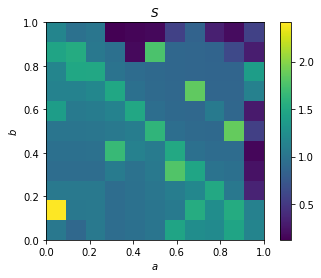

In [46]:
Z = entanglement_entropy
Z = np.vstack(Z[:, :]).astype(np.float)
plt.imshow(Z, extent=[a_list[0], a_list[-1], b_list[0], b_list[-1]], origin='lower',
           cmap='viridis')
plt.colorbar()
plt.axis(aspect='image')
plt.title(r"$S$")
plt.xlabel(r'$a$')
plt.ylabel(r'$b$')
plt.show()
# plt.savefig(f'entanglement entropy L={L}.png')

This result is definitely not right.
However, we can't say for sure that the independent simulation has to be correct.

Let's try reproducing the finite-scaling of some special points directly. Also independent simulations.

In [47]:
Jx = 1
Jy = 0.01
Jz = 0.01
chi_list = np.arange(30, 200, 10)
S_list = []

for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))


Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062624812558, S = nan, norm_err = 2.0e-12
Current memory usage 353.9 MB, time elapsed: 5.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.4300e-12, max_E_trunc = 7.1054e-14
MPS bond dimensions: [17, 16, 13, 20, 17, 20, 17, 29, 26, 30, 30, 30, 30, 30, 30, 24]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062657126700, S = nan, norm_err = 3.8e-12
Current memory usage 353.9 MB, time elapsed: 9.2 s
Delta E = -6.4628e-10, Delta S = 0.0000e+00 (per sweep)
max_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (0.9999999999999987-2.53843549706462e-18j)
After the canonicalization:
Bond dim =  [8, 10, 8, 12, 8, 12, 11, 17, 15, 17, 18, 24, 20, 19, 14, 16]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for conf

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999987+5.587595799141456e-17j)
After the canonicalization:
Bond dim =  [36, 33, 36, 40, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 38]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062636675199, S = nan, norm_err = 2.5e-12
Current memory usage 353.9 MB, time elapsed: 6.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6258e-15, max_E_trunc = 2.0428e-14
MPS bond dimensions: [14, 15, 11, 17, 18, 15, 21, 27, 38, 43, 44, 49, 48, 49, 44, 23]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062637572849, S = nan, norm_err = 3.1e-12
Current memory usage 353.9 MB, time elapsed: 16.4 s
Delta E = -1.7953e-11, Delta S = 0.0000e+00 (per sweep)
max_t

Updating environment
..
sweep 95, age = 4592
Energy = -0.1250062623548516, S = 0.8669008428720069, norm_err = 1.7e-06
Current memory usage 353.9 MB, time elapsed: 178.1 s
Delta E = -1.0008e-11, Delta S = -3.5393e-04 (per sweep)
max_trunc_err = 4.0990e-14, max_E_trunc = 1.4211e-12
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 100, age = 4816
Energy = -0.1250062623952886, S = 0.8655708853970500, norm_err = 1.5e-07
Current memory usage 353.9 MB, time elapsed: 188.6 s
Delta E = -8.0874e-12, Delta S = -2.6599e-04 (per sweep)
max_trunc_err = 8.7255e-14, max_E_trunc = 3.0695e-12
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 105, age = 5040
Energy = -0.1250062624438861, S = 0.8638168964984917, norm_err = 6.5e-08
Current memory usage 353.9 MB, time elapsed: 198.4 s
Delta E = -9.7195e-12, Delta S = -3.5080e-04 (per sweep)
max_trunc_err = 2.6756e-13, max_E_tr

Updating environment
..
sweep 190, age = 8848
Energy = -0.1250062629970330, S = 0.8371358549312327, norm_err = 1.7e-07
Current memory usage 353.9 MB, time elapsed: 367.7 s
Delta E = -3.6010e-12, Delta S = -3.0139e-04 (per sweep)
max_trunc_err = 1.4116e-13, max_E_trunc = 2.9559e-12
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 195, age = 9072
Energy = -0.1250062630286024, S = 0.8357547570350219, norm_err = 5.5e-07
Current memory usage 353.9 MB, time elapsed: 377.4 s
Delta E = -6.3139e-12, Delta S = -2.7622e-04 (per sweep)
max_trunc_err = 3.4193e-14, max_E_trunc = 2.0464e-12
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 200, age = 9296
Energy = -0.1250062630395234, S = 0.8344050262371494, norm_err = 8.5e-08
Current memory usage 353.9 MB, time elapsed: 387.0 s
Delta E = -2.1842e-12, Delta S = -2.6995e-04 (per sweep)
max_trunc_err = 7.8444e-14, max_E_t

Updating environment
..
sweep 285, age = 13104
Energy = -0.1250062634347699, S = 0.8164705832475319, norm_err = 4.3e-07
Current memory usage 353.9 MB, time elapsed: 554.6 s
Delta E = -3.9250e-12, Delta S = -1.4252e-04 (per sweep)
max_trunc_err = 4.6141e-14, max_E_trunc = 2.9559e-12
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 290, age = 13328
Energy = -0.1250062634607758, S = 0.8154446561649129, norm_err = 3.0e-08
Current memory usage 353.9 MB, time elapsed: 564.2 s
Delta E = -5.2012e-12, Delta S = -2.0519e-04 (per sweep)
max_trunc_err = 7.1729e-14, max_E_trunc = 3.6380e-12
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 295, age = 13552
Energy = -0.1250062634809623, S = 0.8144311768184809, norm_err = 5.5e-08
Current memory usage 353.9 MB, time elapsed: 573.8 s
Delta E = -4.0373e-12, Delta S = -2.0270e-04 (per sweep)
max_trunc_err = 5.2169e-14, max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
DMRG finished after 360 sweeps.
total size = 16656, maximum chi = 50
Before the canonicalization:
Bond dim =  [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000002816753963-2.2143164749077276e-15j)
After the canonicalization:
Bond dim =  [47, 48, 49, 50, 50, 50, 50, 50, 48, 48, 48, 49, 46, 47, 49, 49]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  60 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062604362245, S = nan, norm_err = 1.1e-11
Current memory usage 353.9 MB, time elapsed: 9.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0098e-15, max_E_trunc = 8.8818e-14
MPS bond dimensions: [21, 16, 17, 30, 47, 45, 55, 60, 59, 60, 60, 60, 60, 58, 56, 33]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062617345882, S = nan, norm_err = 5.5e-12
Current memory usage 353.9 MB, time elapsed: 22.8 s
Delta E = -2.5967e-10, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000784-3.242848697904144e-16j)
After the canonicalization:
Bond dim =  [51, 48, 50, 49, 50, 49, 50, 56, 57, 59, 59, 59, 57, 53, 52, 50]
Computing properties
Optimizing
Loop for chi=60 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  70 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062657409768, S = nan, norm_err = 3.7e-12
Current memory usage 353.9 MB, time elapsed: 3.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7976e-20, max_E_trunc = 8.8818e-15
MPS bond dimensions: [15, 14, 10, 17, 18, 17, 15, 21, 18, 16, 18, 20, 17, 16, 18, 17]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062657431741, S = nan, norm_err = 2.8e-12
Current memory usage 353.9 MB, time elapsed: 12.4 s
Delta E = -4.3947e-13, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.999999999999984+2.6043522809239788e-15j)
After the canonicalization:
Bond dim =  [30, 31, 32, 29, 27, 30, 31, 41, 37, 41, 42, 45, 39, 44, 38, 34]
Computing properties
Optimizing
Loop for chi=70 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  80 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062652798498, S = nan, norm_err = 2.5e-12
Current memory usage 353.9 MB, time elapsed: 6.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2472e-13, max_E_trunc = 2.1316e-14
MPS bond dimensions: [19, 14, 14, 16, 18, 17, 19, 19, 22, 35, 46, 61, 64, 68, 43, 24]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062657423077, S = nan, norm_err = 3.8e-12
Current memory usage 353.9 MB, time elapsed: 12.3 s
Delta E = -9.2492e-11, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999742-1.299202858038614e-16j)
After the canonicalization:
Bond dim =  [26, 31, 28, 36, 32, 30, 29, 37, 35, 38, 41, 42, 40, 37, 34, 39]
Computing properties
Optimizing
Loop for chi=80 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  90 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062594227205, S = nan, norm_err = 9.6e-12
Current memory usage 353.9 MB, time elapsed: 11.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7537e-16, max_E_trunc = 1.5987e-14
MPS bond dimensions: [20, 16, 15, 33, 47, 52, 52, 59, 71, 75, 86, 88, 80, 68, 38, 25]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062594308345, S = nan, norm_err = 2.7e-11
Current memory usage 353.9 MB, time elapsed: 29.8 s
Delta E = -1.6228e-12, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999674+4.2809738662457904e-16j)
After the canonicalization:
Bond dim =  [56, 54, 56, 67, 66, 67, 67, 66, 70, 75, 74, 70, 60, 59, 60, 62]
Computing properties
Optimizing
Loop for chi=90 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062612062462, S = nan, norm_err = 6.3e-12
Current memory usage 353.9 MB, time elapsed: 12.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5871e-16, max_E_trunc = 2.3093e-14
MPS bond dimensions: [16, 14, 14, 26, 43, 66, 81, 94, 96, 94, 97, 98, 98, 73, 42, 23]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062612245282, S = nan, norm_err = 5.0e-12
Current memory usage 353.9 MB, time elapsed: 31.0 s
Delta E = -3.6564e-12, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000293-1.465841337200402e-16j)
After the canonicalization:
Bond dim =  [71, 73, 79, 83, 81, 77, 72, 80, 79, 78, 76, 76, 75, 77, 78, 78]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  110 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062571152761, S = nan, norm_err = 1.2e-11
Current memory usage 353.9 MB, time elapsed: 14.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4545e-16, max_E_trunc = 2.8422e-14
MPS bond dimensions: [15, 13, 14, 23, 37, 52, 78, 100, 107, 108, 108, 103, 97, 62, 32, 20]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062571228145, S = nan, norm_err = 2.3e-11
Current memory usage 353.9 MB, time elapsed: 37.9 s
Delta E = -1.5077e-12, Delta S = 0.0000e+00 (per sweep)

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999682-1.01340715875399e-16j)
After the canonicalization:
Bond dim =  [65, 64, 66, 69, 71, 77, 78, 80, 81, 88, 90, 81, 76, 76, 79, 77]
Computing properties
Optimizing
Loop for chi=110 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  120 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062622485954, S = nan, norm_err = 5.0e-12
Current memory usage 353.9 MB, time elapsed: 11.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.3268e-17, max_E_trunc = 8.4377e-15
MPS bond dimensions: [16, 16, 16, 25, 29, 32, 39, 48, 49, 54, 68, 83, 75, 55, 33, 22]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062623586701, S = nan, norm_err = 8.2e-12
Current memory usage 353.9 MB, time elapsed: 34.6 s
Delta E = -2.2015e-11, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.1644696393112257-3.7970030629863247e-16j)
After the canonicalization:
Bond dim =  [120, 120, 120, 120, 120, 120, 120, 120, 120, 119, 120, 120, 120, 120, 120, 120]
Computing properties
Optimizing
Loop for chi=120 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  130 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062623241559, S = nan, norm_err = 2.5e-12
Current memory usage 353.9 MB, time elapsed: 12.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4351e-17, max_E_trunc = 4.9738e-14
MPS bond dimensions: [17, 13, 13, 18, 30, 40, 53, 71, 94, 113, 117, 121, 119, 74, 39, 21]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062623384265, S = nan, norm_err = 5.3e-12
Current memory usage 353.9 MB, time elapsed: 34.6 s
Delta E = -2.8541e-12, Delta S = 0.0000e+00 (per sweep)


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.8652253367008453+3.1401244983664515e-16j)
After the canonicalization:
Bond dim =  [125, 109, 128, 126, 128, 126, 128, 130, 125, 126, 127, 130, 128, 126, 126, 127]
Computing properties
Optimizing
Loop for chi=130 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  140 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062630051915, S = nan, norm_err = 4.0e-12
Current memory usage 353.9 MB, time elapsed: 10.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5225e-17, max_E_trunc = 1.9540e-14
MPS bond dimensions: [17, 16, 15, 16, 16, 19, 20, 35, 55, 82, 110, 126, 131, 93, 48, 25]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062653026718, S = nan, norm_err = 8.8e-12
Current memory usage 353.9 MB, time elapsed: 28.5 s
Delta E = -4.5950e-10, Delta S = 0.0000e+00 (per sweep)
m

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (3.9917575477906007-2.293304435241339e-15j)
After the canonicalization:
Bond dim =  [133, 130, 137, 140, 138, 136, 135, 136, 129, 130, 130, 130, 130, 133, 134, 136]
Computing properties
Optimizing
Loop for chi=140 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  150 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062552510313, S = nan, norm_err = 2.1e-12
Current memory usage 380.7 MB, time elapsed: 19.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3017e-17, max_E_trunc = 8.4377e-15
MPS bond dimensions: [18, 18, 17, 31, 58, 110, 146, 150, 150, 150, 150, 148, 147, 91, 47, 25]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062552659847, S = nan, norm_err = 1.9e-12
Current memory usage 383.2 MB, time elapsed: 54.9 s
Delta E = -2.9907e-12, Delta S = 0.0000e+00 (per swe

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062600412882, S = nan, norm_err = 2.0e-11
Current memory usage 394.0 MB, time elapsed: 24.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6060e-17, max_E_trunc = 5.6843e-14
MPS bond dimensions: [21, 18, 14, 29, 49, 76, 112, 145, 155, 131, 150, 151, 117, 87, 47, 28]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062601736619, S = nan, norm_err = 8.7e-11
Current memory usage 394.0 MB, time elapsed: 65.7 s
Delta E = -2.6475e-11, Delta S = 0.0000e+00 (per swee

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
DMRG finished after 20 sweeps.
total size = 1296, maximum chi = 160
Before the canonicalization:
Bond dim =  [160, 158, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0567053857820232+5.576356704953961e-16j)
After the canonicalization:
Bond dim =  [159, 154, 160, 160, 160, 160, 160, 160, 155, 145, 155, 160, 160, 159, 159, 160]
Computing properties
Optimizing
Loop for chi=160 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  170 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062615229122, S = nan, norm_err = 9.3e-12
Current memory usage 397.0 MB, time elapsed: 18.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0198e-17, max_E_trunc = 6.3949e-14
MPS bond dimensions: [20, 15, 13, 23, 37, 57, 82, 105, 114, 115, 117, 124, 111, 68, 42, 27]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062615561016, S = nan, norm_err = 9.6e-12
Current memory usage 397.0 MB, time elapsed: 58.7 s
Delta E = -6.6379e-12, Delta S = 0.0000e+00 (per sweep

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999567-6.510835629690733e-17j)
After the canonicalization:
Bond dim =  [37, 58, 57, 54, 52, 59, 76, 89, 100, 106, 100, 95, 77, 61, 50, 45]
Computing properties
Optimizing
Loop for chi=170 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  180 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062603125863, S = nan, norm_err = 3.7e-12
Current memory usage 407.6 MB, time elapsed: 24.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0372e-16, max_E_trunc = 7.4607e-14
MPS bond dimensions: [18, 14, 17, 32, 53, 93, 140, 166, 169, 173, 172, 168, 132, 75, 42, 24]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062614886165, S = nan, norm_err = 1.2e-11
Current memory usage 413.0 MB, time elapsed: 76.7 s
Delta E = -2.3521e-10, Delta S = 0.0000e+00 (per swee

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG finished after 30 sweeps.
total size = 1936, maximum chi = 180
Before the canonicalization:
Bond dim =  [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000227522961+5.5113079661614624e-17j)
After the canonicalization:
Bond dim =  [180, 179, 180, 180, 178, 178, 178, 180, 180, 178, 179, 180, 180, 180, 180, 180]
Computing properties
Optimizing
Loop for chi=180 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  190 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062638138598, S = nan, norm_err = 5.2e-12
Current memory usage 426.8 MB, time elapsed: 10.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.1198e-17, max_E_trunc = 3.5527e-14
MPS bond dimensions: [18, 15, 17, 21, 18, 17, 19, 24, 32, 45, 64, 81, 91, 78, 47, 25]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062638419807, S = nan, norm_err = 7.0e-12
Current memory usage 426.8 MB, time elapsed: 34.9 s
Delta E = -5.6242e-12, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000012135+2.648685658000692e-16j)
After the canonicalization:
Bond dim =  [58, 54, 63, 64, 62, 75, 84, 92, 98, 102, 102, 112, 101, 91, 76, 70]
Computing properties
Optimizing
Loop for chi=190 done.
============================== END ==============================


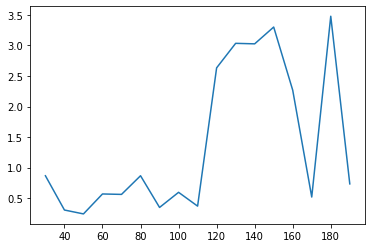

In [48]:
plt.plot(chi_list, S_list)

Now use consecutive method

In [49]:
Jx = 1
Jy = 0.01
Jz = 0.01
chi_list = np.arange(30, 200, 10)
S_list = []

psi = None
for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))


Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062657414681, S = nan, norm_err = 2.8e-12
Current memory usage 428.7 MB, time elapsed: 3.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3093e-20, max_E_trunc = 1.4211e-14
MPS bond dimensions: [16, 14, 10, 17, 13, 15, 14, 16, 16, 19, 18, 18, 21, 17, 20, 18]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062657431843, S = nan, norm_err = 2.5e-12
Current memory usage 428.7 MB, time elapsed: 9.9 s
Delta E = -3.4325e-13, Delta S = 0.0000e+00 (per sweep)
max_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000027+1.531316116780357e-17j)
After the canonicalization:
Bond dim =  [7, 10, 8, 12, 6, 10, 6, 12, 7, 10, 8, 15, 8, 10, 8, 12]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config T

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (0.9999999999999989+2.328623332702357e-16j)
After the canonicalization:
Bond dim =  [6, 10, 7, 12, 6, 10, 6, 12, 6, 10, 8, 12, 6, 10, 6, 12]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config T

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000036+4.844570136960194e-16j)
After the canonicalization:
Bond dim =  [6, 10, 6, 12, 6, 10, 8, 12, 6, 10, 6, 12, 6, 10, 6, 12]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  60 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config T

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.0000000000000007-3.545726019042748e-16j)
After the canonicalization:
Bond dim =  [7, 10, 6, 12, 8, 10, 8, 12, 6, 10, 8, 12, 8, 10, 7, 12]
Computing properties
Optimizing
Loop for chi=60 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  70 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config T

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000013-2.985385509242442e-16j)
After the canonicalization:
Bond dim =  [6, 10, 6, 12, 6, 10, 6, 12, 6, 10, 6, 12, 6, 10, 8, 12]
Computing properties
Optimizing
Loop for chi=70 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  80 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config T

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (0.9999999999999972-2.4227761790105585e-16j)
After the canonicalization:
Bond dim =  [6, 10, 6, 12, 6, 10, 6, 12, 6, 10, 6, 12, 6, 10, 8, 12]
Computing properties
Optimizing
Loop for chi=80 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  90 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999991+1.671977120721908e-16j)
After the canonicalization:
Bond dim =  [6, 10, 7, 12, 6, 10, 8, 12, 7, 10, 6, 12, 6, 10, 7, 12]
Computing properties
Optimizing
Loop for chi=90 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000009+1.0987030576812902e-16j)
After the canonicalization:
Bond dim =  [6, 10, 7, 12, 8, 10, 8, 12, 6, 10, 8, 12, 6, 10, 7, 12]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  110 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for confi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (0.9999999999999996+4.846377682995218e-16j)
After the canonicalization:
Bond dim =  [6, 10, 8, 12, 6, 10, 8, 12, 6, 10, 8, 12, 6, 10, 8, 12]
Computing properties
Optimizing
Loop for chi=110 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  120 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.000000000000003-2.571079815918443e-16j)
After the canonicalization:
Bond dim =  [7, 10, 6, 12, 8, 10, 6, 12, 6, 10, 6, 12, 8, 10, 6, 12]
Computing properties
Optimizing
Loop for chi=120 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  130 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1-9.290006524196524e-17j)
After the canonicalization:
Bond dim =  [6, 10, 6, 12, 7, 10, 7, 12, 6, 10, 7, 12, 6, 10, 8, 12]
Computing properties
Optimizing
Loop for chi=130 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  140 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.000000000000002+5.0311220408658934e-17j)
After the canonicalization:
Bond dim =  [7, 10, 8, 12, 6, 10, 6, 12, 6, 10, 6, 12, 6, 10, 8, 12]
Computing properties
Optimizing
Loop for chi=140 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  150 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (0.9999999999999978-2.829890567492439e-16j)
After the canonicalization:
Bond dim =  [8, 10, 8, 12, 6, 10, 7, 12, 6, 10, 7, 12, 8, 10, 8, 12]
Computing properties
Optimizing
Loop for chi=150 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  160 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1-2.7848330953335257e-16j)
After the canonicalization:
Bond dim =  [6, 10, 7, 12, 6, 10, 6, 12, 6, 10, 6, 12, 6, 10, 7, 12]
Computing properties
Optimizing
Loop for chi=160 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  170 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.0000000000000002+4.897106287527409e-16j)
After the canonicalization:
Bond dim =  [6, 10, 6, 12, 6, 10, 6, 12, 6, 10, 8, 12, 6, 10, 6, 12]
Computing properties
Optimizing
Loop for chi=170 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  180 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000004+3.5188149858303846e-16j)
After the canonicalization:
Bond dim =  [6, 10, 6, 12, 6, 10, 6, 12, 6, 10, 6, 12, 6, 10, 8, 12]
Computing properties
Optimizing
Loop for chi=180 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  190 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for confi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


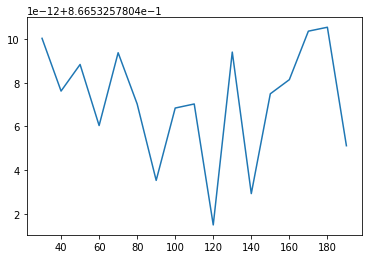

In [50]:
plt.plot(chi_list, S_list)

Now revert the order of chi list to reproduce the computation:

In [57]:
chi_list_reverse = chi_list[::-1]
Jx = 1
Jy = 0.01
Jz = 0.01
S_list = []

psi = None
for chi in chi_list_reverse:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))


Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  190 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062591049257, S = nan, norm_err = 3.9e-12
Current memory usage 428.7 MB, time elapsed: 29.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.8750e-17, max_E_trunc = 4.4409e-15
MPS bond dimensions: [18, 15, 12, 27, 49, 83, 141, 174, 187, 185, 187, 187, 152, 87, 46, 25]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062591104637, S = nan, norm_err = 3.4e-12
Current memory usage 428.7 MB, time elapsed: 83.2 s
Delta E = -1.1076e-12, Delta S = 0.0000e+00 (per sweep

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000004796-2.4830465916898803e-15j)
After the canonicalization:
Bond dim =  [154, 144, 171, 169, 170, 165, 148, 133, 128, 132, 134, 130, 130, 137, 139, 151]
Computing properties
Optimizing
Loop for chi=190 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  180 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062657273348, S = nan, norm_err = 2.7e-12
Current memory usage 428.7 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.4607e-20, max_E_trunc = 7.1054e-14
MPS bond dimensions: [15, 13, 13, 19, 18, 17, 20, 20, 15, 15, 17, 21, 15, 13, 15, 15]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062657431834, S = nan, norm_err = 5.1e-12
Current memory usage 428.7 MB, time elapsed: 12.9 s
Delta E = -3.1697e-12, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.922611480550859-8.933825901280557e-16j)
After the canonicalization:
Bond dim =  [80, 73, 109, 101, 142, 115, 143, 97, 131, 99, 92, 81, 109, 115, 145, 118]
Computing properties
Optimizing
Loop for chi=180 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  170 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062530104703, S = nan, norm_err = 1.2e-11
Current memory usage 428.7 MB, time elapsed: 30.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3651e-16, max_E_trunc = 1.4211e-14
MPS bond dimensions: [14, 9, 12, 19, 32, 63, 96, 139, 156, 158, 164, 166, 123, 66, 35, 20]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062530217668, S = nan, norm_err = 5.2e-12
Current memory usage 428.7 MB, time elapsed: 73.7 s
Delta E = -2.2593e-12, Delta S = 0.0000e+00 (per sweep)

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999579+6.876440047123801e-16j)
After the canonicalization:
Bond dim =  [60, 63, 65, 72, 79, 85, 89, 96, 94, 98, 94, 97, 82, 76, 69, 65]
Computing properties
Optimizing
Loop for chi=170 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  160 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062604855913, S = nan, norm_err = 3.4e-12
Current memory usage 428.7 MB, time elapsed: 24.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7342e-17, max_E_trunc = 1.7764e-13
MPS bond dimensions: [26, 17, 13, 26, 48, 81, 112, 140, 150, 155, 157, 156, 153, 110, 61, 34]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062605129747, S = nan, norm_err = 7.0e-12
Current memory usage 428.7 MB, time elapsed: 63.1 s
Delta E = -5.4767e-12, Delta S = 0.0000e+00 (per swe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000070812+1.621858029821066e-15j)
After the canonicalization:
Bond dim =  [138, 133, 135, 139, 138, 132, 134, 145, 142, 146, 147, 152, 144, 146, 142, 140]
Computing properties
Optimizing
Loop for chi=160 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  150 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062657361406, S = nan, norm_err = 5.4e-12
Current memory usage 428.7 MB, time elapsed: 4.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.7891e-20, max_E_trunc = 7.1054e-14
MPS bond dimensions: [15, 15, 11, 16, 19, 16, 16, 19, 15, 13, 21, 21, 17, 17, 17, 15]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062657429014, S = nan, norm_err = 4.7e-12
Current memory usage 428.7 MB, time elapsed: 12.5 s
Delta E = -1.3522e-12, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000009-4.017187478269033e-17j)
After the canonicalization:
Bond dim =  [6, 10, 8, 12, 8, 10, 6, 12, 8, 12, 10, 16, 10, 12, 8, 12]
Computing properties
Optimizing
Loop for chi=150 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  140 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for conf

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000027-6.578624909449934e-17j)
After the canonicalization:
Bond dim =  [6, 10, 6, 12, 6, 10, 8, 12, 6, 10, 6, 12, 6, 10, 7, 12]
Computing properties
Optimizing
Loop for chi=140 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  130 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000009+1.6443589601639786e-16j)
After the canonicalization:
Bond dim =  [8, 10, 8, 12, 6, 10, 7, 12, 6, 10, 8, 12, 8, 10, 8, 12]
Computing properties
Optimizing
Loop for chi=130 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  120 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for confi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000013-6.69051250655915e-16j)
After the canonicalization:
Bond dim =  [8, 10, 6, 12, 6, 10, 6, 12, 6, 10, 6, 12, 6, 10, 8, 12]
Computing properties
Optimizing
Loop for chi=120 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  110 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (0.9999999999999998-3.967935629005015e-16j)
After the canonicalization:
Bond dim =  [6, 10, 6, 12, 6, 10, 6, 12, 6, 10, 8, 12, 6, 10, 6, 12]
Computing properties
Optimizing
Loop for chi=110 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.0000000000000022+4.563749626442784e-16j)
After the canonicalization:
Bond dim =  [6, 10, 6, 12, 6, 10, 6, 12, 6, 10, 6, 12, 6, 10, 6, 12]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  90 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000009+3.697340341455007e-16j)
After the canonicalization:
Bond dim =  [6, 10, 7, 12, 6, 10, 6, 12, 6, 10, 8, 12, 6, 10, 6, 12]
Computing properties
Optimizing
Loop for chi=90 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  80 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config T

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.000000000000002-2.2258980648777985e-16j)
After the canonicalization:
Bond dim =  [6, 10, 8, 12, 6, 10, 8, 12, 6, 10, 8, 12, 6, 10, 8, 12]
Computing properties
Optimizing
Loop for chi=80 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  70 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config T

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (0.9999999999999971-4.451672329724449e-16j)
After the canonicalization:
Bond dim =  [6, 10, 6, 12, 6, 10, 6, 12, 6, 10, 6, 12, 6, 10, 8, 12]
Computing properties
Optimizing
Loop for chi=70 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  60 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config T

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (0.9999999999999982+5.8105141633101965e-16j)
After the canonicalization:
Bond dim =  [6, 10, 8, 12, 6, 10, 8, 12, 6, 10, 6, 12, 6, 10, 8, 12]
Computing properties
Optimizing
Loop for chi=60 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (0.9999999999999967+6.069686867847375e-17j)
After the canonicalization:
Bond dim =  [8, 10, 6, 12, 6, 10, 6, 12, 8, 10, 6, 12, 6, 10, 7, 12]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config T

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000004-1.4005891121780602e-16j)
After the canonicalization:
Bond dim =  [6, 10, 6, 12, 6, 10, 7, 12, 8, 10, 6, 12, 6, 10, 6, 12]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


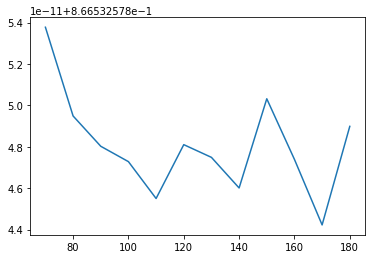

In [59]:
plt.plot(chi_list[4:-1], S_list[4:-1])

Now we have a simple conclusion:
At the point which we assumed to be gapped, the independent trials with random initial states show randomly bouncing up and down, while starting with a specific `chi` and increasing or decreasing it will induce a typical gapped entanglement entropy list.

However, this is quite beyong our expectation.
All the points around `Jx` are gapless, but `Jx` itself seems to be gapped? This is definitely something super weird.

Let's try with another point around `Jx` which seemed to be gapless!

In [65]:
a = .75
b = .5
Jx, Jy, Jz = get_xyz(a, b)
S_list = []

psi = None
for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))


Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847303209, S = nan, norm_err = 3.7e-10
Current memory usage 446.0 MB, time elapsed: 6.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.7203e-13, max_E_trunc = 3.8636e-13
MPS bond dimensions: [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847304342, S = nan, norm_err = 6.1e-11
Current memory usage 446.0 MB, time elapsed: 9.2 s
Delta E = -2.2676e-14, Delta S = 0.0000e+00 (per sweep)
max_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000089+1.4348462450171374e-16j)
After the canonicalization:
Bond dim =  [27, 30, 28, 30, 26, 30, 26, 30, 28, 30, 28, 30, 28, 30, 26, 30]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000022+7.780418682180847e-17j)
After the canonicalization:
Bond dim =  [28, 36, 28, 40, 28, 36, 28, 40, 28, 36, 28, 40, 28, 36, 28, 40]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305661, S = nan, norm_err = 1.8e-11
Current memory usage 446.0 MB, time elapsed: 4.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6083e-16, max_E_trunc = 7.1054e-14
MPS bond dimensions: [49, 50, 35, 50, 50, 50, 50, 50, 50, 50, 50, 50, 46, 50, 49, 50]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305815, S = nan, norm_err = 1.2e-11
Current memory usage 446.0 MB, time elapsed: 9.6 s
Delta E = -3.0642e-15, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999986-1.1432170755030797e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  60 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305681, S = nan, norm_err = 1.2e-10
Current memory usage 446.0 MB, time elapsed: 5.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9615e-17, max_E_trunc = 9.2371e-14
MPS bond dimensions: [44, 56, 36, 58, 60, 60, 59, 60, 58, 60, 60, 60, 55, 60, 58, 56]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305668, S = nan, norm_err = 2.7e-12
Current memory usage 446.0 MB, time elapsed: 11.1 s
Delta E = 2.6645e-16, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000004+5.53784794019382e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=60 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  70 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305695, S = nan, norm_err = 5.6e-11
Current memory usage 446.0 MB, time elapsed: 5.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6246e-18, max_E_trunc = 7.1054e-14
MPS bond dimensions: [48, 53, 32, 59, 63, 69, 63, 69, 62, 70, 59, 70, 63, 68, 61, 59]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305739, S = nan, norm_err = 1.3e-12
Current memory usage 446.0 MB, time elapsed: 12.7 s
Delta E = -8.8818e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000004+4.823271358253187e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=70 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  80 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305701, S = nan, norm_err = 7.9e-11
Current memory usage 446.0 MB, time elapsed: 6.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1703e-19, max_E_trunc = 9.2371e-14
MPS bond dimensions: [45, 56, 32, 61, 67, 76, 67, 80, 68, 75, 64, 79, 64, 78, 63, 60]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305712, S = nan, norm_err = 3.1e-13
Current memory usage 446.0 MB, time elapsed: 15.7 s
Delta E = -2.2204e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1+1.2828245164739414e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=80 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  90 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305688, S = nan, norm_err = 2.0e-11
Current memory usage 446.0 MB, time elapsed: 5.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0401e-19, max_E_trunc = 5.6843e-14
MPS bond dimensions: [49, 56, 35, 66, 66, 80, 72, 83, 70, 82, 72, 87, 73, 78, 66, 58]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305644, S = nan, norm_err = 1.9e-12
Current memory usage 446.0 MB, time elapsed: 15.6 s
Delta E = 8.8818e-16, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999973-5.741528923761937e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=90 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305715, S = nan, norm_err = 7.5e-11
Current memory usage 446.0 MB, time elapsed: 5.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3459e-19, max_E_trunc = 8.5265e-14
MPS bond dimensions: [43, 55, 35, 61, 63, 82, 73, 90, 75, 86, 71, 89, 74, 78, 69, 61]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305752, S = nan, norm_err = 5.0e-13
Current memory usage 446.0 MB, time elapsed: 15.5 s
Delta E = -7.5495e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000002+4.606997906435155e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  110 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305704, S = nan, norm_err = 1.4e-11
Current memory usage 446.0 MB, time elapsed: 6.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3065e-19, max_E_trunc = 8.5265e-14
MPS bond dimensions: [43, 54, 36, 62, 62, 81, 71, 87, 71, 85, 72, 84, 77, 82, 69, 59]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305746, S = nan, norm_err = 1.1e-12
Current memory usage 446.0 MB, time elapsed: 15.7 s
Delta E = -8.4377e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999993+6.00145488026121e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=110 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  120 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305775, S = nan, norm_err = 9.3e-11
Current memory usage 446.0 MB, time elapsed: 6.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1420e-19, max_E_trunc = 5.6843e-14
MPS bond dimensions: [48, 56, 32, 60, 66, 78, 73, 86, 73, 84, 68, 87, 71, 83, 65, 59]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305664, S = nan, norm_err = 1.2e-12
Current memory usage 446.0 MB, time elapsed: 15.9 s
Delta E = 2.2204e-15, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999969-5.605202411972706e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=120 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  130 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305737, S = nan, norm_err = 2.3e-11
Current memory usage 446.0 MB, time elapsed: 6.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3314e-19, max_E_trunc = 5.6843e-14
MPS bond dimensions: [47, 56, 39, 64, 66, 76, 68, 83, 67, 81, 71, 85, 69, 78, 62, 61]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305688, S = nan, norm_err = 5.4e-13
Current memory usage 446.0 MB, time elapsed: 15.6 s
Delta E = 9.7700e-16, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999991+1.019933375559017e-15j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=130 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  140 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305646, S = nan, norm_err = 8.0e-11
Current memory usage 446.0 MB, time elapsed: 6.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.8464e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [43, 55, 37, 65, 61, 78, 70, 84, 69, 79, 71, 82, 66, 80, 64, 60]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305730, S = nan, norm_err = 5.0e-13
Current memory usage 446.0 MB, time elapsed: 15.8 s
Delta E = -1.6875e-15, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999988+5.922064847851617e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=140 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  150 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305795, S = nan, norm_err = 9.1e-11
Current memory usage 446.0 MB, time elapsed: 6.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5217e-19, max_E_trunc = 8.5265e-14
MPS bond dimensions: [41, 55, 36, 62, 65, 79, 67, 84, 71, 90, 80, 85, 68, 81, 66, 58]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305579, S = nan, norm_err = 1.6e-12
Current memory usage 446.0 MB, time elapsed: 15.7 s
Delta E = 4.3077e-15, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999934+3.6309386781889213e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=150 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  160 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305690, S = nan, norm_err = 1.3e-10
Current memory usage 446.0 MB, time elapsed: 6.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2531e-19, max_E_trunc = 7.8160e-14
MPS bond dimensions: [47, 57, 32, 62, 64, 79, 67, 86, 77, 87, 75, 88, 74, 80, 66, 61]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305677, S = nan, norm_err = 2.5e-13
Current memory usage 446.0 MB, time elapsed: 15.6 s
Delta E = 2.6645e-16, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999967-6.680468386864678e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=160 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  170 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305710, S = nan, norm_err = 8.7e-11
Current memory usage 446.0 MB, time elapsed: 6.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0686e-19, max_E_trunc = 8.5265e-14
MPS bond dimensions: [48, 57, 37, 63, 65, 81, 73, 86, 67, 81, 65, 89, 70, 80, 67, 61]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305766, S = nan, norm_err = 7.7e-13
Current memory usage 446.0 MB, time elapsed: 15.5 s
Delta E = -1.1102e-15, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000047-1.3501096374302708e-17j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=170 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  180 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305672, S = nan, norm_err = 5.8e-11
Current memory usage 446.0 MB, time elapsed: 5.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1942e-19, max_E_trunc = 7.8160e-14
MPS bond dimensions: [48, 58, 34, 60, 64, 79, 67, 84, 66, 80, 69, 84, 66, 79, 66, 59]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305743, S = nan, norm_err = 7.4e-13
Current memory usage 446.0 MB, time elapsed: 15.3 s
Delta E = -1.4211e-15, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999961+1.538906399230558e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=180 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  190 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305608, S = nan, norm_err = 8.0e-11
Current memory usage 446.0 MB, time elapsed: 5.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4107e-19, max_E_trunc = 9.9476e-14
MPS bond dimensions: [45, 55, 34, 61, 64, 77, 67, 85, 69, 81, 71, 86, 68, 82, 68, 60]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305792, S = nan, norm_err = 4.5e-13
Current memory usage 446.0 MB, time elapsed: 15.3 s
Delta E = -3.6859e-15, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999989+7.987318860538589e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=190 done.
============================== END ==============================


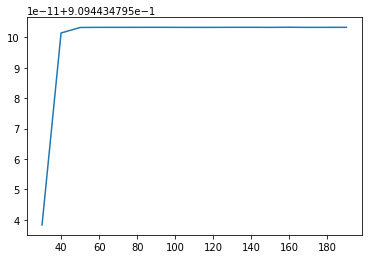

In [66]:
plt.plot(chi_list, S_list)

In [62]:
a = .75
b = .5
Jx, Jy, Jz = get_xyz(a, b)
S_list = []

psi = None
for chi in chi_list_reverse:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))


Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  190 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824260174076592, S = nan, norm_err = 7.3e-06
Current memory usage 432.7 MB, time elapsed: 65.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5725e-10, max_E_trunc = 2.2204e-15
MPS bond dimensions: [190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190]
Updating environment
..
sweep 10, age = 784
Energy = -0.0766057165489638, S = nan, norm_err = 2.8e-03
Current memory usage 432.7 MB, time elapsed: 173.9 s
Delta E = 1.1641e-03, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.012109057237921+4.888125494650897e-16j)
After the canonicalization:
Bond dim =  [170, 152, 147, 108, 105, 112, 109, 124, 116, 125, 120, 139, 134, 147, 155, 172]
Computing properties
Optimizing
Loop for chi=190 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  180 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = 0.0285257611390507, S = nan, norm_err = 4.0e-01
Current memory usage 446.0 MB, time elapsed: 76.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.5691e-08, max_E_trunc = -4.5652e-13
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 10, age = 784
Energy = 0.0864803745972509, S = nan, norm_err = 1.2e-01
Current memory usage 446.0 MB, time elapsed: 175.5 s
Delta E = 1.1591e-02, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999956-5.392601377376613e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 29, 36, 29, 44, 30, 38, 30, 45, 30, 36, 29, 44]
Computing properties
Optimizing
Loop for chi=180 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  170 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305632, S = nan, norm_err = 1.3e-10
Current memory usage 446.0 MB, time elapsed: 5.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1917e-19, max_E_trunc = 7.1054e-14
MPS bond dimensions: [45, 53, 36, 61, 60, 77, 71, 82, 70, 82, 70, 86, 70, 83, 66, 60]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305650, S = nan, norm_err = 9.7e-13
Current memory usage 446.0 MB, time elapsed: 15.6 s
Delta E = -3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999998+3.010377990901139e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=170 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  160 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305635, S = nan, norm_err = 3.2e-10
Current memory usage 446.0 MB, time elapsed: 6.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0778e-19, max_E_trunc = 5.6843e-14
MPS bond dimensions: [46, 53, 30, 62, 63, 75, 69, 85, 71, 81, 68, 85, 73, 84, 66, 59]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305721, S = nan, norm_err = 3.8e-13
Current memory usage 446.0 MB, time elapsed: 15.8 s
Delta E = -1.7319e-15, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000003+3.069046007457034e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=160 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  150 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305726, S = nan, norm_err = 8.5e-11
Current memory usage 446.0 MB, time elapsed: 6.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1524e-19, max_E_trunc = 7.8160e-14
MPS bond dimensions: [45, 55, 40, 64, 69, 80, 75, 86, 75, 78, 71, 83, 70, 81, 60, 59]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305699, S = nan, norm_err = 6.9e-13
Current memory usage 446.0 MB, time elapsed: 15.9 s
Delta E = 5.3291e-16, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000018+1.3231676369604797e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=150 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  140 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305726, S = nan, norm_err = 1.5e-11
Current memory usage 446.0 MB, time elapsed: 6.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4926e-19, max_E_trunc = 8.5265e-14
MPS bond dimensions: [46, 56, 33, 61, 66, 79, 70, 87, 71, 80, 71, 86, 71, 82, 68, 62]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305801, S = nan, norm_err = 2.4e-12
Current memory usage 446.0 MB, time elapsed: 15.8 s
Delta E = -1.5099e-15, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999984+6.23665329805217e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=140 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  130 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305726, S = nan, norm_err = 1.5e-10
Current memory usage 446.0 MB, time elapsed: 6.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4565e-19, max_E_trunc = 7.8160e-14
MPS bond dimensions: [47, 53, 35, 61, 67, 80, 69, 83, 63, 80, 72, 87, 70, 82, 70, 60]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305686, S = nan, norm_err = 5.0e-13
Current memory usage 446.0 MB, time elapsed: 15.5 s
Delta E = 7.9936e-16, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000016+2.5909573186206573e-17j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=130 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  120 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305870, S = nan, norm_err = 1.0e-10
Current memory usage 446.0 MB, time elapsed: 7.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1913e-19, max_E_trunc = 7.1054e-14
MPS bond dimensions: [47, 56, 33, 61, 66, 80, 72, 86, 73, 87, 70, 89, 76, 84, 67, 62]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305743, S = nan, norm_err = 5.4e-13
Current memory usage 446.0 MB, time elapsed: 16.9 s
Delta E = 2.5313e-15, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000005+6.636608160588013e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=120 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  110 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305555, S = nan, norm_err = 1.4e-10
Current memory usage 446.0 MB, time elapsed: 6.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3433e-19, max_E_trunc = 9.9476e-14
MPS bond dimensions: [49, 54, 35, 64, 63, 75, 66, 87, 72, 84, 71, 85, 72, 80, 64, 60]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305588, S = nan, norm_err = 6.1e-13
Current memory usage 446.0 MB, time elapsed: 17.2 s
Delta E = -6.6613e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000001-1.8366961843099762e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=110 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305677, S = nan, norm_err = 9.6e-12
Current memory usage 446.0 MB, time elapsed: 6.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5584e-19, max_E_trunc = 4.2633e-14
MPS bond dimensions: [46, 54, 32, 61, 64, 80, 71, 88, 72, 82, 70, 87, 71, 83, 68, 60]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305757, S = nan, norm_err = 5.7e-13
Current memory usage 446.0 MB, time elapsed: 15.5 s
Delta E = -1.5987e-15, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999942+4.945220941600655e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  90 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305610, S = nan, norm_err = 1.1e-10
Current memory usage 446.0 MB, time elapsed: 6.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2735e-19, max_E_trunc = 1.0658e-13
MPS bond dimensions: [50, 55, 34, 62, 64, 75, 70, 86, 75, 83, 68, 83, 73, 83, 65, 60]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305681, S = nan, norm_err = 8.5e-13
Current memory usage 446.0 MB, time elapsed: 15.6 s
Delta E = -1.4211e-15, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999947-3.363039232048181e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=90 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  80 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305819, S = nan, norm_err = 1.0e-10
Current memory usage 446.0 MB, time elapsed: 5.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1679e-19, max_E_trunc = 9.9476e-14
MPS bond dimensions: [45, 53, 35, 63, 67, 80, 62, 78, 66, 78, 65, 79, 68, 78, 69, 60]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305695, S = nan, norm_err = 1.1e-12
Current memory usage 446.0 MB, time elapsed: 15.5 s
Delta E = 2.4869e-15, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000049+3.60346715184615e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=80 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  70 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305719, S = nan, norm_err = 5.0e-11
Current memory usage 446.0 MB, time elapsed: 5.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1750e-18, max_E_trunc = 5.6843e-14
MPS bond dimensions: [45, 54, 31, 61, 59, 69, 61, 66, 62, 69, 59, 67, 63, 69, 61, 63]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305697, S = nan, norm_err = 1.3e-12
Current memory usage 446.0 MB, time elapsed: 13.6 s
Delta E = 4.4409e-16, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999964-4.493911596438417e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=70 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  60 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305704, S = nan, norm_err = 4.4e-11
Current memory usage 446.0 MB, time elapsed: 5.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9915e-17, max_E_trunc = 4.9738e-14
MPS bond dimensions: [47, 56, 38, 58, 57, 60, 60, 60, 54, 60, 52, 59, 57, 60, 54, 57]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305699, S = nan, norm_err = 7.5e-12
Current memory usage 446.0 MB, time elapsed: 11.4 s
Delta E = 8.8818e-17, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999947-1.2729984048901995e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=60 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305681, S = nan, norm_err = 8.4e-12
Current memory usage 446.0 MB, time elapsed: 5.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2508e-16, max_E_trunc = 8.5265e-14
MPS bond dimensions: [46, 50, 36, 50, 49, 50, 49, 50, 49, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305757, S = nan, norm_err = 2.3e-12
Current memory usage 446.0 MB, time elapsed: 9.9 s
Delta E = -1.5099e-15, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000003+9.96715051039364e-17j)
After the canonicalization:
Bond dim =  [28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44, 28, 36, 28, 44]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847305639, S = nan, norm_err = 1.0e-10
Current memory usage 446.0 MB, time elapsed: 4.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6098e-14, max_E_trunc = 9.2371e-14
MPS bond dimensions: [40, 40, 36, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847305615, S = nan, norm_err = 7.4e-12
Current memory usage 446.0 MB, time elapsed: 8.8 s
Delta E = 4.8850e-16, Delta S = 0.0000e+00 (per sweep)
max_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1-1.6623927848944757e-16j)
After the canonicalization:
Bond dim =  [28, 36, 28, 40, 28, 36, 28, 40, 28, 36, 28, 40, 28, 36, 28, 40]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.625 for config KitaevLadderModel
Reading 'Jy'=0.125 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0824342847303208, S = nan, norm_err = 8.9e-10
Current memory usage 446.0 MB, time elapsed: 4.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6780e-13, max_E_trunc = 4.0501e-13
MPS bond dimensions: [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
Updating environment
..
sweep 10, age = 784
Energy = -0.0824342847304409, S = nan, norm_err = 6.7e-11
Current memory usage 446.0 MB, time elapsed: 8.3 s
Delta E = -2.4025e-14, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000042-2.4456666836204132e-17j)
After the canonicalization:
Bond dim =  [26, 30, 26, 30, 26, 30, 26, 30, 26, 30, 26, 30, 26, 30, 26, 30]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================


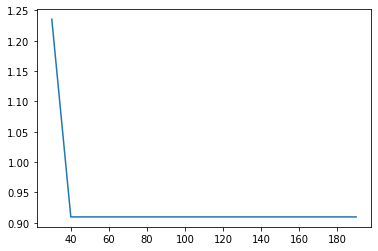

In [64]:
plt.plot(chi_list, S_list)

Oops!
Apparently, our recent conclusion is wrong....

Let's try something new:

In [69]:
a = .75
b = 0.
Jx, Jy, Jz = get_xyz(a, b)
S_list = []

psi = None
for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))


Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.375 for config KitaevLadderModel
Reading 'Jy'=0.375 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695030492772074, S = nan, norm_err = 8.9e-08
Current memory usage 446.0 MB, time elapsed: 6.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2067e-08, max_E_trunc = 5.9517e-09
MPS bond dimensions: [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695030497283584, S = nan, norm_err = 1.9e-08
Current memory usage 446.0 MB, time elapsed: 9.7 s
Delta E = -9.0230e-11, Delta S = 0.0000e+00 (per sweep)
max_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (0.9999999925751453-1.1882855810441129e-16j)
After the canonicalization:
Bond dim =  [28, 30, 28, 30, 30, 30, 29, 30, 29, 30, 29, 30, 29, 30, 27, 30]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.375 for config KitaevLadderModel
Reading 'Jy'=0.375 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000002+1.7903565999524695e-16j)
After the canonicalization:
Bond dim =  [37, 40, 38, 40, 37, 40, 37, 40, 37, 40, 37, 40, 37, 40, 37, 40]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.375 for config KitaevLadderModel
Reading 'Jy'=0.375 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695030523124229, S = nan, norm_err = 1.0e-12
Current memory usage 446.0 MB, time elapsed: 5.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9301e-14, max_E_trunc = 6.3949e-14
MPS bond dimensions: [50, 50, 45, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695030523124329, S = nan, norm_err = 7.1e-13
Current memory usage 446.0 MB, time elapsed: 9.9 s
Delta E = -1.9984e-15, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000002+1.493217442055661e-16j)
After the canonicalization:
Bond dim =  [38, 50, 39, 50, 38, 50, 38, 50, 38, 50, 39, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.375 for config KitaevLadderModel
Reading 'Jy'=0.375 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  60 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695030523124314, S = nan, norm_err = 2.8e-12
Current memory usage 446.0 MB, time elapsed: 5.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2284e-15, max_E_trunc = 6.3949e-14
MPS bond dimensions: [60, 60, 50, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695030523124411, S = nan, norm_err = 1.4e-12
Current memory usage 446.0 MB, time elapsed: 10.6 s
Delta E = -1.9540e-15, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999947+6.416647269948117e-16j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 39, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=60 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.375 for config KitaevLadderModel
Reading 'Jy'=0.375 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  70 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695030523124336, S = nan, norm_err = 1.3e-12
Current memory usage 446.0 MB, time elapsed: 6.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3103e-16, max_E_trunc = 5.6843e-14
MPS bond dimensions: [69, 70, 50, 70, 70, 70, 70, 70, 70, 70, 70, 70, 69, 70, 68, 70]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695030523124507, S = nan, norm_err = 7.4e-13
Current memory usage 446.0 MB, time elapsed: 12.1 s
Delta E = -3.4195e-15, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999882-1.6306332911546206e-15j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=70 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.375 for config KitaevLadderModel
Reading 'Jy'=0.375 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  80 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695030523124429, S = nan, norm_err = 1.5e-12
Current memory usage 446.0 MB, time elapsed: 6.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2537e-16, max_E_trunc = 8.5265e-14
MPS bond dimensions: [71, 80, 52, 80, 78, 80, 79, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695030523124340, S = nan, norm_err = 1.1e-12
Current memory usage 446.0 MB, time elapsed: 13.9 s
Delta E = 1.7764e-15, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999836-1.7286248387565761e-16j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=80 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.375 for config KitaevLadderModel
Reading 'Jy'=0.375 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  90 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695030523124354, S = nan, norm_err = 1.2e-12
Current memory usage 446.0 MB, time elapsed: 7.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3080e-17, max_E_trunc = 6.3949e-14
MPS bond dimensions: [70, 88, 51, 90, 84, 90, 86, 90, 88, 90, 85, 90, 87, 90, 88, 90]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695030523124349, S = nan, norm_err = 1.3e-12
Current memory usage 446.0 MB, time elapsed: 16.3 s
Delta E = 8.8818e-17, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999892+5.685827243057107e-16j)
After the canonicalization:
Bond dim =  [39, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=90 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.375 for config KitaevLadderModel
Reading 'Jy'=0.375 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695030523124314, S = nan, norm_err = 1.3e-12
Current memory usage 446.0 MB, time elapsed: 7.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7666e-18, max_E_trunc = 9.2371e-14
MPS bond dimensions: [70, 88, 52, 91, 88, 100, 92, 100, 91, 100, 91, 100, 94, 99, 92, 90]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695030523124385, S = nan, norm_err = 9.6e-13
Current memory usage 446.0 MB, time elapsed: 18.9 s
Delta E = -1.4211e-15, Delta S = 0.0000e+00 (per sweep)
m

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999865+3.712308238590367e-16j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.375 for config KitaevLadderModel
Reading 'Jy'=0.375 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  110 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695030523124249, S = nan, norm_err = 9.9e-13
Current memory usage 446.0 MB, time elapsed: 9.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.1014e-19, max_E_trunc = 4.9738e-14
MPS bond dimensions: [69, 87, 52, 93, 92, 110, 97, 110, 99, 109, 97, 110, 97, 108, 96, 89]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695030523124278, S = nan, norm_err = 9.9e-13
Current memory usage 446.0 MB, time elapsed: 22.2 s
Delta E = -5.7732e-16, Delta S = 0.0000e+00 (per sweep)


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999876+1.6528662119541515e-16j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=110 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.375 for config KitaevLadderModel
Reading 'Jy'=0.375 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  120 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695030523124354, S = nan, norm_err = 1.5e-12
Current memory usage 446.0 MB, time elapsed: 9.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0147e-19, max_E_trunc = 7.8160e-14
MPS bond dimensions: [71, 89, 51, 92, 98, 118, 104, 119, 105, 118, 104, 118, 102, 117, 99, 89]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695030523124331, S = nan, norm_err = 8.8e-13
Current memory usage 446.0 MB, time elapsed: 26.2 s
Delta E = 4.4409e-16, Delta S = 0.0000e+00 (per swee

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999811-5.2692225582795515e-17j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 39, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=120 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.375 for config KitaevLadderModel
Reading 'Jy'=0.375 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  130 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695030523124289, S = nan, norm_err = 2.0e-12
Current memory usage 446.0 MB, time elapsed: 9.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1266e-19, max_E_trunc = 7.8160e-14
MPS bond dimensions: [71, 87, 50, 90, 102, 124, 105, 124, 107, 122, 106, 122, 108, 124, 105, 90]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695030523124374, S = nan, norm_err = 1.2e-12
Current memory usage 446.0 MB, time elapsed: 25.1 s
Delta E = -1.6875e-15, Delta S = 0.0000e+00 (per s

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999851-1.3169973195770873e-15j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=130 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.375 for config KitaevLadderModel
Reading 'Jy'=0.375 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  140 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695030523124254, S = nan, norm_err = 1.4e-12
Current memory usage 446.0 MB, time elapsed: 8.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0703e-19, max_E_trunc = 5.6843e-14
MPS bond dimensions: [69, 88, 50, 89, 103, 122, 105, 124, 109, 128, 110, 127, 106, 123, 98, 88]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695030523124345, S = nan, norm_err = 1.0e-12
Current memory usage 446.0 MB, time elapsed: 24.0 s
Delta E = -1.8208e-15, Delta S = 0.0000e+00 (per sw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999865+8.207952546801511e-16j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=140 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.375 for config KitaevLadderModel
Reading 'Jy'=0.375 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  150 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695030523124338, S = nan, norm_err = 1.5e-12
Current memory usage 446.0 MB, time elapsed: 8.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1944e-19, max_E_trunc = 6.3949e-14
MPS bond dimensions: [69, 89, 51, 92, 101, 126, 104, 125, 104, 125, 104, 127, 107, 125, 102, 91]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695030523124502, S = nan, norm_err = 1.1e-12
Current memory usage 446.0 MB, time elapsed: 24.1 s
Delta E = -3.2863e-15, Delta S = 0.0000e+00 (per s

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999816+3.721523957056494e-16j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=150 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.375 for config KitaevLadderModel
Reading 'Jy'=0.375 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  160 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695030523124276, S = nan, norm_err = 1.9e-12
Current memory usage 446.0 MB, time elapsed: 8.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3435e-19, max_E_trunc = 7.1054e-14
MPS bond dimensions: [72, 88, 51, 93, 100, 126, 106, 127, 104, 126, 106, 128, 103, 129, 98, 90]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695030523124307, S = nan, norm_err = 8.1e-13
Current memory usage 446.0 MB, time elapsed: 24.2 s
Delta E = -6.2172e-16, Delta S = 0.0000e+00 (per sw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999756+7.551197080818417e-16j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=160 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.375 for config KitaevLadderModel
Reading 'Jy'=0.375 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  170 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695030523124274, S = nan, norm_err = 1.5e-12
Current memory usage 446.0 MB, time elapsed: 9.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2096e-19, max_E_trunc = 1.0658e-13
MPS bond dimensions: [68, 88, 52, 95, 101, 125, 104, 126, 105, 122, 104, 127, 105, 123, 99, 88]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695030523124396, S = nan, norm_err = 1.1e-12
Current memory usage 446.0 MB, time elapsed: 26.2 s
Delta E = -2.4425e-15, Delta S = 0.0000e+00 (per sw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999805+1.282069068964109e-17j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=170 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.375 for config KitaevLadderModel
Reading 'Jy'=0.375 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  180 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695030523124252, S = nan, norm_err = 2.2e-12
Current memory usage 446.0 MB, time elapsed: 8.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1323e-19, max_E_trunc = 5.6843e-14
MPS bond dimensions: [69, 87, 50, 90, 99, 126, 101, 125, 106, 126, 107, 124, 106, 126, 102, 90]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695030523124351, S = nan, norm_err = 1.3e-12
Current memory usage 446.0 MB, time elapsed: 24.2 s
Delta E = -1.9984e-15, Delta S = 0.0000e+00 (per sw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999754-9.8917185206715e-16j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=180 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.375 for config KitaevLadderModel
Reading 'Jy'=0.375 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  190 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695030523124294, S = nan, norm_err = 9.8e-13
Current memory usage 446.0 MB, time elapsed: 9.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2807e-19, max_E_trunc = 5.6843e-14
MPS bond dimensions: [70, 87, 51, 91, 102, 126, 105, 128, 105, 129, 106, 126, 104, 123, 99, 89]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695030523124336, S = nan, norm_err = 1.2e-12
Current memory usage 446.0 MB, time elapsed: 26.5 s
Delta E = -8.4377e-16, Delta S = 0.0000e+00 (per sw

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999856+2.19422190920332e-16j)
After the canonicalization:
Bond dim =  [38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50, 38, 50]
Computing properties
Optimizing
Loop for chi=190 done.
============================== END ==============================


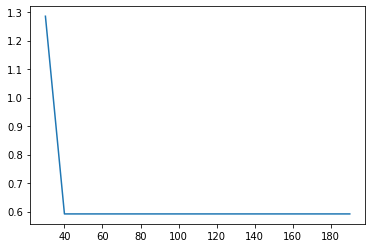

In [71]:
plt.plot(chi_list, S_list)

Strange.

Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0753871193360180, S = nan, norm_err = 1.5e-08
Current memory usage 446.0 MB, time elapsed: 6.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1363e-10, max_E_trunc = 3.8840e-11
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 10, age = 784
Energy = -0.0753871193445468, S = nan, norm_err = 2.7e-09
Current memory usage 446.0 MB, time elapsed: 10.3 s
Delta E = -1.7057e-12, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000033+2.2043253668465186e-16j)
After the canonicalization:
Bond dim =  [38, 40, 38, 40, 38, 40, 38, 40, 38, 40, 38, 40, 38, 40, 38, 40]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  60 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 f

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000044+1.6123853426311684e-17j)
After the canonicalization:
Bond dim =  [52, 60, 52, 60, 52, 60, 52, 60, 52, 60, 52, 60, 52, 60, 52, 60]
Computing properties
Optimizing
Loop for chi=60 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  80 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0753871193686955, S = nan, norm_err = 7.3e-08
Current memory usage 446.0 MB, time elapsed: 8.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3689e-14, max_E_trunc = 4.9738e-14
MPS bond dimensions: [80, 80, 72, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 10, age = 784
Energy = -0.0753871193686959, S = nan, norm_err = 5.2e-10
Current memory usage 446.0 MB, time elapsed: 15.7 s
Delta E = -8.8818e-17, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000001-3.4469904541606776e-16j)
After the canonicalization:
Bond dim =  [65, 80, 64, 80, 64, 80, 64, 80, 63, 80, 63, 80, 65, 80, 64, 80]
Computing properties
Optimizing
Loop for chi=80 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0753871193687141, S = nan, norm_err = 1.3e-08
Current memory usage 446.0 MB, time elapsed: 11.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7237e-15, max_E_trunc = 7.1054e-14
MPS bond dimensions: [100, 100, 78, 100, 100, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0753871193687092, S = nan, norm_err = 1.7e-09
Current memory usage 446.0 MB, time elapsed: 21.8 s
Delta E = 9.7700e-16, Delta S = 0.0000e+00 (pe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999907+6.883349718391028e-17j)
After the canonicalization:
Bond dim =  [65, 88, 66, 88, 65, 86, 66, 88, 66, 86, 66, 88, 65, 87, 65, 88]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  120 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0753871193687159, S = nan, norm_err = 6.5e-09
Current memory usage 446.0 MB, time elapsed: 12.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6579e-16, max_E_trunc = 7.8160e-14
MPS bond dimensions: [102, 120, 74, 120, 118, 120, 118, 120, 118, 120, 117, 120, 114, 119, 117, 120]
Updating environment
..
sweep 10, age = 784
Energy = -0.0753871193687234, S = nan, norm_err = 1.4e-10
Current memory usage 446.0 MB, time elapsed: 28.1 s
Delta E = -1.5099e-15, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999853+6.695001354657193e-16j)
After the canonicalization:
Bond dim =  [66, 88, 66, 88, 67, 87, 67, 88, 66, 88, 66, 88, 66, 88, 66, 88]
Computing properties
Optimizing
Loop for chi=120 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  140 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0753871193687221, S = nan, norm_err = 1.9e-07
Current memory usage 446.0 MB, time elapsed: 17.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1233e-17, max_E_trunc = 5.6843e-14
MPS bond dimensions: [105, 126, 74, 140, 131, 140, 132, 140, 130, 140, 130, 140, 131, 140, 129, 139]
Updating environment
..
sweep 10, age = 784
Energy = -0.0753871193687246, S = nan, norm_err = 1.5e-10
Current memory usage 446.0 MB, time elapsed: 40.9 s
Delta E = -4.8850e-16, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999777+5.491088015736239e-16j)
After the canonicalization:
Bond dim =  [66, 88, 66, 88, 67, 88, 66, 89, 65, 88, 66, 87, 66, 88, 66, 87]
Computing properties
Optimizing
Loop for chi=140 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  160 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0753871193687079, S = nan, norm_err = 5.2e-07
Current memory usage 446.0 MB, time elapsed: 23.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0267e-18, max_E_trunc = 7.8160e-14
MPS bond dimensions: [106, 129, 78, 145, 148, 157, 141, 160, 144, 160, 145, 160, 146, 159, 149, 138]
Updating environment
..
sweep 10, age = 784
Energy = -0.0753871193687086, S = nan, norm_err = 4.1e-10
Current memory usage 446.0 MB, time elapsed: 65.3 s
Delta E = -1.3323e-16, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999912-2.825924258189e-16j)
After the canonicalization:
Bond dim =  [66, 88, 66, 88, 66, 88, 66, 88, 66, 88, 66, 88, 66, 88, 66, 88]
Computing properties
Optimizing
Loop for chi=160 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  180 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0753871193687119, S = nan, norm_err = 3.5e-07
Current memory usage 446.0 MB, time elapsed: 25.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9102e-19, max_E_trunc = 9.2371e-14
MPS bond dimensions: [105, 130, 76, 144, 146, 174, 153, 175, 155, 177, 155, 177, 160, 172, 149, 141]
Updating environment
..
sweep 10, age = 784
Energy = -0.0753871193687230, S = nan, norm_err = 2.7e-10
Current memory usage 446.0 MB, time elapsed: 82.2 s
Delta E = -2.2204e-15, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999871-9.876944148489017e-17j)
After the canonicalization:
Bond dim =  [66, 88, 66, 88, 66, 88, 66, 87, 66, 88, 66, 87, 66, 88, 66, 88]
Computing properties
Optimizing
Loop for chi=180 done.
============================== END ==============================


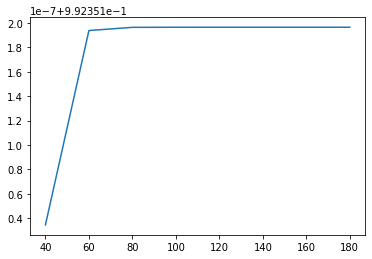

In [72]:
a = .8
b = 0.3
Jx, Jy, Jz = get_xyz(a, b)
chi_list = np.arange(40, 200, 20)
S_list = []

psi = None
for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))
    
plt.plot(chi_list, S_list)

Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0795728394075634, S = nan, norm_err = 4.6e-03
Current memory usage 446.0 MB, time elapsed: 8.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2767e-06, max_E_trunc = 2.0324e-06
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 10, age = 784
Energy = -0.0795749228931071, S = nan, norm_err = 1.4e-03
Current memory usage 446.0 MB, time elapsed: 12.3 s
Delta E = -4.1670e-07, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
DMRG finished after 35 sweeps.
total size = 1968, maximum chi = 40
Before the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000001579268-1.0678529357250685e-16j)
After the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  60 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for c

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0795727950648950, S = nan, norm_err = 6.7e-03
Current memory usage 446.0 MB, time elapsed: 13.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.6591e-08, max_E_trunc = 4.1577e-08
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 10, age = 784
Energy = -0.0795766723292759, S = nan, norm_err = 3.3e-03
Current memory usage 446.0 MB, time elapsed: 19.9 s
Delta E = -7.7545e-07, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG finished after 50 sweeps.
total size = 2832, maximum chi = 60
Before the canonicalization:
Bond dim =  [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.00000000061655-1.1221593082536673e-15j)
After the canonicalization:
Bond dim =  [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Computing properties
Optimizing
Loop for chi=60 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  80 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for c

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0795754980705801, S = nan, norm_err = 6.7e-03
Current memory usage 446.0 MB, time elapsed: 15.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2896e-09, max_E_trunc = 6.5824e-10
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 10, age = 784
Energy = -0.0795769399652679, S = nan, norm_err = 3.6e-03
Current memory usage 446.0 MB, time elapsed: 28.8 s
Delta E = -2.8838e-07, Delta S = 0.0000e+00 (per sweep)
max_

Updating environment
..
sweep 95, age = 4592
Energy = -0.0795774012920738, S = 1.0540160902538642, norm_err = 1.3e-04
Current memory usage 446.0 MB, time elapsed: 127.0 s
Delta E = 6.5668e-12, Delta S = 1.8865e-04 (per sweep)
max_trunc_err = 1.1992e-07, max_E_trunc = 1.1516e-07
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0795774011234816, S = 1.0530239125009835, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 131.8 s
Delta E = 3.3718e-11, Delta S = -1.9844e-04 (per sweep)
max_trunc_err = 1.2172e-07, max_E_trunc = 1.1684e-07
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 105, age = 5040
Energy = -0.0795774017834852, S = 1.0547319560440638, norm_err = 5.8e-05
Current memory usage 446.0 MB, time elapsed: 136.5 s
Delta E = -1.3200e-10, Delta S = 3.4161e-04 (per sweep)
max_trunc_err = 1.2141e-07, max_E_trunc 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.35e-05
Call psi.canonical_form()
DMRG finished after 120 sweeps.
total size = 6032, maximum chi = 80
Before the canonicalization:
Bond dim =  [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002-1.4697674010853747e-16j)
After the canonicalization:
Bond dim =  [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Computing properties
Optimizing
Loop for chi=80 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START=============

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0795759689008873, S = nan, norm_err = 5.8e-03
Current memory usage 446.0 MB, time elapsed: 20.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0637e-09, max_E_trunc = 4.7171e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0795770318065112, S = nan, norm_err = 3.5e-03
Current memory usage 446.0 MB, time elapsed: 36.6 s
Delta E = -2.1258e-07, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0795774625730612, S = 1.1004837653345478, norm_err = 9.0e-05
Current memory usage 446.0 MB, time elapsed: 133.7 s
Delta E = -2.0297e-11, Delta S = 3.5641e-04 (per sweep)
max_trunc_err = 6.5146e-08, max_E_trunc = 6.7035e-08
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0795774626347630, S = 1.1018809498709441, norm_err = 8.2e-05
Current memory usage 446.0 MB, time elapsed: 139.4 s
Delta E = -1.2340e-11, Delta S = 2.7944e-04 (per sweep)
max_trunc_err = 6.6108e-08, max_E_trunc = 6.7937e-08
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0795774626703434, S = 1.1030089949401582, norm_err = 6.5e-05
Current memory usage 446.0 MB, time elapsed: 145.2 s
Delta E = -7.1161e-12, Delta S = 2.2561e-04 (per sweep)
max_trun

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.54e-05
Call psi.canonical_form()
DMRG finished after 125 sweeps.
total size = 6256, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999947+6.15196743615815e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


===============

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0795760998840007, S = nan, norm_err = 5.8e-03
Current memory usage 446.0 MB, time elapsed: 27.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.1199e-10, max_E_trunc = 2.7126e-10
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 10, age = 784
Energy = -0.0795770537665788, S = nan, norm_err = 3.5e-03
Current memory usage 446.0 MB, time elapsed: 51.2 s
Delta E = -1.9078e-07, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0795774886620819, S = 1.1313674483017713, norm_err = 1.5e-04
Current memory usage 446.0 MB, time elapsed: 187.5 s
Delta E = -3.9846e-11, Delta S = 5.4264e-04 (per sweep)
max_trunc_err = 3.3137e-08, max_E_trunc = 3.4135e-08
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0795774888003322, S = 1.1339013691758699, norm_err = 1.0e-04
Current memory usage 446.0 MB, time elapsed: 195.4 s
Delta E = -2.7650e-11, Delta S = 5.0678e-04 (per sweep)
max_trunc_err = 3.3842e-08, max_E_trunc = 3.4836e-08
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0795774889026060, S = 1.1361461803406074, norm_err = 1.0e-04
Current memory usage 446.0 MB, time elapsed: 203.3 s
Delta E = -2.0455e-11, Delta S = 4.4896e-04 (per sweep)
max_trun

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.31e-05
Call psi.canonical_form()
DMRG finished after 150 sweeps.
total size = 7376, maximum chi = 120
Before the canonicalization:
Bond dim =  [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999976-1.2818583695184795e-16j)
After the canonicalization:
Bond dim =  [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Computing properties
Optimizing
Loop for chi=120 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


=============

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0795761553553256, S = nan, norm_err = 5.7e-03
Current memory usage 446.0 MB, time elapsed: 39.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7581e-10, max_E_trunc = 1.4538e-10
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 10, age = 784
Energy = -0.0795770658619070, S = nan, norm_err = 3.5e-03
Current memory usage 446.0 MB, time elapsed: 77.4 s
Delta E = -1.8210e-07, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0795775008647848, S = 1.1480975963949169, norm_err = 1.6e-04
Current memory usage 446.0 MB, time elapsed: 265.8 s
Delta E = -5.0438e-11, Delta S = 6.9677e-04 (per sweep)
max_trunc_err = 2.2727e-08, max_E_trunc = 2.2430e-08
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0795775010445077, S = 1.1510606666551282, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 276.6 s
Delta E = -3.5945e-11, Delta S = 5.9261e-04 (per sweep)
max_trunc_err = 2.3362e-08, max_E_trunc = 2.3034e-08
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0795775011699469, S = 1.1534132334831504, norm_err = 1.5e-04
Current memory usage 446.0 MB, time elapsed: 287.8 s
Delta E = -2.5088e-11, Delta S = 4.7051e-04 (per sweep)
max_trun

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.22e-05
Call psi.canonical_form()
DMRG finished after 150 sweeps.
total size = 7376, maximum chi = 140
Before the canonicalization:
Bond dim =  [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000024+1.8982686760148256e-16j)
After the canonicalization:
Bond dim =  [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Computing properties
Optimizing
Loop for chi=140 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


=============

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0795761986424934, S = nan, norm_err = 5.7e-03
Current memory usage 446.0 MB, time elapsed: 58.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3859e-11, max_E_trunc = 3.4404e-11
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 10, age = 784
Energy = -0.0795770752449398, S = nan, norm_err = 3.5e-03
Current memory usage 446.0 MB, time elapsed: 130.3 s
Delta E = -1.7532e-07, Delta S = 0.0000e+00

Updating environment
..
sweep 90, age = 4368
Energy = -0.0795775085003108, S = 1.1615999314578636, norm_err = 2.2e-04
Current memory usage 446.0 MB, time elapsed: 411.6 s
Delta E = -7.9552e-11, Delta S = 9.2560e-04 (per sweep)
max_trunc_err = 1.2884e-08, max_E_trunc = 1.3680e-08
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0795775088009094, S = 1.1656271830257667, norm_err = 2.0e-04
Current memory usage 446.0 MB, time elapsed: 426.4 s
Delta E = -6.0120e-11, Delta S = 8.0545e-04 (per sweep)
max_trunc_err = 1.3400e-08, max_E_trunc = 1.4199e-08
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0795775090146993, S = 1.1692099401194014, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 440.8 s
Delta E = -4.2758e-11, Delta S = 7.1655e-04 (per sweep)
max_trun

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.81e-05
Call psi.canonical_form()
DMRG finished after 160 sweeps.
total size = 7824, maximum chi = 160
Before the canonicalization:
Bond dim =  [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000147+9.878882148912191e-16j)
After the canonicalization:
Bond dim =  [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Computing properties
Optimizing
Loop for chi=160 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0795762195005749, S = nan, norm_err = 5.7e-03
Current memory usage 446.0 MB, time elapsed: 75.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5502e-11, max_E_trunc = 2.5679e-11
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 10, age = 784
Energy = -0.0795770803214670, S = nan, norm_err = 3.5e-03
Current memory usage 446.0 MB, time elapsed: 174.6 s
Delta E = -1.7216e-07, Delta S = 0.0000e+00

Updating environment
..
sweep 90, age = 4368
Energy = -0.0795775145764246, S = 1.1756022879442729, norm_err = 3.1e-04
Current memory usage 446.0 MB, time elapsed: 709.7 s
Delta E = -9.6986e-11, Delta S = 1.0563e-03 (per sweep)
max_trunc_err = 1.0519e-08, max_E_trunc = 1.1339e-08
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0795775149543836, S = 1.1803828870846118, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 738.0 s
Delta E = -7.5592e-11, Delta S = 9.5612e-04 (per sweep)
max_trunc_err = 1.1021e-08, max_E_trunc = 1.1867e-08
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0795775152501470, S = 1.1853170569325311, norm_err = 2.4e-04
Current memory usage 446.0 MB, time elapsed: 767.3 s
Delta E = -5.9153e-11, Delta S = 9.8683e-04 (per sweep)
max_trun

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 6.97e-05
Call psi.canonical_form()
DMRG finished after 150 sweeps.
total size = 7376, maximum chi = 180
Before the canonicalization:
Bond dim =  [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002+8.559570429886764e-16j)
After the canonicalization:
Bond dim =  [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Computing properties
Optimizing
Loop for chi=180 done.
============================== END ==============================


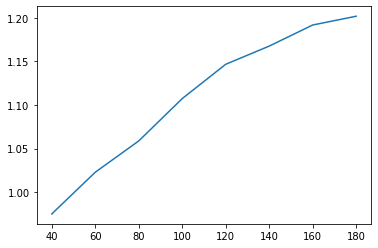

In [74]:
a = 1.
b = 0
Jx, Jy, Jz = get_xyz(a, b)
chi_list = np.arange(40, 200, 20)
S_list = []

psi = None
for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))
    
plt.plot(chi_list, S_list)

So the conclusion that `J=(1, 1, 0)` point is still gapless is preserved.

Now let's check the points on the line `a + b = 1`

Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0796008784891820, S = nan, norm_err = 4.8e-03
Current memory usage 446.0 MB, time elapsed: 6.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2180e-08, max_E_trunc = -1.0931e-10
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 10, age = 588
Energy = -0.0796036052600879, S = nan, norm_err = 2.2e-03
Current memory usage 446.0 MB, time elapsed: 12.7 s
Delta E = -5.4535e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.507

Updating environment
..
sweep 95, age = 3444
Energy = -0.0796042258251125, S = 1.5135491679557254, norm_err = 5.6e-04
Current memory usage 446.0 MB, time elapsed: 57.3 s
Delta E = -4.7715e-10, Delta S = 1.5023e-03 (per sweep)
max_trunc_err = 6.2451e-08, max_E_trunc = 3.9933e-08
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 100, age = 3612
Energy = -0.0796042280681277, S = 1.5195534888491027, norm_err = 5.1e-04
Current memory usage 446.0 MB, time elapsed: 59.7 s
Delta E = -4.4860e-10, Delta S = 1.2009e-03 (per sweep)
max_trunc_err = 6.4600e-08, max_E_trunc = 4.1324e-08
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 105, age = 3780
Energy = -0.0796042299630765, S = 1.5257095145725608, norm_err = 6.1e-04
Current memory usage 446.0 MB, time elapsed: 61.7 s
Delta E = -3.7899e-10, Delta S = 1.2312e-03 (per sweep)
max_trunc_err = 6.6574e-08, max_E_trunc = 4.2593e-08
MPS bond dimensions: 

..
sweep 190, age = 6636
Energy = -0.0796042443529335, S = 1.5788482526579133, norm_err = 1.7e-04
Current memory usage 446.0 MB, time elapsed: 98.2 s
Delta E = -6.9863e-11, Delta S = 2.8020e-04 (per sweep)
max_trunc_err = 8.5050e-08, max_E_trunc = 5.4495e-08
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 195, age = 6804
Energy = -0.0796042446674695, S = 1.5806595467188345, norm_err = 4.2e-04
Current memory usage 446.0 MB, time elapsed: 100.4 s
Delta E = -6.2907e-11, Delta S = 3.6226e-04 (per sweep)
max_trunc_err = 8.5547e-08, max_E_trunc = 5.4814e-08
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 200, age = 6972
Energy = -0.0796042449310240, S = 1.5815599627402614, norm_err = 8.8e-05
Current memory usage 446.0 MB, time elapsed: 102.4 s
Delta E = -5.2711e-11, Delta S = 1.8008e-04 (per sweep)
max_trunc_err = 8.6008e-08, max_E_trunc = 5.5110e-08
MPS bond dimensions: [40, 40, 40, 40, 4

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.56e-05
Call psi.canonical_form()
DMRG finished after 210 sweeps.
total size = 7548, maximum chi = 40
Before the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000007-1.2765134985584372e-16j)
After the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  60 

Sub

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0796028542148252, S = nan, norm_err = 2.1e-03
Current memory usage 446.0 MB, time elapsed: 9.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9321e-09, max_E_trunc = 1.3145e-13
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 10, age = 588
Energy = -0.0796038801835802, S = nan, norm_err = 1.8e-03
Current memory usage 446.0 MB, time elapsed: 19.3 s
Delta E = -2.0519e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7879

Updating environment
..
sweep 95, age = 3444
Energy = -0.0796042629279370, S = 1.5559072832103304, norm_err = 7.3e-04
Current memory usage 446.0 MB, time elapsed: 77.5 s
Delta E = -5.4475e-10, Delta S = 1.5059e-03 (per sweep)
max_trunc_err = 7.5686e-09, max_E_trunc = 4.9538e-09
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 100, age = 3612
Energy = -0.0796042652650684, S = 1.5625140893988183, norm_err = 7.3e-04
Current memory usage 446.0 MB, time elapsed: 80.5 s
Delta E = -4.6743e-10, Delta S = 1.3214e-03 (per sweep)
max_trunc_err = 7.9566e-09, max_E_trunc = 5.2070e-09
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 105, age = 3780
Energy = -0.0796042672917423, S = 1.5689515395639744, norm_err = 8.3e-04
Current memory usage 446.0 MB, time elapsed: 83.2 s
Delta E = -4.0533e-10, Delta S = 1.2875e-03 (per sweep)
max_trunc_err = 8.3011e-09, max_E_trunc = 5.4360e-09
MPS bond dimensions: 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.10e-03
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 145 sweeps.
total size = 5364, maximum chi = 60
Before the canonicalization:
Bond dim =  [60, 60, 59, 60, 60, 60, 59, 60, 60, 60, 59, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000056+3.122502256758253e-17j)
After the canonicalization:
Bond dim =  [60, 60, 59, 60, 60, 60, 59, 60, 60, 60, 59, 60]
Computing properties
Optimizing
Loop for chi=60 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  80 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating en

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0796039366098823, S = nan, norm_err = 2.4e-03
Current memory usage 446.0 MB, time elapsed: 9.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8706e-16, max_E_trunc = 6.0396e-14
MPS bond dimensions: [73, 72, 57, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 10, age = 588
Energy = -0.0796041995101768, S = nan, norm_err = 1.3e-03
Current memory usage 446.0 MB, time elapsed: 23.2 s
Delta E = -5.2580e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4541

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.08e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 80 sweeps.
total size = 3180, maximum chi = 80
Before the canonicalization:
Bond dim =  [79, 80, 79, 80, 79, 80, 79, 80, 79, 80, 79, 80]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999961+4.936929415489321e-16j)
After the canonicalization:
Bond dim =  [79, 80, 78, 80, 79, 80, 79, 80, 79, 80, 79, 80]
Computing properties
Optimizing
Loop for chi=80 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0796039385671123, S = nan, norm_err = 2.4e-03
Current memory usage 446.0 MB, time elapsed: 10.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.1152e-18, max_E_trunc = 5.6843e-14
MPS bond dimensions: [74, 74, 58, 100, 99, 100, 100, 100, 100, 100, 100, 97]
Updating environment
..
sweep 10, age = 588
Energy = -0.0796041998123395, S = nan, norm_err = 1.3e-03
Current memory usage 446.0 MB, time elapsed: 29.8 s
Delta E = -5.2249e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG finished after 85 sweeps.
total size = 3348, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.00000008928595+7.047314121155779e-18j)
After the canonicalization:
Bond dim =  [94, 100, 93, 100, 94, 100, 94, 100, 94, 100, 96, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  120 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0796039358417554, S = nan, norm_err = 2.4e-03
Current memory usage 446.0 MB, time elapsed: 11.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7867e-18, max_E_trunc = 6.3949e-14
MPS bond dimensions: [75, 74, 60, 107, 118, 120, 119, 120, 120, 120, 113, 98]
Updating environment
..
sweep 10, age = 588
Energy = -0.0796041993724087, S = nan, norm_err = 1.3e-03
Current memory usage 446.0 MB, time elapsed: 37.3 s
Delta E = -5.2706e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG finished after 85 sweeps.
total size = 3348, maximum chi = 120
Before the canonicalization:
Bond dim =  [118, 120, 118, 120, 118, 120, 120, 120, 120, 120, 118, 120]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000914001221+1.19522447494802e-15j)
After the canonicalization:
Bond dim =  [105, 120, 100, 120, 103, 120, 107, 120, 106, 120, 101, 120]
Computing properties
Optimizing
Loop for chi=120 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  140 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0796039361425978, S = nan, norm_err = 2.4e-03
Current memory usage 446.0 MB, time elapsed: 15.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1906e-17, max_E_trunc = 4.6185e-14
MPS bond dimensions: [78, 72, 57, 105, 124, 131, 117, 140, 139, 140, 138, 98]
Updating environment
..
sweep 10, age = 588
Energy = -0.0796041994236220, S = nan, norm_err = 1.3e-03
Current memory usage 446.0 MB, time elapsed: 48.2 s
Delta E = -5.2656e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.03e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 85 sweeps.
total size = 3348, maximum chi = 140
Before the canonicalization:
Bond dim =  [112, 140, 111, 140, 112, 140, 113, 140, 113, 140, 113, 140]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000007-4.495151242391614e-16j)
After the canonicalization:
Bond dim =  [111, 140, 110, 140, 111, 140, 113, 140, 113, 140, 113, 140]
Computing properties
Optimizing
Loop for chi=140 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  160 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0796039379522514, S = nan, norm_err = 2.4e-03
Current memory usage 446.0 MB, time elapsed: 11.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5595e-19, max_E_trunc = 6.0396e-14
MPS bond dimensions: [73, 73, 57, 104, 126, 134, 128, 157, 139, 136, 117, 97]
Updating environment
..
sweep 10, age = 588
Energy = -0.0796041997154010, S = nan, norm_err = 1.3e-03
Current memory usage 446.0 MB, time elapsed: 51.9 s
Delta E = -5.2353e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_er

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG finished after 85 sweeps.
total size = 3348, maximum chi = 160
Before the canonicalization:
Bond dim =  [158, 160, 158, 160, 160, 160, 160, 160, 160, 160, 158, 160]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000001158280096-1.5771302168132863e-16j)
After the canonicalization:
Bond dim =  [120, 160, 120, 160, 122, 160, 121, 160, 122, 160, 119, 160]
Computing properties
Optimizing
Loop for chi=160 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  180 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0796039352067242, S = nan, norm_err = 2.4e-03
Current memory usage 446.0 MB, time elapsed: 21.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7416e-18, max_E_trunc = 2.8422e-14
MPS bond dimensions: [72, 74, 58, 108, 156, 176, 179, 180, 169, 140, 123, 97]
Updating environment
..
sweep 10, age = 588
Energy = -0.0796041992729635, S = nan, norm_err = 1.3e-03
Current memory usage 446.0 MB, time elapsed: 72.7 s
Delta E = -5.2813e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_er

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG finished after 85 sweeps.
total size = 3348, maximum chi = 180
Before the canonicalization:
Bond dim =  [177, 180, 180, 180, 178, 180, 180, 180, 178, 180, 179, 180]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000001503934668+9.552094210116266e-16j)
After the canonicalization:
Bond dim =  [126, 173, 125, 180, 125, 173, 126, 180, 125, 174, 125, 180]
Computing properties
Optimizing
Loop for chi=180 done.
============================== END ==============================


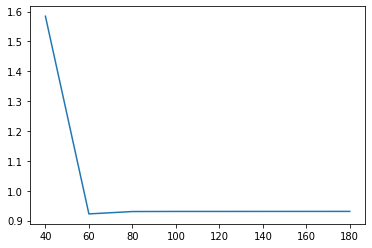

In [75]:
a = .5
b = .5
Jx, Jy, Jz = get_xyz(a, b)

L = 3 # for reducing computation

chi_list = np.arange(40, 200, 20)
S_list = []

psi = None
for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))
    
plt.plot(chi_list, S_list)

which is quite surprising...

Now let's try unbiased point here

Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.0 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0795760458923419, S = nan, norm_err = 6.1e-03
Current memory usage 446.0 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2342e-16, max_E_trunc = 3.5527e-15
MPS bond dimensions: [26, 37, 31, 40, 40, 40, 40, 40, 40, 39, 39, 40]
Updating environment
..
sweep 10, age = 588
Energy = -0.0795771519748578, S = nan, norm_err = 3.1e-03
Current memory usage 446.0 MB, time elapsed: 9.3 s
Delta E = -2.2122e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7254e-

Updating environment
..
sweep 95, age = 3444
Energy = -0.0795774679491359, S = 0.6403617905232074, norm_err = 2.7e-04
Current memory usage 446.0 MB, time elapsed: 48.8 s
Delta E = -6.9828e-11, Delta S = 8.4208e-04 (per sweep)
max_trunc_err = 2.6282e-10, max_E_trunc = 2.2118e-10
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 100, age = 3612
Energy = -0.0795774682438513, S = 0.6443561859299808, norm_err = 2.5e-04
Current memory usage 446.0 MB, time elapsed: 50.5 s
Delta E = -5.8943e-11, Delta S = 7.9888e-04 (per sweep)
max_trunc_err = 2.8606e-10, max_E_trunc = 2.4016e-10
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 105, age = 3780
Energy = -0.0795774684944301, S = 0.6480713022063351, norm_err = 2.3e-04
Current memory usage 446.0 MB, time elapsed: 52.2 s
Delta E = -5.0116e-11, Delta S = 7.4302e-04 (per sweep)
max_trunc_err = 3.0905e-10, max_E_trunc = 2.5915e-10
MPS bond dimensions: 

..
sweep 190, age = 6636
Energy = -0.0795774700995509, S = 0.6898991210828886, norm_err = 1.1e-04
Current memory usage 446.0 MB, time elapsed: 81.1 s
Delta E = -6.3987e-12, Delta S = 3.3798e-04 (per sweep)
max_trunc_err = 5.2997e-10, max_E_trunc = 4.2883e-10
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 195, age = 6804
Energy = -0.0795774701283278, S = 0.6915015728954645, norm_err = 1.0e-04
Current memory usage 446.0 MB, time elapsed: 82.8 s
Delta E = -5.7554e-12, Delta S = 3.2049e-04 (per sweep)
max_trunc_err = 5.4271e-10, max_E_trunc = 4.4020e-10
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 200, age = 6972
Energy = -0.0795774701540732, S = 0.6930504931252224, norm_err = 9.9e-05
Current memory usage 446.0 MB, time elapsed: 84.5 s
Delta E = -5.1491e-12, Delta S = 3.0978e-04 (per sweep)
max_trunc_err = 5.5580e-10, max_E_trunc = 4.4997e-10
MPS bond dimensions: [40, 40, 40, 40, 40,

..
sweep 285, age = 9828
Energy = -0.0795774703750804, S = 0.7118935110587543, norm_err = 6.1e-05
Current memory usage 446.0 MB, time elapsed: 113.6 s
Delta E = -1.2117e-12, Delta S = 1.6537e-04 (per sweep)
max_trunc_err = 7.1833e-10, max_E_trunc = 5.7810e-10
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 290, age = 9996
Energy = -0.0795774703800494, S = 0.7126991775966710, norm_err = 3.9e-05
Current memory usage 446.0 MB, time elapsed: 115.3 s
Delta E = -9.9381e-13, Delta S = 1.6113e-04 (per sweep)
max_trunc_err = 7.2621e-10, max_E_trunc = 5.8367e-10
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 295, age = 10164
Energy = -0.0795774703849285, S = 0.7133537451344200, norm_err = 5.8e-05
Current memory usage 446.0 MB, time elapsed: 116.9 s
Delta E = -9.7581e-13, Delta S = 1.3091e-04 (per sweep)
max_trunc_err = 7.3238e-10, max_E_trunc = 5.8924e-10
MPS bond dimensions: [40, 40, 40, 40,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.69e-05
Call psi.canonical_form()
DMRG finished after 315 sweeps.
total size = 11076, maximum chi = 40
Before the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001+0j)
After the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.0 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  60 

Subconfig 'trunc_params'=

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0795773608971236, S = nan, norm_err = 3.0e-03
Current memory usage 446.0 MB, time elapsed: 6.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3607e-15, max_E_trunc = 6.3949e-14
MPS bond dimensions: [50, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 10, age = 588
Energy = -0.0795774461167923, S = nan, norm_err = 1.1e-03
Current memory usage 446.0 MB, time elapsed: 13.1 s
Delta E = -1.7044e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9826

Updating environment
..
sweep 95, age = 3444
Energy = -0.0795774700136936, S = 0.6742779984983729, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 57.8 s
Delta E = -2.1726e-11, Delta S = 5.9836e-04 (per sweep)
max_trunc_err = 2.6931e-11, max_E_trunc = 2.2510e-11
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 100, age = 3612
Energy = -0.0795774701110995, S = 0.6771006889359801, norm_err = 1.7e-04
Current memory usage 446.0 MB, time elapsed: 59.8 s
Delta E = -1.9481e-11, Delta S = 5.6454e-04 (per sweep)
max_trunc_err = 2.8913e-11, max_E_trunc = 2.4329e-11
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 105, age = 3780
Energy = -0.0795774701988776, S = 0.6797674480184304, norm_err = 1.7e-04
Current memory usage 446.0 MB, time elapsed: 61.8 s
Delta E = -1.7556e-11, Delta S = 5.3335e-04 (per sweep)
max_trunc_err = 3.0509e-11, max_E_trunc = 2.5750e-11
MPS bond dimensions: 

..
sweep 190, age = 6636
Energy = -0.0795774709310895, S = 0.7150514793903332, norm_err = 9.4e-05
Current memory usage 446.0 MB, time elapsed: 99.0 s
Delta E = -4.2813e-12, Delta S = 3.1014e-04 (per sweep)
max_trunc_err = 6.2609e-11, max_E_trunc = 5.1955e-11
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 195, age = 6804
Energy = -0.0795774709508758, S = 0.7166138971004985, norm_err = 1.0e-04
Current memory usage 446.0 MB, time elapsed: 101.0 s
Delta E = -3.9573e-12, Delta S = 3.1248e-04 (per sweep)
max_trunc_err = 6.4509e-11, max_E_trunc = 5.4115e-11
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 200, age = 6972
Energy = -0.0795774709694020, S = 0.7182092178118764, norm_err = 1.1e-04
Current memory usage 446.0 MB, time elapsed: 103.0 s
Delta E = -3.7052e-12, Delta S = 3.1906e-04 (per sweep)
max_trunc_err = 6.6419e-11, max_E_trunc = 5.5365e-11
MPS bond dimensions: [60, 60, 60, 60, 6

..
sweep 285, age = 9828
Energy = -0.0795774711500220, S = 0.7398381832638536, norm_err = 8.5e-05
Current memory usage 446.0 MB, time elapsed: 138.7 s
Delta E = 1.5537e-13, Delta S = 2.4786e-04 (per sweep)
max_trunc_err = 9.7366e-11, max_E_trunc = 8.0831e-11
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 290, age = 9996
Energy = -0.0795774711625086, S = 0.7409717031716502, norm_err = 1.5e-04
Current memory usage 446.0 MB, time elapsed: 141.3 s
Delta E = -2.4973e-12, Delta S = 2.2670e-04 (per sweep)
max_trunc_err = 9.8891e-11, max_E_trunc = 8.1627e-11
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 295, age = 10164
Energy = -0.0795774711698793, S = 0.7419393240403208, norm_err = 7.6e-05
Current memory usage 446.0 MB, time elapsed: 143.9 s
Delta E = -1.4741e-12, Delta S = 1.9352e-04 (per sweep)
max_trunc_err = 1.0044e-10, max_E_trunc = 8.3105e-11
MPS bond dimensions: [60, 60, 60, 60, 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.15e-05
Call psi.canonical_form()
DMRG finished after 355 sweeps.
total size = 12420, maximum chi = 60
Before the canonicalization:
Bond dim =  [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1+0j)
After the canonicalization:
Bond dim =  [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Computing properties
Optimizing
Loop for chi=60 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.0 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  80 

Subconfig 'trunc_params'=Config(name='tru

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0795773464680731, S = nan, norm_err = 3.3e-03
Current memory usage 446.0 MB, time elapsed: 6.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5564e-15, max_E_trunc = 7.4607e-14
MPS bond dimensions: [54, 70, 64, 80, 77, 80, 79, 80, 80, 80, 79, 80]
Updating environment
..
sweep 10, age = 588
Energy = -0.0795774417239515, S = nan, norm_err = 1.4e-03
Current memory usage 446.0 MB, time elapsed: 15.0 s
Delta E = -1.9051e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.8837

Updating environment
..
sweep 95, age = 3444
Energy = -0.0795774703080691, S = 0.6826326908953980, norm_err = 1.6e-04
Current memory usage 446.0 MB, time elapsed: 82.0 s
Delta E = -1.6237e-11, Delta S = 5.2461e-04 (per sweep)
max_trunc_err = 3.4164e-12, max_E_trunc = 3.6948e-12
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 100, age = 3612
Energy = -0.0795774703819253, S = 0.6852082465800698, norm_err = 1.5e-04
Current memory usage 446.0 MB, time elapsed: 84.9 s
Delta E = -1.4771e-11, Delta S = 5.1511e-04 (per sweep)
max_trunc_err = 3.7302e-12, max_E_trunc = 3.9222e-12
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 105, age = 3780
Energy = -0.0795774704494955, S = 0.6877250574736831, norm_err = 1.6e-04
Current memory usage 446.0 MB, time elapsed: 88.0 s
Delta E = -1.3514e-11, Delta S = 5.0336e-04 (per sweep)
max_trunc_err = 4.0671e-12, max_E_trunc = 4.0359e-12
MPS bond dimensions: 

Updating environment
..
sweep 190, age = 6636
Energy = -0.0795774710545440, S = 0.7217152266408985, norm_err = 9.9e-05
Current memory usage 446.0 MB, time elapsed: 134.7 s
Delta E = -3.8474e-12, Delta S = 3.1682e-04 (per sweep)
max_trunc_err = 9.9226e-12, max_E_trunc = 9.5497e-12
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 195, age = 6804
Energy = -0.0795774710726202, S = 0.7233709104394807, norm_err = 1.1e-04
Current memory usage 446.0 MB, time elapsed: 137.7 s
Delta E = -3.6152e-12, Delta S = 3.3114e-04 (per sweep)
max_trunc_err = 1.0326e-11, max_E_trunc = 1.0118e-11
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 200, age = 6972
Energy = -0.0795774710895406, S = 0.7250048458430790, norm_err = 1.0e-04
Current memory usage 446.0 MB, time elapsed: 140.6 s
Delta E = -3.3841e-12, Delta S = 3.2679e-04 (per sweep)
max_trunc_err = 1.0667e-11, max_E_trunc = 9.4360e-12
MPS bond dimensio

Updating environment
..
sweep 285, age = 9828
Energy = -0.0795774712724769, S = 0.7475379167562411, norm_err = 6.8e-05
Current memory usage 446.0 MB, time elapsed: 185.1 s
Delta E = -1.3633e-12, Delta S = 2.1723e-04 (per sweep)
max_trunc_err = 1.7128e-11, max_E_trunc = 1.5802e-11
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 290, age = 9996
Energy = -0.0795774712791181, S = 0.7488759363806577, norm_err = 8.4e-05
Current memory usage 446.0 MB, time elapsed: 187.7 s
Delta E = -1.3282e-12, Delta S = 2.6760e-04 (per sweep)
max_trunc_err = 1.7722e-11, max_E_trunc = 1.6257e-11
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 295, age = 10164
Energy = -0.0795774712838930, S = 0.7501490289737718, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 190.8 s
Delta E = -9.5497e-13, Delta S = 2.5462e-04 (per sweep)
max_trunc_err = 1.8186e-11, max_E_trunc = 1.7621e-11
MPS bond dimensi

Updating environment
..
sweep 380, age = 13020
Energy = -0.0795774713608447, S = 0.7662792975911875, norm_err = 5.6e-05
Current memory usage 446.0 MB, time elapsed: 238.1 s
Delta E = -5.9781e-13, Delta S = 1.7189e-04 (per sweep)
max_trunc_err = 2.4227e-11, max_E_trunc = 2.4102e-11
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 385, age = 13188
Energy = -0.0795774713641038, S = 0.7671600496307299, norm_err = 5.4e-05
Current memory usage 446.0 MB, time elapsed: 240.5 s
Delta E = -6.5180e-13, Delta S = 1.7615e-04 (per sweep)
max_trunc_err = 2.4597e-11, max_E_trunc = 2.2283e-11
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 390, age = 13356
Energy = -0.0795774713669838, S = 0.7679255310081626, norm_err = 4.7e-05
Current memory usage 446.0 MB, time elapsed: 243.1 s
Delta E = -5.7601e-13, Delta S = 1.5310e-04 (per sweep)
max_trunc_err = 2.5001e-11, max_E_trunc = 2.2965e-11
MPS bond dimen

Updating environment
..
sweep 475, age = 16212
Energy = -0.0795774714031457, S = 0.7803746597323210, norm_err = 3.6e-05
Current memory usage 446.0 MB, time elapsed: 287.8 s
Delta E = -3.3538e-13, Delta S = 1.0144e-04 (per sweep)
max_trunc_err = 3.1055e-11, max_E_trunc = 2.8876e-11
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 480, age = 16380
Energy = -0.0795774714046805, S = 0.7814702395195682, norm_err = 6.8e-05
Current memory usage 446.0 MB, time elapsed: 290.9 s
Delta E = -3.0695e-13, Delta S = 2.1912e-04 (per sweep)
max_trunc_err = 3.1502e-11, max_E_trunc = 2.7512e-11
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 485, age = 16548
Energy = -0.0795774714035531, S = 0.7823029865690274, norm_err = 1.4e-04
Current memory usage 446.0 MB, time elapsed: 294.3 s
Delta E = 2.2548e-13, Delta S = 1.6655e-04 (per sweep)
max_trunc_err = 3.1793e-11, max_E_trunc = 2.9331e-11
MPS bond dimens

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.84e-05
Call psi.canonical_form()
DMRG finished after 495 sweeps.
total size = 17124, maximum chi = 80
Before the canonicalization:
Bond dim =  [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999962+0j)
After the canonicalization:
Bond dim =  [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Computing properties
Optimizing
Loop for chi=80 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.0 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0795773368256249, S = nan, norm_err = 3.4e-03
Current memory usage 446.0 MB, time elapsed: 8.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3515e-16, max_E_trunc = 7.1054e-14
MPS bond dimensions: [58, 72, 63, 100, 100, 100, 99, 100, 97, 98, 98, 99]
Updating environment
..
sweep 10, age = 588
Energy = -0.0795774357597618, S = nan, norm_err = 1.7e-03
Current memory usage 446.0 MB, time elapsed: 19.0 s
Delta E = -1.9787e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.00e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 20 sweeps.
total size = 1164, maximum chi = 100
Before the canonicalization:
Bond dim =  [78, 100, 81, 100, 78, 100, 79, 100, 78, 100, 78, 100]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000002+0j)
After the canonicalization:
Bond dim =  [78, 100, 81, 100, 78, 100, 77, 100, 78, 100, 78, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.0 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  120 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0795773910172593, S = nan, norm_err = 1.9e-03
Current memory usage 446.0 MB, time elapsed: 8.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6676e-16, max_E_trunc = 8.1712e-14
MPS bond dimensions: [54, 68, 66, 119, 108, 117, 114, 120, 111, 116, 113, 104]
Updating environment
..
sweep 10, age = 588
Energy = -0.0795774461113530, S = nan, norm_err = 3.5e-04
Current memory usage 446.0 MB, time elapsed: 20.3 s
Delta E = -1.1019e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err

Updating environment
..
sweep 95, age = 3444
Energy = -0.0795774695537167, S = 0.6628802502835964, norm_err = 2.2e-04
Current memory usage 446.0 MB, time elapsed: 127.6 s
Delta E = -3.5012e-11, Delta S = 7.0223e-04 (per sweep)
max_trunc_err = 5.9927e-14, max_E_trunc = 6.8212e-13
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 100, age = 3612
Energy = -0.0795774697083734, S = 0.6662431897310558, norm_err = 2.1e-04
Current memory usage 446.0 MB, time elapsed: 131.6 s
Delta E = -3.0931e-11, Delta S = 6.7259e-04 (per sweep)
max_trunc_err = 6.9106e-14, max_E_trunc = 3.9790e-13
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 105, age = 3780
Energy = -0.0795774698457829, S = 0.6694836361658406, norm_err = 2.1e-04
Current memory usage 446.0 MB, time elapsed: 136.0 s
Delta E = -2.7482e-11, Delta S = 6.4809e-04 (per sweep)
max_trunc_err = 7.8455e-14, max_E_trunc = 8.526

Updating environment
..
sweep 190, age = 6636
Energy = -0.0795774709200335, S = 0.7111356097816154, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 209.6 s
Delta E = -5.9856e-12, Delta S = 3.8994e-04 (per sweep)
max_trunc_err = 3.3447e-13, max_E_trunc = 1.8190e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 195, age = 6804
Energy = -0.0795774709480668, S = 0.7130559191384968, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 213.7 s
Delta E = -5.6067e-12, Delta S = 3.8406e-04 (per sweep)
max_trunc_err = 3.5216e-13, max_E_trunc = 2.2737e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 200, age = 6972
Energy = -0.0795774709740916, S = 0.7148952525228124, norm_err = 1.1e-04
Current memory usage 446.0 MB, time elapsed: 217.5 s
Delta E = -5.2050e-12, Delta S = 3.6787e-04 (per sweep)
max_trunc_err = 3.7037e-13, max_E_trunc = 1.81

Updating environment
..
sweep 285, age = 9828
Energy = -0.0795774712426341, S = 0.7413809394366543, norm_err = 7.9e-05
Current memory usage 446.0 MB, time elapsed: 289.2 s
Delta E = -1.9080e-12, Delta S = 2.7587e-04 (per sweep)
max_trunc_err = 7.9668e-13, max_E_trunc = 2.8422e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 290, age = 9996
Energy = -0.0795774712520275, S = 0.7427442387234829, norm_err = 8.1e-05
Current memory usage 446.0 MB, time elapsed: 293.5 s
Delta E = -1.8787e-12, Delta S = 2.7266e-04 (per sweep)
max_trunc_err = 8.2745e-13, max_E_trunc = 2.1600e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 295, age = 10164
Energy = -0.0795774712610561, S = 0.7440393618376770, norm_err = 8.4e-05
Current memory usage 446.0 MB, time elapsed: 297.7 s
Delta E = -1.8057e-12, Delta S = 2.5902e-04 (per sweep)
max_trunc_err = 8.5512e-13, max_E_trunc = 2.2

Updating environment
..
sweep 380, age = 13020
Energy = -0.0795774713662164, S = 0.7634209036046965, norm_err = 6.1e-05
Current memory usage 446.0 MB, time elapsed: 372.2 s
Delta E = -8.9718e-13, Delta S = 2.1638e-04 (per sweep)
max_trunc_err = 1.4042e-12, max_E_trunc = 3.6380e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 385, age = 13188
Energy = -0.0795774713703471, S = 0.7644220508513636, norm_err = 6.6e-05
Current memory usage 446.0 MB, time elapsed: 376.6 s
Delta E = -8.2612e-13, Delta S = 2.0023e-04 (per sweep)
max_trunc_err = 1.4242e-12, max_E_trunc = 5.0022e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 390, age = 13356
Energy = -0.0795774713744682, S = 0.7654219837591910, norm_err = 7.2e-05
Current memory usage 446.0 MB, time elapsed: 380.9 s
Delta E = -8.2423e-13, Delta S = 1.9999e-04 (per sweep)
max_trunc_err = 1.4774e-12, max_E_trunc = 4

Updating environment
..
sweep 475, age = 16212
Energy = -0.0795774714259305, S = 0.7805777042710430, norm_err = 5.4e-05
Current memory usage 446.0 MB, time elapsed: 453.3 s
Delta E = -4.7938e-13, Delta S = 1.5923e-04 (per sweep)
max_trunc_err = 1.9511e-12, max_E_trunc = 5.0022e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 480, age = 16380
Energy = -0.0795774714281663, S = 0.7813943499350682, norm_err = 5.2e-05
Current memory usage 446.0 MB, time elapsed: 457.5 s
Delta E = -4.4717e-13, Delta S = 1.6333e-04 (per sweep)
max_trunc_err = 2.0017e-12, max_E_trunc = 4.7748e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 485, age = 16548
Energy = -0.0795774714305632, S = 0.7821881180894982, norm_err = 4.9e-05
Current memory usage 446.0 MB, time elapsed: 461.5 s
Delta E = -4.7938e-13, Delta S = 1.5875e-04 (per sweep)
max_trunc_err = 2.0259e-12, max_E_trunc = 5

Updating environment
..
sweep 570, age = 19404
Energy = -0.0795774714590512, S = 0.7945971628708420, norm_err = 4.5e-05
Current memory usage 446.0 MB, time elapsed: 526.5 s
Delta E = -1.7621e-13, Delta S = 1.3505e-04 (per sweep)
max_trunc_err = 2.5936e-12, max_E_trunc = 4.0927e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 575, age = 19572
Energy = -0.0795774714604344, S = 0.7952842994829358, norm_err = 3.9e-05
Current memory usage 446.0 MB, time elapsed: 530.1 s
Delta E = -2.7664e-13, Delta S = 1.3743e-04 (per sweep)
max_trunc_err = 2.6435e-12, max_E_trunc = 6.8212e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 580, age = 19740
Energy = -0.0795774714620165, S = 0.7959372494580895, norm_err = 3.9e-05
Current memory usage 446.0 MB, time elapsed: 533.7 s
Delta E = -3.1643e-13, Delta S = 1.3059e-04 (per sweep)
max_trunc_err = 2.6773e-12, max_E_trunc = 5

Updating environment
..
sweep 665, age = 22596
Energy = -0.0795774714796096, S = 0.8063938997343379, norm_err = 3.3e-05
Current memory usage 446.0 MB, time elapsed: 595.5 s
Delta E = -3.3538e-13, Delta S = 1.2072e-04 (per sweep)
max_trunc_err = 3.2989e-12, max_E_trunc = 8.1855e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 670, age = 22764
Energy = -0.0795774714801875, S = 0.8069212158564253, norm_err = 2.8e-05
Current memory usage 446.0 MB, time elapsed: 599.5 s
Delta E = -1.1558e-13, Delta S = 1.0546e-04 (per sweep)
max_trunc_err = 3.3164e-12, max_E_trunc = 5.4570e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 675, age = 22932
Energy = -0.0795774714813149, S = 0.8075454891263357, norm_err = 3.5e-05
Current memory usage 446.0 MB, time elapsed: 603.9 s
Delta E = -2.2548e-13, Delta S = 1.2485e-04 (per sweep)
max_trunc_err = 3.3565e-12, max_E_trunc = 5

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.25e-05
Call psi.canonical_form()
DMRG finished after 680 sweeps.
total size = 23340, maximum chi = 120
Before the canonicalization:
Bond dim =  [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000002+0j)
After the canonicalization:
Bond dim =  [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Computing properties
Optimizing
Loop for chi=120 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.0 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  14

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0795773325156528, S = nan, norm_err = 3.3e-03
Current memory usage 446.0 MB, time elapsed: 10.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4863e-14, max_E_trunc = 5.3291e-14
MPS bond dimensions: [92, 95, 98, 140, 140, 140, 138, 140, 140, 140, 140, 140]
Updating environment
..
sweep 10, age = 588
Energy = -0.0795774317165119, S = nan, norm_err = 1.9e-03
Current memory usage 446.0 MB, time elapsed: 24.7 s
Delta E = -1.9840e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_er

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.17e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 20 sweeps.
total size = 1164, maximum chi = 134
Before the canonicalization:
Bond dim =  [92, 117, 107, 134, 100, 128, 88, 120, 83, 115, 83, 115]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000029+0j)
After the canonicalization:
Bond dim =  [91, 117, 106, 134, 98, 128, 88, 118, 83, 115, 83, 115]
Computing properties
Optimizing
Loop for chi=140 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.0 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  160 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0795773864304805, S = nan, norm_err = 2.1e-03
Current memory usage 446.0 MB, time elapsed: 8.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8070e-17, max_E_trunc = 1.0303e-13
MPS bond dimensions: [57, 67, 56, 113, 140, 122, 105, 125, 129, 152, 145, 108]
Updating environment
..
sweep 10, age = 588
Energy = -0.0795774466397138, S = nan, norm_err = 4.1e-04
Current memory usage 446.0 MB, time elapsed: 24.8 s
Delta E = -1.2042e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err

Updating environment
..
sweep 95, age = 3444
Energy = -0.0795774696081348, S = 0.6640364097574574, norm_err = 2.2e-04
Current memory usage 446.0 MB, time elapsed: 202.7 s
Delta E = -3.3545e-11, Delta S = 6.9145e-04 (per sweep)
max_trunc_err = 4.1113e-15, max_E_trunc = 5.6843e-13
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 100, age = 3612
Energy = -0.0795774697565766, S = 0.6673564390391036, norm_err = 2.1e-04
Current memory usage 446.0 MB, time elapsed: 209.5 s
Delta E = -2.9688e-11, Delta S = 6.6401e-04 (per sweep)
max_trunc_err = 4.8194e-15, max_E_trunc = 8.5265e-13
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 105, age = 3780
Energy = -0.0795774698888347, S = 0.6705536768439054, norm_err = 2.0e-04
Current memory usage 446.0 MB, time elapsed: 216.8 s
Delta E = -2.6452e-11, Delta S = 6.3945e-04 (per sweep)
max_trunc_err = 5.6062e-15, max_E_trunc = 6.821

Updating environment
..
sweep 190, age = 6636
Energy = -0.0795774709306064, S = 0.7118316359689111, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 327.8 s
Delta E = -5.8833e-12, Delta S = 3.8879e-04 (per sweep)
max_trunc_err = 3.1202e-14, max_E_trunc = 1.5916e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 195, age = 6804
Energy = -0.0795774709580333, S = 0.7137255241246135, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 334.1 s
Delta E = -5.4854e-12, Delta S = 3.7878e-04 (per sweep)
max_trunc_err = 3.3438e-14, max_E_trunc = 1.1369e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 200, age = 6972
Energy = -0.0795774709833523, S = 0.7155814748429434, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 340.2 s
Delta E = -5.0638e-12, Delta S = 3.7119e-04 (per sweep)
max_trunc_err = 3.5794e-14, max_E_trunc = 1.93

Updating environment
..
sweep 285, age = 9828
Energy = -0.0795774712477216, S = 0.7420276296476119, norm_err = 8.4e-05
Current memory usage 446.0 MB, time elapsed: 458.9 s
Delta E = -1.9526e-12, Delta S = 2.6964e-04 (per sweep)
max_trunc_err = 8.9632e-14, max_E_trunc = 2.8422e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 290, age = 9996
Energy = -0.0795774712569729, S = 0.7433549529287590, norm_err = 8.4e-05
Current memory usage 446.0 MB, time elapsed: 465.1 s
Delta E = -1.8503e-12, Delta S = 2.6546e-04 (per sweep)
max_trunc_err = 9.3306e-14, max_E_trunc = 2.1600e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 295, age = 10164
Energy = -0.0795774712657504, S = 0.7446521999579541, norm_err = 8.1e-05
Current memory usage 446.0 MB, time elapsed: 470.5 s
Delta E = -1.7555e-12, Delta S = 2.5945e-04 (per sweep)
max_trunc_err = 9.7174e-14, max_E_trunc = 1.7

Updating environment
..
sweep 380, age = 13020
Energy = -0.0795774713699113, S = 0.7641146476815770, norm_err = 6.3e-05
Current memory usage 446.0 MB, time elapsed: 581.4 s
Delta E = -8.3749e-13, Delta S = 2.0532e-04 (per sweep)
max_trunc_err = 1.6897e-13, max_E_trunc = 3.1832e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 385, age = 13188
Energy = -0.0795774713742314, S = 0.7651220346166444, norm_err = 6.8e-05
Current memory usage 446.0 MB, time elapsed: 588.7 s
Delta E = -8.6402e-13, Delta S = 2.0148e-04 (per sweep)
max_trunc_err = 1.7451e-13, max_E_trunc = 3.4106e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 390, age = 13356
Energy = -0.0795774713786746, S = 0.7661262752684910, norm_err = 6.2e-05
Current memory usage 446.0 MB, time elapsed: 596.5 s
Delta E = -8.8865e-13, Delta S = 2.0085e-04 (per sweep)
max_trunc_err = 1.7830e-13, max_E_trunc = 3

Updating environment
..
sweep 475, age = 16212
Energy = -0.0795774714300137, S = 0.7815013917869144, norm_err = 5.1e-05
Current memory usage 446.0 MB, time elapsed: 693.7 s
Delta E = -5.0022e-13, Delta S = 1.6613e-04 (per sweep)
max_trunc_err = 2.7365e-13, max_E_trunc = 5.4570e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 480, age = 16380
Energy = -0.0795774714319937, S = 0.7823196599981999, norm_err = 5.1e-05
Current memory usage 446.0 MB, time elapsed: 699.1 s
Delta E = -3.9601e-13, Delta S = 1.6365e-04 (per sweep)
max_trunc_err = 2.7807e-13, max_E_trunc = 5.0022e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 485, age = 16548
Energy = -0.0795774714346180, S = 0.7831296223632349, norm_err = 5.0e-05
Current memory usage 446.0 MB, time elapsed: 704.2 s
Delta E = -5.2486e-13, Delta S = 1.6199e-04 (per sweep)
max_trunc_err = 2.8231e-13, max_E_trunc = 5

Updating environment
..
sweep 570, age = 19404
Energy = -0.0795774714630208, S = 0.7958164538638640, norm_err = 4.3e-05
Current memory usage 446.0 MB, time elapsed: 795.6 s
Delta E = -5.8739e-14, Delta S = 1.3929e-04 (per sweep)
max_trunc_err = 3.8921e-13, max_E_trunc = 5.4570e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 575, age = 19572
Energy = -0.0795774714647640, S = 0.7965105021000133, norm_err = 4.3e-05
Current memory usage 446.0 MB, time elapsed: 800.9 s
Delta E = -3.4864e-13, Delta S = 1.3881e-04 (per sweep)
max_trunc_err = 3.9576e-13, max_E_trunc = 4.0927e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 580, age = 19740
Energy = -0.0795774714665451, S = 0.7971885142049627, norm_err = 4.2e-05
Current memory usage 446.0 MB, time elapsed: 806.2 s
Delta E = -3.5622e-13, Delta S = 1.3560e-04 (per sweep)
max_trunc_err = 4.0239e-13, max_E_trunc = 4

Updating environment
..
sweep 665, age = 22596
Energy = -0.0795774714836834, S = 0.8079547564585224, norm_err = 3.6e-05
Current memory usage 446.0 MB, time elapsed: 912.3 s
Delta E = -2.2169e-13, Delta S = 1.1720e-04 (per sweep)
max_trunc_err = 5.1531e-13, max_E_trunc = 4.0927e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 670, age = 22764
Energy = -0.0795774714853223, S = 0.8085408458627691, norm_err = 3.7e-05
Current memory usage 446.0 MB, time elapsed: 918.5 s
Delta E = -3.2780e-13, Delta S = 1.1722e-04 (per sweep)
max_trunc_err = 5.2571e-13, max_E_trunc = 3.6380e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 675, age = 22932
Energy = -0.0795774714852560, S = 0.8091343617464366, norm_err = 3.6e-05
Current memory usage 446.0 MB, time elapsed: 924.8 s
Delta E = 1.3264e-14, Delta S = 1.1870e-04 (per sweep)
max_trunc_err = 5.2951e-13, max_E_trunc = 3.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.15e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 725 sweeps.
total size = 24852, maximum chi = 160
Before the canonicalization:
Bond dim =  [156, 160, 155, 160, 156, 160, 156, 160, 156, 160, 157, 160]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000044+0j)
After the canonicalization:
Bond dim =  [156, 160, 155, 160, 156, 160, 156, 160, 156, 160, 156, 160]
Computing properties
Optimizing
Loop for chi=160 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.0 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  180 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0795773297241660, S = nan, norm_err = 3.4e-03
Current memory usage 446.0 MB, time elapsed: 12.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2716e-17, max_E_trunc = 4.9738e-14
MPS bond dimensions: [55, 72, 62, 120, 154, 169, 154, 177, 175, 174, 159, 106]
Updating environment
..
sweep 10, age = 588
Energy = -0.0795774273628217, S = nan, norm_err = 2.0e-03
Current memory usage 446.0 MB, time elapsed: 34.6 s
Delta E = -1.9528e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_er

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.45e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 20 sweeps.
total size = 1164, maximum chi = 135
Before the canonicalization:
Bond dim =  [102, 127, 100, 132, 96, 131, 95, 133, 99, 133, 102, 135]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000033+0j)
After the canonicalization:
Bond dim =  [102, 127, 100, 132, 96, 130, 95, 132, 98, 133, 101, 134]
Computing properties
Optimizing
Loop for chi=180 done.
============================== END ==============================


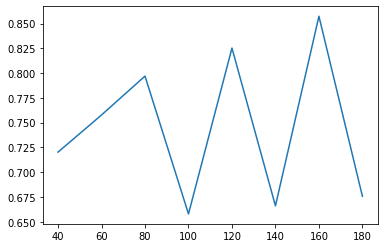

In [76]:
a = .5
b = .5
Jx, Jy, Jz = get_xyz(a, b, biased=False)

L = 3 # for reducing computation

chi_list = np.arange(40, 200, 20)
S_list = []

psi = None
for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))
    
plt.plot(chi_list, S_list)

This is really something weird....

Maybe let's increase `L`?

Reading 'L'=5 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.0 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 700
Energy = -0.0795768720126205, S = nan, norm_err = 6.2e-03
Current memory usage 446.0 MB, time elapsed: 6.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8785e-15, max_E_trunc = 4.9738e-14
MPS bond dimensions: [35, 40, 37, 40, 40, 40, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 10, age = 980
Energy = -0.0795773481073319, S = nan, norm_err = 3.1e-03
Current memory usage 446.0 MB, time elapsed: 15.8 s
Delta E = -9.5219e-08, Delta S = 0.0000e+00 (p

Updating environment
..
sweep 90, age = 5460
Energy = -0.0795774697006905, S = 0.6738084720932240, norm_err = 2.4e-04
Current memory usage 446.0 MB, time elapsed: 71.8 s
Delta E = -2.7076e-11, Delta S = 8.1488e-04 (per sweep)
max_trunc_err = 4.0837e-10, max_E_trunc = 3.3214e-10
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 95, age = 5740
Energy = -0.0795774698130401, S = 0.6775089833947197, norm_err = 2.3e-04
Current memory usage 446.0 MB, time elapsed: 74.7 s
Delta E = -2.2470e-11, Delta S = 7.4010e-04 (per sweep)
max_trunc_err = 4.3444e-10, max_E_trunc = 3.5254e-10
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 100, age = 6020
Energy = -0.0795774699057944, S = 0.6810295954761717, norm_err = 2.3e-04
Current memory usage 446.0 MB, time elapsed: 77.5 s
Delta E = -1.8551e-11, Delta S = 7.0412e-04 (per sweep)
max_trunc_e

Updating environment
..
sweep 180, age = 10500
Energy = -0.0795774703865902, S = 0.7142015184039697, norm_err = 1.1e-04
Current memory usage 446.0 MB, time elapsed: 122.4 s
Delta E = -1.4870e-12, Delta S = 3.1883e-04 (per sweep)
max_trunc_err = 7.3943e-10, max_E_trunc = 5.9390e-10
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 185, age = 10780
Energy = -0.0795774703958727, S = 0.7147281645638843, norm_err = 8.7e-05
Current memory usage 446.0 MB, time elapsed: 125.3 s
Delta E = -1.8565e-12, Delta S = 1.0533e-04 (per sweep)
max_trunc_err = 7.4970e-10, max_E_trunc = 6.0049e-10
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 190, age = 11060
Energy = -0.0795774703917203, S = 0.7154981517950173, norm_err = 1.0e-04
Current memory usage 446.0 MB, time elapsed: 128.3 s
Delta E = 8.3048e-13, Delta S = 1.5400e-04 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.41e-05
Call psi.canonical_form()
DMRG finished after 210 sweeps.
total size = 12580, maximum chi = 40
Before the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000038+0j)
After the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=5 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.0 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 700
Energy = -0.0795774365858302, S = nan, norm_err = 1.3e-03
Current memory usage 446.0 MB, time elapsed: 9.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5560e-14, max_E_trunc = 1.4211e-13
MPS bond dimensions: [52, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 10, age = 980
Energy = -0.0795774566130806, S = nan, norm_err = 5.0e-04
Current memory usage 446.0 MB, time elapsed: 19.9 s
Delta E = -4.0055e-09, Delta S = 0.0000e+00 (

Updating environment
..
sweep 90, age = 5460
Energy = -0.0795774705514361, S = 0.6930418659748616, norm_err = 2.4e-04
Current memory usage 446.0 MB, time elapsed: 84.3 s
Delta E = -1.8177e-11, Delta S = 7.6042e-04 (per sweep)
max_trunc_err = 4.2889e-11, max_E_trunc = 3.6096e-11
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 95, age = 5740
Energy = -0.0795774706298403, S = 0.6967324258757919, norm_err = 2.3e-04
Current memory usage 446.0 MB, time elapsed: 87.7 s
Delta E = -1.5681e-11, Delta S = 7.3811e-04 (per sweep)
max_trunc_err = 4.6508e-11, max_E_trunc = 3.9222e-11
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 100, age = 6020
Energy = -0.0795774706976957, S = 0.7001911999275690, norm_err = 2.2e-04
Current memory usage 446.0 MB, time elapsed: 91.3 s
Delta E = -1.3571e-11, Delta S = 6.9175e-04 (per sweep)
max_trunc_e

Updating environment
..
sweep 180, age = 10500
Energy = -0.0795774711544794, S = 0.7393631736318624, norm_err = 1.3e-04
Current memory usage 446.0 MB, time elapsed: 146.5 s
Delta E = -2.4426e-12, Delta S = 4.4650e-04 (per sweep)
max_trunc_err = 9.6578e-11, max_E_trunc = 7.9808e-11
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 185, age = 10780
Energy = -0.0795774711638529, S = 0.7412365495195865, norm_err = 1.7e-04
Current memory usage 446.0 MB, time elapsed: 150.3 s
Delta E = -1.8747e-12, Delta S = 3.7468e-04 (per sweep)
max_trunc_err = 9.8242e-11, max_E_trunc = 8.1741e-11
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 190, age = 11060
Energy = -0.0795774711752472, S = 0.7424670008333478, norm_err = 1.3e-04
Current memory usage 446.0 MB, time elapsed: 154.2 s
Delta E = -2.2789e-12, Delta S = 2.4609e-04 (per sweep)
max

Updating environment
..
sweep 270, age = 15540
Energy = -0.0795774712490697, S = 0.7625901718725741, norm_err = 1.6e-04
Current memory usage 446.0 MB, time elapsed: 210.5 s
Delta E = 1.0641e-12, Delta S = 1.1562e-04 (per sweep)
max_trunc_err = 1.3767e-10, max_E_trunc = 1.1391e-10
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 275, age = 15820
Energy = -0.0795774712595232, S = 0.7634041907835233, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 214.6 s
Delta E = -2.0907e-12, Delta S = 1.6280e-04 (per sweep)
max_trunc_err = 1.3914e-10, max_E_trunc = 1.1482e-10
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 280, age = 16100
Energy = -0.0795774712639911, S = 0.7642205516739734, norm_err = 6.5e-05
Current memory usage 446.0 MB, time elapsed: 218.4 s
Delta E = -8.9358e-13, Delta S = 1.6327e-04 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.14e-05
Call psi.canonical_form()
DMRG finished after 315 sweeps.
total size = 18460, maximum chi = 60
Before the canonicalization:
Bond dim =  [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036+0j)
After the canonicalization:
Bond dim =  [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
Computing properties
Optimizing
Loop for chi=60 done.
============================== END ==============================
Reading 'L'=5 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.0 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 700
Energy = -0.0795774365619971, S = nan, norm_err = 2.2e-03
Current memory usage 446.0 MB, time elapsed: 11.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.8627e-15, max_E_trunc = 1.2079e-13
MPS bond dimensions: [57, 73, 72, 80, 80, 80, 80, 80, 80, 80, 79, 80, 79, 80, 80, 80, 79, 80, 77, 80]
Updating environment
..
sweep 10, age = 980
Energy = -0.0795774604703723, S = nan, norm_err = 3.6e-04
Current memory usage 446.0 MB, time elapsed: 24.0 s
Delta E = -4.7817e-09, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 5460
Energy = -0.0795774706895855, S = 0.6982553813766764, norm_err = 2.4e-04
Current memory usage 446.0 MB, time elapsed: 112.3 s
Delta E = -1.6088e-11, Delta S = 7.5613e-04 (per sweep)
max_trunc_err = 5.5808e-12, max_E_trunc = 5.2864e-12
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 95, age = 5740
Energy = -0.0795774707598028, S = 0.7018499611081139, norm_err = 2.2e-04
Current memory usage 446.0 MB, time elapsed: 116.6 s
Delta E = -1.4043e-11, Delta S = 7.1892e-04 (per sweep)
max_trunc_err = 6.1239e-12, max_E_trunc = 5.6275e-12
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 100, age = 6020
Energy = -0.0795774708213557, S = 0.7052918307754067, norm_err = 2.2e-04
Current memory usage 446.0 MB, time elapsed: 120.8 s
Delta E = -1.2311e-11, Delta S = 6.8837e-04 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 10500
Energy = -0.0795774712625445, S = 0.7460588492166458, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 193.0 s
Delta E = -2.4556e-12, Delta S = 4.0900e-04 (per sweep)
max_trunc_err = 1.6993e-11, max_E_trunc = 1.4893e-11
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 185, age = 10780
Energy = -0.0795774712745640, S = 0.7478639659027565, norm_err = 1.1e-04
Current memory usage 446.0 MB, time elapsed: 197.5 s
Delta E = -2.4039e-12, Delta S = 3.6102e-04 (per sweep)
max_trunc_err = 1.7824e-11, max_E_trunc = 1.5689e-11
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 190, age = 11060
Energy = -0.0795774712840483, S = 0.7494476939053896, norm_err = 3.4e-05
Current memory usage 446.0 MB, time elapsed: 202.0 s
Delta E = -1.8969e-12, Delta S = 3.1675e-04 (per sweep)
max

Updating environment
..
sweep 270, age = 15540
Energy = -0.0795774713854485, S = 0.7738992785496226, norm_err = 5.5e-05
Current memory usage 446.0 MB, time elapsed: 272.5 s
Delta E = -6.0368e-13, Delta S = 2.5834e-04 (per sweep)
max_trunc_err = 2.8503e-11, max_E_trunc = 2.5466e-11
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 275, age = 15820
Energy = -0.0795774713897913, S = 0.7752057681741713, norm_err = 7.4e-05
Current memory usage 446.0 MB, time elapsed: 277.0 s
Delta E = -8.6857e-13, Delta S = 2.6130e-04 (per sweep)
max_trunc_err = 2.9315e-11, max_E_trunc = 2.6375e-11
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 280, age = 16100
Energy = -0.0795774713927415, S = 0.7761273940929236, norm_err = 5.6e-05
Current memory usage 446.0 MB, time elapsed: 281.2 s
Delta E = -5.9004e-13, Delta S = 1.8433e-04 (per sweep)
max

Updating environment
..
sweep 360, age = 20580
Energy = -0.0795774714277741, S = 0.7920292233964301, norm_err = 1.3e-05
Current memory usage 446.0 MB, time elapsed: 351.8 s
Delta E = -3.6494e-13, Delta S = 7.9234e-05 (per sweep)
max_trunc_err = 3.5836e-11, max_E_trunc = 3.2514e-11
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
norm_tol=1.00e-05 not reached, norm_err=1.28e-05
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.05e-05
Call psi.canonical_form()
DMRG finished after 360 sweeps.
total size = 20980, maximum chi = 80
Before the canonicalization:
Bond dim =  [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000104+0j)
After the canonicalization:
Bond dim =  [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
Computing properties
Optimizing
Loop for chi=80 done.
============================== END ==============================
Reading 'L'=5 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.0 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 700
Energy = -0.0795774365153164, S = nan, norm_err = 2.3e-03
Current memory usage 446.0 MB, time elapsed: 13.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9404e-14, max_E_trunc = 1.5632e-13
MPS bond dimensions: [64, 79, 81, 100, 100, 100, 100, 100, 100, 100, 100, 100, 97, 100, 97, 100, 98, 100, 98, 97]
Updating environment
..
sweep 10, age = 980
Energy = -0.0795774613149586, S = nan, norm_err = 4.4e-04
Current memory usage 446.0 MB, time elapsed: 25.7 s
Delta E = -4.9599e-09, Delta S =

..
sweep 85, age = 5180
Energy = -0.0795774706530807, S = 0.6963245896631749, norm_err = 2.4e-04
Current memory usage 446.0 MB, time elapsed: 130.0 s
Delta E = -1.7502e-11, Delta S = 7.8043e-04 (per sweep)
max_trunc_err = 8.9887e-13, max_E_trunc = 1.5916e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 90, age = 5460
Energy = -0.0795774707292566, S = 0.7000504930334677, norm_err = 2.3e-04
Current memory usage 446.0 MB, time elapsed: 135.2 s
Delta E = -1.5235e-11, Delta S = 7.4518e-04 (per sweep)
max_trunc_err = 1.0100e-12, max_E_trunc = 1.5916e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 5740
Energy = -0.0795774707960078, S = 0.7036230208373787, norm_err = 2.2e-04
Current memory usage 446.0 MB, time elapsed: 140.3 s
Delta E = -1.3350e-11, Delta S = 7.1451e-04 (p

Updating environment
..
sweep 170, age = 9940
Energy = -0.0795774712594380, S = 0.7440120601032033, norm_err = 1.4e-04
Current memory usage 446.0 MB, time elapsed: 223.8 s
Delta E = -2.9775e-12, Delta S = 4.2839e-04 (per sweep)
max_trunc_err = 3.2135e-12, max_E_trunc = 4.3201e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 175, age = 10220
Energy = -0.0795774712732168, S = 0.7461190330116932, norm_err = 1.3e-04
Current memory usage 446.0 MB, time elapsed: 228.6 s
Delta E = -2.7558e-12, Delta S = 4.2139e-04 (per sweep)
max_trunc_err = 3.3634e-12, max_E_trunc = 4.2064e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 180, age = 10500
Energy = -0.0795774712858105, S = 0.7481237890036733, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 233.3 s
Delta E = -2.5187e-1

Updating environment
..
sweep 255, age = 14700
Energy = -0.0795774714009212, S = 0.7734528988747427, norm_err = 1.0e-04
Current memory usage 446.0 MB, time elapsed: 312.9 s
Delta E = -9.3678e-13, Delta S = 3.0795e-04 (per sweep)
max_trunc_err = 5.7381e-12, max_E_trunc = 9.3223e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 260, age = 14980
Energy = -0.0795774714057188, S = 0.7748908845816780, norm_err = 8.0e-05
Current memory usage 446.0 MB, time elapsed: 317.7 s
Delta E = -9.5952e-13, Delta S = 2.8760e-04 (per sweep)
max_trunc_err = 5.9502e-12, max_E_trunc = 7.9581e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 265, age = 15260
Energy = -0.0795774714099821, S = 0.7761669924587771, norm_err = 7.9e-05
Current memory usage 446.0 MB, time elapsed: 322.4 s
Delta E = -8.5265e-

Updating environment
..
sweep 340, age = 19460
Energy = -0.0795774714537401, S = 0.7942477312927025, norm_err = 5.7e-05
Current memory usage 446.0 MB, time elapsed: 404.0 s
Delta E = -4.7180e-13, Delta S = 1.8597e-04 (per sweep)
max_trunc_err = 8.5488e-12, max_E_trunc = 9.7771e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 345, age = 19740
Energy = -0.0795774714557865, S = 0.7953149339772483, norm_err = 8.4e-05
Current memory usage 446.0 MB, time elapsed: 409.4 s
Delta E = -4.0927e-13, Delta S = 2.1344e-04 (per sweep)
max_trunc_err = 8.6086e-12, max_E_trunc = 1.0687e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 350, age = 20020
Energy = -0.0795774714574577, S = 0.7961480739299379, norm_err = 4.8e-05
Current memory usage 446.0 MB, time elapsed: 414.5 s
Delta E = -3.3424e-

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.50e-05
Call psi.canonical_form()
DMRG finished after 415 sweeps.
total size = 24060, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996+0j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=5 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.0 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderMod

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 700
Energy = -0.0795774366557499, S = nan, norm_err = 2.5e-03
Current memory usage 446.0 MB, time elapsed: 13.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.4895e-16, max_E_trunc = 1.4211e-13
MPS bond dimensions: [76, 85, 84, 120, 118, 120, 119, 120, 117, 120, 112, 120, 118, 120, 118, 119, 118, 120, 118, 119]
Updating environment
..
sweep 10, age = 980
Energy = -0.0795774617342079, S = nan, norm_err = 4.9e-04
Current memory usage 446.0 MB, time elapsed: 32.6 s
Delta E = -5.0157e-09, Delt

..
sweep 85, age = 5180
Energy = -0.0795774706775731, S = 0.6974558569178416, norm_err = 2.4e-04
Current memory usage 446.0 MB, time elapsed: 163.9 s
Delta E = -1.6849e-11, Delta S = 7.7201e-04 (per sweep)
max_trunc_err = 2.0688e-13, max_E_trunc = 9.6634e-13
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 90, age = 5460
Energy = -0.0795774707510162, S = 0.7011567293499436, norm_err = 2.3e-04
Current memory usage 446.0 MB, time elapsed: 170.2 s
Delta E = -1.4689e-11, Delta S = 7.4017e-04 (per sweep)
max_trunc_err = 2.3584e-13, max_E_trunc = 1.8190e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 95, age = 5740
Energy = -0.0795774708156330, S = 0.7047040771121612, norm_err = 2.3e-04
Current memory usage 446.0 MB, time elapsed: 176.8 s
Delta E = -1.2923e-11, Delta S = 7.0947e-04 (p

Updating environment
..
sweep 170, age = 9940
Energy = -0.0795774712675779, S = 0.7449747643498450, norm_err = 1.4e-04
Current memory usage 446.0 MB, time elapsed: 270.4 s
Delta E = -2.9138e-12, Delta S = 4.2648e-04 (per sweep)
max_trunc_err = 8.6666e-13, max_E_trunc = 1.9327e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 175, age = 10220
Energy = -0.0795774712811294, S = 0.7470647864512390, norm_err = 1.3e-04
Current memory usage 446.0 MB, time elapsed: 277.0 s
Delta E = -2.7103e-12, Delta S = 4.1800e-04 (per sweep)
max_trunc_err = 9.0794e-13, max_E_trunc = 2.2737e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 180, age = 10500
Energy = -0.0795774712940045, S = 0.7491338547984918, norm_err = 1.3e-04
Current memory usage 446.0 MB, time elapsed: 283.1 s
Delta E = -2.5750e-1

Updating environment
..
sweep 255, age = 14700
Energy = -0.0795774714081063, S = 0.7745654883845697, norm_err = 4.0e-05
Current memory usage 446.0 MB, time elapsed: 378.9 s
Delta E = -8.7312e-13, Delta S = 2.3066e-04 (per sweep)
max_trunc_err = 1.8356e-12, max_E_trunc = 5.0022e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 260, age = 14980
Energy = -0.0795774714134382, S = 0.7762436627693899, norm_err = 1.1e-04
Current memory usage 446.0 MB, time elapsed: 387.2 s
Delta E = -1.0664e-12, Delta S = 3.3563e-04 (per sweep)
max_trunc_err = 1.8670e-12, max_E_trunc = 5.2296e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 265, age = 15260
Energy = -0.0795774714173831, S = 0.7776431279143914, norm_err = 1.0e-04
Current memory usage 446.0 MB, time elapsed: 394.0 s
Delta E = -7.8899e-

Updating environment
..
sweep 340, age = 19460
Energy = -0.0795774714622610, S = 0.7962084058820705, norm_err = 7.4e-05
Current memory usage 446.0 MB, time elapsed: 497.5 s
Delta E = -4.4906e-13, Delta S = 2.2403e-04 (per sweep)
max_trunc_err = 2.6960e-12, max_E_trunc = 5.4570e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 345, age = 19740
Energy = -0.0795774714645518, S = 0.7972988718118342, norm_err = 6.5e-05
Current memory usage 446.0 MB, time elapsed: 504.0 s
Delta E = -4.5816e-13, Delta S = 2.1809e-04 (per sweep)
max_trunc_err = 2.7430e-12, max_E_trunc = 5.9117e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 350, age = 20020
Energy = -0.0795774714661604, S = 0.7984085387049520, norm_err = 6.9e-05
Current memory usage 446.0 MB, time elapsed: 510.6 s
Delta E = -3.2173e-

Updating environment
..
sweep 425, age = 24220
Energy = -0.0795774714882725, S = 0.8127676116528818, norm_err = 5.3e-05
Current memory usage 446.0 MB, time elapsed: 600.2 s
Delta E = -2.0350e-13, Delta S = 1.7922e-04 (per sweep)
max_trunc_err = 3.6725e-12, max_E_trunc = 9.7771e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 430, age = 24500
Energy = -0.0795774714890172, S = 0.8135724993434449, norm_err = 5.1e-05
Current memory usage 446.0 MB, time elapsed: 606.4 s
Delta E = -1.4893e-13, Delta S = 1.6098e-04 (per sweep)
max_trunc_err = 3.7656e-12, max_E_trunc = 9.3223e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 435, age = 24780
Energy = -0.0795774714902393, S = 0.8144256929615240, norm_err = 5.6e-05
Current memory usage 446.0 MB, time elapsed: 612.9 s
Delta E = -2.4443e-

Updating environment
..
sweep 510, age = 28980
Energy = -0.0795774715021821, S = 0.8261217594648305, norm_err = 3.9e-05
Current memory usage 446.0 MB, time elapsed: 714.8 s
Delta E = -1.6144e-13, Delta S = 1.7443e-04 (per sweep)
max_trunc_err = 4.6868e-12, max_E_trunc = 9.0949e-12
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 515, age = 29260
Energy = -0.0795774715030916, S = 0.8265801558442301, norm_err = 2.3e-05
Current memory usage 446.0 MB, time elapsed: 721.8 s
Delta E = -1.8190e-13, Delta S = 9.1679e-05 (per sweep)
max_trunc_err = 4.7427e-12, max_E_trunc = 1.3188e-11
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
norm_tol=1.00e-05 not reached, norm_err=2.34e-05
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.24e-05
Call psi.canonical_form()
DMRG finished after 515 sweeps.
total size = 29660, maximum chi = 120
Before the canonicalization:
Bond dim =  [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999958+0j)
After the canonicalization:
Bond dim =  [120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
Computing properties
Optimizing
Loop for chi=120 done.
============================== END ==============================
Reading 'L'=5 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.0 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderMod

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 700
Energy = -0.0795774364418477, S = nan, norm_err = 3.0e-03
Current memory usage 446.0 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5144e-14, max_E_trunc = 1.2790e-13
MPS bond dimensions: [103, 116, 117, 140, 140, 140, 129, 140, 139, 140, 129, 140, 140, 140, 139, 140, 140, 140, 140, 140]
Updating environment
..
sweep 10, age = 980
Energy = -0.0795774630549801, S = nan, norm_err = 7.9e-04
Current memory usage 446.0 MB, time elapsed: 38.2 s
Delta E = -5.3226e-09, D

Updating environment
..
sweep 85, age = 5180
Energy = -0.0795774707575973, S = 0.7013256399912475, norm_err = 2.3e-04
Current memory usage 446.0 MB, time elapsed: 207.9 s
Delta E = -1.4464e-11, Delta S = 7.3601e-04 (per sweep)
max_trunc_err = 6.5125e-14, max_E_trunc = 1.0800e-12
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 90, age = 5460
Energy = -0.0795774708212377, S = 0.7048532062097266, norm_err = 2.2e-04
Current memory usage 446.0 MB, time elapsed: 215.7 s
Delta E = -1.2728e-11, Delta S = 7.0551e-04 (per sweep)
max_trunc_err = 7.4757e-14, max_E_trunc = 1.5348e-12
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 95, age = 5740
Energy = -0.0795774708774502, S = 0.7082370709942737, norm_err = 2.1e-04
Current memory usage 446.0 MB, time elapsed: 224.7 s
Delta E = -1.1242e-11, De

Updating environment
..
sweep 170, age = 9940
Energy = -0.0795774712831843, S = 0.7472620329320401, norm_err = 1.3e-04
Current memory usage 446.0 MB, time elapsed: 350.1 s
Delta E = -2.6864e-12, Delta S = 4.2230e-04 (per sweep)
max_trunc_err = 3.0233e-13, max_E_trunc = 3.4106e-12
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 175, age = 10220
Energy = -0.0795774712958632, S = 0.7492849931501786, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 358.8 s
Delta E = -2.5358e-12, Delta S = 4.0459e-04 (per sweep)
max_trunc_err = 3.2146e-13, max_E_trunc = 2.8422e-12
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 180, age = 10500
Energy = -0.0795774713074763, S = 0.7513426343016338, norm_err = 1.3e-04
Current memory usage 446.0 MB, time elapsed: 368.0 s
Delta E = -2.3226e-1

Updating environment
..
sweep 255, age = 14700
Energy = -0.0795774714152628, S = 0.7766243619675666, norm_err = 9.4e-05
Current memory usage 446.0 MB, time elapsed: 493.1 s
Delta E = -8.1741e-13, Delta S = 2.8665e-04 (per sweep)
max_trunc_err = 6.1586e-13, max_E_trunc = 3.4106e-12
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 260, age = 14980
Energy = -0.0795774714197194, S = 0.7780237235058929, norm_err = 8.5e-05
Current memory usage 446.0 MB, time elapsed: 501.3 s
Delta E = -8.9130e-13, Delta S = 2.7987e-04 (per sweep)
max_trunc_err = 6.3629e-13, max_E_trunc = 3.4106e-12
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 265, age = 15260
Energy = -0.0795774714239656, S = 0.7795264918212198, norm_err = 9.2e-05
Current memory usage 446.0 MB, time elapsed: 509.2 s
Delta E = -8.4924e-

Updating environment
..
sweep 340, age = 19460
Energy = -0.0795774714673826, S = 0.7979477906374186, norm_err = 6.3e-05
Current memory usage 446.0 MB, time elapsed: 638.9 s
Delta E = -4.4679e-13, Delta S = 1.9552e-04 (per sweep)
max_trunc_err = 1.0132e-12, max_E_trunc = 5.0022e-12
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 345, age = 19740
Energy = -0.0795774714693891, S = 0.7990380685485261, norm_err = 4.7e-05
Current memory usage 446.0 MB, time elapsed: 648.6 s
Delta E = -4.0132e-13, Delta S = 2.1806e-04 (per sweep)
max_trunc_err = 1.0357e-12, max_E_trunc = 6.5938e-12
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 350, age = 20020
Energy = -0.0795774714710774, S = 0.8001693241479858, norm_err = 6.2e-05
Current memory usage 446.0 MB, time elapsed: 657.6 s
Delta E = -3.3765e-

Updating environment
..
sweep 425, age = 24220
Energy = -0.0795774714927290, S = 0.8147084338955664, norm_err = 4.1e-05
Current memory usage 446.0 MB, time elapsed: 782.8 s
Delta E = -2.8308e-13, Delta S = 1.4596e-04 (per sweep)
max_trunc_err = 1.3900e-12, max_E_trunc = 5.4570e-12
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 430, age = 24500
Energy = -0.0795774714935590, S = 0.8156275930501942, norm_err = 3.6e-05
Current memory usage 446.0 MB, time elapsed: 791.9 s
Delta E = -1.6598e-13, Delta S = 1.8383e-04 (per sweep)
max_trunc_err = 1.4147e-12, max_E_trunc = 5.0022e-12
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 435, age = 24780
Energy = -0.0795774714945310, S = 0.8166285970417506, norm_err = 6.1e-05
Current memory usage 446.0 MB, time elapsed: 800.4 s
Delta E = -1.9441e-

Updating environment
..
sweep 510, age = 28980
Energy = -0.0795774715064681, S = 0.8286001679210976, norm_err = 6.9e-05
Current memory usage 446.0 MB, time elapsed: 936.2 s
Delta E = -2.2055e-13, Delta S = 1.4273e-04 (per sweep)
max_trunc_err = 1.8323e-12, max_E_trunc = 6.8212e-12
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 515, age = 29260
Energy = -0.0795774715069683, S = 0.8293096866054588, norm_err = 7.8e-05
Current memory usage 446.0 MB, time elapsed: 945.9 s
Delta E = -1.0004e-13, Delta S = 1.4190e-04 (per sweep)
max_trunc_err = 1.8420e-12, max_E_trunc = 9.5497e-12
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 520, age = 29540
Energy = -0.0795774715077187, S = 0.8299315565443871, norm_err = 7.5e-05
Current memory usage 446.0 MB, time elapsed: 955.0 s
Delta E = -1.5007e-

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.37e-05
Call psi.canonical_form()
DMRG finished after 565 sweeps.
total size = 32460, maximum chi = 140
Before the canonicalization:
Bond dim =  [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999963+0j)
After the canonicalization:
Bond dim =  [140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140]
Computing properties
Optimizing
Loop for chi=140 done.
============================== END ==============================
Reading 'L'=5 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.0 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderMod

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 700
Energy = -0.0795774339726876, S = nan, norm_err = 3.1e-03
Current memory usage 446.0 MB, time elapsed: 20.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9487e-16, max_E_trunc = 1.0658e-13
MPS bond dimensions: [75, 88, 89, 158, 155, 160, 153, 160, 156, 160, 157, 160, 159, 158, 155, 160, 160, 160, 159, 143]
Updating environment
..
sweep 10, age = 980
Energy = -0.0795774630613870, S = nan, norm_err = 9.1e-04
Current memory usage 446.0 MB, time elapsed: 50.2 s
Delta E = -5.8177e-09, Delt

Updating environment
..
sweep 85, age = 5180
Energy = -0.0795774707930349, S = 0.7032028374887813, norm_err = 2.3e-04
Current memory usage 446.0 MB, time elapsed: 280.4 s
Delta E = -1.3454e-11, Delta S = 7.1697e-04 (per sweep)
max_trunc_err = 1.9320e-14, max_E_trunc = 1.1937e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 90, age = 5460
Energy = -0.0795774708523524, S = 0.7066444053765195, norm_err = 2.2e-04
Current memory usage 446.0 MB, time elapsed: 290.2 s
Delta E = -1.1864e-11, Delta S = 6.8831e-04 (per sweep)
max_trunc_err = 2.2357e-14, max_E_trunc = 1.1937e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 95, age = 5740
Energy = -0.0795774709051329, S = 0.7099527738716598, norm_err = 2.1e-04
Current memory usage 446.0 MB, time elapsed: 301.1 s
Delta E = -1.0556e-11, De

Updating environment
..
sweep 170, age = 9940
Energy = -0.0795774712903835, S = 0.7483956605071654, norm_err = 1.3e-04
Current memory usage 446.0 MB, time elapsed: 456.6 s
Delta E = -2.6046e-12, Delta S = 4.1847e-04 (per sweep)
max_trunc_err = 1.0181e-13, max_E_trunc = 2.0464e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 175, age = 10220
Energy = -0.0795774713024230, S = 0.7504180559350496, norm_err = 1.3e-04
Current memory usage 446.0 MB, time elapsed: 467.0 s
Delta E = -2.4079e-12, Delta S = 4.0448e-04 (per sweep)
max_trunc_err = 1.0816e-13, max_E_trunc = 1.2506e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 180, age = 10500
Energy = -0.0795774713137860, S = 0.7523973654565232, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 477.2 s
Delta E = -2.2726e-1

Updating environment
..
sweep 255, age = 14700
Energy = -0.0795774714185541, S = 0.7775357231822363, norm_err = 1.0e-04
Current memory usage 446.0 MB, time elapsed: 633.5 s
Delta E = -9.2086e-13, Delta S = 2.9446e-04 (per sweep)
max_trunc_err = 2.4544e-13, max_E_trunc = 3.1832e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 260, age = 14980
Energy = -0.0795774714228173, S = 0.7789573256634342, norm_err = 9.4e-05
Current memory usage 446.0 MB, time elapsed: 644.7 s
Delta E = -8.5265e-13, Delta S = 2.8432e-04 (per sweep)
max_trunc_err = 2.5261e-13, max_E_trunc = 2.5011e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 265, age = 15260
Energy = -0.0795774714269442, S = 0.7803449801285374, norm_err = 8.8e-05
Current memory usage 446.0 MB, time elapsed: 654.9 s
Delta E = -8.2537e-

Updating environment
..
sweep 340, age = 19460
Energy = -0.0795774714696222, S = 0.7989259598729580, norm_err = 6.8e-05
Current memory usage 446.0 MB, time elapsed: 807.5 s
Delta E = -4.7294e-13, Delta S = 2.2015e-04 (per sweep)
max_trunc_err = 4.1752e-13, max_E_trunc = 4.7748e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 345, age = 19740
Energy = -0.0795774714711229, S = 0.8000302241015558, norm_err = 6.9e-05
Current memory usage 446.0 MB, time elapsed: 817.2 s
Delta E = -3.0013e-13, Delta S = 2.2085e-04 (per sweep)
max_trunc_err = 4.2607e-13, max_E_trunc = 4.5475e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 350, age = 20020
Energy = -0.0795774714729646, S = 0.8011200140197520, norm_err = 6.5e-05
Current memory usage 446.0 MB, time elapsed: 826.2 s
Delta E = -3.6835e-

Updating environment
..
sweep 425, age = 24220
Energy = -0.0795774714946049, S = 0.8158040110374942, norm_err = 5.5e-05
Current memory usage 446.0 MB, time elapsed: 969.5 s
Delta E = -2.7626e-13, Delta S = 1.8014e-04 (per sweep)
max_trunc_err = 5.9536e-13, max_E_trunc = 5.0022e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 430, age = 24500
Energy = -0.0795774714956451, S = 0.8167012263449290, norm_err = 5.5e-05
Current memory usage 446.0 MB, time elapsed: 978.3 s
Delta E = -2.0805e-13, Delta S = 1.7944e-04 (per sweep)
max_trunc_err = 6.1161e-13, max_E_trunc = 6.1391e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 435, age = 24780
Energy = -0.0795774714964352, S = 0.8175709071884200, norm_err = 5.4e-05
Current memory usage 446.0 MB, time elapsed: 987.0 s
Delta E = -1.5802e-

Updating environment
..
sweep 510, age = 28980
Energy = -0.0795774715088783, S = 0.8296716707524132, norm_err = 4.6e-05
Current memory usage 446.0 MB, time elapsed: 1130.3 s
Delta E = -3.3878e-13, Delta S = 1.5130e-04 (per sweep)
max_trunc_err = 8.0913e-13, max_E_trunc = 6.3665e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 515, age = 29260
Energy = -0.0795774715091625, S = 0.8304064574453319, norm_err = 4.5e-05
Current memory usage 446.0 MB, time elapsed: 1140.2 s
Delta E = -5.6843e-14, Delta S = 1.4696e-04 (per sweep)
max_trunc_err = 8.2708e-13, max_E_trunc = 5.4570e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 520, age = 29540
Energy = -0.0795774715092080, S = 0.8311498854680280, norm_err = 4.4e-05
Current memory usage 446.0 MB, time elapsed: 1149.2 s
Delta E = -9.095

Updating environment
..
sweep 595, age = 33740
Energy = -0.0795774715170978, S = 0.8414930883415128, norm_err = 6.0e-05
Current memory usage 446.0 MB, time elapsed: 1307.0 s
Delta E = -5.9117e-14, Delta S = 1.2589e-04 (per sweep)
max_trunc_err = 1.0371e-12, max_E_trunc = 9.0949e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 600, age = 34020
Energy = -0.0795774715176776, S = 0.8420464881076116, norm_err = 6.5e-05
Current memory usage 446.0 MB, time elapsed: 1319.0 s
Delta E = -1.1596e-13, Delta S = 1.1068e-04 (per sweep)
max_trunc_err = 1.0529e-12, max_E_trunc = 8.6402e-12
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 605, age = 34300
Energy = -0.0795774715173593, S = 0.8425524658696777, norm_err = 2.5e-05
Current memory usage 446.0 MB, time elapsed: 1328.8 s
Delta E = 6.3663

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.30e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 625 sweeps.
total size = 35820, maximum chi = 160
Before the canonicalization:
Bond dim =  [158, 160, 158, 160, 158, 160, 157, 160, 158, 160, 158, 160, 158, 160, 159, 160, 158, 160, 158, 160]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000193+0j)
After the canonicalization:
Bond dim =  [158, 160, 157, 160, 158, 160, 157, 160, 158, 160, 157, 160, 158, 160, 157, 160, 157, 160, 158, 160]
Computing properties
Optimizing
Loop for chi=160 done.
============================== END ==============================
Reading 'L'=5 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.0 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  180 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 700
Energy = -0.0795774370209079, S = nan, norm_err = 2.8e-03
Current memory usage 446.0 MB, time elapsed: 23.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3521e-15, max_E_trunc = 8.5265e-14
MPS bond dimensions: [100, 105, 114, 180, 170, 180, 156, 180, 179, 179, 172, 180, 176, 180, 180, 180, 180, 180, 177, 180]
Updating environment
..
sweep 10, age = 980
Energy = -0.0795774632636505, S = nan, norm_err = 8.3e-04
Current memory usage 446.0 MB, time elapsed: 55.0 s
Delta E = -5.2485e-09, D

Updating environment
..
sweep 85, age = 5180
Energy = -0.0795774707726750, S = 0.7020884457816283, norm_err = 2.3e-04
Current memory usage 446.0 MB, time elapsed: 347.0 s
Delta E = -1.4037e-11, Delta S = 7.2868e-04 (per sweep)
max_trunc_err = 6.9014e-15, max_E_trunc = 1.8758e-12
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 90, age = 5460
Energy = -0.0795774708345064, S = 0.7055801134669728, norm_err = 2.2e-04
Current memory usage 446.0 MB, time elapsed: 359.3 s
Delta E = -1.2366e-11, Delta S = 6.9833e-04 (per sweep)
max_trunc_err = 8.0583e-15, max_E_trunc = 1.2506e-12
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 95, age = 5740
Energy = -0.0795774708892779, S = 0.7089378274168814, norm_err = 2.1e-04
Current memory usage 446.0 MB, time elapsed: 372.2 s
Delta E = -1.0954e-11, De

Updating environment
..
sweep 170, age = 9940
Energy = -0.0795774712868706, S = 0.7477914205901131, norm_err = 1.3e-04
Current memory usage 446.0 MB, time elapsed: 558.7 s
Delta E = -2.6978e-12, Delta S = 4.2041e-04 (per sweep)
max_trunc_err = 4.1043e-14, max_E_trunc = 2.0464e-12
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 175, age = 10220
Energy = -0.0795774712989811, S = 0.7498442885891219, norm_err = 1.3e-04
Current memory usage 446.0 MB, time elapsed: 570.9 s
Delta E = -2.4221e-12, Delta S = 4.1057e-04 (per sweep)
max_trunc_err = 4.4108e-14, max_E_trunc = 1.8190e-12
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 180, age = 10500
Energy = -0.0795774713104919, S = 0.7518396546055566, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 585.0 s
Delta E = -2.3022e-1

Updating environment
..
sweep 255, age = 14700
Energy = -0.0795774714175991, S = 0.7771575861072928, norm_err = 9.2e-05
Current memory usage 446.0 MB, time elapsed: 773.6 s
Delta E = -9.6975e-13, Delta S = 2.9302e-04 (per sweep)
max_trunc_err = 1.0065e-13, max_E_trunc = 4.3201e-12
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 260, age = 14980
Energy = -0.0795774714216918, S = 0.7786017591479363, norm_err = 8.8e-05
Current memory usage 446.0 MB, time elapsed: 787.9 s
Delta E = -8.1855e-13, Delta S = 2.8883e-04 (per sweep)
max_trunc_err = 1.0423e-13, max_E_trunc = 3.4106e-12
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 265, age = 15260
Energy = -0.0795774714260062, S = 0.7800225410210458, norm_err = 8.6e-05
Current memory usage 446.0 MB, time elapsed: 800.9 s
Delta E = -8.6288e-

Updating environment
..
sweep 340, age = 19460
Energy = -0.0795774714691504, S = 0.7987600308442946, norm_err = 6.9e-05
Current memory usage 446.0 MB, time elapsed: 995.1 s
Delta E = -4.2405e-13, Delta S = 2.2496e-04 (per sweep)
max_trunc_err = 1.7723e-13, max_E_trunc = 3.1832e-12
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 345, age = 19740
Energy = -0.0795774714713616, S = 0.7998654431208047, norm_err = 6.8e-05
Current memory usage 446.0 MB, time elapsed: 1006.0 s
Delta E = -4.4224e-13, Delta S = 2.2108e-04 (per sweep)
max_trunc_err = 1.8170e-13, max_E_trunc = 3.6380e-12
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 350, age = 20020
Energy = -0.0795774714730555, S = 0.8009575002570071, norm_err = 6.7e-05
Current memory usage 446.0 MB, time elapsed: 1017.3 s
Delta E = -3.3879

Updating environment
..
sweep 425, age = 24220
Energy = -0.0795774714946560, S = 0.8158175141879516, norm_err = 6.0e-05
Current memory usage 446.0 MB, time elapsed: 1207.5 s
Delta E = -2.0350e-13, Delta S = 1.7473e-04 (per sweep)
max_trunc_err = 2.5865e-13, max_E_trunc = 7.5033e-12
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 430, age = 24500
Energy = -0.0795774714958327, S = 0.8166929936869997, norm_err = 4.5e-05
Current memory usage 446.0 MB, time elapsed: 1220.0 s
Delta E = -2.3533e-13, Delta S = 1.7510e-04 (per sweep)
max_trunc_err = 2.6404e-13, max_E_trunc = 6.1391e-12
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 435, age = 24780
Energy = -0.0795774714965603, S = 0.8175945949946005, norm_err = 5.3e-05
Current memory usage 446.0 MB, time elapsed: 1233.7 s
Delta E = -1.455

Updating environment
..
sweep 510, age = 28980
Energy = -0.0795774715090602, S = 0.8298825885587119, norm_err = 4.6e-05
Current memory usage 446.0 MB, time elapsed: 1428.3 s
Delta E = -7.2761e-14, Delta S = 1.6113e-04 (per sweep)
max_trunc_err = 3.5924e-13, max_E_trunc = 7.2760e-12
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 515, age = 29260
Energy = -0.0795774715098446, S = 0.8306147778476018, norm_err = 4.6e-05
Current memory usage 446.0 MB, time elapsed: 1441.3 s
Delta E = -1.5689e-13, Delta S = 1.4644e-04 (per sweep)
max_trunc_err = 3.6252e-13, max_E_trunc = 7.2760e-12
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 520, age = 29540
Energy = -0.0795774715103562, S = 0.8314161895948013, norm_err = 5.1e-05
Current memory usage 446.0 MB, time elapsed: 1453.4 s
Delta E = -1.023

Updating environment
..
sweep 595, age = 33740
Energy = -0.0795774715177799, S = 0.8417452107320900, norm_err = 3.6e-05
Current memory usage 446.0 MB, time elapsed: 1646.1 s
Delta E = -3.6379e-14, Delta S = 1.2418e-04 (per sweep)
max_trunc_err = 4.6140e-13, max_E_trunc = 9.0949e-12
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 600, age = 34020
Energy = -0.0795774715179164, S = 0.8423569019658068, norm_err = 3.8e-05
Current memory usage 446.0 MB, time elapsed: 1657.2 s
Delta E = -2.7284e-14, Delta S = 1.2234e-04 (per sweep)
max_trunc_err = 4.6825e-13, max_E_trunc = 9.5497e-12
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 605, age = 34300
Energy = -0.0795774715184962, S = 0.8431493032936078, norm_err = 5.0e-05
Current memory usage 446.0 MB, time elapsed: 1669.5 s
Delta E = -1.159

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.65e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 650 sweeps.
total size = 37220, maximum chi = 180
Before the canonicalization:
Bond dim =  [174, 180, 173, 180, 174, 180, 174, 180, 174, 180, 174, 180, 174, 180, 174, 180, 174, 180, 174, 180]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999992+0j)
After the canonicalization:
Bond dim =  [174, 180, 173, 180, 174, 180, 174, 180, 174, 180, 174, 180, 174, 180, 174, 180, 174, 180, 174, 180]
Computing properties
Optimizing
Loop for chi=180 done.
============================== END ==============================


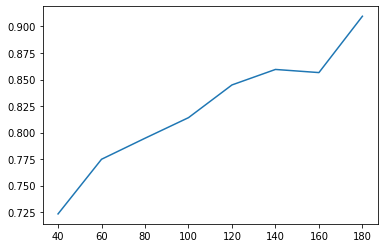

In [77]:
a = .5
b = .5
Jx, Jy, Jz = get_xyz(a, b, biased=False)

L = 5 # for reducing computation

chi_list = np.arange(40, 200, 20)
S_list = []

psi = None
for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))
    
plt.plot(chi_list, S_list)

This shows that state at `(1, 0, 1)` is also gapless.

Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
...

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0720771758524147, S = nan, norm_err = 3.3e-03
Current memory usage 446.0 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3154e-10, max_E_trunc = 2.4047e-10
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 10, age = 392
Energy = -0.0720807059581675, S = nan, norm_err = 1.8e-03
Current memory usage 446.0 MB, time elapsed: 7.0 s
Delta E = -7.0602e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4248e-08, max_E_trunc =

Updating environment
..
sweep 100, age = 2408
Energy = -0.0720816654262979, S = 1.3592907148459434, norm_err = 4.1e-05
Current memory usage 446.0 MB, time elapsed: 33.4 s
Delta E = -8.8313e-12, Delta S = 1.4878e-04 (per sweep)
max_trunc_err = 1.3131e-07, max_E_trunc = 1.0493e-07
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0720816654503480, S = 1.3599073207041581, norm_err = 3.5e-05
Current memory usage 446.0 MB, time elapsed: 35.0 s
Delta E = -4.8100e-12, Delta S = 1.2332e-04 (per sweep)
max_trunc_err = 1.3226e-07, max_E_trunc = 1.0565e-07
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0720816654617202, S = 1.3604180568135265, norm_err = 3.1e-05
Current memory usage 446.0 MB, time elapsed: 36.6 s
Delta E = -2.2744e-12, Delta S = 1.0215e-04 (per sweep)
max_trunc_err = 1.3304e-07, max_E_trunc = 1.0624e-07
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.36e-05
Call psi.canonical_form()
DMRG finished after 115 sweeps.
total size = 2904, maximum chi = 40
Before the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000016-2.5080323762402083e-16j)
After the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  60 

Subconfig 'trunc_params'=Config(n

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0720784834642083, S = nan, norm_err = 3.2e-03
Current memory usage 446.0 MB, time elapsed: 5.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6472e-11, max_E_trunc = 1.1486e-11
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 10, age = 392
Energy = -0.0720808800145663, S = nan, norm_err = 1.8e-03
Current memory usage 446.0 MB, time elapsed: 9.6 s
Delta E = -4.7931e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6284e-10, max_E_trunc

Updating environment
..
sweep 100, age = 2408
Energy = -0.0720817510643208, S = 1.3992595700993786, norm_err = 1.4e-04
Current memory usage 446.0 MB, time elapsed: 45.4 s
Delta E = -1.2521e-10, Delta S = 5.5398e-04 (per sweep)
max_trunc_err = 2.1088e-08, max_E_trunc = 1.8285e-08
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0720817515718508, S = 1.4015567134829532, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 47.1 s
Delta E = -1.0151e-10, Delta S = 4.5943e-04 (per sweep)
max_trunc_err = 2.1716e-08, max_E_trunc = 1.8796e-08
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0720817519854275, S = 1.4039235704045259, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 48.9 s
Delta E = -8.2715e-11, Delta S = 4.7337e-04 (per sweep)
max_trunc_err = 2.2322e-08, max_E_trunc = 1.9291e-08
MPS bond dimensions: [60, 60, 60, 60, 60, 60, 60, 60

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 7.89e-05
Call psi.canonical_form()
DMRG finished after 160 sweeps.
total size = 3912, maximum chi = 60
Before the canonicalization:
Bond dim =  [60, 60, 60, 60, 60, 60, 60, 60]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018-4.670742959067553e-16j)
After the canonicalization:
Bond dim =  [60, 60, 60, 60, 60, 60, 60, 60]
Computing properties
Optimizing
Loop for chi=60 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  80 

Subconfig 'trunc_params'=Config(na

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0720792815207862, S = nan, norm_err = 5.0e-03
Current memory usage 446.0 MB, time elapsed: 5.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2970e-13, max_E_trunc = 4.4054e-13
MPS bond dimensions: [80, 80, 80, 80, 80, 80, 80, 80]
Updating environment
..
sweep 10, age = 392
Energy = -0.0720812409217055, S = nan, norm_err = 2.7e-03
Current memory usage 446.0 MB, time elapsed: 12.2 s
Delta E = -3.9188e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0659e-11, max_E_trunc

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.09e-04
Call psi.canonical_form()
DMRG finished after 25 sweeps.
total size = 888, maximum chi = 80
Before the canonicalization:
Bond dim =  [80, 80, 80, 80, 80, 80, 80, 80]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027+9.250616223553665e-17j)
After the canonicalization:
Bond dim =  [80, 80, 80, 80, 80, 80, 80, 80]
Computing properties
Optimizing
Loop for chi=80 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(nam

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0720808896694418, S = nan, norm_err = 1.4e-03
Current memory usage 446.0 MB, time elapsed: 6.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.4167e-15, max_E_trunc = 2.8422e-14
MPS bond dimensions: [100, 100, 83, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 392
Energy = -0.0720813613688314, S = nan, norm_err = 1.4e-03
Current memory usage 446.0 MB, time elapsed: 16.1 s
Delta E = -9.4340e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2052e-13, max

Updating environment
..
sweep 100, age = 2408
Energy = -0.0720817668592595, S = 1.0745385474386808, norm_err = 2.0e-04
Current memory usage 446.0 MB, time elapsed: 93.1 s
Delta E = -1.7950e-10, Delta S = 8.0040e-04 (per sweep)
max_trunc_err = 8.3945e-11, max_E_trunc = 6.9036e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 99, 100]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0720817676355807, S = 1.0783499891923789, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 96.7 s
Delta E = -1.5526e-10, Delta S = 7.6229e-04 (per sweep)
max_trunc_err = 9.2376e-11, max_E_trunc = 7.5801e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0720817683124171, S = 1.0819850456086910, norm_err = 1.8e-04
Current memory usage 446.0 MB, time elapsed: 100.0 s
Delta E = -1.3537e-10, Delta S = 7.2701e-04 (per sweep)
max_trunc_err = 1.0040e-10, max_E_trunc = 8.2281e-11
MPS bond dimensions: [100, 100, 100,

Updating environment
..
sweep 200, age = 4648
Energy = -0.0720817732239496, S = 1.1280983206973028, norm_err = 9.2e-05
Current memory usage 446.0 MB, time elapsed: 156.4 s
Delta E = -2.2087e-11, Delta S = 3.8087e-04 (per sweep)
max_trunc_err = 2.7026e-10, max_E_trunc = 2.1606e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0720817733255608, S = 1.1299956498548798, norm_err = 9.4e-05
Current memory usage 446.0 MB, time elapsed: 159.8 s
Delta E = -2.0322e-11, Delta S = 3.7947e-04 (per sweep)
max_trunc_err = 2.7811e-10, max_E_trunc = 2.2294e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 210, age = 4872
Energy = -0.0720817734186667, S = 1.1317354290571608, norm_err = 9.4e-05
Current memory usage 446.0 MB, time elapsed: 163.5 s
Delta E = -1.8621e-11, Delta S = 3.4796e-04 (per sweep)
max_trunc_err = 2.8966e-10, max_E_trunc = 2.2919e-10
MPS bond dimensions: [100, 100, 1

Updating environment
..
sweep 300, age = 6888
Energy = -0.0720817743735367, S = 1.1574169976980921, norm_err = 5.8e-05
Current memory usage 446.0 MB, time elapsed: 221.2 s
Delta E = -5.9380e-12, Delta S = 2.3221e-04 (per sweep)
max_trunc_err = 4.2112e-10, max_E_trunc = 3.3128e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 305, age = 7000
Energy = -0.0720817744013367, S = 1.1585423397060741, norm_err = 5.5e-05
Current memory usage 446.0 MB, time elapsed: 224.3 s
Delta E = -5.5600e-12, Delta S = 2.2507e-04 (per sweep)
max_trunc_err = 4.2802e-10, max_E_trunc = 3.3606e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 310, age = 7112
Energy = -0.0720817744278079, S = 1.1596412758301000, norm_err = 5.5e-05
Current memory usage 446.0 MB, time elapsed: 227.4 s
Delta E = -5.2943e-12, Delta S = 2.1979e-04 (per sweep)
max_trunc_err = 4.3487e-10, max_E_trunc = 3.4242e-10
MPS bond dimensions: [100, 100, 1

Updating environment
..
sweep 400, age = 9128
Energy = -0.0720817747390470, S = 1.1761621765391155, norm_err = 3.2e-05
Current memory usage 446.0 MB, time elapsed: 284.7 s
Delta E = -1.9853e-12, Delta S = 1.5948e-04 (per sweep)
max_trunc_err = 5.6240e-10, max_E_trunc = 4.4054e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 405, age = 9240
Energy = -0.0720817747421378, S = 1.1769321904923147, norm_err = 4.4e-05
Current memory usage 446.0 MB, time elapsed: 288.2 s
Delta E = -6.1817e-13, Delta S = 1.5400e-04 (per sweep)
max_trunc_err = 5.7154e-10, max_E_trunc = 4.4406e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 99, 100]
Updating environment
..
sweep 410, age = 9352
Energy = -0.0720817747606901, S = 1.1776088682379782, norm_err = 3.1e-05
Current memory usage 446.0 MB, time elapsed: 291.5 s
Delta E = -3.7105e-12, Delta S = 1.3534e-04 (per sweep)
max_trunc_err = 5.7309e-10, max_E_trunc = 4.4770e-10
MPS bond dimensions: [100, 100, 10

Updating environment
..
sweep 500, age = 11368
Energy = -0.0720817748822142, S = 1.1888586568022139, norm_err = 3.0e-05
Current memory usage 446.0 MB, time elapsed: 349.5 s
Delta E = -9.3365e-13, Delta S = 1.0460e-04 (per sweep)
max_trunc_err = 6.6476e-10, max_E_trunc = 5.1671e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 505, age = 11480
Energy = -0.0720817748863141, S = 1.1894065516195511, norm_err = 2.3e-05
Current memory usage 446.0 MB, time elapsed: 352.5 s
Delta E = -8.1997e-13, Delta S = 1.0958e-04 (per sweep)
max_trunc_err = 6.6914e-10, max_E_trunc = 5.2182e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 510, age = 11592
Energy = -0.0720817748905986, S = 1.1898886422608641, norm_err = 2.9e-05
Current memory usage 446.0 MB, time elapsed: 355.6 s
Delta E = -8.5691e-13, Delta S = 9.6418e-05 (per sweep)
max_trunc_err = 6.7376e-10, max_E_trunc = 5.2376e-10
MPS bond dimensions: [100, 100

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.74e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 510 sweeps.
total size = 11752, maximum chi = 100
Before the canonicalization:
Bond dim =  [99, 100, 99, 100, 99, 100, 98, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000107+4.571881923021604e-16j)
After the canonicalization:
Bond dim =  [99, 100, 99, 100, 99, 100, 98, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  120 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0720809964965152, S = nan, norm_err = 1.2e-03
Current memory usage 446.0 MB, time elapsed: 7.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.1275e-16, max_E_trunc = 4.2633e-14
MPS bond dimensions: [115, 120, 91, 120, 120, 120, 120, 120]
Updating environment
..
sweep 10, age = 392
Energy = -0.0720813970648919, S = nan, norm_err = 1.3e-03
Current memory usage 446.0 MB, time elapsed: 21.9 s
Delta E = -8.0114e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4164e-14, max

Updating environment
..
sweep 100, age = 2408
Energy = -0.0720817670738203, S = 1.0754500762422163, norm_err = 2.2e-04
Current memory usage 446.0 MB, time elapsed: 135.9 s
Delta E = -1.7668e-10, Delta S = 8.1225e-04 (per sweep)
max_trunc_err = 2.6979e-11, max_E_trunc = 2.1913e-11
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 119, 120]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0720817678415280, S = 1.0791552890723550, norm_err = 1.8e-04
Current memory usage 446.0 MB, time elapsed: 141.2 s
Delta E = -1.5354e-10, Delta S = 7.4104e-04 (per sweep)
max_trunc_err = 2.9834e-11, max_E_trunc = 2.5608e-11
MPS bond dimensions: [120, 120, 120, 120, 119, 120, 120, 120]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0720817685118433, S = 1.0828165820671687, norm_err = 1.8e-04
Current memory usage 446.0 MB, time elapsed: 146.2 s
Delta E = -1.3406e-10, Delta S = 7.3226e-04 (per sweep)
max_trunc_err = 3.3060e-11, max_E_trunc = 2.7597e-11
MPS bond dimensions: [119, 120, 1

Updating environment
..
sweep 200, age = 4648
Energy = -0.0720817734408961, S = 1.1300395196375066, norm_err = 1.1e-04
Current memory usage 446.0 MB, time elapsed: 227.1 s
Delta E = -2.3559e-11, Delta S = 3.8566e-04 (per sweep)
max_trunc_err = 9.4364e-11, max_E_trunc = 7.5488e-11
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0720817735466035, S = 1.1319619736190480, norm_err = 1.1e-04
Current memory usage 446.0 MB, time elapsed: 232.1 s
Delta E = -2.1141e-11, Delta S = 3.8449e-04 (per sweep)
max_trunc_err = 9.8159e-11, max_E_trunc = 7.7193e-11
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 210, age = 4872
Energy = -0.0720817736396526, S = 1.1336326296617878, norm_err = 9.1e-05
Current memory usage 446.0 MB, time elapsed: 237.4 s
Delta E = -1.8610e-11, Delta S = 3.3413e-04 (per sweep)
max_trunc_err = 1.0193e-10, max_E_trunc = 8.0604e-11
MPS bond dimensions: [120, 120, 1

Updating environment
..
sweep 300, age = 6888
Energy = -0.0720817746489288, S = 1.1610758918651432, norm_err = 4.8e-05
Current memory usage 446.0 MB, time elapsed: 316.2 s
Delta E = -6.7935e-12, Delta S = 2.4655e-04 (per sweep)
max_trunc_err = 1.7295e-10, max_E_trunc = 1.4148e-10
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 305, age = 7000
Energy = -0.0720817746784164, S = 1.1620598245068980, norm_err = 5.1e-05
Current memory usage 446.0 MB, time elapsed: 320.4 s
Delta E = -5.8975e-12, Delta S = 1.9679e-04 (per sweep)
max_trunc_err = 1.7610e-10, max_E_trunc = 1.4370e-10
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 310, age = 7112
Energy = -0.0720817747083551, S = 1.1634186083602920, norm_err = 7.8e-05
Current memory usage 446.0 MB, time elapsed: 325.0 s
Delta E = -5.9877e-12, Delta S = 2.7176e-04 (per sweep)
max_trunc_err = 1.7978e-10, max_E_trunc = 1.4717e-10
MPS bond dimensions: [120, 120, 1

Updating environment
..
sweep 400, age = 9128
Energy = -0.0720817750517000, S = 1.1818364510518151, norm_err = 3.8e-05
Current memory usage 446.0 MB, time elapsed: 403.9 s
Delta E = -2.3547e-12, Delta S = 1.7546e-04 (per sweep)
max_trunc_err = 2.4256e-10, max_E_trunc = 1.9770e-10
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 405, age = 9240
Energy = -0.0720817750642340, S = 1.1828844732311019, norm_err = 6.0e-05
Current memory usage 446.0 MB, time elapsed: 408.4 s
Delta E = -2.5068e-12, Delta S = 2.0960e-04 (per sweep)
max_trunc_err = 2.4607e-10, max_E_trunc = 1.9907e-10
MPS bond dimensions: [120, 120, 120, 120, 120, 120, 120, 120]
Updating environment
..
sweep 410, age = 9352
Energy = -0.0720817750339435, S = 1.1844390691500029, norm_err = 1.8e-04
Current memory usage 446.0 MB, time elapsed: 413.6 s
Delta E = 6.0581e-12, Delta S = 3.1092e-04 (per sweep)
max_trunc_err = 2.5038e-10, max_E_trunc = 2.0202e-10
MPS bond dimensions: [120, 120, 12

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 8.75e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 425 sweeps.
total size = 9848, maximum chi = 120
Before the canonicalization:
Bond dim =  [118, 120, 118, 120, 118, 120, 118, 120]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029+2.5587171270657905e-16j)
After the canonicalization:
Bond dim =  [118, 120, 118, 120, 118, 120, 118, 120]
Computing properties
Optimizing
Loop for chi=120 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  140 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0720810805101491, S = nan, norm_err = 9.7e-04
Current memory usage 446.0 MB, time elapsed: 9.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.8293e-17, max_E_trunc = 2.8422e-14
MPS bond dimensions: [117, 140, 89, 140, 136, 140, 138, 140]
Updating environment
..
sweep 10, age = 392
Energy = -0.0720814281232749, S = nan, norm_err = 1.2e-03
Current memory usage 446.0 MB, time elapsed: 30.9 s
Delta E = -6.9523e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1731e-15, max

Updating environment
..
sweep 100, age = 2408
Energy = -0.0720817672107579, S = 1.0759872864947049, norm_err = 2.0e-04
Current memory usage 446.0 MB, time elapsed: 191.3 s
Delta E = -1.7398e-10, Delta S = 7.9858e-04 (per sweep)
max_trunc_err = 7.2829e-12, max_E_trunc = 6.2244e-12
MPS bond dimensions: [140, 140, 139, 140, 139, 140, 139, 140]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0720817679663703, S = 1.0798095380266066, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 197.5 s
Delta E = -1.5112e-10, Delta S = 7.6445e-04 (per sweep)
max_trunc_err = 8.2214e-12, max_E_trunc = 7.8160e-12
MPS bond dimensions: [139, 140, 140, 140, 140, 140, 139, 140]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0720817686263064, S = 1.0834481288413875, norm_err = 1.8e-04
Current memory usage 446.0 MB, time elapsed: 204.5 s
Delta E = -1.3199e-10, Delta S = 7.2772e-04 (per sweep)
max_trunc_err = 9.2807e-12, max_E_trunc = 8.4697e-12
MPS bond dimensions: [140, 140, 1

Updating environment
..
sweep 200, age = 4648
Energy = -0.0720817735192156, S = 1.1307051572822144, norm_err = 1.0e-04
Current memory usage 446.0 MB, time elapsed: 315.0 s
Delta E = -2.2753e-11, Delta S = 4.0003e-04 (per sweep)
max_trunc_err = 3.2868e-11, max_E_trunc = 2.8251e-11
MPS bond dimensions: [138, 140, 140, 140, 139, 140, 140, 140]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0720817736252251, S = 1.1326684443882125, norm_err = 9.9e-05
Current memory usage 446.0 MB, time elapsed: 321.1 s
Delta E = -2.1202e-11, Delta S = 3.9266e-04 (per sweep)
max_trunc_err = 3.4171e-11, max_E_trunc = 2.9274e-11
MPS bond dimensions: [139, 140, 140, 140, 139, 140, 140, 140]
Updating environment
..
sweep 210, age = 4872
Energy = -0.0720817737238733, S = 1.1345748071881716, norm_err = 9.5e-05
Current memory usage 446.0 MB, time elapsed: 327.6 s
Delta E = -1.9730e-11, Delta S = 3.8127e-04 (per sweep)
max_trunc_err = 3.5742e-11, max_E_trunc = 3.0354e-11
MPS bond dimensions: [139, 140, 1

Updating environment
..
sweep 300, age = 6888
Energy = -0.0720817747477760, S = 1.1626920386933439, norm_err = 6.9e-05
Current memory usage 446.0 MB, time elapsed: 439.0 s
Delta E = -6.7423e-12, Delta S = 2.7347e-04 (per sweep)
max_trunc_err = 6.3536e-11, max_E_trunc = 5.3319e-11
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 305, age = 7000
Energy = -0.0720817747797433, S = 1.1639295522900530, norm_err = 5.8e-05
Current memory usage 446.0 MB, time elapsed: 444.7 s
Delta E = -6.3935e-12, Delta S = 2.4750e-04 (per sweep)
max_trunc_err = 6.4991e-11, max_E_trunc = 5.3490e-11
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 310, age = 7112
Energy = -0.0720817748101936, S = 1.1651541616536840, norm_err = 6.5e-05
Current memory usage 446.0 MB, time elapsed: 450.4 s
Delta E = -6.0901e-12, Delta S = 2.4492e-04 (per sweep)
max_trunc_err = 6.6441e-11, max_E_trunc = 5.4229e-11
MPS bond dimensions: [140, 140, 1

Updating environment
..
sweep 400, age = 9128
Energy = -0.0720817751751781, S = 1.1847208912747140, norm_err = 4.8e-05
Current memory usage 446.0 MB, time elapsed: 555.4 s
Delta E = -2.7356e-12, Delta S = 1.9562e-04 (per sweep)
max_trunc_err = 9.1779e-11, max_E_trunc = 7.4920e-11
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 405, age = 9240
Energy = -0.0720817751880816, S = 1.1856210367708968, norm_err = 4.4e-05
Current memory usage 446.0 MB, time elapsed: 561.1 s
Delta E = -2.5807e-12, Delta S = 1.8003e-04 (per sweep)
max_trunc_err = 9.2073e-11, max_E_trunc = 7.9240e-11
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 410, age = 9352
Energy = -0.0720817751990808, S = 1.1865514882885957, norm_err = 4.7e-05
Current memory usage 446.0 MB, time elapsed: 568.0 s
Delta E = -2.1998e-12, Delta S = 1.8609e-04 (per sweep)
max_trunc_err = 9.5126e-11, max_E_trunc = 7.8103e-11
MPS bond dimensions: [140, 140, 1

Updating environment
..
sweep 500, age = 11368
Energy = -0.0720817753658736, S = 1.2010440463135601, norm_err = 3.6e-05
Current memory usage 446.0 MB, time elapsed: 671.7 s
Delta E = -1.3145e-12, Delta S = 1.3019e-04 (per sweep)
max_trunc_err = 1.1882e-10, max_E_trunc = 9.6520e-11
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 505, age = 11480
Energy = -0.0720817753721263, S = 1.2017608832573439, norm_err = 3.8e-05
Current memory usage 446.0 MB, time elapsed: 678.0 s
Delta E = -1.2506e-12, Delta S = 1.4337e-04 (per sweep)
max_trunc_err = 1.1947e-10, max_E_trunc = 9.6861e-11
MPS bond dimensions: [140, 140, 140, 140, 140, 140, 140, 140]
Updating environment
..
sweep 510, age = 11592
Energy = -0.0720817753769225, S = 1.2024996642989025, norm_err = 3.3e-05
Current memory usage 446.0 MB, time elapsed: 685.1 s
Delta E = -9.5923e-13, Delta S = 1.4776e-04 (per sweep)
max_trunc_err = 1.2116e-10, max_E_trunc = 9.6861e-11
MPS bond dimensions: [140, 140

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.54e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 570 sweeps.
total size = 13096, maximum chi = 140
Before the canonicalization:
Bond dim =  [137, 140, 136, 140, 137, 140, 137, 140]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004-1.150880606093363e-16j)
After the canonicalization:
Bond dim =  [137, 140, 136, 140, 137, 140, 137, 140]
Computing properties
Optimizing
Loop for chi=140 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  160 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0720810223842960, S = nan, norm_err = 1.1e-03
Current memory usage 446.0 MB, time elapsed: 11.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.3756e-18, max_E_trunc = 2.4869e-14
MPS bond dimensions: [118, 151, 87, 160, 152, 160, 152, 157]
Updating environment
..
sweep 10, age = 392
Energy = -0.0720814062968678, S = nan, norm_err = 1.3e-03
Current memory usage 446.0 MB, time elapsed: 43.6 s
Delta E = -7.6783e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2537e-15, ma

Updating environment
..
sweep 100, age = 2408
Energy = -0.0720817671398688, S = 1.0756639815687783, norm_err = 2.1e-04
Current memory usage 446.0 MB, time elapsed: 262.4 s
Delta E = -1.7669e-10, Delta S = 8.0941e-04 (per sweep)
max_trunc_err = 2.4512e-12, max_E_trunc = 2.9274e-12
MPS bond dimensions: [158, 160, 158, 160, 158, 160, 158, 160]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0720817679068624, S = 1.0794843537073040, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 271.5 s
Delta E = -1.5340e-10, Delta S = 7.6407e-04 (per sweep)
max_trunc_err = 2.7703e-12, max_E_trunc = 3.4959e-12
MPS bond dimensions: [158, 160, 160, 160, 160, 160, 158, 160]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0720817685766040, S = 1.0831397694135030, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 279.2 s
Delta E = -1.3395e-10, Delta S = 7.3108e-04 (per sweep)
max_trunc_err = 3.1435e-12, max_E_trunc = 3.0695e-12
MPS bond dimensions: [160, 160, 1

Updating environment
..
sweep 200, age = 4648
Energy = -0.0720817735342223, S = 1.1307466002799151, norm_err = 9.9e-05
Current memory usage 446.0 MB, time elapsed: 435.3 s
Delta E = -2.3134e-11, Delta S = 3.9384e-04 (per sweep)
max_trunc_err = 1.2226e-11, max_E_trunc = 1.1710e-11
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 158, 160]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0720817736417061, S = 1.1328082778170456, norm_err = 9.8e-05
Current memory usage 446.0 MB, time elapsed: 445.5 s
Delta E = -2.1497e-11, Delta S = 4.1234e-04 (per sweep)
max_trunc_err = 1.2852e-11, max_E_trunc = 1.2562e-11
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 210, age = 4872
Energy = -0.0720817737415551, S = 1.1346664636931272, norm_err = 9.1e-05
Current memory usage 446.0 MB, time elapsed: 453.2 s
Delta E = -1.9970e-11, Delta S = 3.7164e-04 (per sweep)
max_trunc_err = 1.3391e-11, max_E_trunc = 1.1823e-11
MPS bond dimensions: [160, 160, 1

Updating environment
..
sweep 300, age = 6888
Energy = -0.0720817747829940, S = 1.1632447090274569, norm_err = 6.7e-05
Current memory usage 446.0 MB, time elapsed: 604.0 s
Delta E = -6.8006e-12, Delta S = 2.6848e-04 (per sweep)
max_trunc_err = 2.5899e-11, max_E_trunc = 2.1544e-11
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 159, 160]
Updating environment
..
sweep 305, age = 7000
Energy = -0.0720817748161622, S = 1.1645556142383504, norm_err = 6.5e-05
Current memory usage 446.0 MB, time elapsed: 612.0 s
Delta E = -6.6336e-12, Delta S = 2.6218e-04 (per sweep)
max_trunc_err = 2.6320e-11, max_E_trunc = 2.2737e-11
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 159, 160]
Updating environment
..
sweep 310, age = 7112
Energy = -0.0720817748469926, S = 1.1658588246664223, norm_err = 6.5e-05
Current memory usage 446.0 MB, time elapsed: 620.9 s
Delta E = -6.1661e-12, Delta S = 2.6064e-04 (per sweep)
max_trunc_err = 2.7336e-11, max_E_trunc = 2.5921e-11
MPS bond dimensions: [160, 160, 1

Updating environment
..
sweep 400, age = 9128
Energy = -0.0720817752224221, S = 1.1859636883336724, norm_err = 5.0e-05
Current memory usage 446.0 MB, time elapsed: 776.8 s
Delta E = -2.8948e-12, Delta S = 2.0145e-04 (per sweep)
max_trunc_err = 4.1342e-11, max_E_trunc = 3.4447e-11
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 405, age = 9240
Energy = -0.0720817752359295, S = 1.1869208719861852, norm_err = 4.7e-05
Current memory usage 446.0 MB, time elapsed: 784.3 s
Delta E = -2.7015e-12, Delta S = 1.9144e-04 (per sweep)
max_trunc_err = 4.1605e-11, max_E_trunc = 3.6493e-11
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 410, age = 9352
Energy = -0.0720817752495222, S = 1.1878839178052725, norm_err = 4.9e-05
Current memory usage 446.0 MB, time elapsed: 792.3 s
Delta E = -2.7185e-12, Delta S = 1.9261e-04 (per sweep)
max_trunc_err = 4.2541e-11, max_E_trunc = 3.7744e-11
MPS bond dimensions: [160, 160, 1

Updating environment
..
sweep 500, age = 11368
Energy = -0.0720817754225820, S = 1.2031117884700717, norm_err = 3.7e-05
Current memory usage 446.0 MB, time elapsed: 936.9 s
Delta E = -1.4253e-12, Delta S = 1.4998e-04 (per sweep)
max_trunc_err = 5.5755e-11, max_E_trunc = 4.3883e-11
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 505, age = 11480
Energy = -0.0720817754292824, S = 1.2038807661666029, norm_err = 3.9e-05
Current memory usage 446.0 MB, time elapsed: 944.4 s
Delta E = -1.3401e-12, Delta S = 1.5380e-04 (per sweep)
max_trunc_err = 5.6488e-11, max_E_trunc = 4.5361e-11
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 510, age = 11592
Energy = -0.0720817754358762, S = 1.2046213892236077, norm_err = 3.6e-05
Current memory usage 446.0 MB, time elapsed: 952.0 s
Delta E = -1.3188e-12, Delta S = 1.4812e-04 (per sweep)
max_trunc_err = 5.7299e-11, max_E_trunc = 4.8203e-11
MPS bond dimensions: [160, 160

Updating environment
..
sweep 600, age = 13608
Energy = -0.0720817755274652, S = 1.2166771702673120, norm_err = 3.0e-05
Current memory usage 446.0 MB, time elapsed: 1097.9 s
Delta E = -7.0628e-13, Delta S = 1.2288e-04 (per sweep)
max_trunc_err = 7.0012e-11, max_E_trunc = 5.6502e-11
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 159, 160]
Updating environment
..
sweep 605, age = 13720
Energy = -0.0720817755313448, S = 1.2172835780037559, norm_err = 3.0e-05
Current memory usage 446.0 MB, time elapsed: 1105.6 s
Delta E = -7.7591e-13, Delta S = 1.2128e-04 (per sweep)
max_trunc_err = 7.0704e-11, max_E_trunc = 5.6389e-11
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160]
Updating environment
..
sweep 610, age = 13832
Energy = -0.0720817755336682, S = 1.2178793586939025, norm_err = 2.9e-05
Current memory usage 446.0 MB, time elapsed: 1114.7 s
Delta E = -4.6469e-13, Delta S = 1.1916e-04 (per sweep)
max_trunc_err = 7.2511e-11, max_E_trunc = 5.7980e-11
MPS bond dimensions: [160, 

Updating environment
..
sweep 700, age = 15848
Energy = -0.0720817755888135, S = 1.2276672670064159, norm_err = 2.5e-05
Current memory usage 446.0 MB, time elapsed: 1256.2 s
Delta E = -6.1675e-13, Delta S = 9.9498e-05 (per sweep)
max_trunc_err = 8.1876e-11, max_E_trunc = 7.1850e-11
MPS bond dimensions: [160, 160, 160, 160, 160, 160, 160, 160]
norm_tol=1.00e-05 not reached, norm_err=2.47e-05
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.41e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 700 sweeps.
total size = 16008, maximum chi = 160
Before the canonicalization:
Bond dim =  [153, 160, 153, 160, 153, 160, 153, 160]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999996+3.8592835000504496e-16j)
After the canonicalization:
Bond dim =  [153, 160, 153, 160, 153, 160, 153, 160]
Computing properties
Optimizing
Loop for chi=160 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.25 for config KitaevLadderModel


==============================START==============================
Chi =  180 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0720810733466510, S = nan, norm_err = 1.0e-03
Current memory usage 446.0 MB, time elapsed: 13.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7665e-18, max_E_trunc = 2.4869e-14
MPS bond dimensions: [119, 151, 86, 164, 166, 180, 167, 160]
Updating environment
..
sweep 10, age = 392
Energy = -0.0720814253016338, S = nan, norm_err = 1.2e-03
Current memory usage 446.0 MB, time elapsed: 52.6 s
Delta E = -7.0391e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8113e-16, m

Updating environment
..
sweep 100, age = 2408
Energy = -0.0720817672082212, S = 1.0759667569890641, norm_err = 2.0e-04
Current memory usage 446.0 MB, time elapsed: 351.9 s
Delta E = -1.7482e-10, Delta S = 7.9950e-04 (per sweep)
max_trunc_err = 8.7332e-13, max_E_trunc = 1.1084e-12
MPS bond dimensions: [179, 180, 179, 180, 179, 180, 178, 180]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0720817679672443, S = 1.0797950317650504, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 362.9 s
Delta E = -1.5180e-10, Delta S = 7.6565e-04 (per sweep)
max_trunc_err = 1.0004e-12, max_E_trunc = 1.9895e-12
MPS bond dimensions: [178, 180, 178, 180, 178, 180, 177, 180]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0720817686305733, S = 1.0834531355230645, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 373.3 s
Delta E = -1.3267e-10, Delta S = 7.3162e-04 (per sweep)
max_trunc_err = 1.1331e-12, max_E_trunc = 1.5916e-12
MPS bond dimensions: [178, 180, 1

Updating environment
..
sweep 200, age = 4648
Energy = -0.0720817735540429, S = 1.1310885077295363, norm_err = 1.0e-04
Current memory usage 446.0 MB, time elapsed: 569.2 s
Delta E = -2.3034e-11, Delta S = 4.0504e-04 (per sweep)
max_trunc_err = 5.3194e-12, max_E_trunc = 7.4465e-12
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 178, 180]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0720817736611110, S = 1.1330449174486870, norm_err = 9.9e-05
Current memory usage 446.0 MB, time elapsed: 579.8 s
Delta E = -2.1414e-11, Delta S = 3.9128e-04 (per sweep)
max_trunc_err = 5.6445e-12, max_E_trunc = 7.2191e-12
MPS bond dimensions: [180, 180, 179, 180, 178, 180, 180, 180]
Updating environment
..
sweep 210, age = 4872
Energy = -0.0720817737609281, S = 1.1350281125246440, norm_err = 1.0e-04
Current memory usage 446.0 MB, time elapsed: 589.8 s
Delta E = -1.9963e-11, Delta S = 3.9664e-04 (per sweep)
max_trunc_err = 5.8822e-12, max_E_trunc = 7.3328e-12
MPS bond dimensions: [180, 180, 1

Updating environment
..
sweep 300, age = 6888
Energy = -0.0720817748019655, S = 1.1637134014662451, norm_err = 6.7e-05
Current memory usage 446.0 MB, time elapsed: 769.2 s
Delta E = -6.8738e-12, Delta S = 2.7054e-04 (per sweep)
max_trunc_err = 1.2524e-11, max_E_trunc = 1.3131e-11
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 305, age = 7000
Energy = -0.0720817748349027, S = 1.1650481766298708, norm_err = 6.6e-05
Current memory usage 446.0 MB, time elapsed: 778.7 s
Delta E = -6.5874e-12, Delta S = 2.6696e-04 (per sweep)
max_trunc_err = 1.2925e-11, max_E_trunc = 1.5007e-11
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 310, age = 7112
Energy = -0.0720817748659286, S = 1.1663402557742215, norm_err = 6.4e-05
Current memory usage 446.0 MB, time elapsed: 790.3 s
Delta E = -6.2052e-12, Delta S = 2.5842e-04 (per sweep)
max_trunc_err = 1.3323e-11, max_E_trunc = 1.5461e-11
MPS bond dimensions: [180, 180, 1

Updating environment
..
sweep 400, age = 9128
Energy = -0.0720817752418128, S = 1.1868619003770167, norm_err = 6.6e-05
Current memory usage 446.0 MB, time elapsed: 980.1 s
Delta E = -2.3590e-12, Delta S = 2.3377e-04 (per sweep)
max_trunc_err = 2.0891e-11, max_E_trunc = 2.2624e-11
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 405, age = 9240
Energy = -0.0720817752587806, S = 1.1876184322782546, norm_err = 4.4e-05
Current memory usage 446.0 MB, time elapsed: 992.9 s
Delta E = -3.3936e-12, Delta S = 1.5131e-04 (per sweep)
max_trunc_err = 2.1364e-11, max_E_trunc = 2.1032e-11
MPS bond dimensions: [180, 180, 180, 180, 180, 180, 180, 180]
Updating environment
..
sweep 410, age = 9352
Energy = -0.0720817752722951, S = 1.1886489146869690, norm_err = 3.7e-05
Current memory usage 446.0 MB, time elapsed: 1005.1 s
Delta E = -2.7029e-12, Delta S = 2.0610e-04 (per sweep)
max_trunc_err = 2.1809e-11, max_E_trunc = 2.1942e-11
MPS bond dimensions: [179, 180, 

Updating environment
..
sweep 500, age = 11368
Energy = -0.0720817754492344, S = 1.2043224089622011, norm_err = 5.1e-05
Current memory usage 446.0 MB, time elapsed: 1194.5 s
Delta E = -1.5120e-12, Delta S = 1.8669e-04 (per sweep)
max_trunc_err = 2.9059e-11, max_E_trunc = 2.8876e-11
MPS bond dimensions: [179, 180, 179, 180, 180, 180, 180, 180]
Updating environment
..
sweep 505, age = 11480
Energy = -0.0720817754561693, S = 1.2052493086745044, norm_err = 4.4e-05
Current memory usage 446.0 MB, time elapsed: 1204.5 s
Delta E = -1.3870e-12, Delta S = 1.8538e-04 (per sweep)
max_trunc_err = 2.9886e-11, max_E_trunc = 2.6262e-11
MPS bond dimensions: [179, 180, 179, 180, 180, 180, 180, 180]
Updating environment
..
sweep 510, age = 11592
Energy = -0.0720817754638077, S = 1.2059124699553543, norm_err = 2.7e-05
Current memory usage 446.0 MB, time elapsed: 1214.5 s
Delta E = -1.5277e-12, Delta S = 1.3263e-04 (per sweep)
max_trunc_err = 2.9983e-11, max_E_trunc = 3.0923e-11
MPS bond dimensions: [179, 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.51e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 525 sweeps.
total size = 12088, maximum chi = 180
Before the canonicalization:
Bond dim =  [174, 180, 174, 180, 173, 180, 174, 180]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999958-3.505225623645636e-16j)
After the canonicalization:
Bond dim =  [174, 180, 174, 180, 173, 180, 174, 180]
Computing properties
Optimizing
Loop for chi=180 done.
============================== END ==============================


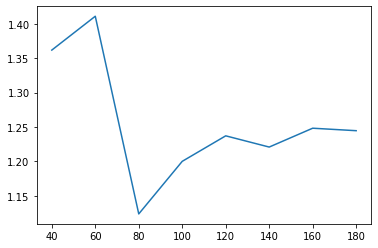

In [80]:
a = .25
b = .75
Jx, Jy, Jz = get_xyz(a, b, biased=False)

L = 2 # for reducing computation

chi_list = np.arange(40, 200, 20)
S_list = []

psi = None
for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))
    
plt.plot(chi_list, S_list)

Interesting.

The point `a=.25 b=.75` is gapless.

Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.525 for config KitaevLadderModel
Reading 'Jy'=-0.275 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0735618000023428, S = nan, norm_err = 1.5e-06
Current memory usage 446.0 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1042e-04, max_E_trunc = 8.2348e-05
MPS bond dimensions: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Updating environment
..
sweep 10, age = 588
Energy = -0.0735617833524430, S = nan, norm_err = 8.2e-07
Current memory usage 446.0 MB, time elapsed: 4.4 s
Delta E = 3.3300e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1153e-04, max_E_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0735955639826494, S = nan, norm_err = 5.7e-06
Current memory usage 446.0 MB, time elapsed: 5.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3686e-06, max_E_trunc = 6.8001e-07
MPS bond dimensions: [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
Updating environment
..
sweep 10, age = 588
Energy = -0.0735955646187113, S = nan, norm_err = 2.8e-07
Current memory usage 446.0 MB, time elapsed: 7.7 s
Delta E = -1.2721e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4054e

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0735959176663433, S = nan, norm_err = 1.4e-05
Current memory usage 446.0 MB, time elapsed: 6.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.8196e-09, max_E_trunc = 4.2148e-09
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
..
sweep 10, age = 588
Energy = -0.0735959178880107, S = nan, norm_err = 1.9e-07
Current memory usage 446.0 MB, time elapsed: 9.4 s
Delta E = -4.4333e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.5990e

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0735959196576322, S = nan, norm_err = 1.8e-05
Current memory usage 446.0 MB, time elapsed: 6.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.0893e-12, max_E_trunc = 5.1941e-12
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
..
sweep 10, age = 588
Energy = -0.0735959197820648, S = nan, norm_err = 1.0e-07
Current memory usage 446.0 MB, time elapsed: 12.0 s
Delta E = -2.4887e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8830

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000006672+8.782380104706898e-16j)
After the canonicalization:
Bond dim =  [60, 64, 58, 64, 60, 64, 60, 64, 60, 64, 60, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.525 for config KitaevLadderModel
Reading 'Jy'=-0.275 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0735959196856418, S = nan, norm_err = 1.8e-05
Current memory usage 446.0 MB, time elapsed: 14.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1362e-15, max_E_trunc = 3.1974e-14
MPS bond dimensions: [128, 128, 96, 128, 125, 128, 128, 128, 128, 128, 127, 128]
Updating environment
..
sweep 10, age = 588
Energy = -0.0735959197883259, S = nan, norm_err = 1.0e-07
Current memory usage 446.0 MB, time elapsed: 32.5 s
Delta E = -2.0537e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999647-4.409124127813854e-18j)
After the canonicalization:
Bond dim =  [86, 123, 86, 128, 86, 122, 86, 128, 86, 122, 86, 125]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================


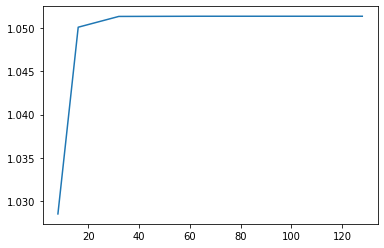

In [83]:
a = .25
b = .80
Jx, Jy, Jz = get_xyz(a, b, biased=False)

L = 3 # for reducing computation

chi_list = [2 ** n for n in range(3, 8)]
S_list = []

psi = None
for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))
    
plt.plot(chi_list, S_list)

Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0751232213388872, S = nan, norm_err = 1.4e-04
Current memory usage 446.0 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2183e-04, max_E_trunc = 2.9821e-05
MPS bond dimensions: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Updating environment
..
sweep 10, age = 588
Energy = -0.0751227316757825, S = nan, norm_err = 5.7e-05
Current memory usage 446.0 MB, time elapsed: 4.9 s
Delta E = 9.7933e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6146e-04, max_E_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


The norm is:  1.0
The overlap is:  (1.0000000000000546+6.873016385302588e-18j)
After the canonicalization:
Bond dim =  [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Computing properties
Optimizing
Loop for chi=8 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  11 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0751360023385694, S = nan, norm_err = 1.1e-03
Current memory usage 446.0 MB, time elapsed: 5.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4046e-05, max_E_trunc = 1.7208e-05
MPS bond dimensions: [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
Updating environment
..
sweep 10, age = 588
Energy = -0.0751365828940592, S = nan, norm_err = 5.1e-03
Current memory usage 446.0 MB, time elapsed: 7.4 s
Delta E = -1.1611e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.4074e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
DMRG finished after 55 sweeps.
total size = 2244, maximum chi = 11
Before the canonicalization:
Bond dim =  [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000414415-2.7267007011652633e-16j)
After the canonicalization:
Bond dim =  [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
Computing properties
Optimizing
Loop for chi=11 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  16 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0751461964006677, S = nan, norm_err = 2.3e-03
Current memory usage 446.0 MB, time elapsed: 6.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4732e-07, max_E_trunc = 8.5671e-08
MPS bond dimensions: [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
Updating environment
..
sweep 10, age = 588
Energy = -0.0751466655773546, S = nan, norm_err = 1.1e-03
Current memory usage 446.0 MB, time elapsed: 9.2 s
Delta E = -9.3835e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.0255e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG finished after 40 sweeps.
total size = 1836, maximum chi = 16
Before the canonicalization:
Bond dim =  [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000007885617-8.744768147453397e-17j)
After the canonicalization:
Bond dim =  [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
Computing properties
Optimizing
Loop for chi=16 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoS

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0751463544028197, S = nan, norm_err = 2.7e-03
Current memory usage 446.0 MB, time elapsed: 6.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.6087e-09, max_E_trunc = 3.3563e-09
MPS bond dimensions: [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
Updating environment
..
sweep 10, age = 588
Energy = -0.0751468819707852, S = nan, norm_err = 1.6e-03
Current memory usage 446.0 MB, time elapsed: 10.1 s
Delta E = -1.0551e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4255

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG finished after 80 sweeps.
total size = 3180, maximum chi = 22
Before the canonicalization:
Bond dim =  [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000028635654+1.1302807648161384e-16j)
After the canonicalization:
Bond dim =  [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config Two

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0751464770654563, S = nan, norm_err = 2.7e-03
Current memory usage 446.0 MB, time elapsed: 5.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5704e-10, max_E_trunc = 8.6828e-11
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
..
sweep 10, age = 588
Energy = -0.0751469256607719, S = nan, norm_err = 1.7e-03
Current memory usage 446.0 MB, time elapsed: 10.9 s
Delta E = -8.9719e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0992

Updating environment
..
sweep 95, age = 3444
Energy = -0.0751471454406622, S = 1.0346874779235418, norm_err = 9.4e-05
Current memory usage 446.0 MB, time elapsed: 48.0 s
Delta E = -2.0241e-11, Delta S = 3.6111e-04 (per sweep)
max_trunc_err = 2.7270e-08, max_E_trunc = 2.3457e-08
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
..
sweep 100, age = 3612
Energy = -0.0751471455166926, S = 1.0360989565208349, norm_err = 7.7e-05
Current memory usage 446.0 MB, time elapsed: 49.9 s
Delta E = -1.5206e-11, Delta S = 2.8230e-04 (per sweep)
max_trunc_err = 2.7708e-08, max_E_trunc = 2.3820e-08
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
..
sweep 105, age = 3780
Energy = -0.0751471455689696, S = 1.0374933162409847, norm_err = 7.4e-05
Current memory usage 446.0 MB, time elapsed: 51.8 s
Delta E = -1.0455e-11, Delta S = 2.7887e-04 (per sweep)
max_trunc_err = 2.8083e-08, max_E_trunc = 2.4132e-08
MPS bond dimensions: 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.06e-05
Call psi.canonical_form()
DMRG finished after 135 sweeps.
total size = 5028, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029-3.65376132127615e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  45 

Subcon

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0751465669924401, S = nan, norm_err = 2.6e-03
Current memory usage 446.0 MB, time elapsed: 6.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.3329e-12, max_E_trunc = 3.5207e-12
MPS bond dimensions: [45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45]
Updating environment
..
sweep 10, age = 588
Energy = -0.0751469459999174, S = nan, norm_err = 1.7e-03
Current memory usage 446.0 MB, time elapsed: 14.0 s
Delta E = -7.5801e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2911

Updating environment
..
sweep 95, age = 3444
Energy = -0.0751471599099531, S = 1.0587814296472726, norm_err = 9.2e-05
Current memory usage 446.0 MB, time elapsed: 57.2 s
Delta E = -5.4456e-11, Delta S = 5.6091e-04 (per sweep)
max_trunc_err = 4.2165e-09, max_E_trunc = 2.9610e-09
MPS bond dimensions: [45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45]
Updating environment
..
sweep 100, age = 3612
Energy = -0.0751471600510172, S = 1.0630274867515597, norm_err = 3.2e-04
Current memory usage 446.0 MB, time elapsed: 59.7 s
Delta E = -2.8213e-11, Delta S = 8.4921e-04 (per sweep)
max_trunc_err = 4.4262e-09, max_E_trunc = 3.1532e-09
MPS bond dimensions: [45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45]
Updating environment
..
sweep 105, age = 3780
Energy = -0.0751471603400707, S = 1.0648322719724985, norm_err = 9.1e-05
Current memory usage 446.0 MB, time elapsed: 62.1 s
Delta E = -5.7811e-11, Delta S = 3.6096e-04 (per sweep)
max_trunc_err = 4.5424e-09, max_E_trunc = 3.2315e-09
MPS bond dimensions: 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.84e-05
Call psi.canonical_form()
DMRG finished after 155 sweeps.
total size = 5700, maximum chi = 45
Before the canonicalization:
Bond dim =  [45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999964-1.7574917215990027e-16j)
After the canonicalization:
Bond dim =  [45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45]
Computing properties
Optimizing
Loop for chi=45 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subc

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0751466062648406, S = nan, norm_err = 2.5e-03
Current memory usage 446.0 MB, time elapsed: 6.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.2797e-14, max_E_trunc = 6.3949e-14
MPS bond dimensions: [64, 64, 60, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
..
sweep 10, age = 588
Energy = -0.0751469546713004, S = nan, norm_err = 1.7e-03
Current memory usage 446.0 MB, time elapsed: 14.5 s
Delta E = -6.9681e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9379

Updating environment
..
sweep 95, age = 3444
Energy = -0.0751471628999430, S = 1.0685499400443255, norm_err = 2.0e-04
Current memory usage 446.0 MB, time elapsed: 70.2 s
Delta E = -7.1469e-11, Delta S = 7.8686e-04 (per sweep)
max_trunc_err = 7.4844e-10, max_E_trunc = 5.4419e-10
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
..
sweep 100, age = 3612
Energy = -0.0751471632329104, S = 1.0722827503869379, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 73.1 s
Delta E = -6.6593e-11, Delta S = 7.4656e-04 (per sweep)
max_trunc_err = 7.9411e-10, max_E_trunc = 5.7469e-10
MPS bond dimensions: [64, 64, 64, 64, 63, 64, 64, 64, 64, 64, 64, 64]
Updating environment
..
sweep 105, age = 3780
Energy = -0.0751471635075565, S = 1.0758940329236530, norm_err = 1.8e-04
Current memory usage 446.0 MB, time elapsed: 75.9 s
Delta E = -5.4929e-11, Delta S = 7.2226e-04 (per sweep)
max_trunc_err = 8.3291e-10, max_E_trunc = 6.0066e-10
MPS bond dimensions: 

Updating environment
..
sweep 190, age = 6636
Energy = -0.0751471652328751, S = 1.1159044814028318, norm_err = 8.3e-05
Current memory usage 446.0 MB, time elapsed: 127.8 s
Delta E = -6.8889e-12, Delta S = 3.6540e-04 (per sweep)
max_trunc_err = 1.3536e-09, max_E_trunc = 9.3638e-10
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
..
sweep 195, age = 6804
Energy = -0.0751471652265063, S = 1.1177287794601927, norm_err = 2.6e-04
Current memory usage 446.0 MB, time elapsed: 130.7 s
Delta E = 1.2738e-12, Delta S = 3.6486e-04 (per sweep)
max_trunc_err = 1.3758e-09, max_E_trunc = 9.4991e-10
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
..
sweep 200, age = 6972
Energy = -0.0751471652897304, S = 1.1185027098725857, norm_err = 2.4e-05
Current memory usage 446.0 MB, time elapsed: 134.1 s
Delta E = -1.2645e-11, Delta S = 1.5479e-04 (per sweep)
max_trunc_err = 1.4149e-09, max_E_trunc = 9.7361e-10
MPS bond dimension

Updating environment
..
sweep 285, age = 9828
Energy = -0.0751471655168435, S = 1.1358376400606287, norm_err = 3.6e-05
Current memory usage 446.0 MB, time elapsed: 186.0 s
Delta E = -4.9710e-12, Delta S = 1.4865e-04 (per sweep)
max_trunc_err = 1.6912e-09, max_E_trunc = 1.1549e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
..
sweep 290, age = 9996
Energy = -0.0751471655219926, S = 1.1365175852230869, norm_err = 3.5e-05
Current memory usage 446.0 MB, time elapsed: 188.8 s
Delta E = -1.0298e-12, Delta S = 1.3599e-04 (per sweep)
max_trunc_err = 1.7024e-09, max_E_trunc = 1.1630e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
..
sweep 295, age = 10164
Energy = -0.0751471655268621, S = 1.1371928222793217, norm_err = 3.5e-05
Current memory usage 446.0 MB, time elapsed: 191.7 s
Delta E = -9.7392e-13, Delta S = 1.3505e-04 (per sweep)
max_trunc_err = 1.7141e-09, max_E_trunc = 1.1721e-09
MPS bond dimensi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.34e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 335 sweeps.
total size = 11748, maximum chi = 64
Before the canonicalization:
Bond dim =  [63, 64, 62, 64, 62, 64, 63, 64, 62, 64, 63, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000007+5.681219383824043e-17j)
After the canonicalization:
Bond dim =  [63, 64, 62, 64, 62, 64, 63, 64, 62, 64, 63, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=3 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  90 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating envi

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 420
Energy = -0.0751466827088141, S = nan, norm_err = 2.3e-03
Current memory usage 446.0 MB, time elapsed: 7.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1532e-15, max_E_trunc = 3.5527e-14
MPS bond dimensions: [90, 90, 70, 90, 90, 90, 89, 90, 90, 90, 90, 90]
Updating environment
..
sweep 10, age = 588
Energy = -0.0751469722317110, S = nan, norm_err = 1.7e-03
Current memory usage 446.0 MB, time elapsed: 20.6 s
Delta E = -5.7905e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.7684

Updating environment
..
sweep 95, age = 3444
Energy = -0.0751471634453911, S = 1.0712690180323488, norm_err = 2.1e-04
Current memory usage 446.0 MB, time elapsed: 108.0 s
Delta E = -7.8663e-11, Delta S = 8.5400e-04 (per sweep)
max_trunc_err = 6.4721e-11, max_E_trunc = 4.6498e-11
MPS bond dimensions: [90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90]
Updating environment
..
sweep 100, age = 3612
Energy = -0.0751471637822571, S = 1.0753538112235808, norm_err = 2.0e-04
Current memory usage 446.0 MB, time elapsed: 111.9 s
Delta E = -6.7373e-11, Delta S = 8.1696e-04 (per sweep)
max_trunc_err = 7.0916e-11, max_E_trunc = 5.0932e-11
MPS bond dimensions: [90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90]
Updating environment
..
sweep 105, age = 3780
Energy = -0.0751471640727838, S = 1.0791875375089710, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 115.9 s
Delta E = -5.8105e-11, Delta S = 7.6675e-04 (per sweep)
max_trunc_err = 7.7315e-11, max_E_trunc = 5.4285e-11
MPS bond dimension

Updating environment
..
sweep 190, age = 6636
Energy = -0.0751471660442273, S = 1.1253167206039976, norm_err = 1.1e-04
Current memory usage 446.0 MB, time elapsed: 185.7 s
Delta E = -9.4104e-12, Delta S = 4.3704e-04 (per sweep)
max_trunc_err = 1.9598e-10, max_E_trunc = 1.3671e-10
MPS bond dimensions: [90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90]
Updating environment
..
sweep 195, age = 6804
Energy = -0.0751471660871511, S = 1.1271110935847293, norm_err = 7.6e-05
Current memory usage 446.0 MB, time elapsed: 189.9 s
Delta E = -8.5848e-12, Delta S = 3.5887e-04 (per sweep)
max_trunc_err = 1.9904e-10, max_E_trunc = 1.3966e-10
MPS bond dimensions: [90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90]
Updating environment
..
sweep 200, age = 6972
Energy = -0.0751471661270102, S = 1.1289999085179807, norm_err = 1.1e-04
Current memory usage 446.0 MB, time elapsed: 194.5 s
Delta E = -7.9718e-12, Delta S = 3.7776e-04 (per sweep)
max_trunc_err = 2.0827e-10, max_E_trunc = 1.4518e-10
MPS bond dimensio

Updating environment
..
sweep 285, age = 9828
Energy = -0.0751471664965303, S = 1.1542807510399242, norm_err = 7.3e-05
Current memory usage 446.0 MB, time elapsed: 267.6 s
Delta E = -2.3410e-12, Delta S = 2.8614e-04 (per sweep)
max_trunc_err = 3.0542e-10, max_E_trunc = 2.0702e-10
MPS bond dimensions: [90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90]
Updating environment
..
sweep 290, age = 9996
Energy = -0.0751471665087233, S = 1.1553219476094030, norm_err = 4.0e-05
Current memory usage 446.0 MB, time elapsed: 271.6 s
Delta E = -2.4386e-12, Delta S = 2.0824e-04 (per sweep)
max_trunc_err = 3.1287e-10, max_E_trunc = 2.1066e-10
MPS bond dimensions: [90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90]
Updating environment
..
sweep 295, age = 10164
Energy = -0.0751471665189361, S = 1.1564299892139711, norm_err = 6.9e-05
Current memory usage 446.0 MB, time elapsed: 275.6 s
Delta E = -2.0426e-12, Delta S = 2.2161e-04 (per sweep)
max_trunc_err = 3.1685e-10, max_E_trunc = 2.1487e-10
MPS bond dimensi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.69e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 355 sweeps.
total size = 12420, maximum chi = 90
Before the canonicalization:
Bond dim =  [88, 90, 87, 90, 88, 90, 88, 90, 88, 90, 88, 90]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000033+3.541458024921126e-17j)
After the canonicalization:
Bond dim =  [88, 90, 87, 90, 88, 90, 88, 90, 88, 90, 88, 90]
Computing properties
Optimizing
Loop for chi=90 done.
============================== END ==============================


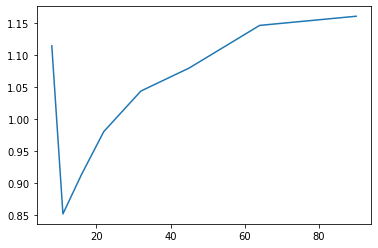

In [85]:
a = .6
b = .4
Jx, Jy, Jz = get_xyz(a, b, biased=False)

L = 3 # for reducing computation

chi_list = [int(2 ** n) for n in np.arange(3, 7, .5)]
S_list = []

psi = None
for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))
    
plt.plot(chi_list, S_list)

Quite a lot strange stuff.

Now let's again do a scratch. But this time we will not sweep directly on the phase diagram; we will sweep in different `chi`'s; after sweep over the `chi` list, we will get rid of the first several points, and the rest will provide useful information.

Before starting this section, we have to know the choice for the initial `chi`'s number.

Let's try this with a gapless state and a gapped state.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

Reading 'L'=5 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
DMRG finished after 50 sweeps.
total size = 3300, maximum chi = 30
Before the canonicalization:
Bond dim =  [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000328004-4.1726868568400237e-16j)
After the canonicalization:
Bond dim =  [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=5 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 700
Energy = -0.0751465602702854, S = nan, norm_err = 2.6e-03
Current memory usage 446.0 MB, time elapsed: 11.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.5127e-09, max_E_trunc = 2.6296e-09
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
..
sweep 10, age = 980
Energy = -0.0751469980082213, S = nan, norm_err = 1.3e-03
Current memory usage 446.0 MB, time elapsed: 19.1 s
Delta E = -8.7548e-08, Delta S = 0.0000e+00 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 700
Energy = -0.0751465623399756, S = nan, norm_err = 2.7e-03
Current memory usage 446.0 MB, time elapsed: 11.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9758e-09, max_E_trunc = 2.1549e-09
MPS bond dimensions: [34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34]
Updating environment
..
sweep 10, age = 980
Energy = -0.0751470048251754, S = nan, norm_err = 1.4e-03
Current memory usage 446.0 MB, time elapsed: 19.6 s
Delta E = -8.8497e-08, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
DMRG finished after 60 sweeps.
total size = 3940, maximum chi = 34
Before the canonicalization:
Bond dim =  [34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000667482+2.193250795861017e-16j)
After the canonicalization:
Bond dim =  [34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=5 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGE

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 700
Energy = -0.0751465749540614, S = nan, norm_err = 2.8e-03
Current memory usage 446.0 MB, time elapsed: 11.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6415e-09, max_E_trunc = 2.1318e-09
MPS bond dimensions: [36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]
Updating environment
..
sweep 10, age = 980
Energy = -0.0751470147033871, S = nan, norm_err = 1.5e-03
Current memory usage 446.0 MB, time elapsed: 19.9 s
Delta E = -8.7950e-08, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.50e-05
Call psi.canonical_form()
DMRG finished after 60 sweeps.
total size = 4180, maximum chi = 36
Before the canonicalization:
Bond dim =  [36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999983-5.5286079551225386e-17j)
After the canonicalization:
Bond dim =  [36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=5 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==================

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 700
Energy = -0.0751465730518955, S = nan, norm_err = 2.9e-03
Current memory usage 446.0 MB, time elapsed: 11.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4268e-09, max_E_trunc = 8.7506e-10
MPS bond dimensions: [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]
Updating environment
..
sweep 10, age = 980
Energy = -0.0751470192642202, S = nan, norm_err = 1.6e-03
Current memory usage 446.0 MB, time elapsed: 20.3 s
Delta E = -8.9242e-08, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 5460
Energy = -0.0751471529180179, S = 1.1334997528778665, norm_err = 4.4e-04
Current memory usage 446.0 MB, time elapsed: 84.0 s
Delta E = -1.3477e-10, Delta S = -1.5339e-03 (per sweep)
max_trunc_err = 2.2712e-08, max_E_trunc = 1.5691e-08
MPS bond dimensions: [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]
Updating environment
..
sweep 95, age = 5740
Energy = -0.0751471534966839, S = 1.1265890354833501, norm_err = 3.9e-04
Current memory usage 446.0 MB, time elapsed: 87.8 s
Delta E = -1.1573e-10, Delta S = -1.3821e-03 (per sweep)
max_trunc_err = 2.1917e-08, max_E_trunc = 1.4888e-08
MPS bond dimensions: [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]
Updating environment
..
sweep 100, age = 6020
Energy = -0.0751471539923131, S = 1.1203042530267833, norm_err = 3.5e-04
Current memory usage 446.0 MB, time elapsed: 91.5 s
Delta E = -9.9126e-11, Delta S = -1.2570e-03 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 10500
Energy = -0.0751471562232894, S = 1.0750422478813921, norm_err = 4.8e-05
Current memory usage 446.0 MB, time elapsed: 149.4 s
Delta E = -2.6273e-12, Delta S = -1.8179e-04 (per sweep)
max_trunc_err = 1.4777e-08, max_E_trunc = 9.3912e-09
MPS bond dimensions: [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]
Updating environment
..
sweep 185, age = 10780
Energy = -0.0751471562329328, S = 1.0744428391544090, norm_err = 3.6e-05
Current memory usage 446.0 MB, time elapsed: 153.0 s
Delta E = -1.9287e-12, Delta S = -1.1988e-04 (per sweep)
max_trunc_err = 1.4646e-08, max_E_trunc = 9.3082e-09
MPS bond dimensions: [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]
Updating environment
..
sweep 190, age = 11060
Energy = -0.0751471562390662, S = 1.0736628646095139, norm_err = 3.9e-05
Current memory usage 446.0 MB, time elapsed: 156.5 s
Delta E = -1.2267e-12, Delta S = -1.5599e-04 (per sweep)


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.87e-05
Call psi.canonical_form()
DMRG finished after 195 sweeps.
total size = 11740, maximum chi = 38
Before the canonicalization:
Bond dim =  [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999969-4.551480720094148e-16j)
After the canonicalization:
Bond dim =  [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=5 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


=================

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 700
Energy = -0.0751468420195113, S = nan, norm_err = 3.2e-03
Current memory usage 446.0 MB, time elapsed: 11.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1157e-10, max_E_trunc = 4.9454e-11
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 10, age = 980
Energy = -0.0751470656182494, S = nan, norm_err = 1.8e-03
Current memory usage 446.0 MB, time elapsed: 21.3 s
Delta E = -4.4720e-08, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 5460
Energy = -0.0751471577174044, S = 1.0682370726326595, norm_err = 6.9e-05
Current memory usage 446.0 MB, time elapsed: 80.6 s
Delta E = -6.1445e-12, Delta S = 2.2148e-04 (per sweep)
max_trunc_err = 1.2681e-08, max_E_trunc = 8.0030e-09
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 95, age = 5740
Energy = -0.0751471577417902, S = 1.0697044186770923, norm_err = 1.9e-05
Current memory usage 446.0 MB, time elapsed: 84.1 s
Delta E = -4.8772e-12, Delta S = 2.9347e-04 (per sweep)
max_trunc_err = 1.2964e-08, max_E_trunc = 8.1739e-09
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 100, age = 6020
Energy = -0.0751471577551314, S = 1.0712610727322518, norm_err = 8.8e-05
Current memory usage 446.0 MB, time elapsed: 87.6 s
Delta E = -2.6682e-12, Delta S = 3.1133e-04 (per sweep)
max_trunc_e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.80e-05
Call psi.canonical_form()
DMRG finished after 105 sweeps.
total size = 6700, maximum chi = 40
Before the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999977-2.229119666630197e-16j)
After the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=5 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==================

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 700
Energy = -0.0751468436893452, S = nan, norm_err = 3.2e-03
Current memory usage 446.0 MB, time elapsed: 10.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.0599e-11, max_E_trunc = 2.2247e-11
MPS bond dimensions: [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]
Updating environment
..
sweep 10, age = 980
Energy = -0.0751470648826569, S = nan, norm_err = 1.9e-03
Current memory usage 446.0 MB, time elapsed: 20.7 s
Delta E = -4.4239e-08, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 5460
Energy = -0.0751471597904143, S = 1.0757315946436456, norm_err = 9.8e-05
Current memory usage 446.0 MB, time elapsed: 82.8 s
Delta E = -1.0135e-11, Delta S = 3.9324e-04 (per sweep)
max_trunc_err = 9.1417e-09, max_E_trunc = 5.8682e-09
MPS bond dimensions: [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]
Updating environment
..
sweep 95, age = 5740
Energy = -0.0751471598275657, S = 1.0774660856216138, norm_err = 9.5e-05
Current memory usage 446.0 MB, time elapsed: 86.4 s
Delta E = -7.4303e-12, Delta S = 3.4690e-04 (per sweep)
max_trunc_err = 9.2812e-09, max_E_trunc = 5.9518e-09
MPS bond dimensions: [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]
Updating environment
..
sweep 100, age = 6020
Energy = -0.0751471598470346, S = 1.0789260961105875, norm_err = 8.7e-05
Current memory usage 446.0 MB, time elapsed: 90.4 s
Delta E = -3.8938e-12, Delta S = 2.9200e-04 (per sweep)
max_trunc_e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.19e-05
Call psi.canonical_form()
DMRG finished after 145 sweeps.
total size = 8940, maximum chi = 42
Before the canonicalization:
Bond dim =  [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000107-2.1369624819689292e-16j)
After the canonicalization:
Bond dim =  [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=5 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


=================

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 700
Energy = -0.0751468571961709, S = nan, norm_err = 3.1e-03
Current memory usage 446.0 MB, time elapsed: 11.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7670e-11, max_E_trunc = 2.4350e-11
MPS bond dimensions: [44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44]
Updating environment
..
sweep 10, age = 980
Energy = -0.0751470687861445, S = nan, norm_err = 1.9e-03
Current memory usage 446.0 MB, time elapsed: 21.4 s
Delta E = -4.2318e-08, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 5460
Energy = -0.0751471607003026, S = 1.0790910217112912, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 83.6 s
Delta E = -1.1775e-11, Delta S = 4.3029e-04 (per sweep)
max_trunc_err = 6.5114e-09, max_E_trunc = 4.5254e-09
MPS bond dimensions: [44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44]
Updating environment
..
sweep 95, age = 5740
Energy = -0.0751471607428542, S = 1.0808346520845191, norm_err = 1.0e-04
Current memory usage 446.0 MB, time elapsed: 87.3 s
Delta E = -8.5103e-12, Delta S = 3.4873e-04 (per sweep)
max_trunc_err = 6.6603e-09, max_E_trunc = 4.6251e-09
MPS bond dimensions: [44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44]
Updating environment
..
sweep 100, age = 6020
Energy = -0.0751471607780942, S = 1.0824632145302404, norm_err = 6.8e-05
Current memory usage 446.0 MB, time elapsed: 91.1 s
Delta E = -7.0480e-12, Delta S = 3.2571e-04 (per sweep)
max_trunc_e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.82e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 145 sweeps.
total size = 8940, maximum chi = 44
Before the canonicalization:
Bond dim =  [42, 44, 42, 44, 42, 44, 42, 44, 42, 44, 42, 44, 42, 44, 42, 44, 42, 44, 42, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000007+6.184289191857317e-16j)
After the canonicalization:
Bond dim =  [42, 44, 42, 44, 42, 44, 42, 44, 42, 44, 42, 44, 42, 44, 42, 44, 42, 44, 42, 44]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=5 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Re

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 700
Energy = -0.0751468521066178, S = nan, norm_err = 3.3e-03
Current memory usage 446.0 MB, time elapsed: 10.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7294e-11, max_E_trunc = 1.0850e-11
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46]
Updating environment
..
sweep 10, age = 980
Energy = -0.0751470682038647, S = nan, norm_err = 1.9e-03
Current memory usage 446.0 MB, time elapsed: 20.3 s
Delta E = -4.3219e-08, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 5460
Energy = -0.0751471616332381, S = 1.0833066219800800, norm_err = 9.6e-05
Current memory usage 446.0 MB, time elapsed: 84.0 s
Delta E = -1.6681e-11, Delta S = 5.0426e-04 (per sweep)
max_trunc_err = 5.0650e-09, max_E_trunc = 3.7170e-09
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46]
Updating environment
..
sweep 95, age = 5740
Energy = -0.0751471616864649, S = 1.0854520482839338, norm_err = 1.9e-05
Current memory usage 446.0 MB, time elapsed: 87.8 s
Delta E = -1.0645e-11, Delta S = 4.2909e-04 (per sweep)
max_trunc_err = 5.2403e-09, max_E_trunc = 3.8332e-09
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46]
Updating environment
..
sweep 100, age = 6020
Energy = -0.0751471617385604, S = 1.0873786333187769, norm_err = 6.5e-05
Current memory usage 446.0 MB, time elapsed: 91.6 s
Delta E = -1.0419e-11, Delta S = 3.8532e-04 (per sweep)
max_trunc_e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.13e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 165 sweeps.
total size = 10060, maximum chi = 46
Before the canonicalization:
Bond dim =  [46, 46, 46, 46, 46, 46, 45, 46, 46, 46, 45, 46, 46, 46, 45, 46, 46, 46, 45, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999989+3.0574501264091225e-16j)
After the canonicalization:
Bond dim =  [46, 46, 46, 46, 46, 46, 45, 46, 46, 46, 45, 46, 46, 46, 45, 46, 46, 46, 45, 46]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=5 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 700
Energy = -0.0751468573848696, S = nan, norm_err = 3.2e-03
Current memory usage 446.0 MB, time elapsed: 10.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7271e-11, max_E_trunc = 7.5460e-12
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 10, age = 980
Energy = -0.0751470692064508, S = nan, norm_err = 1.9e-03
Current memory usage 446.0 MB, time elapsed: 20.8 s
Delta E = -4.2364e-08, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 5460
Energy = -0.0751471624829406, S = 1.0878398240117164, norm_err = 1.4e-04
Current memory usage 446.0 MB, time elapsed: 86.4 s
Delta E = -1.9771e-11, Delta S = 5.6497e-04 (per sweep)
max_trunc_err = 3.9979e-09, max_E_trunc = 3.1807e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 95, age = 5740
Energy = -0.0751471625603614, S = 1.0903876763697582, norm_err = 1.3e-04
Current memory usage 446.0 MB, time elapsed: 90.3 s
Delta E = -1.5484e-11, Delta S = 5.0957e-04 (per sweep)
max_trunc_err = 4.0977e-09, max_E_trunc = 3.2717e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 100, age = 6020
Energy = -0.0751471626216997, S = 1.0926819890293247, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 94.2 s
Delta E = -1.2268e-11, Delta S = 4.5886e-04 (per sweep)
max_trunc_e

Updating environment
..
sweep 180, age = 10500
Energy = -0.0751471628639024, S = 1.1103451887503359, norm_err = 2.8e-05
Current memory usage 446.0 MB, time elapsed: 156.1 s
Delta E = -3.7232e-13, Delta S = 9.9767e-05 (per sweep)
max_trunc_err = 4.9331e-09, max_E_trunc = 4.0559e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
norm_tol=1.00e-05 not reached, norm_err=2.83e-05
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.08e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 180 sweeps.
total size = 10900, maximum chi = 48
Before the canonicalization:
Bond dim =  [46, 48, 46, 48, 46, 48, 46, 48, 46, 48, 46, 48, 46, 48, 46, 48, 46, 48, 46, 48]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999878+1.5439038936193583e-16j)
After the canonicalization:
Bond dim =  [46, 48, 46, 48, 46, 48, 46, 48, 46, 48, 46, 48, 46, 48, 46, 48, 46, 48, 46, 48]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================


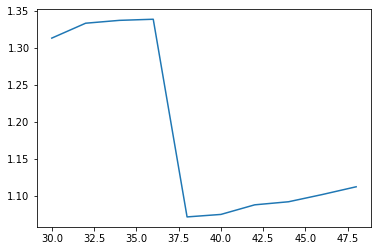

In [88]:
a = .6
b = .4
Jx, Jy, Jz = get_xyz(a, b, biased=False)

L = 5 # for reducing computation

chi_list = [int(n) for n in np.arange(30, 50, 2)]
S_list = []

psi = None
for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))
    
plt.plot(chi_list, S_list)

This sudden jump also happens for `L=3`. Weird.

Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
...

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751434766037009, S = nan, norm_err = 3.2e-03
Current memory usage 446.0 MB, time elapsed: 3.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.8315e-10, max_E_trunc = 2.0921e-10
MPS bond dimensions: [30, 30, 30, 30, 30, 30, 30, 30]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751463075755986, S = nan, norm_err = 1.8e-03
Current memory usage 446.0 MB, time elapsed: 6.7 s
Delta E = -5.6619e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4623e-08, max_E_trunc =

norm_tol=1.00e-05 not reached, norm_err=1.52e-05
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
DMRG finished after 95 sweeps.
total size = 2424, maximum chi = 30
Before the canonicalization:
Bond dim =  [30, 30, 30, 30, 30, 30, 30, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000066687125+3.4341298030352454e-16j)
After the canonicalization:
Bond dim =  [30, 30, 30, 30, 30, 30, 30, 30]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751444688951448, S = nan, norm_err = 3.0e-03
Current memory usage 446.0 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.9877e-10, max_E_trunc = 3.3076e-10
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751464324406239, S = nan, norm_err = 1.7e-03
Current memory usage 446.0 MB, time elapsed: 7.3 s
Delta E = -3.9271e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.7766e-09, max_E_trunc 

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751470847101228, S = 1.3289564825850424, norm_err = 5.1e-05
Current memory usage 446.0 MB, time elapsed: 37.4 s
Delta E = -8.3993e-12, Delta S = 1.5128e-04 (per sweep)
max_trunc_err = 9.2670e-08, max_E_trunc = 6.3805e-08
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751470836418093, S = 1.3295313357404903, norm_err = 4.4e-05
Current memory usage 446.0 MB, time elapsed: 38.8 s
Delta E = 2.1366e-10, Delta S = 1.1497e-04 (per sweep)
max_trunc_err = 9.3729e-08, max_E_trunc = 7.1428e-08
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751470831165850, S = 1.3301176715641327, norm_err = 3.7e-05
Current memory usage 446.0 MB, time elapsed: 40.1 s
Delta E = 1.0504e-10, Delta S = 1.1727e-04 (per sweep)
max_trunc_err = 1.0538e-07, max_E_trunc = 7.3170e-08
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32]


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


Updating environment
..
Updating environment
..
Updating environment
..
DMRG finished after 125 sweeps.
total size = 3096, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000066886887-1.3755959067953572e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 f

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751445313625183, S = nan, norm_err = 3.0e-03
Current memory usage 446.0 MB, time elapsed: 4.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7629e-10, max_E_trunc = 2.3186e-10
MPS bond dimensions: [34, 34, 34, 34, 34, 34, 34, 34]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751464438738334, S = nan, norm_err = 1.7e-03
Current memory usage 446.0 MB, time elapsed: 8.0 s
Delta E = -3.8250e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1534e-09, max_E_trunc 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.91e-04
Call psi.canonical_form()
DMRG finished after 60 sweeps.
total size = 1672, maximum chi = 34
Before the canonicalization:
Bond dim =  [34, 34, 34, 34, 34, 34, 34, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000073-6.505213034913027e-17j)
After the canonicalization:
Bond dim =  [34, 34, 34, 34, 34, 34, 34, 34]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='tr

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751467974449946, S = nan, norm_err = 1.8e-03
Current memory usage 446.0 MB, time elapsed: 3.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3339e-11, max_E_trunc = 3.7925e-11
MPS bond dimensions: [36, 36, 36, 36, 36, 36, 36, 36]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751470513650454, S = nan, norm_err = 3.7e-04
Current memory usage 446.0 MB, time elapsed: 7.5 s
Delta E = -5.0784e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1068e-09, max_E_trunc 

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471524485048, S = 1.0345768384675633, norm_err = 9.5e-05
Current memory usage 446.0 MB, time elapsed: 34.0 s
Delta E = -6.1570e-11, Delta S = 4.0954e-04 (per sweep)
max_trunc_err = 1.0259e-08, max_E_trunc = 7.6402e-09
MPS bond dimensions: [36, 36, 36, 36, 36, 36, 36, 36]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471527052914, S = 1.0370302653738670, norm_err = 1.1e-04
Current memory usage 446.0 MB, time elapsed: 35.4 s
Delta E = -5.1357e-11, Delta S = 4.9069e-04 (per sweep)
max_trunc_err = 1.0585e-08, max_E_trunc = 7.8561e-09
MPS bond dimensions: [36, 36, 36, 36, 36, 36, 36, 36]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471529191008, S = 1.0385793693037160, norm_err = 6.6e-05
Current memory usage 446.0 MB, time elapsed: 36.8 s
Delta E = -4.2762e-11, Delta S = 3.0982e-04 (per sweep)
max_trunc_err = 1.0875e-08, max_E_trunc = 8.0451e-09
MPS bond dimensions: [36, 36, 36, 36, 36, 36, 36, 36

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG finished after 160 sweeps.
total size = 3912, maximum chi = 36
Before the canonicalization:
Bond dim =  [36, 36, 36, 36, 36, 36, 36, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000006444018+1.3379054808471125e-16j)
After the canonicalization:
Bond dim =  [36, 36, 36, 36, 36, 36, 36, 36]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
R

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751463455917492, S = nan, norm_err = 1.7e-03
Current memory usage 446.0 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3129e-11, max_E_trunc = 4.9063e-12
MPS bond dimensions: [38, 38, 38, 38, 38, 38, 38, 38]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751468011290417, S = nan, norm_err = 1.4e-03
Current memory usage 446.0 MB, time elapsed: 7.8 s
Delta E = -9.1107e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4482e-10, max_E_trunc 

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471535639592, S = 1.0316930597586023, norm_err = 1.5e-04
Current memory usage 446.0 MB, time elapsed: 37.2 s
Delta E = -1.0252e-10, Delta S = 6.7497e-04 (per sweep)
max_trunc_err = 8.3584e-09, max_E_trunc = 5.3557e-09
MPS bond dimensions: [38, 38, 38, 38, 38, 38, 38, 38]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471539819644, S = 1.0339836978418344, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 38.6 s
Delta E = -8.3601e-11, Delta S = 4.5813e-04 (per sweep)
max_trunc_err = 8.6841e-09, max_E_trunc = 5.5586e-09
MPS bond dimensions: [38, 38, 38, 38, 38, 38, 38, 38]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471543308035, S = 1.0369803419854491, norm_err = 1.3e-04
Current memory usage 446.0 MB, time elapsed: 40.1 s
Delta E = -6.9768e-11, Delta S = 5.9933e-04 (per sweep)
max_trunc_err = 8.9989e-09, max_E_trunc = 5.7561e-09
MPS bond dimensions: [38, 38, 38, 38, 38, 38, 38, 38

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
DMRG finished after 180 sweeps.
total size = 4232, maximum chi = 38
Before the canonicalization:
Bond dim =  [38, 38, 38, 38, 38, 38, 38, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000287776336-4.014800644713823e-16j)
After the canonicalization:
Bond dim =  [38, 38, 38, 38, 38, 38, 38, 38]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751463230735625, S = nan, norm_err = 1.7e-03
Current memory usage 446.0 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.6501e-12, max_E_trunc = 2.6112e-12
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751467944798083, S = nan, norm_err = 1.5e-03
Current memory usage 446.0 MB, time elapsed: 8.3 s
Delta E = -9.4281e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7551e-10, max_E_trunc 

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471548083664, S = 1.0336791306399329, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 38.2 s
Delta E = -1.0834e-10, Delta S = 6.6810e-04 (per sweep)
max_trunc_err = 7.4634e-09, max_E_trunc = 4.8038e-09
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471552570120, S = 1.0362964263877454, norm_err = 1.2e-04
Current memory usage 446.0 MB, time elapsed: 39.6 s
Delta E = -8.9729e-11, Delta S = 5.2346e-04 (per sweep)
max_trunc_err = 7.8248e-09, max_E_trunc = 5.0263e-09
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471556272687, S = 1.0394685042753324, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 41.0 s
Delta E = -7.4051e-11, Delta S = 6.3442e-04 (per sweep)
max_trunc_err = 8.1801e-09, max_E_trunc = 5.2453e-09
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40

Updating environment
..
sweep 200, age = 4648
Energy = -0.0751471576489458, S = 1.0657398955581243, norm_err = 6.2e-05
Current memory usage 446.0 MB, time elapsed: 66.8 s
Delta E = -3.5072e-12, Delta S = 1.7042e-04 (per sweep)
max_trunc_err = 1.2211e-08, max_E_trunc = 7.7192e-09
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0751471575452527, S = 1.0660339838848387, norm_err = 7.9e-05
Current memory usage 446.0 MB, time elapsed: 68.4 s
Delta E = 2.0739e-11, Delta S = 5.8818e-05 (per sweep)
max_trunc_err = 1.2400e-08, max_E_trunc = 7.8235e-09
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40]
norm_tol=1.00e-05 not reached, norm_err=7.95e-05
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.88e-05
Call psi.canonical_form()
DMRG finished after 205 sweeps.
total size = 4920, maximum chi = 40
Before the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001-5.898059818321144e-17j)
After the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751463636522565, S = nan, norm_err = 1.6e-03
Current memory usage 446.0 MB, time elapsed: 3.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1818e-12, max_E_trunc = 1.3536e-12
MPS bond dimensions: [42, 42, 42, 42, 42, 42, 42, 42]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751468063034681, S = nan, norm_err = 1.4e-03
Current memory usage 446.0 MB, time elapsed: 7.8 s
Delta E = -8.8530e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2631e-11, max_E_trunc 

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471562916812, S = 1.0356662270934114, norm_err = 1.7e-04
Current memory usage 446.0 MB, time elapsed: 38.7 s
Delta E = -1.1899e-10, Delta S = 6.5523e-04 (per sweep)
max_trunc_err = 5.2218e-09, max_E_trunc = 3.4139e-09
MPS bond dimensions: [42, 42, 42, 42, 42, 42, 42, 42]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471567513509, S = 1.0385391328456679, norm_err = 1.4e-04
Current memory usage 446.0 MB, time elapsed: 40.4 s
Delta E = -9.1934e-11, Delta S = 5.7458e-04 (per sweep)
max_trunc_err = 5.5146e-09, max_E_trunc = 3.5927e-09
MPS bond dimensions: [42, 42, 42, 42, 42, 42, 42, 42]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471572261444, S = 1.0416773246738584, norm_err = 1.4e-04
Current memory usage 446.0 MB, time elapsed: 41.9 s
Delta E = -9.4959e-11, Delta S = 6.2764e-04 (per sweep)
max_trunc_err = 5.7069e-09, max_E_trunc = 3.7170e-09
MPS bond dimensions: [42, 42, 42, 42, 42, 42, 42, 42

Updating environment
..
sweep 200, age = 4648
Energy = -0.0751471596801103, S = 1.0718116132998268, norm_err = 1.2e-05
Current memory usage 446.0 MB, time elapsed: 68.4 s
Delta E = -6.2848e-12, Delta S = 1.1230e-04 (per sweep)
max_trunc_err = 8.6904e-09, max_E_trunc = 5.5828e-09
MPS bond dimensions: [42, 42, 42, 42, 42, 42, 42, 42]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0751471597063045, S = 1.0732216816592592, norm_err = 1.1e-04
Current memory usage 446.0 MB, time elapsed: 69.9 s
Delta E = -5.2388e-12, Delta S = 2.8201e-04 (per sweep)
max_trunc_err = 8.7940e-09, max_E_trunc = 5.6451e-09
MPS bond dimensions: [42, 42, 42, 42, 42, 42, 42, 42]
Updating environment
..
sweep 210, age = 4872
Energy = -0.0751471597271731, S = 1.0735047489533125, norm_err = 3.7e-05
Current memory usage 446.0 MB, time elapsed: 71.3 s
Delta E = -4.1737e-12, Delta S = 5.6613e-05 (per sweep)
max_trunc_err = 8.9180e-09, max_E_trunc = 5.7231e-09
MPS bond dimensions: [42, 42, 42, 42, 42, 42, 42, 42

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.29e-05
Call psi.canonical_form()
DMRG finished after 210 sweeps.
total size = 5032, maximum chi = 42
Before the canonicalization:
Bond dim =  [42, 42, 42, 42, 42, 42, 42, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000033+6.624475273886432e-16j)
After the canonicalization:
Bond dim =  [42, 42, 42, 42, 42, 42, 42, 42]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name=

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751463469117273, S = nan, norm_err = 1.7e-03
Current memory usage 446.0 MB, time elapsed: 3.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3845e-12, max_E_trunc = 1.2612e-12
MPS bond dimensions: [44, 44, 44, 44, 44, 44, 44, 44]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751468008360754, S = nan, norm_err = 1.5e-03
Current memory usage 446.0 MB, time elapsed: 8.0 s
Delta E = -9.0785e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1014e-11, max_E_trunc 

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471569959143, S = 1.0369404832368740, norm_err = 1.8e-04
Current memory usage 446.0 MB, time elapsed: 39.5 s
Delta E = -1.2342e-10, Delta S = 7.0457e-04 (per sweep)
max_trunc_err = 3.7615e-09, max_E_trunc = 2.6545e-09
MPS bond dimensions: [44, 44, 44, 44, 44, 44, 44, 44]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471575166178, S = 1.0400368979723384, norm_err = 1.5e-04
Current memory usage 446.0 MB, time elapsed: 41.0 s
Delta E = -1.0414e-10, Delta S = 6.1928e-04 (per sweep)
max_trunc_err = 3.9282e-09, max_E_trunc = 2.7686e-09
MPS bond dimensions: [44, 44, 44, 44, 44, 44, 44, 44]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471579584777, S = 1.0432230782226424, norm_err = 1.7e-04
Current memory usage 446.0 MB, time elapsed: 42.5 s
Delta E = -8.8372e-11, Delta S = 6.3724e-04 (per sweep)
max_trunc_err = 4.0920e-09, max_E_trunc = 2.8806e-09
MPS bond dimensions: [44, 44, 44, 44, 44, 44, 44, 44

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.05e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 175 sweeps.
total size = 4248, maximum chi = 44
Before the canonicalization:
Bond dim =  [43, 44, 42, 44, 42, 44, 42, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996-5.160802341031001e-17j)
After the canonicalization:
Bond dim =  [43, 44, 42, 44, 42, 44, 42, 44]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751463064141098, S = nan, norm_err = 1.8e-03
Current memory usage 446.0 MB, time elapsed: 4.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1658e-12, max_E_trunc = 4.9027e-13
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751467900254830, S = nan, norm_err = 1.5e-03
Current memory usage 446.0 MB, time elapsed: 8.3 s
Delta E = -9.6722e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0566e-11, max_E_trunc

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471575109370, S = 1.0376086013984724, norm_err = 1.8e-04
Current memory usage 446.0 MB, time elapsed: 40.5 s
Delta E = -1.2956e-10, Delta S = 7.0217e-04 (per sweep)
max_trunc_err = 3.1072e-09, max_E_trunc = 2.0958e-09
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471580693650, S = 1.0409331394474959, norm_err = 1.6e-04
Current memory usage 446.0 MB, time elapsed: 42.3 s
Delta E = -1.1169e-10, Delta S = 6.6491e-04 (per sweep)
max_trunc_err = 3.2266e-09, max_E_trunc = 2.1721e-09
MPS bond dimensions: [45, 46, 46, 46, 46, 46, 46, 46]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471585433627, S = 1.0440962522931392, norm_err = 1.6e-04
Current memory usage 446.0 MB, time elapsed: 44.1 s
Delta E = -9.4800e-11, Delta S = 6.3262e-04 (per sweep)
max_trunc_err = 3.3433e-09, max_E_trunc = 2.2454e-09
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46

Updating environment
..
sweep 200, age = 4648
Energy = -0.0751471614707242, S = 1.0788599231233644, norm_err = 7.7e-05
Current memory usage 446.0 MB, time elapsed: 73.8 s
Delta E = -8.6828e-12, Delta S = 2.8645e-04 (per sweep)
max_trunc_err = 4.8519e-09, max_E_trunc = 3.5226e-09
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0751471615131791, S = 1.0795520104955170, norm_err = 7.5e-05
Current memory usage 446.0 MB, time elapsed: 75.4 s
Delta E = -8.4910e-12, Delta S = 1.3842e-04 (per sweep)
max_trunc_err = 4.9039e-09, max_E_trunc = 3.5640e-09
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46]
Updating environment
..
sweep 210, age = 4872
Energy = -0.0751471615159787, S = 1.0806653811714553, norm_err = 5.6e-05
Current memory usage 446.0 MB, time elapsed: 77.1 s
Delta E = -5.5991e-13, Delta S = 2.2267e-04 (per sweep)
max_trunc_err = 4.9719e-09, max_E_trunc = 3.6553e-09
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.99e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 255 sweeps.
total size = 6040, maximum chi = 46
Before the canonicalization:
Bond dim =  [44, 46, 44, 46, 46, 46, 45, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999982-3.3480163086352377e-16j)
After the canonicalization:
Bond dim =  [44, 46, 44, 46, 46, 46, 45, 46]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751464203371848, S = nan, norm_err = 1.5e-03
Current memory usage 446.0 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.6015e-13, max_E_trunc = 4.7251e-13
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751468233399977, S = nan, norm_err = 1.4e-03
Current memory usage 446.0 MB, time elapsed: 7.9 s
Delta E = -8.0601e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8773e-11, max_E_trunc 

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471581406058, S = 1.0387726730719633, norm_err = 1.7e-04
Current memory usage 446.0 MB, time elapsed: 39.8 s
Delta E = -1.3102e-10, Delta S = 7.0065e-04 (per sweep)
max_trunc_err = 2.3321e-09, max_E_trunc = 1.5660e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471587095711, S = 1.0424903828391132, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 41.6 s
Delta E = -1.1379e-10, Delta S = 7.4354e-04 (per sweep)
max_trunc_err = 2.4233e-09, max_E_trunc = 1.6200e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471591925466, S = 1.0455298179145101, norm_err = 1.4e-04
Current memory usage 446.0 MB, time elapsed: 43.1 s
Delta E = -9.6595e-11, Delta S = 6.0789e-04 (per sweep)
max_trunc_err = 2.4917e-09, max_E_trunc = 1.6630e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48

Updating environment
..
sweep 200, age = 4648
Energy = -0.0751471622876139, S = 1.0825026549913090, norm_err = 6.8e-05
Current memory usage 446.0 MB, time elapsed: 77.9 s
Delta E = -1.1457e-11, Delta S = 2.6477e-04 (per sweep)
max_trunc_err = 3.8099e-09, max_E_trunc = 3.0038e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0751471623391744, S = 1.0837740354041481, norm_err = 6.3e-05
Current memory usage 446.0 MB, time elapsed: 79.7 s
Delta E = -1.0312e-11, Delta S = 2.5428e-04 (per sweep)
max_trunc_err = 3.8580e-09, max_E_trunc = 3.0470e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 210, age = 4872
Energy = -0.0751471623859601, S = 1.0850024033921128, norm_err = 6.2e-05
Current memory usage 446.0 MB, time elapsed: 81.6 s
Delta E = -9.3571e-12, Delta S = 2.4567e-04 (per sweep)
max_trunc_err = 3.9064e-09, max_E_trunc = 3.0942e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48

Updating environment
..
sweep 300, age = 6888
Energy = -0.0751471627749822, S = 1.1001561187502444, norm_err = 2.8e-05
Current memory usage 446.0 MB, time elapsed: 113.5 s
Delta E = -1.8133e-12, Delta S = 1.1328e-04 (per sweep)
max_trunc_err = 4.5031e-09, max_E_trunc = 3.6589e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 305, age = 7000
Energy = -0.0751471627834235, S = 1.1007447405183299, norm_err = 3.1e-05
Current memory usage 446.0 MB, time elapsed: 115.3 s
Delta E = -1.6882e-12, Delta S = 1.1772e-04 (per sweep)
max_trunc_err = 4.5265e-09, max_E_trunc = 3.6788e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 310, age = 7112
Energy = -0.0751471627909908, S = 1.1012550146188245, norm_err = 2.5e-05
Current memory usage 446.0 MB, time elapsed: 117.1 s
Delta E = -1.5135e-12, Delta S = 1.0205e-04 (per sweep)
max_trunc_err = 4.5489e-09, max_E_trunc = 3.6998e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.10e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 320 sweeps.
total size = 7496, maximum chi = 48
Before the canonicalization:
Bond dim =  [46, 48, 46, 48, 46, 48, 46, 48]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000013-9.668372873139486e-17j)
After the canonicalization:
Bond dim =  [46, 48, 46, 48, 46, 48, 46, 48]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================


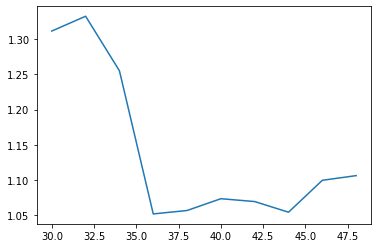

In [89]:
a = .6
b = .4
Jx, Jy, Jz = get_xyz(a, b, biased=False)

L = 2 # for reducing computation

chi_list = [int(n) for n in np.arange(30, 50, 2)]
S_list = []

psi = None
for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))
    
plt.plot(chi_list, S_list)

Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
...

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751435489617256, S = nan, norm_err = 3.5e-03
Current memory usage 446.0 MB, time elapsed: 4.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0957e-11, max_E_trunc = 1.1695e-11
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751463276315826, S = nan, norm_err = 1.9e-03
Current memory usage 446.0 MB, time elapsed: 7.4 s
Delta E = -5.5573e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3816e-09, max_E_trunc =

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471319224368, S = 1.3562678469723874, norm_err = 8.8e-05
Current memory usage 446.0 MB, time elapsed: 36.9 s
Delta E = -5.5441e-11, Delta S = 3.9079e-04 (per sweep)
max_trunc_err = 3.6435e-08, max_E_trunc = 3.1895e-08
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471321352426, S = 1.3579854674427010, norm_err = 7.6e-05
Current memory usage 446.0 MB, time elapsed: 38.5 s
Delta E = -4.2561e-11, Delta S = 3.4352e-04 (per sweep)
max_trunc_err = 3.7283e-08, max_E_trunc = 3.2570e-08
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471322958217, S = 1.3595381770158748, norm_err = 7.2e-05
Current memory usage 446.0 MB, time elapsed: 40.1 s
Delta E = -3.2116e-11, Delta S = 3.1054e-04 (per sweep)
max_trunc_err = 3.8056e-08, max_E_trunc = 3.3184e-08
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.48e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 160 sweeps.
total size = 3912, maximum chi = 40
Before the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 38, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000044-5.28652806912493e-17j)
After the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 38, 40]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751446818162267, S = nan, norm_err = 3.1e-03
Current memory usage 446.0 MB, time elapsed: 4.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.8693e-11, max_E_trunc = 3.3193e-11
MPS bond dimensions: [42, 42, 42, 42, 42, 42, 42, 42]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751464709741991, S = nan, norm_err = 1.7e-03
Current memory usage 446.0 MB, time elapsed: 8.7 s
Delta E = -3.5783e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4596e-09, max_E_trunc 

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471380979272, S = 1.3601335540043080, norm_err = 1.0e-04
Current memory usage 446.0 MB, time elapsed: 38.5 s
Delta E = -6.1818e-11, Delta S = 4.0808e-04 (per sweep)
max_trunc_err = 2.8842e-08, max_E_trunc = 1.6855e-08
MPS bond dimensions: [42, 42, 42, 42, 42, 42, 42, 42]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471383421940, S = 1.3619897066342490, norm_err = 9.7e-05
Current memory usage 446.0 MB, time elapsed: 40.1 s
Delta E = -4.8853e-11, Delta S = 3.7123e-04 (per sweep)
max_trunc_err = 2.9504e-08, max_E_trunc = 1.7243e-08
MPS bond dimensions: [42, 42, 42, 42, 42, 42, 42, 42]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471385313014, S = 1.3636488457275291, norm_err = 7.8e-05
Current memory usage 446.0 MB, time elapsed: 41.6 s
Delta E = -3.7821e-11, Delta S = 3.3183e-04 (per sweep)
max_trunc_err = 3.0104e-08, max_E_trunc = 1.7594e-08
MPS bond dimensions: [42, 42, 42, 42, 42, 42, 42, 42

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.89e-05
Call psi.canonical_form()
DMRG finished after 165 sweeps.
total size = 4024, maximum chi = 42
Before the canonicalization:
Bond dim =  [42, 42, 42, 42, 42, 42, 42, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000009+3.245017102249115e-16j)
After the canonicalization:
Bond dim =  [42, 42, 42, 42, 42, 42, 42, 42]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name=

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751446103947266, S = nan, norm_err = 3.2e-03
Current memory usage 446.0 MB, time elapsed: 4.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1900e-11, max_E_trunc = 1.3479e-11
MPS bond dimensions: [44, 44, 44, 44, 44, 44, 44, 44]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751464689580441, S = nan, norm_err = 1.8e-03
Current memory usage 446.0 MB, time elapsed: 9.4 s
Delta E = -3.7171e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1200e-10, max_E_trunc 

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471451109040, S = 1.3374458044834228, norm_err = 2.8e-04
Current memory usage 446.0 MB, time elapsed: 43.3 s
Delta E = -8.6595e-11, Delta S = 1.5142e-04 (per sweep)
max_trunc_err = 2.6292e-08, max_E_trunc = 1.5641e-08
MPS bond dimensions: [44, 44, 44, 44, 44, 44, 44, 44]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471454756576, S = 1.3381388222753223, norm_err = 2.4e-04
Current memory usage 446.0 MB, time elapsed: 44.9 s
Delta E = -7.2951e-11, Delta S = 1.3860e-04 (per sweep)
max_trunc_err = 2.6854e-08, max_E_trunc = 1.5952e-08
MPS bond dimensions: [44, 44, 44, 44, 44, 44, 44, 44]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471457899306, S = 1.3385532593421734, norm_err = 2.8e-04
Current memory usage 446.0 MB, time elapsed: 46.6 s
Delta E = -6.2855e-11, Delta S = 8.2887e-05 (per sweep)
max_trunc_err = 2.7293e-08, max_E_trunc = 1.6188e-08
MPS bond dimensions: [44, 44, 44, 44, 44, 44, 44, 44

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.57e-04
Call psi.canonical_form()
DMRG finished after 110 sweeps.
total size = 2792, maximum chi = 44
Before the canonicalization:
Bond dim =  [44, 44, 44, 44, 44, 44, 44, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000005+6.149594722337781e-16j)
After the canonicalization:
Bond dim =  [44, 44, 44, 44, 44, 44, 44, 44]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751467438191296, S = nan, norm_err = 2.4e-03
Current memory usage 446.0 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5454e-12, max_E_trunc = 2.1885e-12
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751470701633448, S = nan, norm_err = 3.6e-04
Current memory usage 446.0 MB, time elapsed: 8.6 s
Delta E = -6.5269e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4990e-10, max_E_trunc

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471588616255, S = 1.0463472923208685, norm_err = 1.4e-04
Current memory usage 446.0 MB, time elapsed: 41.5 s
Delta E = -8.4659e-11, Delta S = 6.0434e-04 (per sweep)
max_trunc_err = 3.4283e-09, max_E_trunc = 2.2998e-09
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471592239312, S = 1.0492232428864909, norm_err = 1.3e-04
Current memory usage 446.0 MB, time elapsed: 43.2 s
Delta E = -7.2461e-11, Delta S = 5.7519e-04 (per sweep)
max_trunc_err = 3.5392e-09, max_E_trunc = 2.3695e-09
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471595369519, S = 1.0519856354011679, norm_err = 1.5e-04
Current memory usage 446.0 MB, time elapsed: 44.8 s
Delta E = -6.2604e-11, Delta S = 5.5248e-04 (per sweep)
max_trunc_err = 3.6464e-09, max_E_trunc = 2.4371e-09
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46

Updating environment
..
sweep 200, age = 4648
Energy = -0.0751471615787054, S = 1.0817453534820720, norm_err = 6.1e-05
Current memory usage 446.0 MB, time elapsed: 73.1 s
Delta E = -6.3856e-12, Delta S = 2.0389e-04 (per sweep)
max_trunc_err = 5.0041e-09, max_E_trunc = 3.6545e-09
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0751471616073331, S = 1.0827404095882236, norm_err = 5.2e-05
Current memory usage 446.0 MB, time elapsed: 74.7 s
Delta E = -5.7256e-12, Delta S = 1.9901e-04 (per sweep)
max_trunc_err = 5.0524e-09, max_E_trunc = 3.7027e-09
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46]
Updating environment
..
sweep 210, age = 4872
Energy = -0.0751471616440647, S = 1.0836571095574787, norm_err = 4.8e-05
Current memory usage 446.0 MB, time elapsed: 76.3 s
Delta E = -7.3463e-12, Delta S = 1.8334e-04 (per sweep)
max_trunc_err = 5.0877e-09, max_E_trunc = 3.7434e-09
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.99e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 250 sweeps.
total size = 5928, maximum chi = 46
Before the canonicalization:
Bond dim =  [44, 46, 44, 46, 46, 46, 45, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000007+1.0755285551056204e-16j)
After the canonicalization:
Bond dim =  [44, 46, 44, 46, 46, 46, 45, 46]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751464319999962, S = nan, norm_err = 1.5e-03
Current memory usage 446.0 MB, time elapsed: 3.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2823e-13, max_E_trunc = 5.5067e-13
MPS bond dimensions: [48, 48, 47, 48, 48, 48, 48, 48]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751468156180017, S = nan, norm_err = 1.4e-03
Current memory usage 446.0 MB, time elapsed: 8.2 s
Delta E = -7.6724e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9669e-11, max_E_trunc 

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471581429612, S = 1.0389874778329458, norm_err = 1.8e-04
Current memory usage 446.0 MB, time elapsed: 42.7 s
Delta E = -1.3202e-10, Delta S = 7.2683e-04 (per sweep)
max_trunc_err = 2.3304e-09, max_E_trunc = 1.5668e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471587036843, S = 1.0423649161032702, norm_err = 1.8e-04
Current memory usage 446.0 MB, time elapsed: 44.5 s
Delta E = -1.1214e-10, Delta S = 6.7549e-04 (per sweep)
max_trunc_err = 2.4133e-09, max_E_trunc = 1.6167e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471591914541, S = 1.0456373352090473, norm_err = 1.6e-04
Current memory usage 446.0 MB, time elapsed: 46.6 s
Delta E = -9.7554e-11, Delta S = 6.5448e-04 (per sweep)
max_trunc_err = 2.4897e-09, max_E_trunc = 1.6617e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48

Updating environment
..
sweep 200, age = 4648
Energy = -0.0751471622873723, S = 1.0824721372104544, norm_err = 7.3e-05
Current memory usage 446.0 MB, time elapsed: 79.1 s
Delta E = -1.1619e-11, Delta S = 2.5627e-04 (per sweep)
max_trunc_err = 3.8127e-09, max_E_trunc = 3.0016e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0751471623390145, S = 1.0837461844337057, norm_err = 6.4e-05
Current memory usage 446.0 MB, time elapsed: 80.9 s
Delta E = -1.0328e-11, Delta S = 2.5481e-04 (per sweep)
max_trunc_err = 3.8560e-09, max_E_trunc = 3.0474e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 210, age = 4872
Energy = -0.0751471623853135, S = 1.0849874437682188, norm_err = 6.5e-05
Current memory usage 446.0 MB, time elapsed: 82.7 s
Delta E = -9.2598e-12, Delta S = 2.4825e-04 (per sweep)
max_trunc_err = 3.9008e-09, max_E_trunc = 3.0908e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48

Updating environment
..
sweep 300, age = 6888
Energy = -0.0751471627753801, S = 1.1001615352111278, norm_err = 3.0e-05
Current memory usage 446.0 MB, time elapsed: 114.8 s
Delta E = -1.9469e-12, Delta S = 1.1647e-04 (per sweep)
max_trunc_err = 4.5032e-09, max_E_trunc = 3.6579e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 305, age = 7000
Energy = -0.0751471627830966, S = 1.1007258253828045, norm_err = 2.8e-05
Current memory usage 446.0 MB, time elapsed: 116.6 s
Delta E = -1.5433e-12, Delta S = 1.1286e-04 (per sweep)
max_trunc_err = 4.5266e-09, max_E_trunc = 3.6781e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 310, age = 7112
Energy = -0.0751471627905502, S = 1.1012655395904529, norm_err = 2.9e-05
Current memory usage 446.0 MB, time elapsed: 118.3 s
Delta E = -1.4907e-12, Delta S = 1.0794e-04 (per sweep)
max_trunc_err = 4.5486e-09, max_E_trunc = 3.6988e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.39e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 325 sweeps.
total size = 7608, maximum chi = 48
Before the canonicalization:
Bond dim =  [46, 48, 46, 48, 46, 48, 46, 48]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999982-1.6393136847980827e-16j)
After the canonicalization:
Bond dim =  [46, 48, 46, 48, 46, 48, 46, 48]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751464314070796, S = nan, norm_err = 1.5e-03
Current memory usage 446.0 MB, time elapsed: 3.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2241e-13, max_E_trunc = 2.7711e-13
MPS bond dimensions: [50, 50, 49, 50, 50, 50, 50, 50]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751468267489941, S = nan, norm_err = 1.4e-03
Current memory usage 446.0 MB, time elapsed: 8.2 s
Delta E = -7.9068e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8047e-11, max_E_trunc 

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471586030199, S = 1.0397080579358180, norm_err = 1.6e-04
Current memory usage 446.0 MB, time elapsed: 41.7 s
Delta E = -1.3243e-10, Delta S = 6.7014e-04 (per sweep)
max_trunc_err = 1.7109e-09, max_E_trunc = 1.0853e-09
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471591693225, S = 1.0435509610427482, norm_err = 2.2e-04
Current memory usage 446.0 MB, time elapsed: 43.7 s
Delta E = -1.1326e-10, Delta S = 7.6858e-04 (per sweep)
max_trunc_err = 1.8147e-09, max_E_trunc = 1.1434e-09
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471596265709, S = 1.0463660993982846, norm_err = 9.6e-05
Current memory usage 446.0 MB, time elapsed: 45.6 s
Delta E = -9.1450e-11, Delta S = 5.6303e-04 (per sweep)
max_trunc_err = 1.9171e-09, max_E_trunc = 1.2034e-09
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50

Updating environment
..
sweep 200, age = 4648
Energy = -0.0751471629421729, S = 1.0848808551248941, norm_err = 8.7e-05
Current memory usage 446.0 MB, time elapsed: 80.8 s
Delta E = -1.2579e-11, Delta S = 2.8785e-04 (per sweep)
max_trunc_err = 3.2795e-09, max_E_trunc = 2.1232e-09
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0751471629991691, S = 1.0862320347326033, norm_err = 8.8e-05
Current memory usage 446.0 MB, time elapsed: 82.8 s
Delta E = -1.1399e-11, Delta S = 2.7024e-04 (per sweep)
max_trunc_err = 3.3234e-09, max_E_trunc = 2.1490e-09
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 210, age = 4872
Energy = -0.0751471630514153, S = 1.0874408233772832, norm_err = 6.7e-05
Current memory usage 446.0 MB, time elapsed: 84.8 s
Delta E = -1.0449e-11, Delta S = 2.4176e-04 (per sweep)
max_trunc_err = 3.3672e-09, max_E_trunc = 2.1749e-09
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50

norm_tol=1.00e-05 not reached, norm_err=2.63e-05
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.35e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 295 sweeps.
total size = 6936, maximum chi = 50
Before the canonicalization:
Bond dim =  [48, 50, 48, 50, 48, 50, 48, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000004-1.6132928326584306e-16j)
After the canonicalization:
Bond dim =  [48, 50, 48, 50, 48, 50, 48, 50]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751464294899367, S = nan, norm_err = 1.5e-03
Current memory usage 446.0 MB, time elapsed: 3.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4073e-13, max_E_trunc = 1.7053e-13
MPS bond dimensions: [52, 52, 52, 52, 52, 52, 52, 52]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751468261577657, S = nan, norm_err = 1.4e-03
Current memory usage 446.0 MB, time elapsed: 8.3 s
Delta E = -7.9334e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2961e-11, max_E_trunc 

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471588007746, S = 1.0400284372067325, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 42.1 s
Delta E = -1.3974e-10, Delta S = 7.4184e-04 (per sweep)
max_trunc_err = 1.2738e-09, max_E_trunc = 8.3449e-10
MPS bond dimensions: [52, 52, 52, 52, 52, 52, 52, 52]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471593884485, S = 1.0436246269587079, norm_err = 1.8e-04
Current memory usage 446.0 MB, time elapsed: 43.7 s
Delta E = -1.1753e-10, Delta S = 7.1924e-04 (per sweep)
max_trunc_err = 1.3491e-09, max_E_trunc = 8.7968e-10
MPS bond dimensions: [52, 52, 52, 52, 52, 52, 52, 52]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471598949180, S = 1.0468777430572882, norm_err = 1.6e-04
Current memory usage 446.0 MB, time elapsed: 45.3 s
Delta E = -1.0129e-10, Delta S = 6.5062e-04 (per sweep)
max_trunc_err = 1.4236e-09, max_E_trunc = 9.2322e-10
MPS bond dimensions: [52, 52, 52, 52, 52, 52, 52, 52

Updating environment
..
sweep 200, age = 4648
Energy = -0.0751471632470597, S = 1.0859886946580470, norm_err = 8.6e-05
Current memory usage 446.0 MB, time elapsed: 75.9 s
Delta E = -1.4290e-11, Delta S = 2.7722e-04 (per sweep)
max_trunc_err = 2.5627e-09, max_E_trunc = 1.7922e-09
MPS bond dimensions: [52, 52, 52, 52, 52, 52, 52, 52]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0751471633105609, S = 1.0874425598921815, norm_err = 6.5e-05
Current memory usage 446.0 MB, time elapsed: 77.7 s
Delta E = -1.2700e-11, Delta S = 2.9077e-04 (per sweep)
max_trunc_err = 2.5982e-09, max_E_trunc = 1.8155e-09
MPS bond dimensions: [52, 52, 52, 52, 52, 52, 52, 52]
Updating environment
..
sweep 210, age = 4872
Energy = -0.0751471633685163, S = 1.0888853140585131, norm_err = 7.5e-05
Current memory usage 446.0 MB, time elapsed: 79.6 s
Delta E = -1.1591e-11, Delta S = 2.8855e-04 (per sweep)
max_trunc_err = 2.6313e-09, max_E_trunc = 1.8375e-09
MPS bond dimensions: [52, 52, 52, 52, 52, 52, 52, 52

Updating environment
..
sweep 300, age = 6888
Energy = -0.0751471638738508, S = 1.1069105360235589, norm_err = 4.1e-05
Current memory usage 446.0 MB, time elapsed: 113.4 s
Delta E = -2.5274e-12, Delta S = 1.5851e-04 (per sweep)
max_trunc_err = 3.0536e-09, max_E_trunc = 2.1161e-09
MPS bond dimensions: [52, 52, 52, 52, 52, 52, 52, 52]
Updating environment
..
sweep 305, age = 7000
Energy = -0.0751471638855534, S = 1.1075333609183262, norm_err = 3.4e-05
Current memory usage 446.0 MB, time elapsed: 115.3 s
Delta E = -2.3405e-12, Delta S = 1.2456e-04 (per sweep)
max_trunc_err = 3.0702e-09, max_E_trunc = 2.1270e-09
MPS bond dimensions: [52, 52, 52, 52, 52, 52, 52, 52]
Updating environment
..
sweep 310, age = 7112
Energy = -0.0751471638963963, S = 1.1082873746286779, norm_err = 3.9e-05
Current memory usage 446.0 MB, time elapsed: 117.2 s
Delta E = -2.1686e-12, Delta S = 1.5080e-04 (per sweep)
max_trunc_err = 3.0868e-09, max_E_trunc = 2.1378e-09
MPS bond dimensions: [52, 52, 52, 52, 52, 52, 52,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.35e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 335 sweeps.
total size = 7832, maximum chi = 52
Before the canonicalization:
Bond dim =  [50, 52, 50, 52, 50, 52, 50, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999936+8.27463098040937e-16j)
After the canonicalization:
Bond dim =  [50, 52, 50, 52, 50, 52, 50, 52]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751464453181727, S = nan, norm_err = 1.5e-03
Current memory usage 446.0 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1712e-13, max_E_trunc = 1.0303e-13
MPS bond dimensions: [54, 54, 52, 54, 54, 54, 54, 54]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751468310660388, S = nan, norm_err = 1.4e-03
Current memory usage 446.0 MB, time elapsed: 8.3 s
Delta E = -7.7150e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.6836e-12, max_E_trunc 

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471590156285, S = 1.0407659647895700, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 45.4 s
Delta E = -1.3820e-10, Delta S = 7.5364e-04 (per sweep)
max_trunc_err = 1.1419e-09, max_E_trunc = 7.8100e-10
MPS bond dimensions: [54, 54, 54, 54, 54, 54, 54, 54]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471596061037, S = 1.0443534663286420, norm_err = 1.7e-04
Current memory usage 446.0 MB, time elapsed: 47.9 s
Delta E = -1.1810e-10, Delta S = 7.1750e-04 (per sweep)
max_trunc_err = 1.2031e-09, max_E_trunc = 8.1945e-10
MPS bond dimensions: [54, 54, 54, 54, 54, 54, 54, 54]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471601137368, S = 1.0477199811256703, norm_err = 1.7e-04
Current memory usage 446.0 MB, time elapsed: 49.6 s
Delta E = -1.0153e-10, Delta S = 6.7330e-04 (per sweep)
max_trunc_err = 1.2631e-09, max_E_trunc = 8.5760e-10
MPS bond dimensions: [54, 54, 54, 54, 54, 54, 54, 54

Updating environment
..
sweep 200, age = 4648
Energy = -0.0751471635369683, S = 1.0875037065137501, norm_err = 7.8e-05
Current memory usage 446.0 MB, time elapsed: 81.6 s
Delta E = -1.3188e-11, Delta S = 3.0006e-04 (per sweep)
max_trunc_err = 2.1367e-09, max_E_trunc = 1.4137e-09
MPS bond dimensions: [54, 54, 54, 54, 54, 54, 54, 54]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0751471635969914, S = 1.0889344200683739, norm_err = 7.3e-05
Current memory usage 446.0 MB, time elapsed: 83.3 s
Delta E = -1.2005e-11, Delta S = 2.8614e-04 (per sweep)
max_trunc_err = 2.1724e-09, max_E_trunc = 1.4372e-09
MPS bond dimensions: [54, 54, 54, 54, 54, 54, 54, 54]
Updating environment
..
sweep 210, age = 4872
Energy = -0.0751471636514331, S = 1.0903145960264982, norm_err = 7.2e-05
Current memory usage 446.0 MB, time elapsed: 84.9 s
Delta E = -1.0888e-11, Delta S = 2.7604e-04 (per sweep)
max_trunc_err = 2.2078e-09, max_E_trunc = 1.4589e-09
MPS bond dimensions: [54, 54, 54, 54, 54, 54, 54, 54

Updating environment
..
sweep 300, age = 6888
Energy = -0.0751471641265340, S = 1.1080470137114471, norm_err = 3.8e-05
Current memory usage 446.0 MB, time elapsed: 115.0 s
Delta E = -2.3718e-12, Delta S = 1.4188e-04 (per sweep)
max_trunc_err = 2.6844e-09, max_E_trunc = 1.7676e-09
MPS bond dimensions: [54, 54, 54, 54, 54, 54, 54, 54]
Updating environment
..
sweep 305, age = 7000
Energy = -0.0751471641378743, S = 1.1087270658184141, norm_err = 3.7e-05
Current memory usage 446.0 MB, time elapsed: 116.6 s
Delta E = -2.2681e-12, Delta S = 1.3601e-04 (per sweep)
max_trunc_err = 2.7031e-09, max_E_trunc = 1.7801e-09
MPS bond dimensions: [54, 54, 54, 54, 54, 54, 54, 54]
Updating environment
..
sweep 310, age = 7112
Energy = -0.0751471641478929, S = 1.1093954363309408, norm_err = 3.6e-05
Current memory usage 446.0 MB, time elapsed: 118.2 s
Delta E = -2.0037e-12, Delta S = 1.3367e-04 (per sweep)
max_trunc_err = 2.7217e-09, max_E_trunc = 1.7922e-09
MPS bond dimensions: [54, 54, 54, 54, 54, 54, 54,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.11e-05
Call psi.canonical_form()
DMRG finished after 355 sweeps.
total size = 8280, maximum chi = 54
Before the canonicalization:
Bond dim =  [54, 54, 54, 54, 54, 54, 54, 54]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1+1.71954464556201e-16j)
After the canonicalization:
Bond dim =  [54, 54, 54, 54, 54, 54, 54, 54]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', co

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751464503440273, S = nan, norm_err = 1.5e-03
Current memory usage 446.0 MB, time elapsed: 3.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0113e-13, max_E_trunc = 8.5265e-14
MPS bond dimensions: [56, 56, 54, 56, 56, 56, 56, 56]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751468326910758, S = nan, norm_err = 1.4e-03
Current memory usage 446.0 MB, time elapsed: 9.1 s
Delta E = -7.6469e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2668e-12, max_E_trunc

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471592088109, S = 1.0412802311140223, norm_err = 1.8e-04
Current memory usage 446.0 MB, time elapsed: 47.5 s
Delta E = -1.3817e-10, Delta S = 7.6472e-04 (per sweep)
max_trunc_err = 1.0322e-09, max_E_trunc = 6.7604e-10
MPS bond dimensions: [56, 56, 56, 56, 56, 56, 56, 56]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471598018796, S = 1.0448564719664977, norm_err = 1.8e-04
Current memory usage 446.0 MB, time elapsed: 49.4 s
Delta E = -1.1861e-10, Delta S = 7.1525e-04 (per sweep)
max_trunc_err = 1.0887e-09, max_E_trunc = 7.0924e-10
MPS bond dimensions: [56, 56, 56, 56, 56, 56, 56, 56]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471603147671, S = 1.0482738149977049, norm_err = 1.7e-04
Current memory usage 446.0 MB, time elapsed: 51.2 s
Delta E = -1.0258e-10, Delta S = 6.8347e-04 (per sweep)
max_trunc_err = 1.1458e-09, max_E_trunc = 7.4206e-10
MPS bond dimensions: [56, 56, 56, 56, 56, 56, 56, 56

Updating environment
..
sweep 200, age = 4648
Energy = -0.0751471638202403, S = 1.0890474663486573, norm_err = 8.1e-05
Current memory usage 446.0 MB, time elapsed: 84.6 s
Delta E = -1.3796e-11, Delta S = 3.4676e-04 (per sweep)
max_trunc_err = 2.0046e-09, max_E_trunc = 1.2495e-09
MPS bond dimensions: [56, 56, 56, 56, 56, 56, 56, 56]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0751471638829031, S = 1.0904685530513853, norm_err = 9.3e-05
Current memory usage 446.0 MB, time elapsed: 86.6 s
Delta E = -1.2533e-11, Delta S = 2.8422e-04 (per sweep)
max_trunc_err = 2.0406e-09, max_E_trunc = 1.2717e-09
MPS bond dimensions: [56, 56, 56, 56, 56, 56, 56, 56]
Updating environment
..
sweep 210, age = 4872
Energy = -0.0751471639405565, S = 1.0917791072533936, norm_err = 6.3e-05
Current memory usage 446.0 MB, time elapsed: 88.4 s
Delta E = -1.1531e-11, Delta S = 2.6211e-04 (per sweep)
max_trunc_err = 2.0774e-09, max_E_trunc = 1.2939e-09
MPS bond dimensions: [56, 56, 56, 56, 56, 56, 56, 56

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.32e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 290 sweeps.
total size = 6824, maximum chi = 56
Before the canonicalization:
Bond dim =  [54, 56, 54, 56, 54, 56, 54, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000009+2.0057740190981832e-16j)
After the canonicalization:
Bond dim =  [54, 56, 54, 56, 54, 56, 54, 56]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751464327673184, S = nan, norm_err = 1.5e-03
Current memory usage 446.0 MB, time elapsed: 4.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5686e-14, max_E_trunc = 5.3291e-14
MPS bond dimensions: [58, 58, 57, 58, 58, 58, 58, 58]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751468271845843, S = nan, norm_err = 1.4e-03
Current memory usage 446.0 MB, time elapsed: 9.4 s
Delta E = -7.8883e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6831e-12, max_E_trunc 

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471593187141, S = 1.0415835733578533, norm_err = 2.0e-04
Current memory usage 446.0 MB, time elapsed: 51.4 s
Delta E = -1.3607e-10, Delta S = 7.7772e-04 (per sweep)
max_trunc_err = 8.9180e-10, max_E_trunc = 6.2954e-10
MPS bond dimensions: [58, 58, 58, 58, 58, 58, 58, 58]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471599167637, S = 1.0451620258696488, norm_err = 1.7e-04
Current memory usage 446.0 MB, time elapsed: 53.1 s
Delta E = -1.1961e-10, Delta S = 7.1569e-04 (per sweep)
max_trunc_err = 9.4517e-10, max_E_trunc = 6.6319e-10
MPS bond dimensions: [58, 58, 58, 58, 58, 58, 58, 58]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471604343656, S = 1.0486744647144124, norm_err = 1.8e-04
Current memory usage 446.0 MB, time elapsed: 54.8 s
Delta E = -1.0352e-10, Delta S = 7.0249e-04 (per sweep)
max_trunc_err = 9.9672e-10, max_E_trunc = 6.9542e-10
MPS bond dimensions: [58, 58, 58, 58, 58, 58, 58, 58

Updating environment
..
sweep 200, age = 4648
Energy = -0.0751471639858927, S = 1.0899247545768485, norm_err = 7.7e-05
Current memory usage 446.0 MB, time elapsed: 86.4 s
Delta E = -1.4045e-11, Delta S = 3.0452e-04 (per sweep)
max_trunc_err = 1.8446e-09, max_E_trunc = 1.2260e-09
MPS bond dimensions: [58, 58, 58, 58, 58, 58, 58, 58]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0751471640502821, S = 1.0914925077742887, norm_err = 8.4e-05
Current memory usage 446.0 MB, time elapsed: 88.2 s
Delta E = -1.2878e-11, Delta S = 3.1355e-04 (per sweep)
max_trunc_err = 1.8831e-09, max_E_trunc = 1.2499e-09
MPS bond dimensions: [58, 58, 58, 58, 58, 58, 58, 58]
Updating environment
..
sweep 210, age = 4872
Energy = -0.0751471641090333, S = 1.0929392211700473, norm_err = 7.0e-05
Current memory usage 446.0 MB, time elapsed: 89.9 s
Delta E = -1.1750e-11, Delta S = 2.8934e-04 (per sweep)
max_trunc_err = 1.9211e-09, max_E_trunc = 1.2736e-09
MPS bond dimensions: [58, 58, 58, 58, 58, 58, 58, 58

Updating environment
..
sweep 300, age = 6888
Energy = -0.0751471646326110, S = 1.1119657196071464, norm_err = 4.2e-05
Current memory usage 446.0 MB, time elapsed: 122.4 s
Delta E = -2.7178e-12, Delta S = 1.5270e-04 (per sweep)
max_trunc_err = 2.4467e-09, max_E_trunc = 1.6030e-09
MPS bond dimensions: [58, 58, 58, 58, 58, 58, 58, 58]
Updating environment
..
sweep 305, age = 7000
Energy = -0.0751471646452444, S = 1.1127580584580996, norm_err = 3.9e-05
Current memory usage 446.0 MB, time elapsed: 124.2 s
Delta E = -2.5267e-12, Delta S = 1.5847e-04 (per sweep)
max_trunc_err = 2.4699e-09, max_E_trunc = 1.6167e-09
MPS bond dimensions: [58, 58, 58, 58, 58, 58, 58, 58]
Updating environment
..
sweep 310, age = 7112
Energy = -0.0751471646569115, S = 1.1134436795004206, norm_err = 3.4e-05
Current memory usage 446.0 MB, time elapsed: 126.0 s
Delta E = -2.3334e-12, Delta S = 1.3712e-04 (per sweep)
max_trunc_err = 2.4914e-09, max_E_trunc = 1.6308e-09
MPS bond dimensions: [58, 58, 58, 58, 58, 58, 58,

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.37e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 350 sweeps.
total size = 8168, maximum chi = 58
Before the canonicalization:
Bond dim =  [58, 58, 58, 58, 58, 58, 56, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999962+5.694229809893869e-16j)
After the canonicalization:
Bond dim =  [58, 58, 58, 58, 58, 58, 56, 58]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================


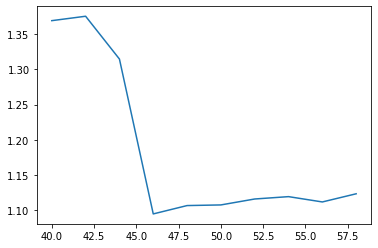

In [90]:
a = .6
b = .4
Jx, Jy, Jz = get_xyz(a, b, biased=False)

L = 2 # for reducing computation

chi_list = [int(n) for n in np.arange(40, 60, 2)]
S_list = []

psi = None
for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))
    
plt.plot(chi_list, S_list)

Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751229041409415, S = nan, norm_err = 4.1e-04
Current memory usage 446.0 MB, time elapsed: 1.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2699e-05, max_E_trunc = 2.7021e-05
MPS bond dimensions: [8, 8, 8, 8, 8, 8, 8, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751228633146863, S = nan, norm_err = 1.1e-04
Current memory usage 446.0 MB, time elapsed: 3.4 s
Delta E = 8.1653e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5468e-04, max_E_trunc = 3.7770e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


The norm is:  1.0
The overlap is:  (1.0000000000112648-9.735058562883045e-17j)
After the canonicalization:
Bond dim =  [8, 8, 8, 8, 8, 8, 8, 8]
Computing properties
Optimizing
Loop for chi=8 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  16 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751436316753584, S = nan, norm_err = 1.9e-03
Current memory usage 446.0 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.4279e-07, max_E_trunc = 2.3307e-07
MPS bond dimensions: [16, 16, 16, 16, 16, 16, 16, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751454702955903, S = nan, norm_err = 9.1e-04
Current memory usage 446.0 MB, time elapsed: 6.0 s
Delta E = -3.6772e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0673e-06, max_E_trunc 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


The norm is:  1.0
The overlap is:  (1.0000000001668652-7.746304145334095e-18j)
After the canonicalization:
Bond dim =  [16, 16, 16, 16, 16, 16, 16, 16]
Computing properties
Optimizing
Loop for chi=16 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751444118391538, S = nan, norm_err = 3.0e-03
Current memory usage 446.0 MB, time elapsed: 4.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.4391e-10, max_E_trunc = 3.1144e-10
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751464247588933, S = nan, norm_err = 1.7e-03
Current memory usage 446.0 MB, time elapsed: 8.5 s
Delta E = -4.0258e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.6172e-09, max_E_trunc 

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751470847099771, S = 1.3288866862725399, norm_err = 3.7e-05
Current memory usage 446.0 MB, time elapsed: 39.9 s
Delta E = -6.7764e-12, Delta S = 1.4629e-04 (per sweep)
max_trunc_err = 9.2699e-08, max_E_trunc = 6.3823e-08
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751470832095702, S = 1.3295079151157463, norm_err = 3.9e-05
Current memory usage 446.0 MB, time elapsed: 41.2 s
Delta E = 3.0008e-10, Delta S = 1.2425e-04 (per sweep)
max_trunc_err = 1.0063e-07, max_E_trunc = 7.1737e-08
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751470831283569, S = 1.3302212836102685, norm_err = 2.5e-05
Current memory usage 446.0 MB, time elapsed: 42.6 s
Delta E = 1.6243e-11, Delta S = 1.4267e-04 (per sweep)
max_trunc_err = 1.0687e-07, max_E_trunc = 7.2956e-08
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32]


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.86e-05
Call psi.canonical_form()
DMRG finished after 120 sweeps.
total size = 3016, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049-2.2551405187698492e-17j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  64 

Subconfig 'trunc_params'=Config(name='trunc_params', config

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751445152135937, S = nan, norm_err = 3.3e-03
Current memory usage 446.0 MB, time elapsed: 4.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.3725e-14, max_E_trunc = 4.2633e-14
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751464525067442, S = nan, norm_err = 1.8e-03
Current memory usage 446.0 MB, time elapsed: 9.8 s
Delta E = -3.8746e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2020e-11, max_E_trunc 

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471571715250, S = 1.3705662696091259, norm_err = 1.9e-04
Current memory usage 446.0 MB, time elapsed: 52.0 s
Delta E = -1.4346e-10, Delta S = 6.2085e-04 (per sweep)
max_trunc_err = 2.9105e-09, max_E_trunc = 2.1625e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471577866933, S = 1.3736263314855877, norm_err = 2.0e-04
Current memory usage 446.0 MB, time elapsed: 53.9 s
Delta E = -1.2303e-10, Delta S = 6.1201e-04 (per sweep)
max_trunc_err = 3.0629e-09, max_E_trunc = 2.3034e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471583089103, S = 1.3761647081642558, norm_err = 1.8e-04
Current memory usage 446.0 MB, time elapsed: 55.8 s
Delta E = -1.0444e-10, Delta S = 5.0768e-04 (per sweep)
max_trunc_err = 3.1989e-09, max_E_trunc = 2.4298e-09
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.14e-04
Call psi.canonical_form()
DMRG finished after 170 sweeps.
total size = 4136, maximum chi = 64
Before the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.999999999999999-4.683753385137379e-17j)
After the canonicalization:
Bond dim =  [64, 64, 64, 64, 64, 64, 64, 64]
Computing properties
Optimizing
Loop for chi=64 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(name=

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751464444500676, S = nan, norm_err = 3.8e-03
Current memory usage 446.0 MB, time elapsed: 9.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.8712e-17, max_E_trunc = 2.8422e-14
MPS bond dimensions: [97, 120, 79, 128, 127, 128, 123, 121]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751470664814509, S = nan, norm_err = 1.0e-03
Current memory usage 446.0 MB, time elapsed: 32.4 s
Delta E = -1.2441e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0574e-15, max_

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471624645514, S = 1.0611505494960098, norm_err = 1.6e-04
Current memory usage 446.0 MB, time elapsed: 176.8 s
Delta E = -7.5572e-11, Delta S = 6.4807e-04 (per sweep)
max_trunc_err = 2.4992e-12, max_E_trunc = 2.7001e-12
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471628016205, S = 1.0642959242966499, norm_err = 1.6e-04
Current memory usage 446.0 MB, time elapsed: 182.1 s
Delta E = -6.7414e-11, Delta S = 6.2907e-04 (per sweep)
max_trunc_err = 2.8030e-12, max_E_trunc = 3.2401e-12
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471631032778, S = 1.0673457822537245, norm_err = 1.6e-04
Current memory usage 446.0 MB, time elapsed: 187.6 s
Delta E = -6.0331e-11, Delta S = 6.0997e-04 (per sweep)
max_trunc_err = 3.1025e-12, max_E_trunc = 2.6432e-12
MPS bond dimensions: [128, 128, 1

Updating environment
..
sweep 200, age = 4648
Energy = -0.0751471656264187, S = 1.1084856434403192, norm_err = 9.0e-05
Current memory usage 446.0 MB, time elapsed: 286.3 s
Delta E = -1.3340e-11, Delta S = 3.6203e-04 (per sweep)
max_trunc_err = 1.0477e-11, max_E_trunc = 7.5033e-12
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0751471656886764, S = 1.1102588283623156, norm_err = 8.8e-05
Current memory usage 446.0 MB, time elapsed: 291.2 s
Delta E = -1.2452e-11, Delta S = 3.5464e-04 (per sweep)
max_trunc_err = 1.0944e-11, max_E_trunc = 9.0381e-12
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
..
sweep 210, age = 4872
Energy = -0.0751471657467420, S = 1.1120230958941315, norm_err = 8.3e-05
Current memory usage 446.0 MB, time elapsed: 296.8 s
Delta E = -1.1613e-11, Delta S = 3.5285e-04 (per sweep)
max_trunc_err = 1.1483e-11, max_E_trunc = 9.6634e-12
MPS bond dimensions: [128, 128, 1

Updating environment
..
sweep 300, age = 6888
Energy = -0.0751471663841983, S = 1.1381138118390384, norm_err = 6.2e-05
Current memory usage 446.0 MB, time elapsed: 391.7 s
Delta E = -4.3968e-12, Delta S = 2.4680e-04 (per sweep)
max_trunc_err = 2.1349e-11, max_E_trunc = 1.4552e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
..
sweep 305, age = 7000
Energy = -0.0751471664049035, S = 1.1393688910277389, norm_err = 6.3e-05
Current memory usage 446.0 MB, time elapsed: 396.6 s
Delta E = -4.1410e-12, Delta S = 2.5102e-04 (per sweep)
max_trunc_err = 2.2625e-11, max_E_trunc = 1.7508e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
..
sweep 310, age = 7112
Energy = -0.0751471664251184, S = 1.1405622793810810, norm_err = 5.9e-05
Current memory usage 446.0 MB, time elapsed: 401.6 s
Delta E = -4.0430e-12, Delta S = 2.3868e-04 (per sweep)
max_trunc_err = 2.3621e-11, max_E_trunc = 1.7849e-11
MPS bond dimensions: [128, 128, 1

Updating environment
..
sweep 400, age = 9128
Energy = -0.0751471666724655, S = 1.1594195203798876, norm_err = 4.6e-05
Current memory usage 446.0 MB, time elapsed: 500.1 s
Delta E = -1.9995e-12, Delta S = 1.8580e-04 (per sweep)
max_trunc_err = 3.5806e-11, max_E_trunc = 2.5580e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
..
sweep 405, age = 9240
Energy = -0.0751471666812336, S = 1.1603181131704057, norm_err = 4.4e-05
Current memory usage 446.0 MB, time elapsed: 506.1 s
Delta E = -1.7536e-12, Delta S = 1.7972e-04 (per sweep)
max_trunc_err = 3.6743e-11, max_E_trunc = 2.7512e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
..
sweep 410, age = 9352
Energy = -0.0751471666903143, S = 1.1612223576323126, norm_err = 4.5e-05
Current memory usage 446.0 MB, time elapsed: 511.9 s
Delta E = -1.8161e-12, Delta S = 1.8085e-04 (per sweep)
max_trunc_err = 3.7024e-11, max_E_trunc = 2.7626e-11
MPS bond dimensions: [127, 128, 1

Updating environment
..
sweep 500, age = 11368
Energy = -0.0751471668094155, S = 1.1757241220926860, norm_err = 3.2e-05
Current memory usage 446.0 MB, time elapsed: 613.5 s
Delta E = -9.8197e-13, Delta S = 1.2970e-04 (per sweep)
max_trunc_err = 4.8855e-11, max_E_trunc = 3.6380e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 127, 128]
Updating environment
..
sweep 505, age = 11480
Energy = -0.0751471668140553, S = 1.1764288236554823, norm_err = 3.6e-05
Current memory usage 446.0 MB, time elapsed: 618.5 s
Delta E = -9.2797e-13, Delta S = 1.4094e-04 (per sweep)
max_trunc_err = 4.9476e-11, max_E_trunc = 3.6266e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 127, 128]
Updating environment
..
sweep 510, age = 11592
Energy = -0.0751471668189438, S = 1.1772228873041342, norm_err = 4.1e-05
Current memory usage 446.0 MB, time elapsed: 623.7 s
Delta E = -9.7771e-13, Delta S = 1.5881e-04 (per sweep)
max_trunc_err = 5.0125e-11, max_E_trunc = 3.6835e-11
MPS bond dimensions: [128, 128

Updating environment
..
sweep 600, age = 13608
Energy = -0.0751471668832480, S = 1.1887944952102361, norm_err = 3.1e-05
Current memory usage 446.0 MB, time elapsed: 730.2 s
Delta E = -8.0433e-13, Delta S = 1.1967e-04 (per sweep)
max_trunc_err = 6.0917e-11, max_E_trunc = 4.2405e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
..
sweep 605, age = 13720
Energy = -0.0751471668857562, S = 1.1893691693312998, norm_err = 2.8e-05
Current memory usage 446.0 MB, time elapsed: 736.7 s
Delta E = -5.0164e-13, Delta S = 1.1493e-04 (per sweep)
max_trunc_err = 6.1751e-11, max_E_trunc = 4.5020e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
..
sweep 610, age = 13832
Energy = -0.0751471668890389, S = 1.1899432295602563, norm_err = 2.8e-05
Current memory usage 446.0 MB, time elapsed: 743.7 s
Delta E = -6.5654e-13, Delta S = 1.1481e-04 (per sweep)
max_trunc_err = 6.2004e-11, max_E_trunc = 4.5020e-11
MPS bond dimensions: [128, 128

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 9.57e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 660 sweeps.
total size = 15112, maximum chi = 128
Before the canonicalization:
Bond dim =  [122, 128, 123, 128, 122, 128, 121, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000075+7.079840186330344e-17j)
After the canonicalization:
Bond dim =  [122, 128, 123, 128, 122, 128, 121, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  256 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0751465746005189, S = nan, norm_err = 1.2e-03
Current memory usage 446.0 MB, time elapsed: 7.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4389e-19, max_E_trunc = 3.1974e-14
MPS bond dimensions: [83, 105, 65, 118, 137, 158, 130, 107]
Updating environment
..
sweep 10, age = 392
Energy = -0.0751468745306563, S = nan, norm_err = 1.3e-03
Current memory usage 446.0 MB, time elapsed: 41.9 s
Delta E = -5.9986e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1941e-19, max_

Updating environment
..
sweep 100, age = 2408
Energy = -0.0751471601781724, S = 1.0445099239660889, norm_err = 2.0e-04
Current memory usage 525.8 MB, time elapsed: 1204.1 s
Delta E = -1.4088e-10, Delta S = 8.0516e-04 (per sweep)
max_trunc_err = 2.2447e-15, max_E_trunc = 1.5916e-12
MPS bond dimensions: [244, 256, 244, 256, 244, 256, 243, 256]
Updating environment
..
sweep 105, age = 2520
Energy = -0.0751471607896974, S = 1.0483508800380346, norm_err = 2.0e-04
Current memory usage 525.8 MB, time elapsed: 1246.7 s
Delta E = -1.2231e-10, Delta S = 7.6819e-04 (per sweep)
max_trunc_err = 2.7105e-15, max_E_trunc = 2.5011e-12
MPS bond dimensions: [244, 256, 244, 256, 244, 256, 244, 256]
Updating environment
..
sweep 110, age = 2632
Energy = -0.0751471613239438, S = 1.0520218316880041, norm_err = 1.9e-04
Current memory usage 525.8 MB, time elapsed: 1287.5 s
Delta E = -1.0685e-10, Delta S = 7.3419e-04 (per sweep)
max_trunc_err = 3.2344e-15, max_E_trunc = 5.4001e-13
MPS bond dimensions: [244, 256

Updating environment
..
sweep 200, age = 4648
Energy = -0.0751471652869284, S = 1.0998720949045140, norm_err = 1.0e-04
Current memory usage 525.8 MB, time elapsed: 1935.2 s
Delta E = -1.8554e-11, Delta S = 4.0942e-04 (per sweep)
max_trunc_err = 2.6658e-14, max_E_trunc = 2.5580e-12
MPS bond dimensions: [251, 256, 251, 256, 251, 256, 251, 256]
Updating environment
..
sweep 205, age = 4760
Energy = -0.0751471653730817, S = 1.1018689782810358, norm_err = 1.0e-04
Current memory usage 525.8 MB, time elapsed: 1966.0 s
Delta E = -1.7231e-11, Delta S = 3.9938e-04 (per sweep)
max_trunc_err = 2.8687e-14, max_E_trunc = 1.8190e-12
MPS bond dimensions: [250, 256, 251, 256, 250, 256, 250, 256]
Updating environment
..
sweep 210, age = 4872
Energy = -0.0751471654534015, S = 1.1038195865236213, norm_err = 9.8e-05
Current memory usage 525.8 MB, time elapsed: 2001.8 s
Delta E = -1.6064e-11, Delta S = 3.9012e-04 (per sweep)
max_trunc_err = 3.0875e-14, max_E_trunc = 1.4779e-12
MPS bond dimensions: [251, 256

Updating environment
..
sweep 300, age = 6888
Energy = -0.0751471662936609, S = 1.1328373814257993, norm_err = 6.9e-05
Current memory usage 525.8 MB, time elapsed: 2595.4 s
Delta E = -5.5294e-12, Delta S = 2.7446e-04 (per sweep)
max_trunc_err = 8.9563e-14, max_E_trunc = 3.0695e-12
MPS bond dimensions: [251, 256, 252, 256, 252, 256, 252, 256]
Updating environment
..
sweep 305, age = 7000
Energy = -0.0751471663205976, S = 1.1341820949436743, norm_err = 6.7e-05
Current memory usage 525.8 MB, time elapsed: 2627.5 s
Delta E = -5.3873e-12, Delta S = 2.6894e-04 (per sweep)
max_trunc_err = 9.3913e-14, max_E_trunc = 6.0254e-12
MPS bond dimensions: [252, 256, 251, 256, 252, 256, 251, 256]
Updating environment
..
sweep 310, age = 7112
Energy = -0.0751471663458076, S = 1.1355128918810939, norm_err = 6.6e-05
Current memory usage 525.8 MB, time elapsed: 2659.5 s
Delta E = -5.0420e-12, Delta S = 2.6616e-04 (per sweep)
max_trunc_err = 9.7884e-14, max_E_trunc = 5.5707e-12
MPS bond dimensions: [252, 256

Updating environment
..
sweep 400, age = 9128
Energy = -0.0751471666544177, S = 1.1563696327250117, norm_err = 5.1e-05
Current memory usage 527.6 MB, time elapsed: 3225.0 s
Delta E = -2.4187e-12, Delta S = 2.0627e-04 (per sweep)
max_trunc_err = 1.9387e-13, max_E_trunc = 7.2760e-12
MPS bond dimensions: [254, 256, 254, 256, 254, 256, 252, 256]
Updating environment
..
sweep 405, age = 9240
Energy = -0.0751471666658574, S = 1.1573899199718412, norm_err = 5.1e-05
Current memory usage 527.6 MB, time elapsed: 3250.1 s
Delta E = -2.2879e-12, Delta S = 2.0406e-04 (per sweep)
max_trunc_err = 2.0007e-13, max_E_trunc = 6.4801e-12
MPS bond dimensions: [254, 256, 254, 256, 254, 256, 253, 256]
Updating environment
..
sweep 410, age = 9352
Energy = -0.0751471666768566, S = 1.1583964951075418, norm_err = 5.0e-05
Current memory usage 527.6 MB, time elapsed: 3276.0 s
Delta E = -2.1998e-12, Delta S = 2.0132e-04 (per sweep)
max_trunc_err = 2.0638e-13, max_E_trunc = 8.0718e-12
MPS bond dimensions: [254, 256

Updating environment
..
sweep 500, age = 11368
Energy = -0.0751471668229442, S = 1.1746777332778042, norm_err = 4.1e-05
Current memory usage 527.6 MB, time elapsed: 3820.4 s
Delta E = -1.1923e-12, Delta S = 1.6438e-04 (per sweep)
max_trunc_err = 3.3373e-13, max_E_trunc = 5.9117e-12
MPS bond dimensions: [254, 256, 253, 256, 254, 256, 253, 256]
Updating environment
..
sweep 505, age = 11480
Energy = -0.0751471668286356, S = 1.1754971073312759, norm_err = 4.1e-05
Current memory usage 527.6 MB, time elapsed: 3848.8 s
Delta E = -1.1383e-12, Delta S = 1.6387e-04 (per sweep)
max_trunc_err = 3.3955e-13, max_E_trunc = 3.4106e-12
MPS bond dimensions: [254, 256, 254, 256, 254, 256, 252, 256]
Updating environment
..
sweep 510, age = 11592
Energy = -0.0751471668347392, S = 1.1763049738845184, norm_err = 4.0e-05
Current memory usage 527.6 MB, time elapsed: 3876.4 s
Delta E = -1.2207e-12, Delta S = 1.6157e-04 (per sweep)
max_trunc_err = 3.4660e-13, max_E_trunc = 3.1832e-12
MPS bond dimensions: [254, 

Updating environment
..
sweep 600, age = 13608
Energy = -0.0751471669150732, S = 1.1896274727338501, norm_err = 2.7e-05
Current memory usage 527.7 MB, time elapsed: 4517.6 s
Delta E = -6.7359e-13, Delta S = 1.3639e-04 (per sweep)
max_trunc_err = 5.0638e-13, max_E_trunc = 4.3201e-12
MPS bond dimensions: [256, 256, 256, 256, 254, 256, 253, 256]
Updating environment
..
sweep 605, age = 13720
Energy = -0.0751471669183985, S = 1.1902833318443400, norm_err = 2.8e-05
Current memory usage 527.7 MB, time elapsed: 4566.8 s
Delta E = -6.6507e-13, Delta S = 1.3117e-04 (per sweep)
max_trunc_err = 5.1472e-13, max_E_trunc = 8.4128e-12
MPS bond dimensions: [254, 256, 254, 256, 254, 256, 254, 256]
Updating environment
..
sweep 610, age = 13832
Energy = -0.0751471669220365, S = 1.1909530577291096, norm_err = 2.5e-05
Current memory usage 527.7 MB, time elapsed: 4611.4 s
Delta E = -7.2760e-13, Delta S = 1.3395e-04 (per sweep)
max_trunc_err = 5.2189e-13, max_E_trunc = 5.9117e-12
MPS bond dimensions: [254, 

Updating environment
..
sweep 700, age = 15848
Energy = -0.0751471669706802, S = 1.2023091891153845, norm_err = 2.9e-05
Current memory usage 528.6 MB, time elapsed: 5334.4 s
Delta E = -3.2685e-13, Delta S = 1.1934e-04 (per sweep)
max_trunc_err = 6.9137e-13, max_E_trunc = 9.5497e-12
MPS bond dimensions: [254, 256, 254, 256, 254, 256, 253, 256]
Updating environment
..
sweep 705, age = 15960
Energy = -0.0751471669728119, S = 1.2028967847745942, norm_err = 3.0e-05
Current memory usage 528.6 MB, time elapsed: 5368.8 s
Delta E = -4.2633e-13, Delta S = 1.1752e-04 (per sweep)
max_trunc_err = 6.9952e-13, max_E_trunc = 1.0232e-11
MPS bond dimensions: [254, 256, 254, 256, 254, 256, 253, 256]
Updating environment
..
sweep 710, age = 16072
Energy = -0.0751471669756398, S = 1.2034701490342874, norm_err = 3.1e-05
Current memory usage 530.2 MB, time elapsed: 5414.1 s
Delta E = -5.6559e-13, Delta S = 1.1467e-04 (per sweep)
max_trunc_err = 7.1103e-13, max_E_trunc = 1.1596e-11
MPS bond dimensions: [253, 

Updating environment
..
sweep 800, age = 18088
Energy = -0.0751471670074864, S = 1.2132409805955366, norm_err = 2.5e-05
Current memory usage 530.2 MB, time elapsed: 5992.0 s
Delta E = -3.6380e-13, Delta S = 1.0159e-04 (per sweep)
max_trunc_err = 8.9197e-13, max_E_trunc = 1.2051e-11
MPS bond dimensions: [254, 256, 254, 256, 254, 256, 253, 256]
Updating environment
..
sweep 805, age = 18200
Energy = -0.0751471670086090, S = 1.2137556149101372, norm_err = 2.5e-05
Current memory usage 530.2 MB, time elapsed: 6017.3 s
Delta E = -2.2453e-13, Delta S = 1.0293e-04 (per sweep)
max_trunc_err = 9.0134e-13, max_E_trunc = 1.7508e-11
MPS bond dimensions: [254, 256, 254, 256, 254, 256, 253, 256]
Updating environment
..
sweep 810, age = 18312
Energy = -0.0751471670101154, S = 1.2142620196233851, norm_err = 2.5e-05
Current memory usage 530.2 MB, time elapsed: 6046.8 s
Delta E = -3.0127e-13, Delta S = 1.0128e-04 (per sweep)
max_trunc_err = 9.1593e-13, max_E_trunc = 1.2506e-11
MPS bond dimensions: [254, 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.39e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 820 sweeps.
total size = 18696, maximum chi = 256
Before the canonicalization:
Bond dim =  [234, 256, 232, 256, 232, 256, 232, 256]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999921+6.297566224285091e-16j)
After the canonicalization:
Bond dim =  [234, 256, 232, 256, 232, 256, 231, 256]
Computing properties
Optimizing
Loop for chi=256 done.
============================== END ==============================


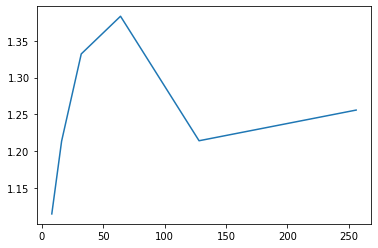

In [92]:
a = .6
b = .4
Jx, Jy, Jz = get_xyz(a, b, biased=False)

L = 2 # for reducing computation

chi_list = [int(2 ** n) for n in np.arange(3, 9, 1)]
S_list = []

psi = None
for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))
    
plt.plot(chi_list, S_list)

The efficiency is unbearably low.

Let's lower the criteria for entropy convergence.

Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751226796139566, S = nan, norm_err = 3.4e-08
Current memory usage 533.2 MB, time elapsed: 6.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6382e-04, max_E_trunc = 3.9980e-05
MPS bond dimensions: [8, 8, 8, 8, 8, 8, 8, 8]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751226582005255, S = nan, norm_err = 9.1e-09
Current memory usage 533.2 MB, time elapsed: 12.2 s
Delta E = 1.0707e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6444e-04, ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751335650086395, S = nan, norm_err = 7.5e-04
Current memory usage 533.2 MB, time elapsed: 17.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0100e-04, max_E_trunc = 2.6764e-05
MPS bond dimensions: [10, 10, 10, 10, 10, 10, 10, 10]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751428566214472, S = nan, norm_err = 2.6e-04
Current memory usage 533.2 MB, time elapsed: 24.8 s
Delta E = -4.6458e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.62

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751458697693570, S = nan, norm_err = 4.4e-05
Current memory usage 533.2 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6449e-06, max_E_trunc = 2.0998e-06
MPS bond dimensions: [12, 12, 12, 12, 12, 12, 12, 12]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751458856549316, S = nan, norm_err = 3.4e-06
Current memory usage 533.2 MB, time elapsed: 25.1 s
Delta E = -7.9428e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.153

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751465432629521, S = nan, norm_err = 9.3e-05
Current memory usage 533.2 MB, time elapsed: 18.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2876e-06, max_E_trunc = 3.7002e-07
MPS bond dimensions: [14, 14, 14, 14, 14, 14, 14, 14]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751465639298354, S = nan, norm_err = 1.8e-05
Current memory usage 533.2 MB, time elapsed: 25.7 s
Delta E = -1.0333e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.773

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751467241556103, S = nan, norm_err = 1.6e-04
Current memory usage 533.2 MB, time elapsed: 18.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0749e-06, max_E_trunc = 3.5712e-07
MPS bond dimensions: [16, 16, 16, 16, 16, 16, 16, 16]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751467504290257, S = nan, norm_err = 2.9e-05
Current memory usage 533.2 MB, time elapsed: 25.8 s
Delta E = -1.3137e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.751

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751468453359818, S = nan, norm_err = 2.1e-04
Current memory usage 533.2 MB, time elapsed: 18.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3419e-07, max_E_trunc = 1.6174e-07
MPS bond dimensions: [18, 18, 18, 18, 18, 18, 18, 18]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751468990070983, S = nan, norm_err = 6.3e-05
Current memory usage 533.2 MB, time elapsed: 26.2 s
Delta E = -2.6836e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.32

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751469554807871, S = nan, norm_err = 3.4e-04
Current memory usage 533.2 MB, time elapsed: 18.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5862e-07, max_E_trunc = 4.8241e-08
MPS bond dimensions: [20, 20, 20, 20, 20, 20, 20, 20]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751470130584515, S = nan, norm_err = 1.6e-04
Current memory usage 533.2 MB, time elapsed: 26.4 s
Delta E = -2.8789e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.99

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751469910598219, S = nan, norm_err = 4.0e-04
Current memory usage 533.2 MB, time elapsed: 18.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5840e-08, max_E_trunc = 1.9694e-08
MPS bond dimensions: [22, 22, 22, 22, 22, 22, 22, 22]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751470679876238, S = nan, norm_err = 1.8e-04
Current memory usage 533.2 MB, time elapsed: 27.1 s
Delta E = -3.8464e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


........
Updating environment
..........
DMRG finished after 80 sweeps.
total size = 2408, maximum chi = 22
Before the canonicalization:
Bond dim =  [22, 22, 22, 22, 22, 22, 22, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000030616332+2.784908805300579e-16j)
After the canonicalization:
Bond dim =  [22, 22, 22, 22, 22, 22, 22, 22]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  24 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updat

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470063435784, S = nan, norm_err = 4.5e-04
Current memory usage 533.2 MB, time elapsed: 18.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3642e-08, max_E_trunc = 1.5271e-08
MPS bond dimensions: [24, 24, 24, 24, 24, 24, 24, 24]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751470815954480, S = nan, norm_err = 2.1e-04
Current memory usage 533.2 MB, time elapsed: 27.5 s
Delta E = -3.7626e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.05

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


........
Updating environment
..........
Updating environment
..........
DMRG finished after 80 sweeps.
total size = 2568, maximum chi = 24
Before the canonicalization:
Bond dim =  [24, 24, 24, 24, 24, 24, 24, 24]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000019589734-2.7842311789427754e-16j)
After the canonicalization:
Bond dim =  [24, 24, 24, 24, 24, 24, 24, 24]
Computing properties
Optimizing
Loop for chi=24 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  26 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 f

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470157947658, S = nan, norm_err = 4.8e-04
Current memory usage 533.2 MB, time elapsed: 19.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2212e-08, max_E_trunc = 1.1289e-08
MPS bond dimensions: [26, 26, 26, 26, 26, 26, 26, 26]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751470992661574, S = nan, norm_err = 2.7e-04
Current memory usage 533.2 MB, time elapsed: 28.0 s
Delta E = -4.1736e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.00

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


........
Updating environment
..........
Updating environment
..........
Updating environment
..........
DMRG finished after 80 sweeps.
total size = 2728, maximum chi = 26
Before the canonicalization:
Bond dim =  [26, 26, 26, 26, 26, 26, 26, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000024133635+9.276433787785976e-16j)
After the canonicalization:
Bond dim =  [26, 26, 26, 26, 26, 26, 26, 26]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial swe

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470272150838, S = nan, norm_err = 5.3e-04
Current memory usage 533.2 MB, time elapsed: 19.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1483e-08, max_E_trunc = 4.0982e-09
MPS bond dimensions: [28, 28, 28, 28, 28, 28, 28, 28]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751471123619485, S = nan, norm_err = 3.0e-04
Current memory usage 533.2 MB, time elapsed: 28.2 s
Delta E = -4.2573e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.85

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


........
Updating environment
..........
Updating environment
..........
Updating environment
..........
DMRG finished after 80 sweeps.
total size = 2728, maximum chi = 28
Before the canonicalization:
Bond dim =  [28, 28, 28, 28, 28, 28, 28, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000040352444+6.700369425960417e-17j)
After the canonicalization:
Bond dim =  [28, 28, 28, 28, 28, 28, 28, 28]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial swe

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470312053493, S = nan, norm_err = 5.4e-04
Current memory usage 533.2 MB, time elapsed: 19.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.0775e-09, max_E_trunc = 1.9856e-09
MPS bond dimensions: [30, 30, 30, 30, 30, 30, 30, 30]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751471177366074, S = nan, norm_err = 3.2e-04
Current memory usage 533.2 MB, time elapsed: 28.6 s
Delta E = -4.3266e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.99

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.........
Updating environment
..........
Updating environment
..........
Updating environment
..........
Updating environment
..........
DMRG finished after 80 sweeps.
total size = 2888, maximum chi = 30
Before the canonicalization:
Bond dim =  [30, 30, 30, 30, 30, 30, 30, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000068774297-4.401860820291148e-17j)
After the canonicalization:
Bond dim =  [30, 30, 30, 30, 30, 30, 30, 30]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for con

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470358731718, S = nan, norm_err = 5.8e-04
Current memory usage 533.2 MB, time elapsed: 19.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9991e-09, max_E_trunc = 1.0522e-09
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751471223896134, S = nan, norm_err = 3.4e-04
Current memory usage 533.2 MB, time elapsed: 29.5 s
Delta E = -4.3258e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.75

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


........
Updating environment
..........
Updating environment
..........
Updating environment
..........
Updating environment
..........
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.47e-05
Call psi.canonical_form()
DMRG finished after 80 sweeps.
total size = 2888, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999938-1.975416358268589e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  34 


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470385361355, S = nan, norm_err = 5.9e-04
Current memory usage 533.2 MB, time elapsed: 19.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2279e-09, max_E_trunc = 7.5020e-10
MPS bond dimensions: [34, 34, 34, 34, 34, 34, 34, 34]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751471255515783, S = nan, norm_err = 3.5e-04
Current memory usage 533.2 MB, time elapsed: 29.8 s
Delta E = -4.3508e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.13

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


........
Updating environment
..........
Updating environment
..........
Updating environment
..........
Updating environment
..........
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.26e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 80 sweeps.
total size = 2888, maximum chi = 34
Before the canonicalization:
Bond dim =  [33, 34, 32, 34, 33, 34, 34, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001+3.616898447411643e-16j)
After the canonicalization:
Bond dim =  [33, 34, 32, 34, 33, 34, 34, 34]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470405443753, S = nan, norm_err = 6.1e-04
Current memory usage 533.2 MB, time elapsed: 19.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4968e-09, max_E_trunc = 5.1737e-10
MPS bond dimensions: [36, 36, 36, 36, 36, 36, 36, 36]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751471268259198, S = nan, norm_err = 3.6e-04
Current memory usage 533.2 MB, time elapsed: 29.6 s
Delta E = -4.3141e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.85

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


........
Updating environment
..........
Updating environment
..........
Updating environment
..........
Updating environment
..........
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.16e-05
Call psi.canonical_form()
DMRG finished after 80 sweeps.
total size = 2888, maximum chi = 36
Before the canonicalization:
Bond dim =  [36, 36, 36, 36, 36, 36, 36, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000002-4.79217360238593e-16j)
After the canonicalization:
Bond dim =  [36, 36, 36, 36, 36, 36, 36, 36]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  38 



/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470425454701, S = nan, norm_err = 6.0e-04
Current memory usage 533.2 MB, time elapsed: 19.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0496e-09, max_E_trunc = 3.2344e-10
MPS bond dimensions: [38, 38, 38, 38, 38, 38, 38, 38]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751471280730129, S = nan, norm_err = 3.8e-04
Current memory usage 533.2 MB, time elapsed: 29.6 s
Delta E = -4.2764e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.33

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.........
Updating environment
..........
Updating environment
..........
Updating environment
..........
Updating environment
..........
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.10e-05
Call psi.canonical_form()
DMRG finished after 80 sweeps.
total size = 2888, maximum chi = 38
Before the canonicalization:
Bond dim =  [38, 38, 38, 38, 38, 38, 38, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999987-5.666040553409246e-16j)
After the canonicalization:
Bond dim =  [38, 38, 38, 38, 38, 38, 38, 38]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  40 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470426702596, S = nan, norm_err = 6.2e-04
Current memory usage 533.2 MB, time elapsed: 19.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6602e-10, max_E_trunc = 2.6039e-10
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751471286549945, S = nan, norm_err = 3.7e-04
Current memory usage 533.2 MB, time elapsed: 29.9 s
Delta E = -4.2992e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.74

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.........
Updating environment
..........
Updating environment
..........
Updating environment
..........
Updating environment
..........
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.99e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 100 sweeps.
total size = 3368, maximum chi = 40
Before the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 39, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999967+5.816744655384731e-16j)
After the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 39, 40]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470450593503, S = nan, norm_err = 6.3e-04
Current memory usage 533.2 MB, time elapsed: 20.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9397e-10, max_E_trunc = 1.2984e-10
MPS bond dimensions: [42, 42, 42, 42, 42, 42, 42, 42]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751471297090589, S = nan, norm_err = 3.8e-04
Current memory usage 533.2 MB, time elapsed: 31.1 s
Delta E = -4.2325e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.80

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.........
Updating environment
..........
Updating environment
..........
Updating environment
..........
Updating environment
..........
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.23e-05
Call psi.canonical_form()
DMRG finished after 100 sweeps.
total size = 3368, maximum chi = 42
Before the canonicalization:
Bond dim =  [42, 42, 42, 42, 42, 42, 42, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000013+1.4354836763708079e-16j)
After the canonicalization:
Bond dim =  [42, 42, 42, 42, 42, 42, 42, 42]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  4

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470471550930, S = nan, norm_err = 6.7e-04
Current memory usage 533.2 MB, time elapsed: 19.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3917e-10, max_E_trunc = 8.5784e-11
MPS bond dimensions: [44, 44, 44, 44, 44, 44, 44, 44]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751471304336313, S = nan, norm_err = 4.0e-04
Current memory usage 533.2 MB, time elapsed: 31.3 s
Delta E = -4.1639e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.10

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.........
Updating environment
..........
Updating environment
..........
Updating environment
..........
Updating environment
..........
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.69e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 100 sweeps.
total size = 3368, maximum chi = 44
Before the canonicalization:
Bond dim =  [43, 44, 43, 44, 43, 44, 43, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999964-3.935653886122381e-17j)
After the canonicalization:
Bond dim =  [43, 44, 43, 44, 43, 44, 43, 44]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470476033975, S = nan, norm_err = 6.7e-04
Current memory usage 533.2 MB, time elapsed: 18.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5597e-10, max_E_trunc = 5.6090e-11
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751471308408522, S = nan, norm_err = 4.0e-04
Current memory usage 533.2 MB, time elapsed: 30.3 s
Delta E = -4.1619e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.39

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.........
Updating environment
..........
Updating environment
..........
Updating environment
..........
Updating environment
..........
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.34e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 100 sweeps.
total size = 3368, maximum chi = 46
Before the canonicalization:
Bond dim =  [44, 46, 44, 46, 44, 46, 44, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000049+5.580388581782891e-16j)
After the canonicalization:
Bond dim =  [44, 46, 44, 46, 44, 46, 44, 46]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470478014196, S = nan, norm_err = 6.7e-04
Current memory usage 533.2 MB, time elapsed: 18.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0100e-10, max_E_trunc = 4.0060e-11
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751471311071921, S = nan, norm_err = 4.1e-04
Current memory usage 533.2 MB, time elapsed: 30.1 s
Delta E = -4.1653e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.92

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.........
Updating environment
..........
Updating environment
..........
Updating environment
..........
Updating environment
..........
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.35e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 100 sweeps.
total size = 3368, maximum chi = 48
Before the canonicalization:
Bond dim =  [48, 48, 48, 48, 48, 48, 47, 48]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000118-2.6459954019508736e-16j)
After the canonicalization:
Bond dim =  [48, 48, 48, 48, 48, 48, 47, 48]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470475492111, S = nan, norm_err = 6.7e-04
Current memory usage 533.2 MB, time elapsed: 18.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6531e-11, max_E_trunc = 2.9019e-11
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751471311563705, S = nan, norm_err = 4.0e-04
Current memory usage 533.2 MB, time elapsed: 30.8 s
Delta E = -4.1804e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.45

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.........
Updating environment
..........
Updating environment
..........
Updating environment
..........
Updating environment
..........
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.40e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 100 sweeps.
total size = 3368, maximum chi = 50
Before the canonicalization:
Bond dim =  [50, 50, 50, 50, 50, 50, 48, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000004-2.0556473190325164e-16j)
After the canonicalization:
Bond dim =  [50, 50, 50, 50, 50, 50, 48, 50]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470483800500, S = nan, norm_err = 6.7e-04
Current memory usage 533.2 MB, time elapsed: 18.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7717e-11, max_E_trunc = 2.0471e-11
MPS bond dimensions: [52, 52, 52, 52, 52, 52, 52, 52]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751471314243464, S = nan, norm_err = 4.1e-04
Current memory usage 533.2 MB, time elapsed: 30.4 s
Delta E = -4.1522e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.41

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.........
Updating environment
..........
Updating environment
..........
Updating environment
..........
Updating environment
..........
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.61e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 100 sweeps.
total size = 3368, maximum chi = 52
Before the canonicalization:
Bond dim =  [51, 52, 51, 52, 51, 52, 50, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000003+2.1303556249803457e-16j)
After the canonicalization:
Bond dim =  [51, 52, 51, 52, 51, 52, 50, 52]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470489044972, S = nan, norm_err = 6.8e-04
Current memory usage 533.2 MB, time elapsed: 18.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8965e-11, max_E_trunc = 1.3209e-11
MPS bond dimensions: [54, 54, 54, 54, 54, 54, 54, 54]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751471316340790, S = nan, norm_err = 4.1e-04
Current memory usage 533.2 MB, time elapsed: 31.8 s
Delta E = -4.1365e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.41

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.........
Updating environment
..........
Updating environment
..........
Updating environment
..........
Updating environment
..........
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 6.24e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 100 sweeps.
total size = 3368, maximum chi = 54
Before the canonicalization:
Bond dim =  [53, 54, 52, 54, 53, 54, 52, 54]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999984-9.510621457042845e-16j)
After the canonicalization:
Bond dim =  [53, 54, 52, 54, 53, 54, 52, 54]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470490577963, S = nan, norm_err = 6.8e-04
Current memory usage 533.2 MB, time elapsed: 18.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4570e-11, max_E_trunc = 9.0026e-12
MPS bond dimensions: [56, 56, 56, 56, 56, 56, 56, 56]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751471317256778, S = nan, norm_err = 4.2e-04
Current memory usage 533.2 MB, time elapsed: 32.1 s
Delta E = -4.1334e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.03

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.........
Updating environment
..........
Updating environment
..........
Updating environment
..........
Updating environment
..........
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 6.42e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 100 sweeps.
total size = 3368, maximum chi = 56
Before the canonicalization:
Bond dim =  [54, 56, 54, 56, 54, 56, 54, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000064+4.0332320816460765e-17j)
After the canonicalization:
Bond dim =  [54, 56, 54, 56, 54, 56, 54, 56]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=20 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..........
sweep 20, age = 648
Energy = -0.0751470493186681, S = nan, norm_err = 6.9e-04
Current memory usage 533.2 MB, time elapsed: 19.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0245e-11, max_E_trunc = 9.0381e-12
MPS bond dimensions: [58, 58, 58, 58, 58, 58, 58, 58]
Updating environment
..........
sweep 40, age = 1128
Energy = -0.0751471318648491, S = nan, norm_err = 4.3e-04
Current memory usage 533.2 MB, time elapsed: 32.6 s
Delta E = -4.1273e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.32

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.........
Updating environment
..........
Updating environment
..........
Updating environment
..........
Updating environment
..........
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 6.44e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 100 sweeps.
total size = 3368, maximum chi = 58
Before the canonicalization:
Bond dim =  [56, 58, 56, 58, 56, 58, 56, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999989+1.1324491691611094e-16j)
After the canonicalization:
Bond dim =  [56, 58, 56, 58, 56, 58, 56, 58]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================


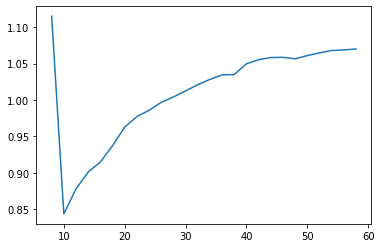

In [96]:
a = .6
b = .4
Jx, Jy, Jz = get_xyz(a, b, biased=False)

max_S_err=1e-3

L = 2 # for reducing computation

N_sweeps_check=20
max_sweeps=1000
verbose=1

chi_list = [int(n) for n in np.arange(8, 60, 2)]
S_list = []

psi = None
for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        max_S_err=max_S_err,
        chi = chi,
        initial_psi=psi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))
    
plt.plot(chi_list, S_list)

In [117]:
a_list = np.arange(0, 1.1, 0.1)
b_list = np.arange(0, 1.1, 0.1)
chi_list = [int(n) for n in np.arange(8, 60, 2)]


max_S_err=1e-3

L = 2 # for reducing computation

N_sweeps_check=5
max_sweeps=1000
verbose=1




for a in a_list:
    for b in b_list:
        Jx, Jy, Jz = get_xyz(a, b, biased=False)
        for chi in chi_list:
            if (a, b, chi) in S_dict:
                print(f"({a}, {b}, {chi}) has already been calculated!")
                pass
            else:
                data = run_atomic(
                    Jx = Jx,
                    Jy = Jy,
                    Jz = Jz,
                    L = L,
                    max_S_err=max_S_err,
                    chi = chi,
                    initial_psi=psi,
                    N_sweeps_check=N_sweeps_check, 
                    max_sweeps=max_sweeps, 
                    verbose=verbose,
                )
                psi = data['psi']
                S_dict[(a, b, chi)] = float(np.mean(psi.entanglement_entropy()))
                xi_dict[(a, b, chi)] = float(psi.correlation_length())
                pass

(0.0, 0.0, 8) has already been calculated!
(0.0, 0.0, 10) has already been calculated!
(0.0, 0.0, 12) has already been calculated!
(0.0, 0.0, 14) has already been calculated!
(0.0, 0.0, 16) has already been calculated!
(0.0, 0.0, 18) has already been calculated!
(0.0, 0.0, 20) has already been calculated!
(0.0, 0.0, 22) has already been calculated!
(0.0, 0.0, 24) has already been calculated!
(0.0, 0.0, 26) has already been calculated!
(0.0, 0.0, 28) has already been calculated!
(0.0, 0.0, 30) has already been calculated!
(0.0, 0.0, 32) has already been calculated!
(0.0, 0.0, 34) has already been calculated!
(0.0, 0.0, 36) has already been calculated!
(0.0, 0.0, 38) has already been calculated!
(0.0, 0.0, 40) has already been calculated!
(0.0, 0.0, 42) has already been calculated!
(0.0, 0.0, 44) has already been calculated!
(0.0, 0.0, 46) has already been calculated!
(0.0, 0.0, 48) has already been calculated!
(0.0, 0.0, 50) has already been calculated!
(0.0, 0.0, 52) has already been c

..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0794902278484440, S = nan, norm_err = 6.3e-04
Current memory usage 533.2 MB, time elapsed: 1.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5262e-04, max_E_trunc = 1.1904e-04
MPS bond dimensions: [8, 8, 8, 8, 8, 8, 8, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.0794908272093138, S = nan, norm_err = 1.7e-04
Current memory usage 533.2 MB, time elapsed: 3.0 s
Delta E = -1.1987e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4801e-04, max_E_trunc = 1.1892e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
DMRG finished after 20 sweeps.
total size = 680, maximum chi = 8
Before the canonicalization:
Bond dim =  [8, 8, 8, 8, 8, 8, 8, 8]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000076759+4.802588484586075e-16j)
After the canonicalization:
Bond dim =  [8, 8, 8, 8, 8, 8, 8, 8]
Computing properties
Optimizing
Loop for chi=8 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  10 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795336483059224, S = nan, norm_err = 1.7e-04
Current memory usage 533.2 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2395e-04, max_E_trunc = 6.7150e-05
MPS bond dimensions: [10, 10, 10, 10, 10, 10, 10, 10]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795339181538064, S = nan, norm_err = 2.2e-04
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = -5.3970e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3847e-04, max_E_trunc 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
DMRG finished after 25 sweeps.
total size = 792, maximum chi = 10
Before the canonicalization:
Bond dim =  [10, 10, 10, 10, 10, 10, 10, 10]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000001658782+5.118052682375325e-16j)
After the canonicalization:
Bond dim =  [10, 10, 10, 10, 10, 10, 10, 10]
Computing properties
Optimizing
Loop for chi=10 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  12 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
...

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795623598745225, S = nan, norm_err = 1.7e-03
Current memory usage 533.2 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0510e-05, max_E_trunc = 4.8498e-06
MPS bond dimensions: [12, 12, 12, 12, 12, 12, 12, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795636402930311, S = nan, norm_err = 4.3e-04
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = -2.5608e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7462e-05, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


The norm is:  1.0
The overlap is:  (1.00000000003207-2.7443209406136875e-16j)
After the canonicalization:
Bond dim =  [12, 12, 12, 12, 12, 12, 12, 12]
Computing properties
Optimizing
Loop for chi=12 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  14 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
...

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795655332684890, S = nan, norm_err = 1.9e-03
Current memory usage 533.2 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6323e-05, max_E_trunc = 6.9721e-06
MPS bond dimensions: [14, 14, 14, 13, 14, 14, 14, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795665932668239, S = nan, norm_err = 5.4e-04
Current memory usage 533.2 MB, time elapsed: 5.4 s
Delta E = -2.1200e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1694e-05, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
DMRG finished after 20 sweeps.
total size = 680, maximum chi = 14
Before the canonicalization:
Bond dim =  [14, 14, 14, 14, 14, 14, 14, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000002626745-7.146368585918698e-17j)
After the canonicalization:
Bond dim =  [14, 14, 14, 14, 14, 14, 14, 14]
Computing properties
Optimizing
Loop for chi=14 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  16 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
...

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795673551503264, S = nan, norm_err = 2.2e-03
Current memory usage 533.2 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1066e-05, max_E_trunc = 5.3399e-06
MPS bond dimensions: [16, 16, 16, 16, 16, 16, 16, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795685056920001, S = nan, norm_err = 9.5e-04
Current memory usage 533.2 MB, time elapsed: 5.3 s
Delta E = -2.3011e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4744e-05, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
DMRG finished after 20 sweeps.
total size = 744, maximum chi = 16
Before the canonicalization:
Bond dim =  [16, 16, 16, 16, 16, 16, 16, 16]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000181315+8.693209979872966e-17j)
After the canonicalization:
Bond dim =  [16, 16, 16, 16, 16, 16, 16, 16]
Computing properties
Optimizing
Loop for chi=16 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  18 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEng

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795687043571238, S = nan, norm_err = 2.3e-03
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.1967e-06, max_E_trunc = 3.7141e-06
MPS bond dimensions: [18, 18, 18, 18, 18, 18, 18, 18]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795700587583703, S = nan, norm_err = 8.7e-04
Current memory usage 533.2 MB, time elapsed: 5.5 s
Delta E = -2.7088e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1814e-05, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
DMRG finished after 25 sweeps.
total size = 824, maximum chi = 18
Before the canonicalization:
Bond dim =  [18, 18, 18, 18, 18, 18, 18, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000966858+1.5767352034649159e-16j)
After the canonicalization:
Bond dim =  [18, 18, 18, 18, 18, 18, 18, 18]
Computing properties
Optimizing
Loop for chi=18 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  20 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environme

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795703233870282, S = nan, norm_err = 3.0e-03
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.6247e-06, max_E_trunc = 2.8662e-06
MPS bond dimensions: [20, 20, 20, 20, 20, 20, 20, 20]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795720386609533, S = nan, norm_err = 1.3e-03
Current memory usage 533.2 MB, time elapsed: 5.7 s
Delta E = -3.4305e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0842e-05, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
DMRG finished after 25 sweeps.
total size = 856, maximum chi = 20
Before the canonicalization:
Bond dim =  [20, 20, 20, 20, 20, 20, 20, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000267141-1.3252645392963137e-16j)
After the canonicalization:
Bond dim =  [20, 20, 20, 20, 20, 20, 20, 20]
Computing properties
Optimizing
Loop for chi=20 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEn

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795715358248981, S = nan, norm_err = 3.5e-03
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2626e-06, max_E_trunc = 1.2420e-06
MPS bond dimensions: [22, 22, 22, 22, 22, 22, 22, 22]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795734028675823, S = nan, norm_err = 1.6e-03
Current memory usage 533.2 MB, time elapsed: 5.8 s
Delta E = -3.7341e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2958e-06, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG finished after 30 sweeps.
total size = 1000, maximum chi = 22
Before the canonicalization:
Bond dim =  [22, 22, 22, 22, 22, 22, 22, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000558621-2.107721572206029e-16j)
After the canonicalization:
Bond dim =  [22, 22, 22, 22, 22, 22, 22, 22]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  24 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795725207308702, S = nan, norm_err = 3.9e-03
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7670e-07, max_E_trunc = 2.0797e-07
MPS bond dimensions: [24, 24, 24, 24, 24, 24, 24, 24]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795746718803887, S = nan, norm_err = 2.0e-03
Current memory usage 533.2 MB, time elapsed: 5.6 s
Delta E = -4.3023e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3408e-06, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.87e-05
Call psi.canonical_form()
DMRG finished after 30 sweeps.
total size = 1000, maximum chi = 24
Before the canonicalization:
Bond dim =  [24, 24, 24, 24, 24, 24, 24, 24]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996+3.7381712770768534e-17j)
After the canonicalization:
Bond dim =  [24, 24, 24, 24, 24, 24, 24, 24]
Computing properties
Optimizing
Loop for chi=24 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  26 

Subconfig 'trunc_params'=Config(name='

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795727865054303, S = nan, norm_err = 3.8e-03
Current memory usage 533.2 MB, time elapsed: 3.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7894e-07, max_E_trunc = 1.7994e-07
MPS bond dimensions: [26, 26, 26, 26, 26, 26, 26, 26]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795749135054726, S = nan, norm_err = 2.1e-03
Current memory usage 533.2 MB, time elapsed: 5.8 s
Delta E = -4.2540e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2880e-06, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.13e-01
Call psi.canonical_form()
DMRG finished after 25 sweeps.
total size = 888, maximum chi = 26
Before the canonicalization:
Bond dim =  [26, 26, 26, 26, 26, 26, 26, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000004-9.107298248878237e-17j)
After the canonicalization:
Bond dim =  [26, 26, 26, 26, 26, 26, 26, 26]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795704408983215, S = nan, norm_err = 3.9e-03
Current memory usage 533.2 MB, time elapsed: 4.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8158e-06, max_E_trunc = 7.7037e-07
MPS bond dimensions: [28, 28, 28, 28, 28, 28, 28, 28]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795736820050013, S = nan, norm_err = 1.7e-03
Current memory usage 533.2 MB, time elapsed: 6.8 s
Delta E = -6.4822e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.0777e-06, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG finished after 30 sweeps.
total size = 1000, maximum chi = 28
Before the canonicalization:
Bond dim =  [28, 28, 28, 28, 28, 28, 28, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.00000000048902+1.764795068799259e-16j)
After the canonicalization:
Bond dim =  [28, 28, 28, 28, 28, 28, 28, 28]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 f

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795713979788706, S = nan, norm_err = 5.0e-03
Current memory usage 533.2 MB, time elapsed: 3.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4764e-07, max_E_trunc = 1.3228e-07
MPS bond dimensions: [30, 30, 30, 30, 30, 30, 30, 30]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795749364058385, S = nan, norm_err = 2.7e-03
Current memory usage 533.2 MB, time elapsed: 6.1 s
Delta E = -7.0769e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0441e-06, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.74e-05
Call psi.canonical_form()
DMRG finished after 35 sweeps.
total size = 1112, maximum chi = 30
Before the canonicalization:
Bond dim =  [30, 30, 30, 30, 30, 30, 30, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999964-4.909268144253788e-16j)
After the canonicalization:
Bond dim =  [30, 30, 30, 30, 30, 30, 30, 30]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config=

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795716263020703, S = nan, norm_err = 4.0e-03
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8658e-07, max_E_trunc = 2.0326e-07
MPS bond dimensions: [31, 32, 32, 32, 32, 32, 32, 32]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795752554584404, S = nan, norm_err = 2.3e-03
Current memory usage 533.2 MB, time elapsed: 6.1 s
Delta E = -7.2583e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4079e-06, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.17e-05
Call psi.canonical_form()
DMRG finished after 35 sweeps.
total size = 1112, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018+1.78858392708435e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795717932268623, S = nan, norm_err = 4.0e-03
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2411e-07, max_E_trunc = 1.7066e-07
MPS bond dimensions: [34, 34, 34, 34, 34, 34, 34, 34]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795753623211819, S = nan, norm_err = 2.5e-03
Current memory usage 533.2 MB, time elapsed: 6.4 s
Delta E = -7.1382e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2528e-06, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))



..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.52e-05
Call psi.canonical_form()
DMRG finished after 40 sweeps.
total size = 1224, maximum chi = 34
Before the canonicalization:
Bond dim =  [34, 34, 34, 34, 34, 34, 34, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027+2.972028923827256e-16j)
After the canonicalization:
Bond dim =  [34, 34, 34, 34, 34, 34, 34, 34]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795697103256834, S = nan, norm_err = 4.0e-03
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6368e-07, max_E_trunc = 1.3784e-07
MPS bond dimensions: [36, 36, 36, 36, 36, 36, 36, 36]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795632577636296, S = nan, norm_err = 2.7e-03
Current memory usage 533.2 MB, time elapsed: 6.7 s
Delta E = 1.2905e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.8401e-07, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.42e-05
Call psi.canonical_form()
DMRG finished after 45 sweeps.
total size = 1336, maximum chi = 36
Before the canonicalization:
Bond dim =  [36, 36, 36, 36, 36, 36, 36, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999978+4.709950728838065e-16j)
After the canonicalization:
Bond dim =  [36, 36, 36, 36, 36, 36, 36, 36]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name=

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795721080849201, S = nan, norm_err = 4.0e-03
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9692e-07, max_E_trunc = 9.7448e-08
MPS bond dimensions: [38, 38, 38, 38, 38, 38, 38, 38]
Updating environment
..
sweep 10, age = 392
Energy = -0.0794688214610830, S = nan, norm_err = 3.5e-03
Current memory usage 533.2 MB, time elapsed: 6.8 s
Delta E = 2.0657e-05, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.2295e-07, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.08e-05
Call psi.canonical_form()
DMRG finished after 50 sweeps.
total size = 1448, maximum chi = 38
Before the canonicalization:
Bond dim =  [38, 38, 38, 38, 38, 38, 38, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000009-3.0841126149334484e-16j)
After the canonicalization:
Bond dim =  [38, 38, 38, 38, 38, 38, 38, 38]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795631577871290, S = nan, norm_err = 4.1e-03
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3872e-07, max_E_trunc = 7.4416e-08
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795755166983374, S = nan, norm_err = 2.8e-03
Current memory usage 533.2 MB, time elapsed: 6.8 s
Delta E = -2.4718e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5372e-07, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.21e-05
Call psi.canonical_form()
DMRG finished after 45 sweeps.
total size = 1336, maximum chi = 40
Before the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000007+2.390363505447486e-16j)
After the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795734128675518, S = nan, norm_err = 4.1e-03
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.8820e-08, max_E_trunc = 5.4238e-08
MPS bond dimensions: [42, 42, 42, 42, 42, 42, 42, 42]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795757773768826, S = nan, norm_err = 2.7e-03
Current memory usage 533.2 MB, time elapsed: 7.0 s
Delta E = -4.7290e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0762e-07, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.86e-05
Call psi.canonical_form()
DMRG finished after 45 sweeps.
total size = 1336, maximum chi = 42
Before the canonicalization:
Bond dim =  [42, 42, 42, 42, 42, 42, 42, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000093+8.858130313912615e-17j)
After the canonicalization:
Bond dim =  [42, 42, 42, 42, 42, 42, 42, 42]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name=

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795736118393406, S = nan, norm_err = 4.1e-03
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7603e-08, max_E_trunc = 3.4268e-08
MPS bond dimensions: [44, 44, 44, 44, 44, 44, 44, 44]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795758423958364, S = nan, norm_err = 2.7e-03
Current memory usage 533.2 MB, time elapsed: 7.0 s
Delta E = -4.4611e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8260e-07, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.42e-05
Call psi.canonical_form()
DMRG finished after 50 sweeps.
total size = 1448, maximum chi = 44
Before the canonicalization:
Bond dim =  [44, 44, 44, 44, 44, 44, 44, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000024-1.6539358722914683e-16j)
After the canonicalization:
Bond dim =  [44, 44, 44, 44, 44, 44, 44, 44]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795734948418463, S = nan, norm_err = 4.0e-03
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2874e-08, max_E_trunc = 1.7425e-08
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795602851167754, S = nan, norm_err = 2.9e-03
Current memory usage 533.2 MB, time elapsed: 6.9 s
Delta E = 2.6419e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7479e-07, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.74e-05
Call psi.canonical_form()
DMRG finished after 55 sweeps.
total size = 1560, maximum chi = 46
Before the canonicalization:
Bond dim =  [46, 46, 46, 46, 46, 46, 46, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000016-3.089777668236675e-16j)
After the canonicalization:
Bond dim =  [46, 46, 46, 46, 46, 46, 46, 46]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name=

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795698790105450, S = nan, norm_err = 3.8e-03
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6734e-08, max_E_trunc = 8.4520e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795752847700264, S = nan, norm_err = 2.8e-03
Current memory usage 533.2 MB, time elapsed: 7.4 s
Delta E = -1.0812e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.6463e-08, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.96e-05
Call psi.canonical_form()
DMRG finished after 55 sweeps.
total size = 1560, maximum chi = 48
Before the canonicalization:
Bond dim =  [48, 48, 48, 48, 48, 48, 48, 48]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999942+1.4297727069089257e-16j)
After the canonicalization:
Bond dim =  [48, 48, 48, 48, 48, 48, 48, 48]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795676891534649, S = nan, norm_err = 3.7e-03
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2217e-08, max_E_trunc = 6.3926e-09
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795753331762121, S = nan, norm_err = 2.8e-03
Current memory usage 533.2 MB, time elapsed: 7.5 s
Delta E = -1.5288e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.9870e-08, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.94e-05
Call psi.canonical_form()
DMRG finished after 60 sweeps.
total size = 1672, maximum chi = 50
Before the canonicalization:
Bond dim =  [50, 50, 50, 50, 50, 50, 50, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004+4.539645225502295e-17j)
After the canonicalization:
Bond dim =  [50, 50, 50, 50, 50, 50, 50, 50]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795633745715514, S = nan, norm_err = 3.7e-03
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0298e-08, max_E_trunc = 5.4308e-09
MPS bond dimensions: [52, 52, 52, 52, 52, 52, 52, 52]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795755366205559, S = nan, norm_err = 2.9e-03
Current memory usage 533.2 MB, time elapsed: 7.6 s
Delta E = -2.4324e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7077e-08, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.12e-05
Call psi.canonical_form()
DMRG finished after 60 sweeps.
total size = 1672, maximum chi = 52
Before the canonicalization:
Bond dim =  [52, 52, 52, 52, 52, 52, 52, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036-3.688646088348495e-16j)
After the canonicalization:
Bond dim =  [52, 52, 52, 52, 52, 52, 52, 52]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name=

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795720973221941, S = nan, norm_err = 3.9e-03
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.7687e-09, max_E_trunc = 4.7880e-09
MPS bond dimensions: [54, 54, 54, 54, 54, 54, 54, 54]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795751150501935, S = nan, norm_err = 2.9e-03
Current memory usage 533.2 MB, time elapsed: 7.7 s
Delta E = -6.0355e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.8443e-08, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.54e-05
Call psi.canonical_form()
DMRG finished after 60 sweeps.
total size = 1672, maximum chi = 54
Before the canonicalization:
Bond dim =  [54, 54, 54, 54, 54, 54, 54, 54]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999973+4.448795647953351e-16j)
After the canonicalization:
Bond dim =  [54, 54, 54, 54, 54, 54, 54, 54]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name=

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795738261639738, S = nan, norm_err = 3.9e-03
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1109e-09, max_E_trunc = 3.9664e-09
MPS bond dimensions: [56, 56, 56, 56, 55, 56, 56, 56]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795608531400855, S = nan, norm_err = 3.1e-03
Current memory usage 533.2 MB, time elapsed: 7.9 s
Delta E = 2.5946e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4374e-08, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 9.84e-05
Call psi.canonical_form()
DMRG finished after 65 sweeps.
total size = 1784, maximum chi = 56
Before the canonicalization:
Bond dim =  [56, 56, 56, 56, 56, 56, 56, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000016+2.5587733699190713e-16j)
After the canonicalization:
Bond dim =  [56, 56, 56, 56, 56, 56, 56, 56]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795714038624831, S = nan, norm_err = 3.8e-03
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2973e-09, max_E_trunc = 3.4597e-09
MPS bond dimensions: [58, 58, 58, 58, 57, 58, 58, 58]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795747305304930, S = nan, norm_err = 2.9e-03
Current memory usage 533.2 MB, time elapsed: 7.9 s
Delta E = -6.6533e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1516e-08, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 9.77e-05
Call psi.canonical_form()
DMRG finished after 65 sweeps.
total size = 1784, maximum chi = 58
Before the canonicalization:
Bond dim =  [58, 58, 58, 58, 58, 58, 58, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1+9.330552678034226e-17j)
After the canonicalization:
Bond dim =  [58, 58, 58, 58, 58, 58, 58, 58]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
(0.1, 0.0, 8) has already been calculated!
(0.1, 0.0, 10) has already been calculated!
(0.1, 0.0, 12) has already been calculated!
(0.1, 0.0, 14) has already been calculated!
(0.1, 0.0, 16) has already been calculated!
(0.1, 0.0, 18) has already been calculated!
(0.1, 0.0, 20) has already been calculated!
(0.1, 0.0, 22) has already been calculated!
(0.1, 0.0, 24) has

..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808256313805888, S = nan, norm_err = 5.9e-03
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2311e-04, max_E_trunc = 4.6498e-05
MPS bond dimensions: [8, 8, 8, 8, 8, 8, 8, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808295925862816, S = nan, norm_err = 4.8e-04
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = -7.9224e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4736e-07, max_E_trunc = 4.5018e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808452612230606, S = nan, norm_err = 1.3e-06
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2922e-06, max_E_trunc = 6.2456e-07
MPS bond dimensions: [10, 10, 10, 10, 10, 10, 10, 10]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808452627468104, S = nan, norm_err = 2.1e-07
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -3.0475e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2070e-06, max_E_trunc 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808499952330415, S = nan, norm_err = 5.9e-06
Current memory usage 533.2 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5432e-06, max_E_trunc = 5.2839e-07
MPS bond dimensions: [12, 12, 12, 12, 12, 12, 12, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808499951674169, S = nan, norm_err = 2.9e-07
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = 1.3125e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0492e-06, max_E_trunc = 3

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501249986073, S = nan, norm_err = 3.3e-06
Current memory usage 533.2 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7547e-07, max_E_trunc = 1.3783e-07
MPS bond dimensions: [14, 14, 14, 14, 14, 14, 14, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501252176248, S = nan, norm_err = 2.3e-07
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = -4.3803e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7763e-07, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501510360986, S = nan, norm_err = 5.0e-06
Current memory usage 533.2 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8449e-07, max_E_trunc = 1.4614e-07
MPS bond dimensions: [16, 16, 16, 16, 16, 16, 16, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501510987392, S = nan, norm_err = 1.5e-06
Current memory usage 533.2 MB, time elapsed: 4.8 s
Delta E = -1.2528e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9306e-07, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501758600686, S = nan, norm_err = 5.2e-06
Current memory usage 533.2 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2495e-07, max_E_trunc = 6.8400e-08
MPS bond dimensions: [18, 18, 18, 17, 18, 18, 18, 18]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501760745310, S = nan, norm_err = 1.7e-07
Current memory usage 533.2 MB, time elapsed: 4.8 s
Delta E = -4.2892e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2750e-07, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501906966854, S = nan, norm_err = 6.3e-06
Current memory usage 533.2 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6061e-08, max_E_trunc = 2.0676e-08
MPS bond dimensions: [20, 20, 19, 20, 20, 20, 20, 19]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501908420984, S = nan, norm_err = 1.8e-07
Current memory usage 533.2 MB, time elapsed: 4.8 s
Delta E = -2.9083e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6644e-08, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501942003717, S = nan, norm_err = 6.5e-06
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8296e-08, max_E_trunc = 8.5664e-09
MPS bond dimensions: [22, 22, 22, 21, 22, 22, 22, 22]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501943267854, S = nan, norm_err = 3.0e-07
Current memory usage 533.2 MB, time elapsed: 5.0 s
Delta E = -2.5283e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8695e-08, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501959663226, S = nan, norm_err = 6.9e-06
Current memory usage 533.2 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.4697e-09, max_E_trunc = 3.5797e-09
MPS bond dimensions: [23, 24, 24, 22, 24, 24, 23, 21]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501961194055, S = nan, norm_err = 2.8e-08
Current memory usage 533.2 MB, time elapsed: 5.0 s
Delta E = -3.0617e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.8274e-09, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501967158466, S = nan, norm_err = 7.0e-06
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9762e-09, max_E_trunc = 1.4160e-09
MPS bond dimensions: [26, 26, 26, 24, 26, 26, 26, 24]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501967820023, S = nan, norm_err = 2.1e-08
Current memory usage 533.2 MB, time elapsed: 5.0 s
Delta E = -1.3231e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1035e-09, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501968588384, S = nan, norm_err = 7.0e-06
Current memory usage 533.2 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7711e-09, max_E_trunc = 1.4583e-09
MPS bond dimensions: [28, 28, 28, 26, 28, 28, 28, 27]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501969347311, S = nan, norm_err = 1.7e-08
Current memory usage 533.2 MB, time elapsed: 5.3 s
Delta E = -1.5179e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5593e-09, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808492296957442, S = nan, norm_err = 1.0e-05
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8236e-09, max_E_trunc = 1.2843e-09
MPS bond dimensions: [30, 30, 30, 27, 30, 30, 30, 27]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501970789832, S = nan, norm_err = 3.1e-07
Current memory usage 533.2 MB, time elapsed: 5.3 s
Delta E = -1.9348e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0812e-09, max_E_trunc 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808497172148457, S = nan, norm_err = 1.1e-05
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0318e-09, max_E_trunc = 8.5538e-10
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 30]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501972006479, S = nan, norm_err = 2.3e-07
Current memory usage 533.2 MB, time elapsed: 5.5 s
Delta E = -9.5997e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2724e-09, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501972755695, S = nan, norm_err = 7.3e-06
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1079e-10, max_E_trunc = 2.2963e-10
MPS bond dimensions: [34, 34, 34, 32, 34, 34, 34, 33]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501973166729, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 5.2 s
Delta E = -8.2207e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7556e-10, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501946093081, S = nan, norm_err = 7.6e-06
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9198e-10, max_E_trunc = 2.8441e-10
MPS bond dimensions: [36, 36, 36, 35, 35, 36, 34, 36]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501669401749, S = nan, norm_err = 2.0e-07
Current memory usage 533.2 MB, time elapsed: 5.3 s
Delta E = 5.5338e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2278e-10, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501963244401, S = nan, norm_err = 7.6e-06
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0725e-10, max_E_trunc = 2.2175e-10
MPS bond dimensions: [38, 38, 38, 36, 38, 38, 38, 35]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501970939601, S = nan, norm_err = 1.7e-08
Current memory usage 533.2 MB, time elapsed: 5.4 s
Delta E = -1.5390e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8178e-10, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501973316764, S = nan, norm_err = 7.8e-06
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2825e-10, max_E_trunc = 1.7821e-10
MPS bond dimensions: [40, 40, 39, 37, 40, 40, 40, 36]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501935096837, S = nan, norm_err = 2.8e-08
Current memory usage 533.2 MB, time elapsed: 5.3 s
Delta E = 7.6440e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8504e-10, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501460233311, S = nan, norm_err = 7.6e-06
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4914e-10, max_E_trunc = 1.2297e-10
MPS bond dimensions: [42, 42, 42, 41, 42, 42, 41, 41]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501957997245, S = nan, norm_err = 7.2e-08
Current memory usage 533.2 MB, time elapsed: 5.7 s
Delta E = -9.9553e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8578e-10, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501973664377, S = nan, norm_err = 7.8e-06
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1756e-11, max_E_trunc = 6.3018e-11
MPS bond dimensions: [44, 44, 42, 41, 44, 44, 43, 39]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501885984039, S = nan, norm_err = 8.3e-08
Current memory usage 533.2 MB, time elapsed: 5.7 s
Delta E = 1.7536e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1511e-10, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501973810811, S = nan, norm_err = 7.9e-06
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5809e-11, max_E_trunc = 2.0911e-11
MPS bond dimensions: [46, 46, 46, 43, 44, 46, 46, 43]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501974107427, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 5.4 s
Delta E = -5.9323e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9348e-11, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501973857929, S = nan, norm_err = 7.9e-06
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6130e-11, max_E_trunc = 1.7931e-11
MPS bond dimensions: [46, 48, 46, 42, 48, 48, 45, 43]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501974130795, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 5.5 s
Delta E = -5.4573e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6246e-11, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000001+1.0383722372644488e-15j)
After the canonicalization:
Bond dim =  [48, 48, 48, 46, 48, 48, 48, 46]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=-0.45 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501973874400, S = nan, norm_err = 7.9e-06
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0021e-11, max_E_trunc = 1.2442e-11
MPS bond dimensions: [50, 50, 49, 46, 49, 50, 48, 44]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501966500994, S = nan, norm_err = 1.5e-08
Current memory usage 533.2 MB, time elapsed: 5.6 s
Delta E = 1.4747e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9757e-11, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999996-8.802783551593212e-16j)
After the canonicalization:
Bond dim =  [50, 50, 50, 46, 50, 50, 50, 46]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=-0.45 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501971497022, S = nan, norm_err = 7.9e-06
Current memory usage 533.2 MB, time elapsed: 3.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4526e-11, max_E_trunc = 1.2466e-11
MPS bond dimensions: [51, 52, 50, 49, 50, 52, 52, 46]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501968552744, S = nan, norm_err = 1.7e-08
Current memory usage 533.2 MB, time elapsed: 6.0 s
Delta E = 5.8886e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2711e-11, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000036+5.342270679650762e-16j)
After the canonicalization:
Bond dim =  [52, 52, 52, 48, 52, 52, 52, 48]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=-0.45 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501972737352, S = nan, norm_err = 7.9e-06
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2444e-12, max_E_trunc = 6.0680e-12
MPS bond dimensions: [54, 54, 52, 50, 52, 53, 51, 48]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501950728808, S = nan, norm_err = 2.5e-08
Current memory usage 533.2 MB, time elapsed: 5.9 s
Delta E = 4.4017e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6515e-11, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.999999999999998+2.671474153004283e-16j)
After the canonicalization:
Bond dim =  [54, 54, 54, 50, 54, 54, 54, 50]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=-0.45 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501973119102, S = nan, norm_err = 8.0e-06
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5258e-12, max_E_trunc = 4.2739e-12
MPS bond dimensions: [56, 56, 51, 53, 55, 56, 55, 50]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501972571540, S = nan, norm_err = 1.4e-08
Current memory usage 533.2 MB, time elapsed: 6.0 s
Delta E = 1.0951e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1137e-11, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999993-1.3144127573572184e-16j)
After the canonicalization:
Bond dim =  [56, 56, 56, 53, 56, 56, 56, 52]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=-0.45 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501973921438, S = nan, norm_err = 8.0e-06
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2335e-12, max_E_trunc = 2.1991e-12
MPS bond dimensions: [58, 58, 56, 58, 57, 58, 58, 51]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501973867257, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 6.0 s
Delta E = 1.0836e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1344e-12, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999964-3.351607728331596e-16j)
After the canonicalization:
Bond dim =  [58, 58, 58, 54, 58, 58, 58, 54]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
(0.2, 0.0, 8) has already been calculated!
(0.2, 0.0, 10) has already been calculated!
(0.2, 0.0, 12) has already been calculated!
(0.2, 0.0, 14) has already been calculated!
(0.2, 0.0, 16) has already been calculated!
(0.2, 0.0, 18) has already been calculated!
(0.2, 0.0, 20) has already been calculated!
(0.2, 0.0, 22) has already been calculated!
(0.2, 0.0, 24) has already been calculated!
(0.2, 0.0, 26) has already been calculated!
(0.2, 0.0, 28) has already been calculated!
(0.2, 0.0, 30) has already been calculated!
(0.2, 0.0, 32) has already been calculated!
(0.2, 0.0, 34) has already been calculated!
(0.2, 0.0, 36) has already been calculated!
(0.2, 0.0, 38) has already been calculated!
(0.2, 0.0, 40) has alread

..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835955085730751, S = nan, norm_err = 3.9e-07
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2731e-06, max_E_trunc = 2.9352e-06
MPS bond dimensions: [8, 8, 8, 8, 8, 8, 8, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835955086605162, S = nan, norm_err = 3.5e-07
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = -1.7488e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2588e-06, max_E_trunc = 2.9380e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835962511925146, S = nan, norm_err = 1.8e-07
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5773e-07, max_E_trunc = 2.1781e-07
MPS bond dimensions: [10, 10, 10, 10, 10, 10, 10, 9]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835962515386310, S = nan, norm_err = 1.0e-07
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -6.9223e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8598e-07, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835962976135065, S = nan, norm_err = 1.9e-07
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4010e-07, max_E_trunc = 4.3244e-08
MPS bond dimensions: [12, 12, 12, 11, 12, 12, 12, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835962976290614, S = nan, norm_err = 7.1e-08
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -3.1110e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2977e-07, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963082554092, S = nan, norm_err = 3.5e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8983e-08, max_E_trunc = 9.7947e-09
MPS bond dimensions: [14, 14, 13, 13, 14, 14, 13, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963083718916, S = nan, norm_err = 3.1e-08
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -2.3296e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4315e-08, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963092440468, S = nan, norm_err = 3.2e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1339e-08, max_E_trunc = 7.0491e-09
MPS bond dimensions: [16, 16, 16, 16, 16, 16, 16, 15]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963093906944, S = nan, norm_err = 3.9e-08
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = -2.9330e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0887e-08, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963103536324, S = nan, norm_err = 2.7e-08
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5296e-09, max_E_trunc = 2.5247e-09
MPS bond dimensions: [18, 18, 18, 18, 18, 18, 18, 17]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963104103516, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -1.1344e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1935e-09, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963109215423, S = nan, norm_err = 9.4e-09
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.7991e-10, max_E_trunc = 5.5523e-10
MPS bond dimensions: [20, 20, 20, 18, 20, 20, 20, 18]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835960939219351, S = nan, norm_err = 5.9e-07
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = 4.3400e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.3464e-10, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963109832236, S = nan, norm_err = 1.1e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6222e-10, max_E_trunc = 3.3192e-10
MPS bond dimensions: [22, 22, 22, 20, 22, 22, 22, 20]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963109902917, S = nan, norm_err = 9.0e-10
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = -1.4136e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3925e-10, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110450122, S = nan, norm_err = 1.1e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7452e-10, max_E_trunc = 9.0118e-11
MPS bond dimensions: [24, 24, 24, 23, 23, 24, 23, 21]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110518330, S = nan, norm_err = 5.9e-10
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = -1.3642e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5005e-10, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110638078, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3816e-11, max_E_trunc = 3.2269e-11
MPS bond dimensions: [26, 26, 22, 23, 25, 26, 25, 23]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110675810, S = nan, norm_err = 1.0e-09
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = -7.5464e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5684e-11, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999968-1.4959950379293553e-16j)
After the canonicalization:
Bond dim =  [26, 26, 26, 25, 26, 26, 26, 25]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963075431994, S = nan, norm_err = 1.5e-08
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5770e-11, max_E_trunc = 3.0091e-11
MPS bond dimensions: [28, 28, 28, 26, 26, 28, 27, 26]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963102152149, S = nan, norm_err = 4.8e-09
Current memory usage 533.2 MB, time elapsed: 4.7 s
Delta E = -5.3440e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4789e-11, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009+3.1067545402442497e-16j)
After the canonicalization:
Bond dim =  [28, 28, 28, 27, 28, 28, 28, 27]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110715889, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4355e-11, max_E_trunc = 1.8787e-11
MPS bond dimensions: [30, 30, 28, 28, 30, 30, 29, 29]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963098654982, S = nan, norm_err = 6.9e-09
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = 2.4122e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3531e-11, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1+1.0985168128829744e-15j)
After the canonicalization:
Bond dim =  [30, 30, 30, 29, 30, 30, 30, 29]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110730444, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4450e-11, max_E_trunc = 1.2989e-11
MPS bond dimensions: [32, 32, 32, 31, 32, 32, 32, 29]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963069604482, S = nan, norm_err = 2.4e-08
Current memory usage 533.2 MB, time elapsed: 4.7 s
Delta E = 8.2252e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4030e-11, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000004-7.7434641496317e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 31, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110754780, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.9351e-12, max_E_trunc = 3.1619e-12
MPS bond dimensions: [34, 34, 32, 31, 32, 34, 34, 30]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110757985, S = nan, norm_err = 5.3e-10
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = -6.4082e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6412e-12, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000027+1.1435368304406682e-17j)
After the canonicalization:
Bond dim =  [34, 34, 34, 33, 34, 34, 34, 33]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110762556, S = nan, norm_err = 1.1e-08
Current memory usage 533.2 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4143e-12, max_E_trunc = 1.9185e-12
MPS bond dimensions: [34, 36, 34, 32, 35, 36, 36, 32]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110762965, S = nan, norm_err = 3.5e-11
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = -8.1712e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0716e-12, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000029+5.216620588027753e-16j)
After the canonicalization:
Bond dim =  [36, 36, 36, 33, 35, 36, 36, 33]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110763471, S = nan, norm_err = 1.1e-08
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9598e-12, max_E_trunc = 1.7693e-12
MPS bond dimensions: [38, 38, 34, 33, 37, 38, 38, 36]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110758289, S = nan, norm_err = 3.4e-11
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = 1.0365e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8706e-12, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999989+1.3994752469918435e-16j)
After the canonicalization:
Bond dim =  [36, 38, 36, 33, 36, 38, 36, 33]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110764029, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4990e-12, max_E_trunc = 1.5667e-12
MPS bond dimensions: [40, 40, 37, 38, 38, 40, 40, 35]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110707749, S = nan, norm_err = 4.0e-11
Current memory usage 533.2 MB, time elapsed: 4.7 s
Delta E = 1.1256e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4389e-12, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009-3.0266596019649794e-16j)
After the canonicalization:
Bond dim =  [37, 40, 37, 33, 37, 40, 37, 33]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110744893, S = nan, norm_err = 1.1e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0939e-12, max_E_trunc = 1.3216e-12
MPS bond dimensions: [42, 42, 38, 40, 42, 42, 41, 41]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110764428, S = nan, norm_err = 3.8e-11
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = -3.9071e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0537e-12, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999944+7.380753339228313e-16j)
After the canonicalization:
Bond dim =  [38, 42, 38, 33, 38, 42, 38, 33]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110766049, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.7909e-13, max_E_trunc = 5.7554e-13
MPS bond dimensions: [44, 44, 40, 38, 43, 44, 44, 39]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110716906, S = nan, norm_err = 3.6e-11
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = 9.8286e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.5129e-13, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000024+1.180387170864534e-15j)
After the canonicalization:
Bond dim =  [39, 44, 39, 33, 39, 44, 39, 33]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110767126, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5921e-13, max_E_trunc = 2.0250e-13
MPS bond dimensions: [46, 46, 43, 41, 43, 46, 46, 42]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110767417, S = nan, norm_err = 5.1e-11
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = -5.8176e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1577e-13, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009+4.01937038746426e-16j)
After the canonicalization:
Bond dim =  [41, 46, 41, 35, 41, 46, 41, 35]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110767719, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3759e-13, max_E_trunc = 1.1369e-13
MPS bond dimensions: [48, 48, 43, 44, 46, 48, 46, 44]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110767821, S = nan, norm_err = 6.5e-12
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = -2.0428e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1453e-13, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000004+1.366583898858775e-16j)
After the canonicalization:
Bond dim =  [41, 48, 41, 35, 41, 48, 41, 35]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110767897, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6510e-14, max_E_trunc = 3.9080e-14
MPS bond dimensions: [50, 50, 43, 42, 47, 49, 47, 47]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110767795, S = nan, norm_err = 7.5e-12
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = 2.0428e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.8202e-14, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999999+3.708688760927631e-16j)
After the canonicalization:
Bond dim =  [41, 50, 41, 35, 41, 50, 41, 35]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110767888, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.8873e-14, max_E_trunc = 7.4607e-14
MPS bond dimensions: [52, 52, 45, 45, 52, 52, 50, 44]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110767914, S = nan, norm_err = 6.6e-12
Current memory usage 533.2 MB, time elapsed: 5.1 s
Delta E = -5.3291e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3336e-14, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999998-3.9910074892254496e-16j)
After the canonicalization:
Bond dim =  [42, 52, 42, 35, 42, 52, 42, 35]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110767948, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 2.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2454e-14, max_E_trunc = 7.8160e-14
MPS bond dimensions: [54, 54, 47, 47, 54, 54, 53, 48]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110768136, S = nan, norm_err = 3.7e-12
Current memory usage 533.2 MB, time elapsed: 5.2 s
Delta E = -3.7748e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.8884e-14, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000007+1.8128199137136536e-16j)
After the canonicalization:
Bond dim =  [42, 54, 43, 35, 42, 54, 42, 35]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110767997, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0265e-14, max_E_trunc = 3.9080e-14
MPS bond dimensions: [56, 56, 47, 49, 53, 56, 54, 47]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110767959, S = nan, norm_err = 3.3e-12
Current memory usage 533.2 MB, time elapsed: 5.8 s
Delta E = 7.5495e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4647e-14, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999964+3.7938309245988573e-16j)
After the canonicalization:
Bond dim =  [43, 56, 42, 35, 43, 56, 42, 35]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110768139, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 2.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8556e-14, max_E_trunc = 4.2633e-14
MPS bond dimensions: [58, 58, 48, 52, 57, 58, 56, 50]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110768092, S = nan, norm_err = 5.3e-12
Current memory usage 533.2 MB, time elapsed: 5.3 s
Delta E = 9.3259e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1202e-14, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999967-2.812505138722124e-16j)
After the canonicalization:
Bond dim =  [43, 58, 43, 36, 43, 58, 43, 35]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
(0.30000000000000004, 0.0, 8) has already been calculated!
(0.30000000000000004, 0.0, 10) has already been calculated!
(0.30000000000000004, 0.0, 12) has already been calculated!
(0.30000000000000004, 0.0, 14) has already been calculated!
(0.30000000000000004, 0.0, 16) has already been calculated!
(0.30000000000000004, 0.0, 18) has already been calculated!
(0.30000000000000004, 0.0, 20) has already been calculated!
(0.30000000000000004, 0.0, 22) has already been calculated!
(0.30000000000000004, 0.0, 24) has already been calculated!
(0.30000000000000004, 0.0, 26) has already been calculated!
(0.30000000000000004, 0.0, 28) has already been calculated!
(0.30000000000000004, 0.0, 30) has already been calculated!
(0.300000

..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872547905751850, S = nan, norm_err = 7.4e-08
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.3742e-07, max_E_trunc = 4.5151e-07
MPS bond dimensions: [8, 8, 8, 8, 8, 8, 8, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872547906393728, S = nan, norm_err = 4.0e-08
Current memory usage 533.2 MB, time elapsed: 3.5 s
Delta E = -1.2838e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.3098e-07, max_E_trunc = 4.5154e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549033757548, S = nan, norm_err = 7.7e-08
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3270e-08, max_E_trunc = 1.8718e-08
MPS bond dimensions: [10, 10, 10, 10, 10, 10, 10, 10]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549034702570, S = nan, norm_err = 3.1e-08
Current memory usage 533.2 MB, time elapsed: 4.0 s
Delta E = -1.8900e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9451e-08, max_E_trunc 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0432122914809827, S = nan, norm_err = 1.7e-01
Current memory usage 533.2 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4348e-08, max_E_trunc = 1.1869e-08
MPS bond dimensions: [12, 12, 12, 12, 12, 12, 12, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872163597791769, S = nan, norm_err = 7.1e-06
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -8.8008e-03, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3359e-08, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549082839398, S = nan, norm_err = 4.9e-09
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1045e-09, max_E_trunc = 5.1948e-10
MPS bond dimensions: [14, 14, 14, 12, 14, 14, 14, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549082957526, S = nan, norm_err = 2.3e-09
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = -2.3626e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.3883e-10, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872548307604364, S = nan, norm_err = 9.8e-08
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7252e-10, max_E_trunc = 5.3849e-10
MPS bond dimensions: [16, 16, 16, 14, 14, 16, 16, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549080298404, S = nan, norm_err = 3.9e-09
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -1.5454e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4724e-10, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549074270481, S = nan, norm_err = 5.7e-09
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4139e-10, max_E_trunc = 2.3576e-10
MPS bond dimensions: [18, 18, 17, 16, 18, 18, 18, 17]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549083961864, S = nan, norm_err = 2.7e-09
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = -1.9383e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1302e-10, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084358105, S = nan, norm_err = 1.3e-10
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3746e-11, max_E_trunc = 1.7234e-11
MPS bond dimensions: [20, 20, 19, 18, 19, 20, 19, 17]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084364511, S = nan, norm_err = 7.6e-11
Current memory usage 533.2 MB, time elapsed: 4.0 s
Delta E = -1.2812e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0651e-11, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)


The norm is:  1.0
The overlap is:  (1.000000000000003+1.9471956124256264e-16j)
After the canonicalization:
Bond dim =  [20, 20, 20, 19, 20, 20, 20, 19]
Computing properties
Optimizing
Loop for chi=20 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:92: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jy = get_parameter(model_params, 'Jy', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:93: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jz = get_parameter(model_params, 'Jz', 1., self.name, True

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084374754, S = nan, norm_err = 1.5e-10
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3751e-11, max_E_trunc = 1.1173e-11
MPS bond dimensions: [22, 22, 21, 19, 20, 22, 22, 20]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084381000, S = nan, norm_err = 6.5e-11
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = -1.2492e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2263e-11, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000053-5.776461109318326e-17j)
After the canonicalization:
Bond dim =  [22, 22, 22, 19, 22, 22, 22, 19]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  24 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084394509, S = nan, norm_err = 1.4e-10
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2688e-12, max_E_trunc = 3.8440e-12
MPS bond dimensions: [24, 24, 24, 20, 22, 24, 23, 21]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084399199, S = nan, norm_err = 7.1e-11
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -9.3792e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.0237e-12, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000004+1.9371508652132103e-16j)
After the canonicalization:
Bond dim =  [24, 24, 24, 20, 24, 24, 24, 20]
Computing properties
Optimizing
Loop for chi=24 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  26 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084403946, S = nan, norm_err = 1.2e-10
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1320e-12, max_E_trunc = 1.2719e-12
MPS bond dimensions: [26, 26, 25, 24, 25, 26, 26, 23]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084406331, S = nan, norm_err = 6.6e-11
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = -4.7695e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4581e-12, max_E_trunc 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000024-4.315980952344255e-17j)
After the canonicalization:
Bond dim =  [25, 26, 25, 21, 25, 26, 25, 21]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084409049, S = nan, norm_err = 2.4e-11
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2788e-13, max_E_trunc = 5.2935e-13
MPS bond dimensions: [28, 28, 26, 26, 26, 28, 25, 21]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084408725, S = nan, norm_err = 7.3e-12
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = 6.4837e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.6748e-13, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.999999999999998+6.793293605572869e-16j)
After the canonicalization:
Bond dim =  [27, 28, 27, 21, 27, 28, 27, 21]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084406087, S = nan, norm_err = 2.5e-11
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1028e-13, max_E_trunc = 4.5119e-13
MPS bond dimensions: [30, 30, 30, 26, 27, 30, 29, 26]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084409391, S = nan, norm_err = 8.9e-12
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = -6.6080e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9286e-13, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999989+7.597491666550601e-16j)
After the canonicalization:
Bond dim =  [28, 30, 28, 21, 28, 30, 28, 21]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084409744, S = nan, norm_err = 1.8e-11
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5648e-13, max_E_trunc = 2.9132e-13
MPS bond dimensions: [32, 32, 31, 28, 32, 32, 32, 26]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084409773, S = nan, norm_err = 7.0e-12
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -5.7732e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3817e-13, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000007+5.127265394973447e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 21, 30, 32, 30, 21]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410315, S = nan, norm_err = 2.6e-11
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0898e-13, max_E_trunc = 9.2371e-14
MPS bond dimensions: [34, 34, 32, 30, 34, 34, 32, 29]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410239, S = nan, norm_err = 1.0e-11
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = 1.5099e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2823e-14, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000007+1.4751788166526966e-16j)
After the canonicalization:
Bond dim =  [31, 34, 31, 21, 31, 34, 31, 21]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410470, S = nan, norm_err = 2.5e-11
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5295e-14, max_E_trunc = 6.0396e-14
MPS bond dimensions: [36, 36, 33, 32, 36, 36, 34, 30]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410421, S = nan, norm_err = 9.8e-13
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = 9.7700e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1726e-14, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000078-9.969205094686323e-16j)
After the canonicalization:
Bond dim =  [31, 36, 32, 21, 31, 36, 32, 21]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410461, S = nan, norm_err = 2.5e-11
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9880e-14, max_E_trunc = 5.3291e-14
MPS bond dimensions: [38, 38, 33, 29, 37, 38, 38, 31]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410554, S = nan, norm_err = 1.2e-12
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = -1.8652e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7272e-14, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000018-1.4853913870186233e-16j)
After the canonicalization:
Bond dim =  [32, 38, 32, 21, 32, 38, 32, 21]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410554, S = nan, norm_err = 2.4e-11
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4446e-14, max_E_trunc = 6.7502e-14
MPS bond dimensions: [40, 40, 34, 34, 40, 40, 39, 30]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410550, S = nan, norm_err = 9.7e-13
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = 8.8818e-17, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4268e-14, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999967+2.084889080128552e-16j)
After the canonicalization:
Bond dim =  [32, 40, 32, 21, 32, 40, 32, 21]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410559, S = nan, norm_err = 1.7e-11
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0339e-14, max_E_trunc = 6.3949e-14
MPS bond dimensions: [42, 42, 34, 33, 40, 42, 42, 28]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410661, S = nan, norm_err = 1.1e-12
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = -2.0428e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1225e-14, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999925+1.5340786588470657e-16j)
After the canonicalization:
Bond dim =  [32, 42, 32, 21, 33, 42, 32, 21]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410543, S = nan, norm_err = 1.3e-11
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1444e-15, max_E_trunc = 3.9080e-14
MPS bond dimensions: [44, 44, 35, 32, 42, 44, 42, 32]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410537, S = nan, norm_err = 1.0e-12
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = 1.3323e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.9505e-15, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000007+1.1312823812762666e-16j)
After the canonicalization:
Bond dim =  [32, 44, 32, 21, 32, 44, 32, 21]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410623, S = nan, norm_err = 1.4e-11
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.4999e-15, max_E_trunc = 4.6185e-14
MPS bond dimensions: [46, 46, 32, 34, 43, 46, 43, 33]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410466, S = nan, norm_err = 9.8e-13
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = 3.1530e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8885e-15, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999982+3.5060027763747417e-16j)
After the canonicalization:
Bond dim =  [33, 46, 33, 21, 33, 46, 33, 21]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410499, S = nan, norm_err = 1.5e-11
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9812e-15, max_E_trunc = 5.6843e-14
MPS bond dimensions: [48, 48, 37, 30, 44, 48, 46, 33]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410550, S = nan, norm_err = 6.0e-13
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = -1.0214e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4079e-15, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999996-4.940853295617477e-16j)
After the canonicalization:
Bond dim =  [33, 46, 33, 21, 33, 46, 33, 21]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410528, S = nan, norm_err = 1.3e-11
Current memory usage 533.2 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0301e-15, max_E_trunc = 6.3949e-14
MPS bond dimensions: [50, 50, 36, 33, 47, 50, 46, 33]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410550, S = nan, norm_err = 3.8e-13
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = -4.4409e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9769e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999958-4.717770228299112e-16j)
After the canonicalization:
Bond dim =  [34, 46, 33, 21, 33, 46, 33, 21]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410628, S = nan, norm_err = 1.3e-11
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8116e-16, max_E_trunc = 3.5527e-14
MPS bond dimensions: [48, 52, 35, 38, 48, 52, 48, 35]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410754, S = nan, norm_err = 5.2e-13
Current memory usage 533.2 MB, time elapsed: 4.8 s
Delta E = -2.5313e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5556e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999998-4.737285867403851e-17j)
After the canonicalization:
Bond dim =  [33, 46, 33, 21, 33, 46, 33, 21]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410532, S = nan, norm_err = 1.2e-11
Current memory usage 533.2 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0967e-16, max_E_trunc = 3.5527e-14
MPS bond dimensions: [51, 54, 36, 32, 47, 54, 49, 34]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410643, S = nan, norm_err = 2.5e-13
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = -2.2204e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7182e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999956-3.953542163177208e-16j)
After the canonicalization:
Bond dim =  [33, 45, 32, 21, 33, 45, 33, 21]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410454, S = nan, norm_err = 1.3e-11
Current memory usage 533.2 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1950e-16, max_E_trunc = 7.1054e-15
MPS bond dimensions: [48, 56, 35, 36, 54, 56, 50, 31]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410590, S = nan, norm_err = 3.5e-13
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = -2.7089e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4818e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999998+5.56439659973873e-16j)
After the canonicalization:
Bond dim =  [33, 46, 33, 21, 33, 46, 32, 22]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410554, S = nan, norm_err = 1.4e-11
Current memory usage 533.2 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4799e-16, max_E_trunc = 3.5527e-14
MPS bond dimensions: [49, 58, 35, 36, 55, 57, 53, 35]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410776, S = nan, norm_err = 3.6e-13
Current memory usage 533.2 MB, time elapsed: 5.0 s
Delta E = -4.4409e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7272e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000044+6.45722332449515e-18j)
After the canonicalization:
Bond dim =  [33, 45, 32, 21, 33, 45, 33, 21]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
(0.4, 0.0, 8) has already been calculated!
(0.4, 0.0, 10) has already been calculated!
(0.4, 0.0, 12) has already been calculated!
(0.4, 0.0, 14) has already been calculated!
(0.4, 0.0, 16) has already been calculated!
(0.4, 0.0, 18) has already been calculated!
(0.4, 0.0, 20) has already been calculated!
(0.4, 0.0, 22) has already been calculated!
(0.4, 0.0, 24) has already been calculated!
(0.4, 0.0, 26) has already been calculated!
(0.4, 0.0, 28) has already been calculated!
(0.4, 0.0, 30) has already been calculated!
(0.4, 0.0, 32) has already been calculated!
(0.4, 0.0, 34) has already been calculated!
(0.4, 0.0, 36) has already been calculated!
(0.4, 0.0, 38) has already been calculated!
(0.4, 0.0, 40) has already

(0.4, 0.9, 8) has already been calculated!
(0.4, 0.9, 10) has already been calculated!
(0.4, 0.9, 12) has already been calculated!
(0.4, 0.9, 14) has already been calculated!
(0.4, 0.9, 16) has already been calculated!
(0.4, 0.9, 18) has already been calculated!
(0.4, 0.9, 20) has already been calculated!
(0.4, 0.9, 22) has already been calculated!
(0.4, 0.9, 24) has already been calculated!
(0.4, 0.9, 26) has already been calculated!
(0.4, 0.9, 28) has already been calculated!
(0.4, 0.9, 30) has already been calculated!
(0.4, 0.9, 32) has already been calculated!
(0.4, 0.9, 34) has already been calculated!
(0.4, 0.9, 36) has already been calculated!
(0.4, 0.9, 38) has already been calculated!
(0.4, 0.9, 40) has already been calculated!
(0.4, 0.9, 42) has already been calculated!
(0.4, 0.9, 44) has already been calculated!
(0.4, 0.9, 46) has already been calculated!
(0.4, 0.9, 48) has already been calculated!
(0.4, 0.9, 50) has already been calculated!
(0.4, 0.9, 52) has already been c

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662447792820, S = nan, norm_err = 3.1e-08
Current memory usage 533.2 MB, time elapsed: 1.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.9299e-08, max_E_trunc = 9.8441e-08
MPS bond dimensions: [7, 8, 8, 7, 8, 8, 8, 7]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662448935142, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 3.5 s
Delta E = -2.2846e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.8088e-08, max_E_trunc = 9.8368e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662650816715, S = nan, norm_err = 3.3e-08
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1615e-09, max_E_trunc = 1.6774e-09
MPS bond dimensions: [10, 10, 10, 9, 10, 10, 10, 9]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662651925344, S = nan, norm_err = 1.4e-08
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = -2.2173e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8674e-09, max_E_trunc = 1

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915654381611029, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2459e-09, max_E_trunc = 1.6648e-09
MPS bond dimensions: [12, 12, 12, 12, 12, 12, 12, 11]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915276951525095, S = nan, norm_err = 1.5e-05
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = 7.5486e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2058e-09, max_E_trunc = 1

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656234799, S = nan, norm_err = 8.3e-10
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.1370e-11, max_E_trunc = 3.1221e-11
MPS bond dimensions: [14, 14, 14, 13, 13, 14, 14, 13]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656296115, S = nan, norm_err = 5.4e-10
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = -1.2263e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1334e-11, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656306822, S = nan, norm_err = 6.0e-10
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8605e-11, max_E_trunc = 2.8585e-11
MPS bond dimensions: [14, 16, 15, 14, 16, 16, 15, 13]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656309562, S = nan, norm_err = 5.1e-10
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = -5.4801e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7005e-11, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000056+1.3536296284263739e-15j)
After the canonicalization:
Bond dim =  [16, 16, 16, 15, 16, 16, 16, 16]
Computing properties
Optimizing
Loop for chi=16 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  18 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Readi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)


The norm is:  1.0
The overlap is:  (1.0000000000000002+1.7243830565754042e-17j)
After the canonicalization:
Bond dim =  [18, 18, 18, 17, 18, 18, 18, 18]
Computing properties
Optimizing
Loop for chi=18 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  20 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:92: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jy = get_parameter(model_params, 'Jy', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:93: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jz = get_parameter(model_params, 'Jz', 1., self.name, True

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656380312, S = nan, norm_err = 1.5e-11
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.4384e-13, max_E_trunc = 6.5370e-13
MPS bond dimensions: [20, 20, 19, 19, 18, 20, 18, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656380940, S = nan, norm_err = 8.8e-12
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = -1.2568e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1410e-13, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)


The norm is:  1.0
The overlap is:  (1.0000000000000009-1.5566879418105257e-16j)
After the canonicalization:
Bond dim =  [20, 20, 19, 19, 19, 20, 20, 19]
Computing properties
Optimizing
Loop for chi=20 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:92: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jy = get_parameter(model_params, 'Jy', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:93: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jz = get_parameter(model_params, 'Jz', 1., self.name, True

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656381273, S = nan, norm_err = 1.0e-11
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3052e-13, max_E_trunc = 4.9738e-13
MPS bond dimensions: [22, 22, 21, 19, 19, 22, 21, 19]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656354623, S = nan, norm_err = 9.6e-12
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = 5.3300e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8633e-13, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000056-8.389978091342488e-17j)
After the canonicalization:
Bond dim =  [20, 22, 21, 19, 20, 22, 20, 18]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  24 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656381924, S = nan, norm_err = 1.0e-11
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2560e-13, max_E_trunc = 2.1316e-13
MPS bond dimensions: [24, 24, 22, 21, 20, 24, 24, 19]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382148, S = nan, norm_err = 7.9e-12
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = -4.4853e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8846e-13, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000004+6.223121417324191e-16j)
After the canonicalization:
Bond dim =  [21, 24, 22, 20, 22, 24, 22, 17]
Computing properties
Optimizing
Loop for chi=24 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  26 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382357, S = nan, norm_err = 8.4e-12
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.7331e-14, max_E_trunc = 8.8818e-14
MPS bond dimensions: [26, 26, 26, 25, 25, 26, 23, 23]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382468, S = nan, norm_err = 7.5e-12
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = -2.2204e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.8477e-14, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000036-2.124434335283446e-16j)
After the canonicalization:
Bond dim =  [23, 26, 22, 21, 23, 26, 22, 19]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382654, S = nan, norm_err = 8.2e-13
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3380e-14, max_E_trunc = 4.9738e-14
MPS bond dimensions: [28, 28, 23, 21, 26, 28, 26, 24]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382636, S = nan, norm_err = 1.9e-12
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = 3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0793e-14, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009+2.4888956718280265e-16j)
After the canonicalization:
Bond dim =  [21, 28, 23, 21, 23, 27, 24, 18]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382630, S = nan, norm_err = 6.4e-13
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.0561e-15, max_E_trunc = 6.0396e-14
MPS bond dimensions: [30, 30, 24, 21, 29, 30, 29, 25]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382605, S = nan, norm_err = 2.6e-13
Current memory usage 533.2 MB, time elapsed: 4.0 s
Delta E = 4.8850e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1363e-15, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999989-1.4837687895290393e-17j)
After the canonicalization:
Bond dim =  [23, 30, 24, 19, 23, 30, 23, 20]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382703, S = nan, norm_err = 8.4e-13
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.4836e-15, max_E_trunc = 2.1316e-14
MPS bond dimensions: [32, 32, 27, 24, 29, 32, 30, 26]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382623, S = nan, norm_err = 2.5e-13
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = 1.5987e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5355e-15, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000024+2.6594886368006346e-16j)
After the canonicalization:
Bond dim =  [24, 32, 25, 20, 24, 32, 25, 21]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382632, S = nan, norm_err = 5.7e-13
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1461e-15, max_E_trunc = 2.8422e-14
MPS bond dimensions: [34, 34, 27, 24, 34, 34, 34, 25]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382628, S = nan, norm_err = 7.0e-13
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = 8.8818e-17, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0979e-15, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999983+2.0665655737226243e-16j)
After the canonicalization:
Bond dim =  [25, 33, 25, 21, 24, 33, 25, 21]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382545, S = nan, norm_err = 1.5e-12
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1244e-15, max_E_trunc = 3.9080e-14
MPS bond dimensions: [35, 36, 26, 26, 34, 36, 36, 26]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382672, S = nan, norm_err = 3.4e-13
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = -2.5313e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5121e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000058+3.2090605536381697e-16j)
After the canonicalization:
Bond dim =  [25, 34, 25, 21, 25, 33, 25, 20]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382590, S = nan, norm_err = 7.0e-13
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9543e-16, max_E_trunc = 5.6843e-14
MPS bond dimensions: [37, 38, 27, 28, 35, 37, 35, 25]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382912, S = nan, norm_err = 4.2e-13
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -6.4393e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8322e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999978-2.0222096346484688e-16j)
After the canonicalization:
Bond dim =  [25, 34, 25, 21, 24, 33, 25, 21]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382696, S = nan, norm_err = 8.8e-13
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5632e-16, max_E_trunc = 1.7764e-14
MPS bond dimensions: [38, 40, 26, 28, 38, 40, 38, 26]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382588, S = nan, norm_err = 9.8e-13
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = 2.1760e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6475e-16, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999992-6.519443188426899e-16j)
After the canonicalization:
Bond dim =  [24, 34, 25, 21, 25, 33, 25, 20]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382588, S = nan, norm_err = 2.3e-12
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1647e-16, max_E_trunc = 4.2633e-14
MPS bond dimensions: [37, 42, 25, 29, 35, 40, 38, 26]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382654, S = nan, norm_err = 4.8e-13
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = -1.3323e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1271e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999993+1.6530551003013892e-15j)
After the canonicalization:
Bond dim =  [25, 34, 25, 21, 25, 32, 25, 21]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382592, S = nan, norm_err = 9.2e-13
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.3311e-17, max_E_trunc = 3.5527e-14
MPS bond dimensions: [37, 44, 27, 29, 39, 44, 40, 26]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382579, S = nan, norm_err = 8.4e-13
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = 2.6645e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.9736e-17, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999982-2.761610105295165e-16j)
After the canonicalization:
Bond dim =  [25, 34, 24, 20, 24, 32, 25, 20]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382721, S = nan, norm_err = 7.6e-13
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.0789e-17, max_E_trunc = 4.6185e-14
MPS bond dimensions: [38, 46, 27, 27, 36, 46, 42, 26]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382747, S = nan, norm_err = 5.4e-13
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = -5.3291e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.9481e-17, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000029-1.4866868180323303e-16j)
After the canonicalization:
Bond dim =  [25, 32, 22, 20, 24, 34, 24, 21]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382552, S = nan, norm_err = 6.7e-13
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5219e-17, max_E_trunc = 4.2633e-14
MPS bond dimensions: [38, 46, 27, 27, 39, 48, 41, 28]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382588, S = nan, norm_err = 1.2e-12
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = -7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2160e-17, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000016-5.38577852698648e-16j)
After the canonicalization:
Bond dim =  [24, 34, 25, 21, 25, 33, 25, 20]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382699, S = nan, norm_err = 1.3e-12
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.9236e-18, max_E_trunc = 3.5527e-14
MPS bond dimensions: [37, 49, 28, 26, 40, 50, 43, 24]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382676, S = nan, norm_err = 7.0e-13
Current memory usage 533.2 MB, time elapsed: 4.7 s
Delta E = 4.4409e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5662e-17, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000002+1.1682617221710212e-16j)
After the canonicalization:
Bond dim =  [25, 34, 25, 20, 25, 34, 25, 20]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382625, S = nan, norm_err = 9.6e-13
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4043e-18, max_E_trunc = 3.9080e-14
MPS bond dimensions: [36, 47, 26, 27, 41, 52, 42, 27]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382601, S = nan, norm_err = 8.1e-13
Current memory usage 533.2 MB, time elapsed: 4.8 s
Delta E = 4.8850e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.0222e-18, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999971-1.0905210382720215e-16j)
After the canonicalization:
Bond dim =  [25, 34, 25, 21, 24, 33, 23, 20]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382712, S = nan, norm_err = 8.1e-13
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5371e-18, max_E_trunc = 4.6185e-14
MPS bond dimensions: [37, 47, 26, 26, 40, 52, 38, 27]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382783, S = nan, norm_err = 4.2e-13
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = -1.4211e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1226e-18, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999996-1.0643021921809487e-16j)
After the canonicalization:
Bond dim =  [25, 34, 25, 21, 25, 34, 24, 21]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382723, S = nan, norm_err = 5.5e-13
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6276e-18, max_E_trunc = 3.5527e-14
MPS bond dimensions: [37, 48, 28, 26, 40, 55, 38, 28]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382499, S = nan, norm_err = 5.4e-13
Current memory usage 533.2 MB, time elapsed: 5.0 s
Delta E = 4.4853e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5443e-18, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999987+1.8729169013213462e-16j)
After the canonicalization:
Bond dim =  [25, 33, 25, 21, 24, 33, 24, 21]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382610, S = nan, norm_err = 1.0e-12
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.6475e-19, max_E_trunc = 6.0396e-14
MPS bond dimensions: [35, 49, 25, 29, 40, 58, 44, 26]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382517, S = nan, norm_err = 4.5e-13
Current memory usage 533.2 MB, time elapsed: 5.0 s
Delta E = 1.8652e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0474e-18, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.999999999999998-1.5771901708640842e-16j)
After the canonicalization:
Bond dim =  [25, 33, 24, 20, 24, 33, 25, 21]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
(0.5, 0.0, 8) has already been calculated!
(0.5, 0.0, 10) has already been calculated!
(0.5, 0.0, 12) has already been calculated!
(0.5, 0.0, 14) has already been calculated!
(0.5, 0.0, 16) has already been calculated!
(0.5, 0.0, 18) has already been calculated!
(0.5, 0.0, 20) has already been calculated!
(0.5, 0.0, 22) has already been calculated!
(0.5, 0.0, 24) has already been calculated!
(0.5, 0.0, 26) has already been calculated!
(0.5, 0.0, 28) has already been calculated!
(0.5, 0.0, 30) has already been calculated!
(0.5, 0.0, 32) has already been calculated!
(0.5, 0.0, 34) has already been calculated!
(0.5, 0.0, 36) has already been calculated!
(0.5, 0.0, 38) has already been calculated!
(0.5, 0.0, 40) has alread

Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727738609022, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 1.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1986e-08, max_E_trunc = 1.2563e-08
MPS bond dimensions: [8, 8, 7, 7, 8, 8, 8, 6]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727739300526, S = nan, norm_err = 5.4e-09
Current memory usage 533.2 MB, time elapsed: 3.5 s
Delta E = -1.3830e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1655e-08, max_E_trunc = 1.2525e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727764452762, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.2159e-10, max_E_trunc = 1.8771e-10
MPS bond dimensions: [10, 10, 10, 9, 9, 10, 10, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765192046, S = nan, norm_err = 5.6e-09
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = -1.4786e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9920e-10, max_E_trunc = 1.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765466109, S = nan, norm_err = 9.1e-11
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.0917e-11, max_E_trunc = 1.2455e-10
MPS bond dimensions: [10, 12, 11, 11, 12, 12, 12, 10]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765545488, S = nan, norm_err = 5.3e-11
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = -1.5876e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.5951e-11, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.000000000000005+2.6793508260018126e-17j)
After the canonicalization:
Bond dim =  [12, 12, 12, 10, 12, 12, 12, 10]
Computing properties
Optimizing
Loop for chi=12 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  14 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Read

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000027+9.337602385890311e-17j)
After the canonicalization:
Bond dim =  [14, 14, 14, 12, 14, 14, 14, 12]
Computing properties
Optimizing
Loop for chi=14 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  16 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Read

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000036+3.0347524889240144e-16j)
After the canonicalization:
Bond dim =  [16, 16, 16, 12, 16, 16, 16, 12]
Computing properties
Optimizing
Loop for chi=16 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  18 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Rea

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)


The norm is:  1.0
The overlap is:  (1.0000000000000022+2.0717611189315125e-16j)
After the canonicalization:
Bond dim =  [17, 18, 17, 12, 17, 18, 17, 12]
Computing properties
Optimizing
Loop for chi=18 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  20 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:92: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jy = get_parameter(model_params, 'Jy', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:93: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jz = get_parameter(model_params, 'Jz', 1., self.name, True

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743623, S = nan, norm_err = 1.3e-12
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6515e-14, max_E_trunc = 6.3949e-14
MPS bond dimensions: [20, 20, 19, 15, 19, 20, 18, 15]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743854, S = nan, norm_err = 7.8e-13
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = -4.6185e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8485e-14, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000002-1.3371150591070055e-16j)
After the canonicalization:
Bond dim =  [18, 20, 18, 12, 18, 20, 18, 12]
Computing properties
Optimizing
Loop for chi=20 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743823, S = nan, norm_err = 3.6e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0647e-14, max_E_trunc = 4.6185e-14
MPS bond dimensions: [22, 22, 19, 17, 21, 22, 21, 17]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743876, S = nan, norm_err = 5.6e-13
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = -1.0658e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0286e-14, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000022+5.082670588885853e-16j)
After the canonicalization:
Bond dim =  [18, 22, 18, 12, 18, 22, 18, 12]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  24 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743880, S = nan, norm_err = 4.9e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.5483e-15, max_E_trunc = 3.1974e-14
MPS bond dimensions: [24, 24, 19, 21, 24, 24, 22, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743849, S = nan, norm_err = 5.7e-13
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = 6.2172e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.7107e-15, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000006+2.771790779576672e-16j)
After the canonicalization:
Bond dim =  [19, 24, 18, 12, 19, 24, 18, 12]
Computing properties
Optimizing
Loop for chi=24 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  26 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743818, S = nan, norm_err = 6.0e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0528e-15, max_E_trunc = 2.4869e-14
MPS bond dimensions: [26, 26, 21, 21, 23, 26, 25, 19]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743672, S = nan, norm_err = 3.5e-13
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = 2.9310e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0065e-15, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000027+1.27631387713421e-17j)
After the canonicalization:
Bond dim =  [20, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743856, S = nan, norm_err = 5.3e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5153e-16, max_E_trunc = 2.1316e-14
MPS bond dimensions: [25, 28, 22, 21, 25, 28, 26, 19]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743871, S = nan, norm_err = 6.6e-13
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = -3.1086e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1572e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999958-4.630455557467076e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743820, S = nan, norm_err = 3.3e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3024e-16, max_E_trunc = 2.4869e-14
MPS bond dimensions: [27, 30, 22, 24, 26, 30, 25, 17]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743831, S = nan, norm_err = 1.5e-12
Current memory usage 533.2 MB, time elapsed: 4.0 s
Delta E = -2.2204e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0482e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999958-5.71089835950465e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743823, S = nan, norm_err = 3.4e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.4531e-17, max_E_trunc = 2.4869e-14
MPS bond dimensions: [27, 32, 21, 17, 27, 32, 28, 19]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743827, S = nan, norm_err = 3.2e-13
Current memory usage 533.2 MB, time elapsed: 4.0 s
Delta E = -8.8818e-17, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1322e-17, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999991+5.037345171386319e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743867, S = nan, norm_err = 3.6e-12
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3082e-17, max_E_trunc = 4.9738e-14
MPS bond dimensions: [28, 34, 20, 20, 28, 34, 28, 20]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743854, S = nan, norm_err = 1.2e-12
Current memory usage 533.2 MB, time elapsed: 4.0 s
Delta E = 2.6645e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7165e-17, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999996+6.081518684366953e-16j)
After the canonicalization:
Bond dim =  [19, 26, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743880, S = nan, norm_err = 6.5e-13
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0324e-17, max_E_trunc = 5.3291e-14
MPS bond dimensions: [27, 36, 21, 18, 26, 36, 28, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743676, S = nan, norm_err = 3.7e-12
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = 4.0856e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6583e-17, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999991-4.0480551582230268e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743849, S = nan, norm_err = 1.7e-12
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1774e-18, max_E_trunc = 2.4869e-14
MPS bond dimensions: [27, 36, 21, 15, 26, 37, 30, 21]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743809, S = nan, norm_err = 1.8e-12
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = 7.9936e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5770e-18, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999998-1.7066189227869094e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743874, S = nan, norm_err = 7.6e-13
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2941e-18, max_E_trunc = 1.7764e-14
MPS bond dimensions: [28, 35, 22, 17, 27, 37, 28, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743827, S = nan, norm_err = 1.6e-12
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = 9.3259e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4332e-18, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.999999999999998-7.274001313664711e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743767, S = nan, norm_err = 1.3e-12
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.1768e-19, max_E_trunc = 5.6843e-14
MPS bond dimensions: [26, 36, 19, 19, 26, 39, 27, 17]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743827, S = nan, norm_err = 5.3e-13
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = -1.1990e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3756e-18, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000004-4.973771775274637e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743898, S = nan, norm_err = 2.5e-12
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.5850e-19, max_E_trunc = 4.2633e-14
MPS bond dimensions: [29, 38, 22, 21, 30, 40, 30, 15]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743778, S = nan, norm_err = 2.1e-12
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = 2.3981e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3826e-19, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000007+1.1096131609031334e-17j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743809, S = nan, norm_err = 2.5e-13
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9888e-19, max_E_trunc = 4.9738e-14
MPS bond dimensions: [27, 34, 22, 15, 28, 42, 27, 17]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743783, S = nan, norm_err = 5.8e-13
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = 5.3291e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9109e-19, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000013-2.692078229446244e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743794, S = nan, norm_err = 9.4e-13
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3677e-19, max_E_trunc = 2.8422e-14
MPS bond dimensions: [27, 37, 20, 19, 29, 40, 25, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743867, S = nan, norm_err = 9.6e-13
Current memory usage 533.2 MB, time elapsed: 4.8 s
Delta E = -1.4655e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6472e-19, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000049-5.883379149158451e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743858, S = nan, norm_err = 2.0e-12
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0286e-19, max_E_trunc = 4.9738e-14
MPS bond dimensions: [28, 39, 21, 21, 29, 38, 29, 20]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743978, S = nan, norm_err = 7.6e-13
Current memory usage 533.2 MB, time elapsed: 4.8 s
Delta E = -2.3981e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0957e-19, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000003+7.25339723722275e-17j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743769, S = nan, norm_err = 4.0e-13
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5471e-20, max_E_trunc = 2.4869e-14
MPS bond dimensions: [27, 36, 20, 21, 29, 41, 30, 20]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743672, S = nan, norm_err = 8.7e-13
Current memory usage 533.2 MB, time elapsed: 5.0 s
Delta E = 1.9540e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7941e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000049-1.8259817469228013e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743756, S = nan, norm_err = 6.1e-13
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9906e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [24, 38, 20, 21, 27, 40, 28, 18]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743765, S = nan, norm_err = 2.2e-12
Current memory usage 533.2 MB, time elapsed: 5.0 s
Delta E = -1.7764e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0581e-20, max_E_trunc 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999929-1.3350552149796018e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743783, S = nan, norm_err = 6.1e-13
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0682e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [28, 34, 22, 18, 31, 43, 27, 17]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743783, S = nan, norm_err = 2.4e-12
Current memory usage 533.2 MB, time elapsed: 5.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1631e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000001+4.2732367496682144e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 26, 19, 12]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743838, S = nan, norm_err = 3.5e-12
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6511e-20, max_E_trunc = 4.6185e-14
MPS bond dimensions: [27, 37, 20, 18, 27, 41, 30, 20]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743814, S = nan, norm_err = 3.6e-12
Current memory usage 533.2 MB, time elapsed: 5.0 s
Delta E = 4.8850e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0146e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000018-2.3374104466564953e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
(0.6000000000000001, 0.0, 8) has already been calculated!
(0.6000000000000001, 0.0, 10) has already been calculated!
(0.6000000000000001, 0.0, 12) has already been calculated!
(0.6000000000000001, 0.0, 14) has already been calculated!
(0.6000000000000001, 0.0, 16) has already been calculated!
(0.6000000000000001, 0.0, 18) has already been calculated!
(0.6000000000000001, 0.0, 20) has already been calculated!
(0.6000000000000001, 0.0, 22) has already been calculated!
(0.6000000000000001, 0.0, 24) has already been calculated!
(0.6000000000000001, 0.0, 26) has already been calculated!
(0.6000000000000001, 0.0, 28) has already been calculated!
(0.6000000000000001, 0.0, 30) has already been calculated!
(0.6000000000000001,

Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015610041317638, S = nan, norm_err = 1.1e-08
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1649e-09, max_E_trunc = 1.6730e-09
MPS bond dimensions: [8, 8, 8, 7, 7, 8, 8, 7]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687010139912, S = nan, norm_err = 1.7e-09
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = -1.5394e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1090e-09, max_E_trunc = 1.2445e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012517830, S = nan, norm_err = 3.4e-09
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2649e-10, max_E_trunc = 4.4029e-11
MPS bond dimensions: [10, 10, 10, 8, 10, 10, 10, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012697546, S = nan, norm_err = 1.8e-09
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = -3.5943e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.0592e-11, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012834317, S = nan, norm_err = 1.3e-11
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.1345e-12, max_E_trunc = 7.2333e-12
MPS bond dimensions: [11, 12, 10, 10, 11, 12, 12, 9]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012837203, S = nan, norm_err = 6.8e-12
Current memory usage 533.2 MB, time elapsed: 3.7 s
Delta E = -5.7732e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6613e-12, max_E_trunc = 6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000036-8.601714824045077e-17j)
After the canonicalization:
Bond dim =  [11, 12, 11, 10, 11, 12, 11, 10]
Computing properties
Optimizing
Loop for chi=12 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  14 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Readin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000027+1.3547852494278772e-17j)
After the canonicalization:
Bond dim =  [13, 14, 13, 12, 13, 14, 13, 12]
Computing properties
Optimizing
Loop for chi=14 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  16 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Readi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000007-5.665894704923641e-17j)
After the canonicalization:
Bond dim =  [14, 16, 13, 12, 14, 16, 13, 12]
Computing properties
Optimizing
Loop for chi=16 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  18 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Readin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999987-3.45627757485728e-17j)
After the canonicalization:
Bond dim =  [14, 18, 14, 12, 14, 18, 14, 12]
Computing properties
Optimizing
Loop for chi=18 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  20 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852722, S = nan, norm_err = 7.8e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6839e-15, max_E_trunc = 2.8422e-14
MPS bond dimensions: [20, 20, 15, 18, 17, 20, 20, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852680, S = nan, norm_err = 5.2e-13
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = 8.4377e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5589e-15, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009+2.575315829545647e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=20 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852822, S = nan, norm_err = 7.2e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8812e-16, max_E_trunc = 2.8422e-14
MPS bond dimensions: [19, 22, 15, 14, 21, 22, 18, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852862, S = nan, norm_err = 8.1e-13
Current memory usage 533.2 MB, time elapsed: 3.7 s
Delta E = -7.9936e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9805e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000001+4.8720722185233454e-17j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  24 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852773, S = nan, norm_err = 1.9e-12
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1259e-16, max_E_trunc = 4.2633e-14
MPS bond dimensions: [20, 24, 14, 16, 18, 20, 19, 15]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852902, S = nan, norm_err = 1.0e-12
Current memory usage 533.2 MB, time elapsed: 3.7 s
Delta E = -2.5757e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2673e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000027-9.552231633146152e-17j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=24 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  26 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852879, S = nan, norm_err = 7.1e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7584e-17, max_E_trunc = 4.2633e-14
MPS bond dimensions: [20, 26, 17, 14, 23, 26, 21, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852857, S = nan, norm_err = 8.8e-13
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = 4.4409e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.4657e-17, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000024-3.750177510018943e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852853, S = nan, norm_err = 4.9e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0982e-17, max_E_trunc = 4.9738e-14
MPS bond dimensions: [20, 25, 16, 16, 22, 26, 20, 15]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852773, S = nan, norm_err = 3.4e-13
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = 1.5987e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4933e-17, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000029+1.7634304813504394e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852773, S = nan, norm_err = 1.4e-12
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5157e-18, max_E_trunc = 8.1712e-14
MPS bond dimensions: [20, 28, 14, 16, 22, 28, 22, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852906, S = nan, norm_err = 1.0e-12
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -2.6645e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7440e-18, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000056-3.6367534290908756e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852808, S = nan, norm_err = 5.7e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.2343e-19, max_E_trunc = 1.7764e-14
MPS bond dimensions: [23, 28, 15, 15, 22, 27, 21, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852817, S = nan, norm_err = 3.2e-13
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -1.7764e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.8274e-19, max_E_trunc 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000018+1.955354912308463e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852713, S = nan, norm_err = 8.0e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9984e-19, max_E_trunc = 4.9738e-14
MPS bond dimensions: [22, 27, 14, 18, 24, 29, 20, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852786, S = nan, norm_err = 1.3e-12
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = -1.4655e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7854e-19, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999982-9.244424230729501e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852848, S = nan, norm_err = 3.7e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8770e-19, max_E_trunc = 1.4211e-14
MPS bond dimensions: [22, 25, 14, 17, 21, 31, 21, 15]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852813, S = nan, norm_err = 5.6e-13
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = 7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.6999e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000003-4.436646345852514e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852913, S = nan, norm_err = 1.2e-12
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4073e-19, max_E_trunc = 3.5527e-14
MPS bond dimensions: [21, 26, 16, 17, 23, 32, 21, 18]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852622, S = nan, norm_err = 7.3e-13
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = 5.8176e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9053e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999989+2.9883322379131716e-18j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852744, S = nan, norm_err = 6.4e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9207e-20, max_E_trunc = 7.1054e-14
MPS bond dimensions: [20, 27, 14, 15, 25, 31, 22, 15]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852773, S = nan, norm_err = 3.7e-13
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = -5.7732e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6562e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000003+2.4968223120275506e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852786, S = nan, norm_err = 7.6e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4657e-20, max_E_trunc = 4.6185e-14
MPS bond dimensions: [23, 25, 16, 16, 23, 31, 21, 15]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852684, S = nan, norm_err = 3.6e-13
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = 2.0428e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1009e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000027-7.57334011024642e-17j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852740, S = nan, norm_err = 7.1e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9826e-20, max_E_trunc = 8.1712e-14
MPS bond dimensions: [21, 28, 14, 15, 21, 32, 20, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852946, S = nan, norm_err = 9.8e-13
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = -4.1300e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4838e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000029+5.921300284811434e-17j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852728, S = nan, norm_err = 2.1e-12
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2210e-20, max_E_trunc = 1.4211e-14
MPS bond dimensions: [17, 25, 16, 17, 22, 27, 22, 15]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852635, S = nan, norm_err = 7.5e-13
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = 1.8652e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3139e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999993-3.386268316533242e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852771, S = nan, norm_err = 7.3e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3286e-20, max_E_trunc = 2.4869e-14
MPS bond dimensions: [22, 26, 15, 16, 23, 30, 19, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852711, S = nan, norm_err = 5.4e-13
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = 1.1990e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5311e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000018+1.61540485637285e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852753, S = nan, norm_err = 2.8e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9469e-20, max_E_trunc = 5.3291e-14
MPS bond dimensions: [22, 27, 15, 18, 24, 30, 20, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852839, S = nan, norm_err = 1.2e-12
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = -1.7319e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3261e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000002+1.906873393385587e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852822, S = nan, norm_err = 8.5e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2796e-20, max_E_trunc = 6.0396e-14
MPS bond dimensions: [22, 25, 18, 16, 25, 32, 24, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852737, S = nan, norm_err = 3.0e-13
Current memory usage 533.2 MB, time elapsed: 4.7 s
Delta E = 1.6875e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4917e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000033+6.182461718273616e-17j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852813, S = nan, norm_err = 1.1e-12
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5743e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [20, 26, 15, 14, 23, 30, 20, 15]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852902, S = nan, norm_err = 7.2e-13
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = -1.7764e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0052e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999987-5.5134698025762494e-17j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852851, S = nan, norm_err = 2.5e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2882e-20, max_E_trunc = 4.6185e-14
MPS bond dimensions: [22, 28, 15, 16, 25, 29, 22, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852657, S = nan, norm_err = 9.1e-13
Current memory usage 533.2 MB, time elapsed: 4.7 s
Delta E = 3.8636e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3765e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000033+3.3972903327593885e-17j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852737, S = nan, norm_err = 1.4e-12
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9947e-20, max_E_trunc = 2.4869e-14
MPS bond dimensions: [20, 26, 15, 14, 20, 32, 20, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852893, S = nan, norm_err = 2.8e-12
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = -3.1086e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9035e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000022-1.1470082096865327e-16j)
After the canonicalization:
Bond dim =  [14, 20, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
(0.7000000000000001, 0.0, 8) has already been calculated!
(0.7000000000000001, 0.0, 10) has already been calculated!
(0.7000000000000001, 0.0, 12) has already been calculated!
(0.7000000000000001, 0.0, 14) has already been calculated!
(0.7000000000000001, 0.0, 16) has already been calculated!
(0.7000000000000001, 0.0, 18) has already been calculated!
(0.7000000000000001, 0.0, 20) has already been calculated!
(0.7000000000000001, 0.0, 22) has already been calculated!
(0.7000000000000001, 0.0, 24) has already been calculated!
(0.7000000000000001, 0.0, 26) has already been calculated!
(0.7000000000000001, 0.0, 28) has already been calculated!
(0.7000000000000001, 0.0, 30) has already been calculated!
(0.7000000000000001,

..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788255609418, S = nan, norm_err = 5.1e-10
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.3275e-11, max_E_trunc = 1.0971e-10
MPS bond dimensions: [8, 8, 6, 7, 8, 8, 7, 5]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788280544366, S = nan, norm_err = 2.6e-10
Current memory usage 533.2 MB, time elapsed: 3.5 s
Delta E = -4.9870e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.9626e-11, max_E_trunc = 1.0627e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_

The norm is:  1.0
The overlap is:  (1.0000000000000002+3.057716424155157e-18j)
After the canonicalization:
Bond dim =  [7, 8, 7, 6, 8, 8, 8, 6]
Computing properties
Optimizing
Loop for chi=8 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  10 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.000000000000003+2.09263498779427e-18j)
After the canonicalization:
Bond dim =  [9, 10, 9, 6, 9, 10, 9, 6]
Computing properties
Optimizing
Loop for chi=10 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  12 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (0.9999999999999984+4.0999400515794756e-16j)
After the canonicalization:
Bond dim =  [9, 12, 9, 6, 9, 12, 9, 6]
Computing properties
Optimizing
Loop for chi=12 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  14 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading '

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999993-2.392918892933641e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=14 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  16 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Readin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.000000000000002-1.78406314515437e-19j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=16 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  18 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999982+2.2916801966254197e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=18 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  20 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182216, S = nan, norm_err = 5.2e-14
Current memory usage 533.2 MB, time elapsed: 1.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.8725e-17, max_E_trunc = 2.4869e-14
MPS bond dimensions: [15, 20, 13, 11, 15, 17, 16, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182198, S = nan, norm_err = 7.8e-14
Current memory usage 533.2 MB, time elapsed: 3.7 s
Delta E = 3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.9986e-17, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000004-2.6097430896127844e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=20 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182176, S = nan, norm_err = 3.2e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1776e-18, max_E_trunc = 4.9738e-14
MPS bond dimensions: [15, 20, 14, 13, 16, 17, 17, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182287, S = nan, norm_err = 1.2e-13
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = -2.2204e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1502e-17, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999978-7.20369531560503e-17j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  24 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182283, S = nan, norm_err = 5.2e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.6058e-19, max_E_trunc = 3.9080e-14
MPS bond dimensions: [14, 19, 11, 11, 17, 20, 17, 10]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182158, S = nan, norm_err = 1.3e-13
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = 2.4869e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1597e-18, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999989+4.9201918454112415e-17j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=24 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  26 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182258, S = nan, norm_err = 4.4e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9913e-19, max_E_trunc = 2.4869e-14
MPS bond dimensions: [13, 19, 13, 11, 14, 16, 11, 10]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182207, S = nan, norm_err = 2.0e-13
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = 1.0214e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6050e-19, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999996+4.3887780903639787e-17j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182260, S = nan, norm_err = 1.4e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1498e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [14, 20, 11, 13, 18, 21, 13, 10]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182163, S = nan, norm_err = 5.1e-13
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = 1.9540e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3318e-19, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1+1.592037930510513e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182247, S = nan, norm_err = 2.8e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7332e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [15, 19, 13, 12, 17, 20, 14, 11]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182149, S = nan, norm_err = 8.5e-14
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = 1.9540e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1397e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999989-8.282746969488938e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182256, S = nan, norm_err = 5.2e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9941e-20, max_E_trunc = 1.4211e-14
MPS bond dimensions: [15, 19, 10, 11, 13, 17, 15, 10]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182296, S = nan, norm_err = 2.3e-13
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -7.9936e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7256e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999964-2.1738237676466603e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182216, S = nan, norm_err = 2.4e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9226e-20, max_E_trunc = 4.9738e-14
MPS bond dimensions: [13, 20, 13, 12, 17, 27, 16, 11]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182234, S = nan, norm_err = 1.9e-13
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6324e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000038+1.298677866149366e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182389, S = nan, norm_err = 9.6e-14
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5451e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [15, 20, 12, 13, 16, 20, 16, 11]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182123, S = nan, norm_err = 7.2e-14
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = 5.3291e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0170e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000044-8.331379114899432e-17j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182272, S = nan, norm_err = 3.9e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5020e-20, max_E_trunc = 4.9738e-14
MPS bond dimensions: [16, 21, 11, 12, 15, 19, 15, 11]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182114, S = nan, norm_err = 3.8e-13
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = 3.1530e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4273e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999971+8.084938699436248e-17j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182249, S = nan, norm_err = 1.7e-14
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8662e-20, max_E_trunc = 3.1974e-14
MPS bond dimensions: [14, 17, 10, 12, 16, 16, 14, 10]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182229, S = nan, norm_err = 2.7e-13
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = 3.9968e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0526e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000016+3.853737314542275e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182238, S = nan, norm_err = 5.0e-14
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6412e-20, max_E_trunc = 4.2633e-14
MPS bond dimensions: [13, 21, 12, 11, 13, 15, 13, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182243, S = nan, norm_err = 2.0e-13
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -8.8818e-17, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0752e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999969+7.298212890194138e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182167, S = nan, norm_err = 1.5e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1864e-20, max_E_trunc = 3.9080e-14
MPS bond dimensions: [17, 19, 14, 9, 15, 20, 16, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182385, S = nan, norm_err = 2.5e-13
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -4.3521e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0024e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009+3.1908423992815023e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182247, S = nan, norm_err = 2.5e-13
Current memory usage 533.2 MB, time elapsed: 1.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5486e-20, max_E_trunc = 6.3949e-14
MPS bond dimensions: [16, 19, 11, 8, 17, 23, 14, 11]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182118, S = nan, norm_err = 2.7e-13
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = 2.5757e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1811e-20, max_E_trunc = 6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000004-3.0840941470832097e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182176, S = nan, norm_err = 5.0e-14
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1191e-20, max_E_trunc = 4.2633e-14
MPS bond dimensions: [13, 21, 13, 10, 12, 17, 11, 6]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182287, S = nan, norm_err = 6.9e-14
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -2.2204e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6212e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000022+5.337971338106666e-17j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182109, S = nan, norm_err = 2.1e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3064e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [13, 20, 14, 9, 16, 17, 15, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182238, S = nan, norm_err = 2.3e-13
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -2.5757e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0346e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000042-2.7389032344064695e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182285, S = nan, norm_err = 2.6e-14
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7158e-20, max_E_trunc = 3.1974e-14
MPS bond dimensions: [17, 19, 14, 10, 16, 19, 16, 11]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182118, S = nan, norm_err = 3.5e-13
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = 3.3307e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3968e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009-4.034064820912346e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182169, S = nan, norm_err = 1.6e-12
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5109e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [15, 20, 11, 13, 18, 23, 15, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182287, S = nan, norm_err = 4.2e-14
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -2.3537e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7156e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1-2.4282701158089125e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182218, S = nan, norm_err = 1.7e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2492e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [16, 21, 11, 11, 14, 22, 16, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182229, S = nan, norm_err = 5.0e-14
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = -2.2204e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8110e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1+4.102934881960873e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182129, S = nan, norm_err = 1.3e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1605e-20, max_E_trunc = 6.3949e-14
MPS bond dimensions: [17, 20, 14, 10, 16, 19, 15, 13]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182238, S = nan, norm_err = 1.6e-13
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -2.1760e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2428e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009+7.442709726489424e-17j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
(0.8, 0.0, 8) has already been calculated!
(0.8, 0.0, 10) has already been calculated!
(0.8, 0.0, 12) has already been calculated!
(0.8, 0.0, 14) has already been calculated!
(0.8, 0.0, 16) has already been calculated!
(0.8, 0.0, 18) has already been calculated!
(0.8, 0.0, 20) has already been calculated!
(0.8, 0.0, 22) has already been calculated!
(0.8, 0.0, 24) has already been calculated!
(0.8, 0.0, 26) has already been calculated!
(0.8, 0.0, 28) has already been calculated!
(0.8, 0.0, 30) has already been calculated!
(0.8, 0.0, 32) has already been calculated!
(0.8, 0.0, 34) has already been calculated!
(0.8, 0.0, 36) has already been calculated!
(0.8, 0.0, 38) has already been calculated!
(0.8, 0.0, 40) has already 

..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1128474909707819, S = nan, norm_err = 8.9e-11
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8648e-12, max_E_trunc = 2.8919e-12
MPS bond dimensions: [7, 8, 6, 5, 5, 8, 6, 6]
Updating environment
..
sweep 10, age = 392
Energy = -0.1128474909707990, S = nan, norm_err = 4.9e-11
Current memory usage 533.2 MB, time elapsed: 3.5 s
Delta E = -3.4195e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8020e-12, max_E_trunc = 2.9132e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_

The norm is:  1.0
The overlap is:  (1+3.520607755702864e-16j)
After the canonicalization:
Bond dim =  [7, 8, 7, 6, 7, 8, 7, 6]
Computing properties
Optimizing
Loop for chi=8 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  10 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for co

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (0.9999999999999971+9.095371253117988e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=10 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  12 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1-2.8594138967695023e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=12 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  14 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 fo

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.000000000000004+2.0343556114832433e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=14 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  16 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999987-1.231061644697865e-16j)
After the canonicalization:
Bond dim =  [7, 11, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=16 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  18 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999998-1.9434142198589862e-16j)
After the canonicalization:
Bond dim =  [7, 11, 7, 6, 7, 11, 7, 6]
Computing properties
Optimizing
Loop for chi=18 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  20 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999983+9.187414392837239e-17j)
After the canonicalization:
Bond dim =  [9, 11, 8, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=20 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999996-2.2394445633734823e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  24 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.0000000000000002+1.7152395809620505e-16j)
After the canonicalization:
Bond dim =  [8, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=24 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  26 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:92: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jy = get_parameter(model_params, 'Jy', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:93: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jz = get_parameter(model_params, 'Jz', 1., self.name, True

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1128474909715318, S = nan, norm_err = 9.8e-14
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1316e-20, max_E_trunc = 3.5527e-14
MPS bond dimensions: [14, 20, 11, 11, 12, 21, 14, 9]
Updating environment
..
sweep 10, age = 392
Energy = -0.1128474909715260, S = nan, norm_err = 1.3e-12
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = 1.1546e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3480e-20, max_E_trunc = 7

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999991-6.936523808113499e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:92: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jy = get_parameter(model_params, 'Jy', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:93: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jz = get_parameter(model_params, 'Jz', 1., self.name, True

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1128474909715274, S = nan, norm_err = 9.5e-13
Current memory usage 533.2 MB, time elapsed: 1.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5686e-20, max_E_trunc = 4.2633e-14
MPS bond dimensions: [13, 18, 9, 9, 14, 17, 14, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.1128474909715251, S = nan, norm_err = 8.5e-13
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = 4.4409e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3733e-20, max_E_trunc = 5.6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000013+3.527819230761006e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 8, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1128474909715298, S = nan, norm_err = 4.9e-13
Current memory usage 533.2 MB, time elapsed: 1.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6398e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [12, 16, 12, 7, 13, 16, 14, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.1128474909715425, S = nan, norm_err = 4.2e-12
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = -2.5313e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.6778e-21, max_E_trunc = 7

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999973-1.8194717264175657e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.000000000000001+6.042805581180093e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (0.9999999999999996+2.503471494297115e-18j)
After the canonicalization:
Bond dim =  [7, 10, 8, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999998-1.534907762654543e-18j)
After the canonicalization:
Bond dim =  [8, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.000000000000001-2.388141405707027e-16j)
After the canonicalization:
Bond dim =  [9, 11, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999982+2.9334097230882624e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999982-2.1142231649207062e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999962+1.3447722545277724e-17j)
After the canonicalization:
Bond dim =  [8, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999973-5.91971903601272e-18j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.999999999999997+1.6407123479522364e-16j)
After the canonicalization:
Bond dim =  [8, 10, 7, 6, 8, 11, 8, 6]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999987+5.52091622203718e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.0000000000000004-2.528689896036525e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.999999999999998+1.556193649954231e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1128474909715287, S = nan, norm_err = 4.6e-13
Current memory usage 533.2 MB, time elapsed: 1.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5982e-20, max_E_trunc = 3.5527e-14
MPS bond dimensions: [14, 18, 12, 7, 14, 18, 14, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.1128474909715269, S = nan, norm_err = 2.9e-12
Current memory usage 533.2 MB, time elapsed: 4.0 s
Delta E = 3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6271e-20, max_E_trunc = 4.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.0000000000000024+1.6554610401833558e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 8, 6]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999962+3.8826892217289024e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
(0.9, 0.0, 8) has already been calculated!
(0.9, 0.0, 10) has already been calculated!
(0.9, 0.0, 12) has already been calculated!
(0.9, 0.0, 14) has already been calculated!
(0.9, 0.0, 16) has already been calculated!
(0.9, 0.0, 18) has already been calculated!
(0.9, 0.0, 20) has already been calculated!
(0.9, 0.0, 22) has already been calculated!
(0.9, 0.0, 24) has already been calculated!
(0.9, 0.0, 26) has already been calculated!
(0.9, 0.0, 28) has already been calculated!
(0.9, 0.0, 30) has already been calculated!
(0.9, 0.0, 32) has already been calculated!
(0.9, 0.0, 34) has already been calculated!
(0.9, 0.0, 36) has already been calculated!
(0.9, 0.0, 38) has already been calculated!
(0.9, 0.0, 40) has already bee

..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:92: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jy = get_parameter(model_params, 'Jy', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:93: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jz = get_parameter(model_params, 'Jz', 1., self.name, True

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1188322510896511, S = nan, norm_err = 1.3e-14
Current memory usage 533.2 MB, time elapsed: 1.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3519e-15, max_E_trunc = 4.2633e-14
MPS bond dimensions: [7, 8, 7, 6, 6, 6, 7, 6]
Updating environment
..
sweep 10, age = 392
Energy = -0.1188322510896600, S = nan, norm_err = 1.1e-12
Current memory usage 533.2 MB, time elapsed: 3.5 s
Delta E = -1.7764e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6793e-15, max_E_trunc = 0.0000e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_para

The norm is:  1.0
The overlap is:  (1+2.694011161764106e-17j)
After the canonicalization:
Bond dim =  [7, 8, 6, 6, 7, 8, 6, 6]
Computing properties
Optimizing
Loop for chi=8 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  10 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000004-5.0427246028212364e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=10 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  12 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading '

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000033+8.515233138824037e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=12 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  14 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000018-1.3490620043034764e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=14 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  16 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading '

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000004+2.3522829207133416e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=16 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  18 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading '

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000013+4.161242763193487e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=18 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  20 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000038+2.0731626027973665e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=20 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading '

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000049-1.0758973539603804e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  24 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading '

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (0.9999999999999996+5.229110091019721e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=24 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  26 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (0.9999999999999998+1.2378659560849043e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading '

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000002-3.9338158410452435e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading '

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000009+5.284487249820041e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000013+2.267245014835498e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000004+2.683220895081476e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000018+2.99853208798182e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000027-1.935183700275718e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.000000000000001+1.057985832897343e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.000000000000004+2.8105142386605883e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.000000000000002+4.0351658288288717e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000027-9.830818356958233e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000013-3.162928782846414e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000016+2.1122330132580116e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading '

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000036+8.201829231733177e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000027+3.0612375948983857e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading '

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000044+2.6131562152133095e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading '

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/linalg/lanczos.py:228: UserWarning: Poorly conditioned Lanczos!
  warnings.warn("Poorly conditioned Lanczos!")


Updating environment
..
sweep 20, age = 616
Energy = -0.1188322510896738, S = 0.0016750476862287, norm_err = 1.2e-15
Current memory usage 533.2 MB, time elapsed: 6.5 s
Delta E = -3.0198e-15, Delta S = -6.0173e-16 (per sweep)
max_trunc_err = 5.8258e-22, max_E_trunc = 1.5632e-13
MPS bond dimensions: [10, 14, 10, 6, 10, 14, 10, 6]
DMRG finished after 20 sweeps.
total size = 616, maximum chi = 14
Before the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000002+1.575017625256908e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
DMRG finished after 20 sweeps.
total size = 680, maximum chi = 8
Before the canonicalization:
Bond dim =  [8, 8, 8, 8, 8, 8, 8, 8]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000767844-3.899075753674109e-16j)
After the canonicalization:
Bond dim =  [8, 8, 8, 8, 8, 8, 8, 8]
Computing properties
Optimizing
Loop for chi=8 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  10 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795336485421534, S = nan, norm_err = 1.7e-04
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2397e-04, max_E_trunc = 6.7157e-05
MPS bond dimensions: [10, 10, 10, 10, 10, 10, 10, 10]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795339181555774, S = nan, norm_err = 2.2e-04
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = -5.3923e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3847e-04, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
DMRG finished after 25 sweeps.
total size = 792, maximum chi = 10
Before the canonicalization:
Bond dim =  [10, 10, 10, 10, 10, 10, 10, 10]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000165885+4.214166664788439e-16j)
After the canonicalization:
Bond dim =  [10, 10, 10, 10, 10, 10, 10, 10]
Computing properties
Optimizing
Loop for chi=10 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  12 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
...

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795623848799962, S = nan, norm_err = 1.7e-03
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0573e-05, max_E_trunc = 4.8808e-06
MPS bond dimensions: [12, 12, 12, 12, 12, 12, 12, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795636412865046, S = nan, norm_err = 4.2e-04
Current memory usage 533.2 MB, time elapsed: 5.0 s
Delta E = -2.5128e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7482e-05, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


The norm is:  1.0
The overlap is:  (1.0000000000308649+3.6493065369732014e-16j)
After the canonicalization:
Bond dim =  [12, 12, 12, 12, 12, 12, 12, 12]
Computing properties
Optimizing
Loop for chi=12 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  14 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
...

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795655333256573, S = nan, norm_err = 1.9e-03
Current memory usage 533.2 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6324e-05, max_E_trunc = 6.9724e-06
MPS bond dimensions: [14, 14, 14, 14, 14, 14, 14, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795665932695870, S = nan, norm_err = 5.4e-04
Current memory usage 533.2 MB, time elapsed: 5.4 s
Delta E = -2.1199e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1694e-05, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
DMRG finished after 20 sweeps.
total size = 680, maximum chi = 14
Before the canonicalization:
Bond dim =  [14, 14, 14, 14, 14, 14, 14, 14]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000002626872+5.821567397529372e-17j)
After the canonicalization:
Bond dim =  [14, 14, 14, 14, 14, 14, 14, 14]
Computing properties
Optimizing
Loop for chi=14 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  16 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
...

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795673549509177, S = nan, norm_err = 2.2e-03
Current memory usage 533.2 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1063e-05, max_E_trunc = 5.3388e-06
MPS bond dimensions: [16, 16, 16, 16, 16, 16, 16, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795685118299496, S = nan, norm_err = 7.8e-04
Current memory usage 533.2 MB, time elapsed: 5.6 s
Delta E = -2.3138e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8752e-05, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
DMRG finished after 20 sweeps.
total size = 744, maximum chi = 16
Before the canonicalization:
Bond dim =  [16, 16, 16, 16, 16, 16, 16, 16]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000002141436+3.8803693236491393e-16j)
After the canonicalization:
Bond dim =  [16, 16, 16, 16, 16, 16, 16, 16]
Computing properties
Optimizing
Loop for chi=16 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  18 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEn

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795687037690112, S = nan, norm_err = 2.3e-03
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.1951e-06, max_E_trunc = 3.7134e-06
MPS bond dimensions: [18, 18, 18, 18, 18, 18, 18, 18]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795700564489019, S = nan, norm_err = 8.9e-04
Current memory usage 533.2 MB, time elapsed: 5.8 s
Delta E = -2.7054e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1977e-05, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
DMRG finished after 25 sweeps.
total size = 824, maximum chi = 18
Before the canonicalization:
Bond dim =  [18, 18, 18, 18, 18, 18, 18, 18]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000001257199-6.069446154708225e-16j)
After the canonicalization:
Bond dim =  [18, 18, 18, 18, 18, 18, 18, 18]
Computing properties
Optimizing
Loop for chi=18 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  20 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795703525432332, S = nan, norm_err = 3.0e-03
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.6521e-06, max_E_trunc = 2.8836e-06
MPS bond dimensions: [20, 20, 20, 20, 20, 20, 20, 20]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795720415280226, S = nan, norm_err = 1.3e-03
Current memory usage 533.2 MB, time elapsed: 5.9 s
Delta E = -3.3780e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0861e-05, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
DMRG finished after 25 sweeps.
total size = 856, maximum chi = 20
Before the canonicalization:
Bond dim =  [20, 20, 20, 20, 20, 20, 20, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000002656642+4.561872243877017e-17j)
After the canonicalization:
Bond dim =  [20, 20, 20, 20, 20, 20, 20, 20]
Computing properties
Optimizing
Loop for chi=20 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEng

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795715324308115, S = nan, norm_err = 3.5e-03
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2592e-06, max_E_trunc = 1.2407e-06
MPS bond dimensions: [22, 22, 22, 22, 22, 22, 22, 22]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795734024587782, S = nan, norm_err = 1.6e-03
Current memory usage 533.2 MB, time elapsed: 6.2 s
Delta E = -3.7401e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2943e-06, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG finished after 30 sweeps.
total size = 1000, maximum chi = 22
Before the canonicalization:
Bond dim =  [22, 22, 22, 22, 22, 22, 22, 22]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000005589151-1.0351388876150501e-17j)
After the canonicalization:
Bond dim =  [22, 22, 22, 22, 22, 22, 22, 22]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  24 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795725025638887, S = nan, norm_err = 3.9e-03
Current memory usage 533.2 MB, time elapsed: 4.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7275e-07, max_E_trunc = 2.0594e-07
MPS bond dimensions: [24, 24, 24, 24, 24, 24, 24, 24]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795746690315213, S = nan, norm_err = 2.0e-03
Current memory usage 533.2 MB, time elapsed: 6.1 s
Delta E = -4.3329e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3379e-06, max_E_trunc 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.87e-05
Call psi.canonical_form()
DMRG finished after 30 sweeps.
total size = 1000, maximum chi = 24
Before the canonicalization:
Bond dim =  [24, 24, 24, 24, 24, 24, 24, 24]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1-3.9440176287201057e-16j)
After the canonicalization:
Bond dim =  [24, 24, 24, 24, 24, 24, 24, 24]
Computing properties
Optimizing
Loop for chi=24 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  26 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 's

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795727902487047, S = nan, norm_err = 3.8e-03
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7995e-07, max_E_trunc = 1.8027e-07
MPS bond dimensions: [26, 26, 26, 26, 26, 26, 26, 26]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795749142489379, S = nan, norm_err = 2.1e-03
Current memory usage 533.2 MB, time elapsed: 5.9 s
Delta E = -4.2480e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2886e-06, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.13e-01
Call psi.canonical_form()
DMRG finished after 25 sweeps.
total size = 888, maximum chi = 26
Before the canonicalization:
Bond dim =  [26, 26, 26, 26, 26, 26, 26, 26]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999976+9.128982292327947e-17j)
After the canonicalization:
Bond dim =  [26, 26, 26, 26, 26, 26, 26, 26]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795696594449518, S = nan, norm_err = 3.3e-03
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5949e-06, max_E_trunc = 1.3904e-06
MPS bond dimensions: [28, 28, 28, 28, 28, 28, 28, 28]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795727432904287, S = nan, norm_err = 1.4e-03
Current memory usage 533.2 MB, time elapsed: 6.6 s
Delta E = -6.1677e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.5699e-06, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
DMRG finished after 25 sweeps.
total size = 856, maximum chi = 28
Before the canonicalization:
Bond dim =  [28, 28, 28, 28, 28, 28, 28, 28]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000003808378-6.538752154060484e-17j)
After the canonicalization:
Bond dim =  [28, 28, 28, 28, 28, 28, 28, 28]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEng

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795701076449200, S = nan, norm_err = 4.9e-03
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3472e-06, max_E_trunc = 6.7037e-07
MPS bond dimensions: [30, 30, 30, 30, 30, 30, 30, 30]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795739584392106, S = nan, norm_err = 2.3e-03
Current memory usage 533.2 MB, time elapsed: 6.6 s
Delta E = -7.7016e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.8471e-06, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.34e-05
Call psi.canonical_form()
DMRG finished after 30 sweeps.
total size = 1000, maximum chi = 30
Before the canonicalization:
Bond dim =  [30, 30, 30, 30, 30, 30, 30, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018-2.218343070755892e-16j)
After the canonicalization:
Bond dim =  [30, 30, 30, 30, 30, 30, 30, 30]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795706186438943, S = nan, norm_err = 5.7e-03
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0739e-07, max_E_trunc = 1.1008e-07
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795748961094040, S = nan, norm_err = 2.9e-03
Current memory usage 533.2 MB, time elapsed: 6.2 s
Delta E = -8.5549e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1192e-06, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.35e-05
Call psi.canonical_form()
DMRG finished after 40 sweeps.
total size = 1224, maximum chi = 32
Before the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999978-1.570539991324894e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 32, 32, 32, 32, 32]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795706049843146, S = nan, norm_err = 3.9e-03
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9855e-07, max_E_trunc = 1.5751e-07
MPS bond dimensions: [34, 34, 34, 34, 34, 34, 34, 34]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795753446831082, S = nan, norm_err = 2.5e-03
Current memory usage 533.2 MB, time elapsed: 6.5 s
Delta E = -9.4794e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1543e-06, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.65e-05
Call psi.canonical_form()
DMRG finished after 40 sweeps.
total size = 1224, maximum chi = 34
Before the canonicalization:
Bond dim =  [34, 34, 34, 34, 34, 34, 34, 34]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000056+2.1586141992003008e-16j)
After the canonicalization:
Bond dim =  [34, 34, 34, 34, 34, 34, 34, 34]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name=

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795699830011529, S = nan, norm_err = 4.0e-03
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6590e-07, max_E_trunc = 1.3893e-07
MPS bond dimensions: [36, 36, 36, 36, 36, 36, 36, 36]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795725253030883, S = nan, norm_err = 2.6e-03
Current memory usage 533.2 MB, time elapsed: 6.5 s
Delta E = -5.0846e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.9210e-07, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.18e-05
Call psi.canonical_form()
DMRG finished after 45 sweeps.
total size = 1336, maximum chi = 36
Before the canonicalization:
Bond dim =  [36, 36, 36, 36, 36, 36, 36, 36]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999984-2.367394443767274e-16j)
After the canonicalization:
Bond dim =  [36, 36, 36, 36, 36, 36, 36, 36]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='tr

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795720707451686, S = nan, norm_err = 4.0e-03
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9642e-07, max_E_trunc = 9.7204e-08
MPS bond dimensions: [38, 38, 38, 38, 38, 38, 38, 38]
Updating environment
..
sweep 10, age = 392
Energy = -0.0794678797879977, S = nan, norm_err = 3.5e-03
Current memory usage 533.2 MB, time elapsed: 7.0 s
Delta E = 2.0838e-05, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.2172e-07, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.09e-05
Call psi.canonical_form()
DMRG finished after 50 sweeps.
total size = 1448, maximum chi = 38
Before the canonicalization:
Bond dim =  [38, 38, 38, 38, 38, 38, 38, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036+4.751630163590644e-16j)
After the canonicalization:
Bond dim =  [38, 38, 38, 38, 38, 38, 38, 38]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='tr

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795624737791587, S = nan, norm_err = 4.1e-03
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3873e-07, max_E_trunc = 7.4421e-08
MPS bond dimensions: [40, 40, 40, 40, 40, 40, 40, 40]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795755091996453, S = nan, norm_err = 2.8e-03
Current memory usage 533.2 MB, time elapsed: 6.8 s
Delta E = -2.6071e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5056e-07, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.22e-05
Call psi.canonical_form()
DMRG finished after 45 sweeps.
total size = 1336, maximum chi = 40
Before the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999962-1.0727951533150512e-16j)
After the canonicalization:
Bond dim =  [40, 40, 40, 40, 40, 40, 40, 40]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name=

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795734475477374, S = nan, norm_err = 4.1e-03
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.8396e-08, max_E_trunc = 5.4110e-08
MPS bond dimensions: [42, 42, 42, 42, 42, 42, 42, 42]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795757798933641, S = nan, norm_err = 2.7e-03
Current memory usage 533.2 MB, time elapsed: 6.9 s
Delta E = -4.6647e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0853e-07, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.86e-05
Call psi.canonical_form()
DMRG finished after 45 sweeps.
total size = 1336, maximum chi = 42
Before the canonicalization:
Bond dim =  [42, 42, 42, 42, 42, 42, 42, 42]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000036-6.161172937798664e-17j)
After the canonicalization:
Bond dim =  [42, 42, 42, 42, 42, 42, 42, 42]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name='

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795736460016117, S = nan, norm_err = 4.1e-03
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7792e-08, max_E_trunc = 3.4379e-08
MPS bond dimensions: [44, 44, 44, 44, 44, 44, 44, 44]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795758454648503, S = nan, norm_err = 2.7e-03
Current memory usage 533.2 MB, time elapsed: 7.0 s
Delta E = -4.3989e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8379e-07, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.45e-05
Call psi.canonical_form()
DMRG finished after 50 sweeps.
total size = 1448, maximum chi = 44
Before the canonicalization:
Bond dim =  [44, 44, 44, 44, 44, 44, 44, 44]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.00000000000001-1.785709333835024e-16j)
After the canonicalization:
Bond dim =  [44, 44, 44, 44, 44, 44, 44, 44]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='tr

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795734978307880, S = nan, norm_err = 4.0e-03
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2876e-08, max_E_trunc = 1.7426e-08
MPS bond dimensions: [46, 46, 46, 46, 46, 46, 46, 46]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795601846374492, S = nan, norm_err = 2.9e-03
Current memory usage 533.2 MB, time elapsed: 7.0 s
Delta E = 2.6626e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7483e-07, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.74e-05
Call psi.canonical_form()
DMRG finished after 55 sweeps.
total size = 1560, maximum chi = 46
Before the canonicalization:
Bond dim =  [46, 46, 46, 46, 46, 46, 46, 46]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000013+4.21242679854695e-16j)
After the canonicalization:
Bond dim =  [46, 46, 46, 46, 46, 46, 46, 46]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='t

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795698102407503, S = nan, norm_err = 3.8e-03
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6751e-08, max_E_trunc = 8.4601e-09
MPS bond dimensions: [48, 48, 48, 48, 48, 48, 48, 48]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795752889400698, S = nan, norm_err = 2.8e-03
Current memory usage 533.2 MB, time elapsed: 7.3 s
Delta E = -1.0957e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.6411e-08, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.45e-05
Call psi.canonical_form()
DMRG finished after 55 sweeps.
total size = 1560, maximum chi = 48
Before the canonicalization:
Bond dim =  [48, 48, 48, 48, 48, 48, 48, 48]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000022+4.814660080500063e-17j)
After the canonicalization:
Bond dim =  [48, 48, 48, 48, 48, 48, 48, 48]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795677687036929, S = nan, norm_err = 3.7e-03
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2225e-08, max_E_trunc = 6.3966e-09
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795753334763529, S = nan, norm_err = 2.8e-03
Current memory usage 533.2 MB, time elapsed: 7.6 s
Delta E = -1.5130e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.9944e-08, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.11e-05
Call psi.canonical_form()
DMRG finished after 60 sweeps.
total size = 1672, maximum chi = 50
Before the canonicalization:
Bond dim =  [50, 50, 50, 50, 50, 50, 50, 50]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000056+3.043947137031988e-16j)
After the canonicalization:
Bond dim =  [50, 50, 50, 50, 50, 50, 50, 50]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795732402820832, S = nan, norm_err = 3.8e-03
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0135e-08, max_E_trunc = 5.3449e-09
MPS bond dimensions: [52, 52, 52, 52, 52, 52, 52, 52]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795756285092295, S = nan, norm_err = 2.8e-03
Current memory usage 533.2 MB, time elapsed: 7.4 s
Delta E = -4.7765e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.5776e-08, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.86e-05
Call psi.canonical_form()
DMRG finished after 60 sweeps.
total size = 1672, maximum chi = 52
Before the canonicalization:
Bond dim =  [52, 52, 52, 52, 52, 52, 52, 52]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999936+2.2227362719994186e-16j)
After the canonicalization:
Bond dim =  [52, 52, 52, 52, 52, 52, 52, 52]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name=

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795712459560343, S = nan, norm_err = 3.9e-03
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.7100e-09, max_E_trunc = 4.7564e-09
MPS bond dimensions: [54, 54, 54, 54, 54, 54, 54, 54]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795748798861791, S = nan, norm_err = 2.9e-03
Current memory usage 533.2 MB, time elapsed: 7.6 s
Delta E = -7.2679e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7228e-08, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.68e-05
Call psi.canonical_form()
DMRG finished after 60 sweeps.
total size = 1672, maximum chi = 54
Before the canonicalization:
Bond dim =  [54, 54, 54, 54, 54, 54, 54, 54]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999969+2.928669560969112e-16j)
After the canonicalization:
Bond dim =  [54, 54, 54, 54, 54, 54, 54, 54]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795735160452866, S = nan, norm_err = 3.8e-03
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.3302e-09, max_E_trunc = 4.0732e-09
MPS bond dimensions: [56, 56, 56, 56, 56, 56, 56, 56]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795697341170849, S = nan, norm_err = 2.9e-03
Current memory usage 533.2 MB, time elapsed: 7.7 s
Delta E = 7.5639e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2974e-08, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.16e-05
Call psi.canonical_form()
DMRG finished after 60 sweeps.
total size = 1672, maximum chi = 56
Before the canonicalization:
Bond dim =  [56, 56, 56, 56, 56, 56, 56, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999931-7.280434595073556e-16j)
After the canonicalization:
Bond dim =  [56, 56, 56, 56, 56, 56, 56, 56]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.5 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0795738581603163, S = nan, norm_err = 3.9e-03
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.0996e-09, max_E_trunc = 3.8059e-09
MPS bond dimensions: [55, 58, 58, 58, 58, 58, 58, 58]
Updating environment
..
sweep 10, age = 392
Energy = -0.0795759466742700, S = nan, norm_err = 2.9e-03
Current memory usage 533.2 MB, time elapsed: 8.1 s
Delta E = -4.1770e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.8861e-08, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.25e-05
Call psi.canonical_form()
DMRG finished after 60 sweeps.
total size = 1672, maximum chi = 58
Before the canonicalization:
Bond dim =  [58, 58, 58, 58, 58, 58, 58, 58]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999962+3.0406774523368095e-16j)
After the canonicalization:
Bond dim =  [58, 58, 58, 58, 58, 58, 58, 58]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.45 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(name

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808255234098842, S = nan, norm_err = 6.0e-03
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2440e-04, max_E_trunc = 4.6993e-05
MPS bond dimensions: [8, 8, 8, 8, 8, 8, 8, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808295921060243, S = nan, norm_err = 4.9e-04
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = -8.1374e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4736e-07, max_E_trunc = 4.5997e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808452612230690, S = nan, norm_err = 1.3e-06
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2922e-06, max_E_trunc = 6.2456e-07
MPS bond dimensions: [10, 10, 10, 10, 10, 10, 10, 10]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808452627468186, S = nan, norm_err = 2.1e-07
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -3.0475e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2070e-06, max_E_trunc 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808499952324486, S = nan, norm_err = 5.9e-06
Current memory usage 533.2 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5433e-06, max_E_trunc = 5.2843e-07
MPS bond dimensions: [12, 12, 12, 12, 12, 12, 12, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808499951674164, S = nan, norm_err = 2.9e-07
Current memory usage 533.2 MB, time elapsed: 4.7 s
Delta E = 1.3006e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0492e-06, max_E_trunc = 3

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501249981197, S = nan, norm_err = 3.4e-06
Current memory usage 533.2 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7541e-07, max_E_trunc = 1.3781e-07
MPS bond dimensions: [14, 14, 14, 14, 14, 14, 14, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501252176135, S = nan, norm_err = 2.3e-07
Current memory usage 533.2 MB, time elapsed: 4.7 s
Delta E = -4.3899e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7763e-07, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501510362756, S = nan, norm_err = 5.0e-06
Current memory usage 533.2 MB, time elapsed: 3.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8446e-07, max_E_trunc = 1.4612e-07
MPS bond dimensions: [16, 16, 16, 16, 16, 16, 16, 15]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501510987387, S = nan, norm_err = 1.5e-06
Current memory usage 533.2 MB, time elapsed: 4.8 s
Delta E = -1.2493e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9306e-07, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501751646258, S = nan, norm_err = 5.3e-06
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3758e-07, max_E_trunc = 7.0960e-08
MPS bond dimensions: [18, 18, 18, 18, 18, 18, 18, 18]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501753802315, S = nan, norm_err = 1.1e-06
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = -4.3121e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4219e-07, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501907046333, S = nan, norm_err = 6.3e-06
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5820e-08, max_E_trunc = 2.0603e-08
MPS bond dimensions: [20, 20, 20, 19, 20, 20, 20, 20]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501908426527, S = nan, norm_err = 2.4e-07
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = -2.7604e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6616e-08, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501942006228, S = nan, norm_err = 6.5e-06
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8301e-08, max_E_trunc = 8.5677e-09
MPS bond dimensions: [22, 22, 22, 21, 22, 22, 22, 21]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501943267634, S = nan, norm_err = 3.0e-07
Current memory usage 533.2 MB, time elapsed: 5.1 s
Delta E = -2.5228e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8695e-08, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501959660490, S = nan, norm_err = 6.9e-06
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.4499e-09, max_E_trunc = 3.5711e-09
MPS bond dimensions: [24, 24, 24, 23, 24, 24, 24, 23]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501961194086, S = nan, norm_err = 2.8e-08
Current memory usage 533.2 MB, time elapsed: 5.1 s
Delta E = -3.0672e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.8273e-09, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501967149573, S = nan, norm_err = 7.1e-06
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9594e-09, max_E_trunc = 1.4118e-09
MPS bond dimensions: [26, 26, 26, 25, 26, 26, 26, 25]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501967819997, S = nan, norm_err = 2.1e-08
Current memory usage 533.2 MB, time elapsed: 5.1 s
Delta E = -1.3408e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1035e-09, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501968596591, S = nan, norm_err = 7.1e-06
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7620e-09, max_E_trunc = 1.4282e-09
MPS bond dimensions: [28, 28, 28, 28, 28, 28, 28, 25]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501969347799, S = nan, norm_err = 1.8e-08
Current memory usage 533.2 MB, time elapsed: 5.2 s
Delta E = -1.5024e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5585e-09, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808485626904052, S = nan, norm_err = 1.3e-05
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8338e-09, max_E_trunc = 1.2941e-09
MPS bond dimensions: [30, 30, 29, 30, 30, 30, 30, 29]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501970793249, S = nan, norm_err = 4.2e-07
Current memory usage 533.2 MB, time elapsed: 5.4 s
Delta E = -3.2688e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0668e-09, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808497683312559, S = nan, norm_err = 1.0e-05
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0317e-09, max_E_trunc = 8.5521e-10
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 29]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501972006681, S = nan, norm_err = 2.1e-07
Current memory usage 533.2 MB, time elapsed: 5.8 s
Delta E = -8.5774e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2740e-09, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501972732592, S = nan, norm_err = 7.7e-06
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0864e-10, max_E_trunc = 2.2855e-10
MPS bond dimensions: [34, 34, 34, 33, 34, 34, 34, 31]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501973166860, S = nan, norm_err = 1.4e-08
Current memory usage 533.2 MB, time elapsed: 5.2 s
Delta E = -8.6854e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7555e-10, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501946077409, S = nan, norm_err = 7.6e-06
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9218e-10, max_E_trunc = 2.8457e-10
MPS bond dimensions: [36, 36, 36, 35, 36, 36, 34, 33]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501845059455, S = nan, norm_err = 1.0e-07
Current memory usage 533.2 MB, time elapsed: 5.4 s
Delta E = 2.0204e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2269e-10, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501961627184, S = nan, norm_err = 7.2e-06
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1095e-10, max_E_trunc = 2.2301e-10
MPS bond dimensions: [38, 38, 38, 34, 38, 38, 38, 37]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501971653579, S = nan, norm_err = 1.4e-08
Current memory usage 533.2 MB, time elapsed: 5.3 s
Delta E = -2.0053e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8279e-10, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501973316256, S = nan, norm_err = 7.8e-06
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2781e-10, max_E_trunc = 1.7808e-10
MPS bond dimensions: [40, 40, 38, 40, 39, 40, 40, 37]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501942033213, S = nan, norm_err = 2.7e-08
Current memory usage 533.2 MB, time elapsed: 5.5 s
Delta E = 6.2566e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8754e-10, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501896171860, S = nan, norm_err = 7.3e-06
Current memory usage 533.2 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4706e-10, max_E_trunc = 1.2061e-10
MPS bond dimensions: [42, 42, 42, 39, 42, 42, 41, 41]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501957564145, S = nan, norm_err = 3.0e-08
Current memory usage 533.2 MB, time elapsed: 5.7 s
Delta E = -1.2278e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8872e-10, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501973663744, S = nan, norm_err = 7.8e-06
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1676e-11, max_E_trunc = 6.2954e-11
MPS bond dimensions: [44, 44, 43, 41, 43, 44, 41, 41]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501922711014, S = nan, norm_err = 6.6e-08
Current memory usage 533.2 MB, time elapsed: 5.8 s
Delta E = 1.0191e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1515e-10, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501973811520, S = nan, norm_err = 7.9e-06
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5799e-11, max_E_trunc = 2.0908e-11
MPS bond dimensions: [46, 46, 45, 44, 44, 46, 46, 44]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501974107463, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 5.5 s
Delta E = -5.9189e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9347e-11, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501973857245, S = nan, norm_err = 7.9e-06
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6110e-11, max_E_trunc = 1.7835e-11
MPS bond dimensions: [47, 48, 45, 43, 46, 48, 47, 44]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501974130627, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 5.5 s
Delta E = -5.4676e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6247e-11, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999927-1.249000902703301e-16j)
After the canonicalization:
Bond dim =  [48, 48, 48, 46, 48, 48, 48, 46]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.45 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501973875257, S = nan, norm_err = 7.9e-06
Current memory usage 533.2 MB, time elapsed: 3.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0067e-11, max_E_trunc = 1.2495e-11
MPS bond dimensions: [50, 50, 48, 46, 45, 50, 49, 44]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501973986619, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 5.6 s
Delta E = -2.2272e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0002e-11, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999998-6.071532165918825e-18j)
After the canonicalization:
Bond dim =  [50, 50, 50, 46, 50, 50, 50, 46]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.45 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501971684150, S = nan, norm_err = 7.9e-06
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4527e-11, max_E_trunc = 1.2438e-11
MPS bond dimensions: [52, 52, 52, 49, 51, 52, 50, 48]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501964373072, S = nan, norm_err = 1.8e-08
Current memory usage 533.2 MB, time elapsed: 5.7 s
Delta E = 1.4622e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2973e-11, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000062-1.3043883871242598e-15j)
After the canonicalization:
Bond dim =  [52, 52, 52, 48, 52, 52, 52, 48]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.45 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501972716487, S = nan, norm_err = 7.9e-06
Current memory usage 533.2 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2387e-12, max_E_trunc = 6.1142e-12
MPS bond dimensions: [54, 54, 52, 50, 54, 54, 54, 50]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501973429747, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 5.8 s
Delta E = -1.4265e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6814e-11, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999996-6.279698983036042e-16j)
After the canonicalization:
Bond dim =  [54, 54, 54, 50, 54, 54, 54, 50]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.45 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501973212017, S = nan, norm_err = 8.0e-06
Current memory usage 533.2 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5129e-12, max_E_trunc = 4.2348e-12
MPS bond dimensions: [56, 56, 53, 54, 56, 56, 56, 52]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501972549869, S = nan, norm_err = 1.4e-08
Current memory usage 533.2 MB, time elapsed: 6.4 s
Delta E = 1.3243e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1118e-11, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009+2.143260171931765e-16j)
After the canonicalization:
Bond dim =  [56, 56, 56, 52, 56, 56, 56, 53]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.45 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0808501973929592, S = nan, norm_err = 7.8e-06
Current memory usage 533.2 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2719e-12, max_E_trunc = 2.1778e-12
MPS bond dimensions: [58, 58, 55, 55, 58, 58, 55, 54]
Updating environment
..
sweep 10, age = 392
Energy = -0.0808501973869276, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 6.0 s
Delta E = 1.2063e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1351e-12, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000024+9.582754782831021e-16j)
After the canonicalization:
Bond dim =  [58, 58, 58, 54, 58, 58, 58, 54]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835955085730848, S = nan, norm_err = 3.9e-07
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2731e-06, max_E_trunc = 2.9352e-06
MPS bond dimensions: [8, 8, 8, 8, 8, 8, 8, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835955086605189, S = nan, norm_err = 3.5e-07
Current memory usage 533.2 MB, time elapsed: 3.5 s
Delta E = -1.7487e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2588e-06, max_E_trunc = 2.9380e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835962511925143, S = nan, norm_err = 1.8e-07
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5773e-07, max_E_trunc = 2.1781e-07
MPS bond dimensions: [10, 10, 9, 9, 10, 10, 10, 9]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835962515386295, S = nan, norm_err = 1.0e-07
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -6.9223e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8598e-07, max_E_trunc = 1.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835962976135063, S = nan, norm_err = 1.9e-07
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4010e-07, max_E_trunc = 4.3244e-08
MPS bond dimensions: [12, 12, 12, 12, 12, 12, 12, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835962976290596, S = nan, norm_err = 7.1e-08
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -3.1107e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2977e-07, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963082554063, S = nan, norm_err = 3.4e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8986e-08, max_E_trunc = 9.7960e-09
MPS bond dimensions: [14, 14, 14, 14, 13, 14, 13, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963083718894, S = nan, norm_err = 3.1e-08
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = -2.3297e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4315e-08, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963091921088, S = nan, norm_err = 3.7e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1565e-08, max_E_trunc = 7.9312e-09
MPS bond dimensions: [16, 16, 16, 16, 16, 16, 16, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963093907228, S = nan, norm_err = 3.9e-08
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = -3.9723e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0887e-08, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963103535740, S = nan, norm_err = 2.7e-08
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5283e-09, max_E_trunc = 2.5274e-09
MPS bond dimensions: [18, 18, 18, 18, 18, 18, 18, 18]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963104103588, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -1.1357e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1935e-09, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963109215403, S = nan, norm_err = 1.1e-08
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.7974e-10, max_E_trunc = 5.5509e-10
MPS bond dimensions: [20, 20, 20, 17, 20, 20, 20, 19]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835960939091456, S = nan, norm_err = 5.9e-07
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = 4.3402e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.3464e-10, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963109832187, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6205e-10, max_E_trunc = 3.3167e-10
MPS bond dimensions: [22, 22, 21, 19, 22, 22, 22, 18]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963109902993, S = nan, norm_err = 9.0e-10
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = -1.4161e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3923e-10, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110449929, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7456e-10, max_E_trunc = 9.0143e-11
MPS bond dimensions: [24, 24, 23, 21, 23, 24, 23, 20]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110518492, S = nan, norm_err = 5.9e-10
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = -1.3713e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5005e-10, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110638125, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3805e-11, max_E_trunc = 3.2301e-11
MPS bond dimensions: [26, 26, 23, 23, 25, 26, 25, 23]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110675899, S = nan, norm_err = 1.0e-09
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -7.5548e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5647e-11, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000001+1.1652697865663387e-16j)
After the canonicalization:
Bond dim =  [26, 26, 26, 25, 26, 26, 26, 25]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963074694179, S = nan, norm_err = 1.4e-08
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5759e-11, max_E_trunc = 3.0099e-11
MPS bond dimensions: [27, 28, 26, 26, 26, 28, 27, 25]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963108026530, S = nan, norm_err = 1.4e-09
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = -6.6665e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4889e-11, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009-1.1969495970833642e-15j)
After the canonicalization:
Bond dim =  [28, 28, 28, 27, 28, 28, 28, 27]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110715869, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4353e-11, max_E_trunc = 1.8783e-11
MPS bond dimensions: [29, 30, 28, 28, 30, 30, 30, 29]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963098715093, S = nan, norm_err = 6.9e-09
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = 2.4002e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3531e-11, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000003-5.703652682561219e-16j)
After the canonicalization:
Bond dim =  [30, 30, 30, 29, 30, 30, 30, 29]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110730464, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4426e-11, max_E_trunc = 1.2953e-11
MPS bond dimensions: [32, 32, 29, 30, 31, 32, 31, 31]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963055114610, S = nan, norm_err = 2.6e-08
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = 1.1123e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4049e-11, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000016+3.822122627402345e-16j)
After the canonicalization:
Bond dim =  [32, 32, 32, 31, 32, 32, 32, 31]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110754654, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.9371e-12, max_E_trunc = 3.1442e-12
MPS bond dimensions: [34, 34, 34, 29, 34, 34, 34, 31]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110758016, S = nan, norm_err = 5.3e-10
Current memory usage 533.2 MB, time elapsed: 4.8 s
Delta E = -6.7235e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6393e-12, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999998-5.132440633932273e-16j)
After the canonicalization:
Bond dim =  [34, 34, 34, 33, 34, 34, 34, 33]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110762554, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4107e-12, max_E_trunc = 1.9043e-12
MPS bond dimensions: [36, 36, 32, 32, 34, 36, 35, 32]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110762825, S = nan, norm_err = 3.5e-11
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = -5.4179e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0698e-12, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000029+4.307703843780972e-16j)
After the canonicalization:
Bond dim =  [36, 36, 36, 33, 35, 36, 36, 33]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110763427, S = nan, norm_err = 1.1e-08
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9613e-12, max_E_trunc = 1.7621e-12
MPS bond dimensions: [38, 38, 37, 36, 38, 38, 37, 34]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110763189, S = nan, norm_err = 3.3e-11
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = 4.7518e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8552e-12, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000005-1.24732960081925e-16j)
After the canonicalization:
Bond dim =  [36, 38, 37, 33, 36, 38, 37, 33]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110764044, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5083e-12, max_E_trunc = 1.5632e-12
MPS bond dimensions: [40, 40, 38, 39, 40, 40, 39, 36]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110541786, S = nan, norm_err = 8.6e-11
Current memory usage 533.2 MB, time elapsed: 4.8 s
Delta E = 4.4452e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4398e-12, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000001-6.714497921044958e-16j)
After the canonicalization:
Bond dim =  [37, 40, 37, 33, 37, 40, 37, 33]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110694249, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1014e-12, max_E_trunc = 1.3110e-12
MPS bond dimensions: [42, 42, 42, 35, 41, 42, 40, 37]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110764151, S = nan, norm_err = 3.7e-11
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = -1.3980e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0406e-12, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999971-5.2248909714026296e-17j)
After the canonicalization:
Bond dim =  [38, 42, 38, 33, 38, 42, 38, 33]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110765963, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.8038e-13, max_E_trunc = 6.6436e-13
MPS bond dimensions: [44, 44, 39, 42, 43, 44, 44, 42]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110766262, S = nan, norm_err = 3.8e-11
Current memory usage 533.2 MB, time elapsed: 5.0 s
Delta E = -5.9952e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.3513e-13, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999962+1.3762998299849248e-16j)
After the canonicalization:
Bond dim =  [39, 44, 39, 33, 39, 44, 39, 33]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110766982, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6024e-13, max_E_trunc = 2.2737e-13
MPS bond dimensions: [46, 46, 43, 41, 44, 46, 46, 41]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110767226, S = nan, norm_err = 4.0e-11
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = -4.8850e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1711e-13, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999989+4.821760198535726e-16j)
After the canonicalization:
Bond dim =  [41, 46, 41, 35, 41, 46, 42, 35]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110767821, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3792e-13, max_E_trunc = 1.1369e-13
MPS bond dimensions: [48, 48, 41, 44, 46, 48, 47, 44]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110767912, S = nan, norm_err = 7.0e-12
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = -1.8208e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1466e-13, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999967-6.210082403892395e-16j)
After the canonicalization:
Bond dim =  [41, 48, 41, 35, 41, 48, 41, 35]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110767954, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.5918e-14, max_E_trunc = 4.9738e-14
MPS bond dimensions: [50, 50, 42, 44, 46, 50, 50, 43]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110767901, S = nan, norm_err = 6.7e-12
Current memory usage 533.2 MB, time elapsed: 5.0 s
Delta E = 1.0658e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.8794e-14, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999964+4.372511343735746e-16j)
After the canonicalization:
Bond dim =  [41, 50, 41, 35, 41, 50, 41, 35]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110767850, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 2.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.6180e-14, max_E_trunc = 6.3949e-14
MPS bond dimensions: [52, 52, 45, 46, 52, 52, 52, 46]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110767908, S = nan, norm_err = 8.2e-12
Current memory usage 533.2 MB, time elapsed: 5.0 s
Delta E = -1.1546e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2383e-14, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000002-2.229787234471752e-16j)
After the canonicalization:
Bond dim =  [42, 52, 42, 35, 42, 52, 43, 35]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110767934, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 2.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.4043e-14, max_E_trunc = 4.9738e-14
MPS bond dimensions: [54, 54, 48, 47, 53, 54, 53, 46]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110768003, S = nan, norm_err = 3.7e-12
Current memory usage 533.2 MB, time elapsed: 5.2 s
Delta E = -1.3767e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7936e-14, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999983+5.413201218653838e-16j)
After the canonicalization:
Bond dim =  [42, 54, 43, 35, 42, 54, 42, 35]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110768083, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 2.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0229e-14, max_E_trunc = 3.1974e-14
MPS bond dimensions: [56, 56, 48, 48, 56, 56, 55, 46]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110767910, S = nan, norm_err = 3.2e-12
Current memory usage 533.2 MB, time elapsed: 5.2 s
Delta E = 3.4639e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4585e-14, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999991-3.8649943976624274e-16j)
After the canonicalization:
Bond dim =  [42, 56, 42, 35, 42, 56, 42, 35]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0835963110768074, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 2.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8973e-14, max_E_trunc = 3.5527e-14
MPS bond dimensions: [58, 58, 50, 50, 58, 58, 56, 52]
Updating environment
..
sweep 10, age = 392
Energy = -0.0835963110768065, S = nan, norm_err = 4.6e-12
Current memory usage 533.2 MB, time elapsed: 5.3 s
Delta E = 1.7764e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1704e-14, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000001-2.3722343533982837e-16j)
After the canonicalization:
Bond dim =  [43, 58, 43, 36, 43, 58, 43, 35]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872547905752072, S = nan, norm_err = 7.4e-08
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.3742e-07, max_E_trunc = 4.5151e-07
MPS bond dimensions: [8, 8, 7, 8, 8, 8, 8, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872547906393670, S = nan, norm_err = 4.0e-08
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = -1.2832e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.3098e-07, max_E_trunc = 4.5154e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549033757577, S = nan, norm_err = 7.7e-08
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3270e-08, max_E_trunc = 1.8718e-08
MPS bond dimensions: [10, 10, 10, 10, 10, 10, 10, 10]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549034702441, S = nan, norm_err = 3.1e-08
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = -1.8897e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9451e-08, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0432484342951183, S = nan, norm_err = 1.7e-01
Current memory usage 533.2 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4348e-08, max_E_trunc = 1.1869e-08
MPS bond dimensions: [12, 12, 12, 12, 12, 12, 12, 11]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872164098390922, S = nan, norm_err = 7.1e-06
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = -8.7936e-03, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3359e-08, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549082839356, S = nan, norm_err = 4.9e-09
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1045e-09, max_E_trunc = 5.1953e-10
MPS bond dimensions: [14, 14, 14, 12, 14, 14, 13, 13]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549082957432, S = nan, norm_err = 2.3e-09
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = -2.3615e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.3883e-10, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872548309256123, S = nan, norm_err = 9.8e-08
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7252e-10, max_E_trunc = 5.3849e-10
MPS bond dimensions: [16, 16, 16, 14, 16, 14, 16, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872548990934572, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -1.3634e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4839e-10, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549074679849, S = nan, norm_err = 5.7e-09
Current memory usage 533.2 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4138e-10, max_E_trunc = 2.3573e-10
MPS bond dimensions: [18, 18, 17, 17, 18, 18, 18, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549083962690, S = nan, norm_err = 2.7e-09
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -1.8566e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1302e-10, max_E_trunc =

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084358014, S = nan, norm_err = 1.3e-10
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3745e-11, max_E_trunc = 1.7188e-11
MPS bond dimensions: [20, 20, 20, 19, 20, 20, 20, 19]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084364387, S = nan, norm_err = 7.6e-11
Current memory usage 533.2 MB, time elapsed: 4.0 s
Delta E = -1.2745e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0651e-11, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.999999999999998+3.3130190377763965e-16j)
After the canonicalization:
Bond dim =  [20, 20, 20, 19, 20, 20, 20, 19]
Computing properties
Optimizing
Loop for chi=20 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084369969, S = nan, norm_err = 1.4e-10
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3806e-11, max_E_trunc = 1.4055e-11
MPS bond dimensions: [20, 22, 20, 18, 20, 22, 21, 19]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084381009, S = nan, norm_err = 6.4e-11
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -2.2080e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2262e-11, max_E_trunc 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999927+1.2313859267569798e-16j)
After the canonicalization:
Bond dim =  [22, 22, 22, 19, 22, 22, 22, 19]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  24 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084394516, S = nan, norm_err = 1.4e-10
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2675e-12, max_E_trunc = 3.8192e-12
MPS bond dimensions: [24, 24, 23, 21, 24, 24, 24, 19]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084399061, S = nan, norm_err = 7.1e-11
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -9.0905e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.0238e-12, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999929+3.219811252490824e-16j)
After the canonicalization:
Bond dim =  [24, 24, 24, 20, 24, 24, 24, 20]
Computing properties
Optimizing
Loop for chi=24 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  26 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084403893, S = nan, norm_err = 1.2e-10
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1324e-12, max_E_trunc = 1.2506e-12
MPS bond dimensions: [26, 26, 24, 23, 26, 26, 26, 22]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084406402, S = nan, norm_err = 6.5e-11
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = -5.0182e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4582e-12, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000013-2.443455135473396e-17j)
After the canonicalization:
Bond dim =  [25, 26, 26, 21, 25, 26, 25, 21]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084409027, S = nan, norm_err = 2.5e-11
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2791e-13, max_E_trunc = 5.4001e-13
MPS bond dimensions: [28, 28, 25, 25, 27, 28, 27, 21]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084408010, S = nan, norm_err = 6.8e-12
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = 2.0339e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5775e-13, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999971+3.3160381678984277e-16j)
After the canonicalization:
Bond dim =  [27, 28, 27, 21, 26, 28, 26, 21]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084403405, S = nan, norm_err = 2.3e-11
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1171e-13, max_E_trunc = 4.9383e-13
MPS bond dimensions: [30, 30, 30, 25, 29, 30, 29, 29]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084409515, S = nan, norm_err = 6.9e-12
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -1.2221e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9219e-13, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.999999999999994-4.4334255030705795e-16j)
After the canonicalization:
Bond dim =  [28, 30, 28, 21, 28, 30, 28, 21]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084409817, S = nan, norm_err = 2.4e-11
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5610e-13, max_E_trunc = 2.3803e-13
MPS bond dimensions: [32, 32, 29, 27, 32, 32, 31, 27]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084409857, S = nan, norm_err = 7.3e-12
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -7.9936e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3800e-13, max_E_trunc 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999998+1.2964564529688153e-16j)
After the canonicalization:
Bond dim =  [30, 32, 30, 21, 30, 32, 30, 21]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410255, S = nan, norm_err = 2.8e-11
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0916e-13, max_E_trunc = 1.0303e-13
MPS bond dimensions: [34, 34, 32, 32, 33, 34, 33, 30]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410377, S = nan, norm_err = 1.1e-11
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -2.4425e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.1531e-14, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000002-1.1925556031713973e-15j)
After the canonicalization:
Bond dim =  [31, 34, 31, 21, 31, 34, 31, 21]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410459, S = nan, norm_err = 2.0e-11
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5530e-14, max_E_trunc = 5.6843e-14
MPS bond dimensions: [36, 36, 32, 29, 36, 36, 36, 30]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410488, S = nan, norm_err = 1.0e-12
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -5.7732e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2331e-14, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000007+7.089062257543575e-17j)
After the canonicalization:
Bond dim =  [31, 36, 32, 21, 31, 36, 31, 21]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410503, S = nan, norm_err = 2.4e-11
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0146e-14, max_E_trunc = 3.5527e-14
MPS bond dimensions: [38, 38, 33, 31, 37, 38, 37, 29]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410590, S = nan, norm_err = 1.2e-12
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = -1.7319e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8107e-14, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000003-1.9085990906667197e-16j)
After the canonicalization:
Bond dim =  [32, 38, 32, 21, 32, 38, 32, 21]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410430, S = nan, norm_err = 1.8e-11
Current memory usage 533.2 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4466e-14, max_E_trunc = 2.1316e-14
MPS bond dimensions: [40, 40, 35, 33, 38, 40, 39, 29]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410705, S = nan, norm_err = 9.3e-13
Current memory usage 533.2 MB, time elapsed: 4.7 s
Delta E = -5.5067e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4071e-14, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.999999999999996-2.4265611937506024e-16j)
After the canonicalization:
Bond dim =  [32, 40, 32, 21, 32, 40, 32, 21]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410572, S = nan, norm_err = 1.8e-11
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1353e-14, max_E_trunc = 6.3949e-14
MPS bond dimensions: [42, 42, 35, 33, 40, 42, 42, 28]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410656, S = nan, norm_err = 1.2e-12
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = -1.6875e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0596e-14, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000042+6.407168243349402e-16j)
After the canonicalization:
Bond dim =  [32, 42, 32, 21, 32, 42, 32, 21]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410428, S = nan, norm_err = 1.3e-11
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.0234e-15, max_E_trunc = 4.9738e-14
MPS bond dimensions: [44, 44, 34, 31, 42, 44, 44, 34]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410501, S = nan, norm_err = 1.0e-12
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = -1.4655e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.7827e-15, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000003+2.439942461432648e-16j)
After the canonicalization:
Bond dim =  [32, 44, 32, 21, 32, 44, 32, 21]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410470, S = nan, norm_err = 2.0e-11
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1916e-15, max_E_trunc = 2.1316e-14
MPS bond dimensions: [46, 46, 33, 34, 43, 46, 42, 32]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410670, S = nan, norm_err = 9.6e-13
Current memory usage 533.2 MB, time elapsed: 4.7 s
Delta E = -3.9968e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0230e-15, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000058-1.4175816350305882e-16j)
After the canonicalization:
Bond dim =  [32, 45, 34, 21, 33, 46, 33, 22]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410581, S = nan, norm_err = 1.2e-11
Current memory usage 533.2 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6301e-15, max_E_trunc = 6.0396e-14
MPS bond dimensions: [48, 48, 36, 32, 44, 48, 44, 31]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410568, S = nan, norm_err = 5.7e-13
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = 2.6645e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7151e-15, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.999999999999998+3.2787883058561437e-16j)
After the canonicalization:
Bond dim =  [33, 46, 33, 21, 33, 46, 33, 21]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410617, S = nan, norm_err = 1.2e-11
Current memory usage 533.2 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.4156e-16, max_E_trunc = 4.9738e-14
MPS bond dimensions: [50, 50, 36, 34, 48, 50, 46, 32]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410466, S = nan, norm_err = 5.3e-13
Current memory usage 533.2 MB, time elapsed: 4.7 s
Delta E = 3.0198e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.5628e-16, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999998+7.017456209765065e-16j)
After the canonicalization:
Bond dim =  [33, 46, 33, 21, 33, 46, 33, 21]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410623, S = nan, norm_err = 1.2e-11
Current memory usage 533.2 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5510e-16, max_E_trunc = 4.9738e-14
MPS bond dimensions: [49, 52, 37, 34, 47, 52, 51, 33]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410590, S = nan, norm_err = 1.7e-12
Current memory usage 533.2 MB, time elapsed: 4.8 s
Delta E = 6.6613e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7321e-16, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000078+6.545125227387649e-16j)
After the canonicalization:
Bond dim =  [33, 46, 33, 21, 33, 46, 33, 21]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410610, S = nan, norm_err = 1.3e-11
Current memory usage 533.2 MB, time elapsed: 2.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1120e-16, max_E_trunc = 2.8422e-14
MPS bond dimensions: [50, 54, 37, 33, 52, 54, 49, 31]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410648, S = nan, norm_err = 5.5e-13
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = -7.5495e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8344e-16, max_E_trunc 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000009-5.022515742062264e-16j)
After the canonicalization:
Bond dim =  [32, 45, 33, 21, 33, 46, 33, 21]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410561, S = nan, norm_err = 1.0e-11
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2057e-16, max_E_trunc = 3.5527e-14
MPS bond dimensions: [50, 56, 37, 36, 50, 56, 51, 34]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410510, S = nan, norm_err = 5.1e-13
Current memory usage 533.2 MB, time elapsed: 5.1 s
Delta E = 1.0214e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1645e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009+5.313861194599853e-17j)
After the canonicalization:
Bond dim =  [33, 46, 33, 21, 33, 46, 33, 22]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0872549084410601, S = nan, norm_err = 1.3e-11
Current memory usage 533.2 MB, time elapsed: 2.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7084e-16, max_E_trunc = 2.1316e-14
MPS bond dimensions: [49, 58, 35, 35, 55, 58, 52, 31]
Updating environment
..
sweep 10, age = 392
Energy = -0.0872549084410492, S = nan, norm_err = 2.7e-12
Current memory usage 533.2 MB, time elapsed: 5.1 s
Delta E = 2.1760e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9176e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000029-3.318742849978129e-16j)
After the canonicalization:
Bond dim =  [33, 46, 33, 21, 33, 46, 33, 21]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662447792787, S = nan, norm_err = 3.1e-08
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.9299e-08, max_E_trunc = 9.8441e-08
MPS bond dimensions: [8, 8, 8, 7, 8, 8, 8, 7]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662448935208, S = nan, norm_err = 1.3e-08
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = -2.2848e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.8088e-08, max_E_trunc = 9.8368e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662650816711, S = nan, norm_err = 3.3e-08
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1615e-09, max_E_trunc = 1.6774e-09
MPS bond dimensions: [10, 10, 10, 9, 10, 10, 10, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662651925397, S = nan, norm_err = 1.4e-08
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = -2.2174e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8674e-09, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915644821361123, S = nan, norm_err = 2.9e-08
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2459e-09, max_E_trunc = 1.6647e-09
MPS bond dimensions: [12, 12, 12, 12, 12, 12, 12, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662653778062, S = nan, norm_err = 3.6e-10
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -3.5665e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2058e-09, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000007-3.068527925980228e-16j)
After the canonicalization:
Bond dim =  [12, 12, 12, 11, 12, 12, 12, 12]
Computing properties
Optimizing
Loop for chi=12 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  14 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656306953, S = nan, norm_err = 6.0e-10
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8605e-11, max_E_trunc = 2.8564e-11
MPS bond dimensions: [14, 16, 14, 13, 15, 16, 16, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656309584, S = nan, norm_err = 5.1e-10
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = -5.2625e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7005e-11, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662558629424, S = nan, norm_err = 4.8e-09
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2885e-11, max_E_trunc = 1.3053e-11
MPS bond dimensions: [18, 18, 17, 15, 16, 18, 18, 17]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662654972751, S = nan, norm_err = 3.6e-10
Current memory usage 533.2 MB, time elapsed: 4.0 s
Delta E = -1.9269e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1510e-11, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)


The norm is:  1.0
The overlap is:  (0.9999999999999991-7.253360711511839e-16j)
After the canonicalization:
Bond dim =  [18, 18, 18, 18, 17, 18, 18, 17]
Computing properties
Optimizing
Loop for chi=18 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  20 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:92: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jy = get_parameter(model_params, 'Jy', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:93: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jz = get_parameter(model_params, 'Jz', 1., self.name, True

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656380256, S = nan, norm_err = 1.5e-11
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.4447e-13, max_E_trunc = 6.2883e-13
MPS bond dimensions: [20, 20, 20, 16, 18, 20, 20, 17]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656381051, S = nan, norm_err = 8.8e-12
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = -1.5898e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1460e-13, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999989-1.8891137318007728e-16j)
After the canonicalization:
Bond dim =  [19, 20, 20, 19, 19, 20, 20, 17]
Computing properties
Optimizing
Loop for chi=20 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656372849, S = nan, norm_err = 1.0e-11
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.3106e-13, max_E_trunc = 5.0449e-13
MPS bond dimensions: [22, 22, 22, 20, 22, 22, 22, 18]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656378373, S = nan, norm_err = 7.9e-12
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = -1.1049e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8131e-13, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999987-5.615322735156721e-16j)
After the canonicalization:
Bond dim =  [20, 22, 21, 19, 20, 22, 21, 17]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  24 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656381935, S = nan, norm_err = 1.0e-11
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2541e-13, max_E_trunc = 2.4158e-13
MPS bond dimensions: [23, 24, 21, 22, 21, 24, 23, 20]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382130, S = nan, norm_err = 7.9e-12
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = -3.9080e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8846e-13, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999971+1.1947802061671852e-16j)
After the canonicalization:
Bond dim =  [22, 24, 22, 20, 22, 24, 21, 19]
Computing properties
Optimizing
Loop for chi=24 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  26 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382432, S = nan, norm_err = 1.1e-11
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.9294e-14, max_E_trunc = 6.0396e-14
MPS bond dimensions: [26, 26, 22, 23, 23, 26, 26, 24]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382414, S = nan, norm_err = 7.4e-12
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = 3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7767e-14, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000007+3.8665725259222805e-16j)
After the canonicalization:
Bond dim =  [23, 26, 22, 20, 23, 26, 22, 20]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382672, S = nan, norm_err = 6.2e-13
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3236e-14, max_E_trunc = 1.7764e-14
MPS bond dimensions: [28, 28, 22, 23, 25, 28, 26, 22]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382641, S = nan, norm_err = 3.3e-13
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = 6.2172e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0601e-14, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999976+9.056740969838996e-18j)
After the canonicalization:
Bond dim =  [23, 27, 22, 20, 22, 27, 22, 19]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382652, S = nan, norm_err = 4.6e-13
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.0098e-15, max_E_trunc = 4.2633e-14
MPS bond dimensions: [30, 30, 27, 24, 27, 30, 28, 24]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382485, S = nan, norm_err = 2.8e-13
Current memory usage 533.2 MB, time elapsed: 4.0 s
Delta E = 3.3307e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1533e-15, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000044-4.350086990181413e-16j)
After the canonicalization:
Bond dim =  [23, 30, 24, 21, 24, 30, 23, 20]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382659, S = nan, norm_err = 4.6e-13
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2073e-15, max_E_trunc = 3.9080e-14
MPS bond dimensions: [32, 32, 25, 22, 31, 32, 30, 24]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382690, S = nan, norm_err = 3.8e-13
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -6.2172e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6390e-15, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999994+4.915708134097401e-16j)
After the canonicalization:
Bond dim =  [24, 31, 24, 20, 24, 32, 23, 19]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382545, S = nan, norm_err = 5.2e-13
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2846e-15, max_E_trunc = 3.9080e-14
MPS bond dimensions: [34, 34, 26, 23, 32, 34, 31, 25]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382654, S = nan, norm_err = 6.2e-13
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -2.1760e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6088e-15, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999998+1.8644042202014405e-16j)
After the canonicalization:
Bond dim =  [25, 34, 24, 21, 25, 33, 25, 21]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382579, S = nan, norm_err = 8.5e-13
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.4164e-16, max_E_trunc = 3.1974e-14
MPS bond dimensions: [36, 36, 27, 26, 33, 36, 34, 29]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382792, S = nan, norm_err = 3.6e-13
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -4.2633e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2189e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000027-1.7027988041947925e-16j)
After the canonicalization:
Bond dim =  [24, 34, 24, 21, 25, 34, 25, 21]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382612, S = nan, norm_err = 8.5e-13
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6420e-16, max_E_trunc = 4.2633e-14
MPS bond dimensions: [38, 38, 28, 27, 36, 38, 35, 27]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382783, S = nan, norm_err = 9.1e-13
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -3.4195e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3079e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000007+4.179371205431453e-16j)
After the canonicalization:
Bond dim =  [24, 33, 24, 21, 25, 34, 25, 21]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382661, S = nan, norm_err = 6.8e-13
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1223e-16, max_E_trunc = 3.9080e-14
MPS bond dimensions: [38, 40, 27, 27, 36, 40, 38, 27]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382743, S = nan, norm_err = 6.3e-13
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = -1.6431e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8884e-16, max_E_trunc 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999978+6.184166372079965e-17j)
After the canonicalization:
Bond dim =  [24, 34, 24, 20, 23, 33, 25, 21]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382663, S = nan, norm_err = 8.8e-13
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1704e-16, max_E_trunc = 2.1316e-14
MPS bond dimensions: [37, 42, 27, 27, 36, 41, 39, 26]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382743, S = nan, norm_err = 1.1e-12
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = -1.5987e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2221e-16, max_E_trunc 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999978-3.4029972172415143e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 21, 25, 34, 24, 20]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382703, S = nan, norm_err = 8.9e-13
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.9076e-17, max_E_trunc = 3.5527e-14
MPS bond dimensions: [37, 44, 28, 28, 39, 44, 42, 27]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382716, S = nan, norm_err = 4.3e-13
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = -2.6645e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.0129e-17, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999996+1.5923711188612494e-16j)
After the canonicalization:
Bond dim =  [24, 32, 24, 20, 25, 34, 24, 19]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382721, S = nan, norm_err = 1.0e-12
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7286e-17, max_E_trunc = 2.4869e-14
MPS bond dimensions: [37, 46, 25, 26, 39, 46, 42, 24]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382663, S = nan, norm_err = 9.7e-13
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = 1.1546e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.9848e-17, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000042-8.82608331038981e-17j)
After the canonicalization:
Bond dim =  [24, 33, 24, 21, 25, 34, 25, 20]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382650, S = nan, norm_err = 1.4e-12
Current memory usage 533.2 MB, time elapsed: 2.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4011e-17, max_E_trunc = 4.2633e-14
MPS bond dimensions: [38, 46, 28, 26, 39, 47, 43, 28]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382614, S = nan, norm_err = 3.8e-13
Current memory usage 533.2 MB, time elapsed: 4.8 s
Delta E = 7.1054e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0491e-17, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999971-3.6225905088171917e-17j)
After the canonicalization:
Bond dim =  [25, 34, 24, 21, 24, 34, 24, 20]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382676, S = nan, norm_err = 1.3e-12
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.8940e-18, max_E_trunc = 7.1054e-15
MPS bond dimensions: [37, 47, 26, 29, 43, 50, 40, 23]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382756, S = nan, norm_err = 2.2e-13
Current memory usage 533.2 MB, time elapsed: 4.7 s
Delta E = -1.5987e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0259e-17, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000001+6.658712345614451e-16j)
After the canonicalization:
Bond dim =  [25, 33, 25, 20, 23, 33, 26, 21]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382641, S = nan, norm_err = 9.1e-13
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.0917e-18, max_E_trunc = 3.9080e-14
MPS bond dimensions: [37, 50, 25, 28, 40, 51, 42, 26]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382712, S = nan, norm_err = 6.8e-13
Current memory usage 533.2 MB, time elapsed: 4.8 s
Delta E = -1.4211e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3711e-18, max_E_trunc 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000002+1.5272776956559405e-16j)
After the canonicalization:
Bond dim =  [25, 32, 25, 21, 25, 33, 24, 19]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382688, S = nan, norm_err = 8.6e-13
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0536e-18, max_E_trunc = 7.4607e-14
MPS bond dimensions: [37, 48, 27, 27, 41, 54, 42, 24]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382561, S = nan, norm_err = 1.2e-12
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = 2.5313e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4697e-18, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999936-4.1110574688398016e-16j)
After the canonicalization:
Bond dim =  [25, 32, 24, 21, 25, 31, 24, 22]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382605, S = nan, norm_err = 7.0e-13
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6516e-18, max_E_trunc = 5.6843e-14
MPS bond dimensions: [38, 50, 27, 27, 40, 54, 42, 27]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382707, S = nan, norm_err = 1.1e-12
Current memory usage 533.2 MB, time elapsed: 5.0 s
Delta E = -2.0428e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5810e-18, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000022-6.205596305645499e-16j)
After the canonicalization:
Bond dim =  [23, 32, 24, 21, 24, 32, 23, 20]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0915662656382554, S = nan, norm_err = 1.0e-12
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.0205e-19, max_E_trunc = 4.2633e-14
MPS bond dimensions: [38, 48, 28, 30, 42, 58, 39, 26]
Updating environment
..
sweep 10, age = 392
Energy = -0.0915662656382823, S = nan, norm_err = 5.3e-13
Current memory usage 533.2 MB, time elapsed: 5.0 s
Delta E = -5.3735e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1460e-18, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.999999999999995+1.1690680975368073e-15j)
After the canonicalization:
Bond dim =  [23, 32, 23, 21, 24, 34, 24, 20]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727738609181, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 1.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1986e-08, max_E_trunc = 1.2563e-08
MPS bond dimensions: [8, 8, 7, 7, 8, 8, 7, 7]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727739300544, S = nan, norm_err = 5.4e-09
Current memory usage 533.2 MB, time elapsed: 3.5 s
Delta E = -1.3827e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1655e-08, max_E_trunc = 1.2525e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727764452773, S = nan, norm_err = 1.2e-08
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.2159e-10, max_E_trunc = 1.8769e-10
MPS bond dimensions: [10, 10, 10, 9, 10, 10, 10, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765192064, S = nan, norm_err = 5.6e-09
Current memory usage 533.2 MB, time elapsed: 3.7 s
Delta E = -1.4786e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9920e-10, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765466071, S = nan, norm_err = 9.1e-11
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.0917e-11, max_E_trunc = 1.2454e-10
MPS bond dimensions: [11, 12, 11, 12, 12, 12, 11, 9]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765545670, S = nan, norm_err = 5.3e-11
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -1.5920e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.5388e-11, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000009-1.6211800680682824e-16j)
After the canonicalization:
Bond dim =  [12, 12, 12, 10, 12, 12, 12, 10]
Computing properties
Optimizing
Loop for chi=12 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  14 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Read

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000024-2.093269997964056e-16j)
After the canonicalization:
Bond dim =  [14, 14, 14, 12, 14, 14, 14, 12]
Computing properties
Optimizing
Loop for chi=14 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  16 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Readi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000049-4.23339179043378e-16j)
After the canonicalization:
Bond dim =  [16, 16, 16, 12, 16, 16, 16, 12]
Computing properties
Optimizing
Loop for chi=16 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  18 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Readin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000042-2.778375085036818e-16j)
After the canonicalization:
Bond dim =  [17, 18, 17, 12, 17, 18, 17, 12]
Computing properties
Optimizing
Loop for chi=18 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  20 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743654, S = nan, norm_err = 1.6e-12
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6950e-14, max_E_trunc = 7.4607e-14
MPS bond dimensions: [20, 20, 18, 14, 18, 20, 20, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743601, S = nan, norm_err = 8.1e-13
Current memory usage 533.2 MB, time elapsed: 3.7 s
Delta E = 1.0658e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8085e-14, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000016-5.717903810015004e-17j)
After the canonicalization:
Bond dim =  [18, 20, 18, 12, 18, 20, 18, 12]
Computing properties
Optimizing
Loop for chi=20 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743760, S = nan, norm_err = 4.4e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0460e-14, max_E_trunc = 2.4869e-14
MPS bond dimensions: [22, 22, 19, 17, 21, 22, 20, 15]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743791, S = nan, norm_err = 1.4e-12
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = -6.2172e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0578e-14, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000049+6.810787267844671e-16j)
After the canonicalization:
Bond dim =  [18, 22, 18, 12, 18, 22, 18, 12]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  24 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743827, S = nan, norm_err = 5.9e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.8271e-15, max_E_trunc = 4.2633e-14
MPS bond dimensions: [24, 24, 19, 18, 24, 24, 21, 18]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743867, S = nan, norm_err = 9.9e-13
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = -7.9936e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7092e-15, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999998+7.702578809151706e-17j)
After the canonicalization:
Bond dim =  [18, 24, 19, 12, 18, 24, 19, 12]
Computing properties
Optimizing
Loop for chi=24 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  26 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743783, S = nan, norm_err = 2.4e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3445e-15, max_E_trunc = 2.8422e-14
MPS bond dimensions: [26, 26, 21, 21, 23, 26, 23, 20]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743831, S = nan, norm_err = 4.1e-13
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = -9.7700e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1360e-15, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000024-3.624919849422141e-17j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743800, S = nan, norm_err = 5.4e-13
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.3361e-16, max_E_trunc = 6.0396e-14
MPS bond dimensions: [27, 28, 21, 22, 25, 28, 26, 19]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743680, S = nan, norm_err = 1.1e-12
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = 2.3981e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1347e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000049+8.42454859905844e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743772, S = nan, norm_err = 3.9e-12
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.4715e-17, max_E_trunc = 3.1974e-14
MPS bond dimensions: [28, 30, 19, 19, 26, 29, 25, 17]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743982, S = nan, norm_err = 6.1e-13
Current memory usage 533.2 MB, time elapsed: 4.0 s
Delta E = -4.2188e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0100e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000013-4.757042910898557e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743929, S = nan, norm_err = 4.0e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.1541e-17, max_E_trunc = 3.1974e-14
MPS bond dimensions: [27, 32, 21, 18, 26, 31, 29, 20]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743831, S = nan, norm_err = 2.0e-12
Current memory usage 533.2 MB, time elapsed: 4.0 s
Delta E = 1.9540e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.8650e-17, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000027+3.064496514087992e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743829, S = nan, norm_err = 1.4e-12
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9732e-17, max_E_trunc = 4.9738e-14
MPS bond dimensions: [28, 34, 21, 19, 25, 34, 28, 18]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743725, S = nan, norm_err = 2.4e-13
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = 2.0872e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6964e-17, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000002+1.583612268791048e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743809, S = nan, norm_err = 1.9e-12
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7840e-17, max_E_trunc = 2.4869e-14
MPS bond dimensions: [27, 35, 20, 20, 30, 36, 26, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743712, S = nan, norm_err = 1.2e-12
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = 1.9540e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3376e-17, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000024-2.6730157529682858e-16j)
After the canonicalization:
Bond dim =  [19, 26, 19, 12, 19, 26, 19, 12]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743789, S = nan, norm_err = 7.2e-13
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.6355e-18, max_E_trunc = 4.6185e-14
MPS bond dimensions: [26, 36, 22, 19, 30, 38, 29, 17]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743863, S = nan, norm_err = 7.3e-13
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -1.4655e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5180e-18, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000087-2.0958771488623594e-18j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743845, S = nan, norm_err = 2.4e-12
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6467e-18, max_E_trunc = 5.6843e-14
MPS bond dimensions: [28, 38, 20, 19, 25, 37, 28, 17]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743747, S = nan, norm_err = 3.9e-12
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = 1.9540e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4786e-18, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000038+2.061707839770121e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743911, S = nan, norm_err = 1.7e-12
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.7962e-19, max_E_trunc = 4.2633e-14
MPS bond dimensions: [27, 37, 19, 17, 27, 38, 30, 21]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743863, S = nan, norm_err = 1.0e-12
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = 9.7700e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2249e-18, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000004-1.9544861741419353e-17j)
After the canonicalization:
Bond dim =  [19, 26, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743851, S = nan, norm_err = 1.0e-12
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.9306e-19, max_E_trunc = 2.1316e-14
MPS bond dimensions: [27, 37, 19, 19, 26, 40, 28, 19]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743982, S = nan, norm_err = 2.3e-12
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = -2.6201e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7046e-19, max_E_trunc 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009-3.9229801556490886e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743871, S = nan, norm_err = 3.3e-12
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0702e-19, max_E_trunc = 4.9738e-14
MPS bond dimensions: [24, 37, 23, 21, 30, 41, 26, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743889, S = nan, norm_err = 1.8e-12
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = -3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.9915e-19, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000044+5.592726146055242e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743796, S = nan, norm_err = 1.4e-12
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0021e-19, max_E_trunc = 4.6185e-14
MPS bond dimensions: [26, 36, 21, 18, 30, 40, 26, 18]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743836, S = nan, norm_err = 1.5e-12
Current memory usage 533.2 MB, time elapsed: 4.8 s
Delta E = -7.9936e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9601e-19, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000049+1.473531602268083e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743920, S = nan, norm_err = 3.6e-12
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.0197e-20, max_E_trunc = 7.1054e-15
MPS bond dimensions: [29, 36, 21, 18, 29, 42, 27, 19]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743672, S = nan, norm_err = 1.6e-12
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = 4.9738e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5372e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000047+2.8735359801541644e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743867, S = nan, norm_err = 3.9e-12
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9571e-20, max_E_trunc = 4.2633e-14
MPS bond dimensions: [27, 36, 21, 20, 28, 43, 27, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743885, S = nan, norm_err = 9.3e-13
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = -3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5054e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999958+3.8313333083385415e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743836, S = nan, norm_err = 2.1e-12
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2626e-20, max_E_trunc = 4.9738e-14
MPS bond dimensions: [28, 37, 20, 15, 27, 41, 27, 17]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743982, S = nan, norm_err = 8.4e-13
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = -2.9310e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9006e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009+6.87031811649752e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743760, S = nan, norm_err = 2.5e-12
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8039e-20, max_E_trunc = 6.7502e-14
MPS bond dimensions: [24, 38, 21, 21, 31, 40, 24, 18]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743876, S = nan, norm_err = 4.1e-12
Current memory usage 533.2 MB, time elapsed: 4.9 s
Delta E = -2.3093e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9791e-20, max_E_trunc 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000058-4.543349203800506e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.0963727765743896, S = nan, norm_err = 3.8e-12
Current memory usage 533.2 MB, time elapsed: 2.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8497e-20, max_E_trunc = 4.2633e-14
MPS bond dimensions: [27, 38, 20, 17, 29, 43, 28, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.0963727765743885, S = nan, norm_err = 3.3e-12
Current memory usage 533.2 MB, time elapsed: 5.1 s
Delta E = 2.2204e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5980e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000062-1.590461059565191e-16j)
After the canonicalization:
Bond dim =  [19, 25, 19, 12, 19, 25, 19, 12]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015610041332615, S = nan, norm_err = 1.1e-08
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1649e-09, max_E_trunc = 1.6731e-09
MPS bond dimensions: [8, 8, 8, 6, 7, 8, 8, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687010140072, S = nan, norm_err = 1.7e-09
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = -1.5394e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1090e-09, max_E_trunc = 1.2445e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012517792, S = nan, norm_err = 3.4e-09
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2649e-10, max_E_trunc = 4.4007e-11
MPS bond dimensions: [10, 10, 10, 8, 10, 10, 10, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012697493, S = nan, norm_err = 1.8e-09
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = -3.5940e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.0592e-11, max_E_trunc = 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012834268, S = nan, norm_err = 1.3e-11
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.1347e-12, max_E_trunc = 7.2440e-12
MPS bond dimensions: [11, 12, 10, 10, 12, 12, 10, 9]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012837097, S = nan, norm_err = 6.8e-12
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = -5.6577e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6611e-12, max_E_trunc = 6

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000036+1.3554874800629747e-16j)
After the canonicalization:
Bond dim =  [11, 12, 11, 10, 11, 12, 11, 10]
Computing properties
Optimizing
Loop for chi=12 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  14 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Readin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (0.9999999999999991+2.1131049080455193e-16j)
After the canonicalization:
Bond dim =  [13, 14, 13, 12, 13, 14, 13, 12]
Computing properties
Optimizing
Loop for chi=14 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  16 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Readin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000024+1.4756495816829128e-16j)
After the canonicalization:
Bond dim =  [14, 16, 14, 12, 14, 16, 14, 12]
Computing properties
Optimizing
Loop for chi=16 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  18 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Readin

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000001-1.8863250353126999e-16j)
After the canonicalization:
Bond dim =  [14, 18, 14, 12, 14, 18, 14, 12]
Computing properties
Optimizing
Loop for chi=18 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  20 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852811, S = nan, norm_err = 2.0e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5444e-15, max_E_trunc = 3.1974e-14
MPS bond dimensions: [20, 20, 14, 15, 14, 20, 18, 13]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852742, S = nan, norm_err = 4.7e-13
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = 1.3767e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5118e-15, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000018-1.1763759007590234e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=20 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852848, S = nan, norm_err = 1.2e-12
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2010e-16, max_E_trunc = 5.6843e-14
MPS bond dimensions: [19, 22, 16, 15, 20, 22, 18, 13]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852817, S = nan, norm_err = 1.4e-12
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = 6.2172e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0201e-16, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999996-1.804450752565929e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  24 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852835, S = nan, norm_err = 1.0e-12
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.8281e-17, max_E_trunc = 7.1054e-14
MPS bond dimensions: [18, 24, 16, 16, 17, 24, 17, 17]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852844, S = nan, norm_err = 7.3e-13
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = -1.7764e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3437e-16, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000002+4.832116235107094e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=24 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  26 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852853, S = nan, norm_err = 6.8e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.5056e-17, max_E_trunc = 2.1316e-14
MPS bond dimensions: [21, 26, 16, 15, 21, 24, 19, 13]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852862, S = nan, norm_err = 2.0e-13
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = -1.7764e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7707e-17, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999987+1.3724607193259437e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852762, S = nan, norm_err = 6.0e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3963e-17, max_E_trunc = 1.4211e-14
MPS bond dimensions: [22, 27, 14, 16, 22, 23, 20, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852844, S = nan, norm_err = 2.9e-13
Current memory usage 533.2 MB, time elapsed: 4.0 s
Delta E = -1.6431e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3876e-17, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999998-1.622441450233267e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852826, S = nan, norm_err = 9.5e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3113e-17, max_E_trunc = 3.1974e-14
MPS bond dimensions: [21, 28, 15, 14, 22, 25, 20, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852875, S = nan, norm_err = 1.5e-12
Current memory usage 533.2 MB, time elapsed: 4.0 s
Delta E = -9.7700e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.5779e-19, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000001+5.1161883546929536e-17j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852786, S = nan, norm_err = 7.4e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.9739e-19, max_E_trunc = 5.3291e-14
MPS bond dimensions: [22, 27, 16, 17, 21, 23, 18, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852879, S = nan, norm_err = 2.9e-13
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -1.8652e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4456e-19, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000033+1.5907453449981132e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852728, S = nan, norm_err = 3.7e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8642e-19, max_E_trunc = 3.1974e-14
MPS bond dimensions: [18, 28, 16, 13, 24, 29, 23, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852857, S = nan, norm_err = 9.4e-13
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -2.5757e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9007e-19, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009+2.535843002325188e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852751, S = nan, norm_err = 7.8e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7194e-19, max_E_trunc = 4.2633e-14
MPS bond dimensions: [22, 26, 15, 16, 21, 27, 21, 15]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852680, S = nan, norm_err = 4.7e-13
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = 1.4211e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6017e-19, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000007-2.895476251070419e-18j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852904, S = nan, norm_err = 2.4e-12
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2272e-19, max_E_trunc = 5.6843e-14
MPS bond dimensions: [22, 27, 16, 16, 23, 30, 21, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852808, S = nan, norm_err = 6.3e-13
Current memory usage 533.2 MB, time elapsed: 4.7 s
Delta E = 1.9096e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.5671e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000004+5.20003690714782e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852786, S = nan, norm_err = 7.5e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2559e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [18, 25, 16, 16, 22, 29, 22, 15]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852582, S = nan, norm_err = 7.8e-13
Current memory usage 533.2 MB, time elapsed: 4.7 s
Delta E = 4.0856e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0608e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000044+1.4464710171856762e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852813, S = nan, norm_err = 7.2e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4182e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [22, 26, 15, 17, 20, 27, 20, 15]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852791, S = nan, norm_err = 8.3e-13
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = 4.4409e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3890e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999996+2.4915527083044448e-17j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852877, S = nan, norm_err = 1.2e-12
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9005e-20, max_E_trunc = 4.9738e-14
MPS bond dimensions: [22, 26, 15, 16, 24, 28, 20, 16]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852595, S = nan, norm_err = 3.2e-12
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = 5.6399e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9543e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000002+4.0758775435623703e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852751, S = nan, norm_err = 6.2e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9187e-20, max_E_trunc = 4.6185e-14
MPS bond dimensions: [22, 24, 15, 19, 22, 30, 21, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852791, S = nan, norm_err = 5.5e-13
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = -7.9936e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6826e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000038+2.953349512493773e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852864, S = nan, norm_err = 2.2e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0338e-20, max_E_trunc = 6.3949e-14
MPS bond dimensions: [22, 27, 16, 15, 21, 32, 25, 15]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852755, S = nan, norm_err = 4.4e-13
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = 2.1760e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2772e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999998+3.0574775226310103e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852846, S = nan, norm_err = 1.2e-12
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8975e-20, max_E_trunc = 3.9080e-14
MPS bond dimensions: [20, 28, 15, 18, 22, 31, 23, 18]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852773, S = nan, norm_err = 1.0e-12
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = 1.4655e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5711e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1+2.676031190260511e-17j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852788, S = nan, norm_err = 8.2e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5822e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [23, 26, 16, 14, 22, 31, 23, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852795, S = nan, norm_err = 8.8e-13
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = -1.3323e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.3189e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000027-8.806770959192411e-17j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852893, S = nan, norm_err = 3.8e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1299e-20, max_E_trunc = 4.9738e-14
MPS bond dimensions: [23, 26, 14, 17, 25, 29, 20, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852799, S = nan, norm_err = 1.7e-12
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = 1.8652e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2034e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000042-5.327113025059647e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852813, S = nan, norm_err = 3.5e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6755e-20, max_E_trunc = 6.0396e-14
MPS bond dimensions: [20, 28, 16, 19, 22, 29, 23, 13]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852795, S = nan, norm_err = 7.5e-13
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = 3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4350e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000044+1.4433441421213278e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1015687012852857, S = nan, norm_err = 4.7e-13
Current memory usage 533.2 MB, time elapsed: 1.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3615e-20, max_E_trunc = 3.5527e-14
MPS bond dimensions: [20, 28, 15, 16, 21, 30, 18, 14]
Updating environment
..
sweep 10, age = 392
Energy = -0.1015687012852946, S = nan, norm_err = 1.7e-12
Current memory usage 533.2 MB, time elapsed: 4.6 s
Delta E = -1.7764e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2596e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000013+3.3884028395603227e-16j)
After the canonicalization:
Bond dim =  [14, 19, 14, 12, 14, 19, 14, 12]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788255609472, S = nan, norm_err = 5.1e-10
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.3274e-11, max_E_trunc = 1.0972e-10
MPS bond dimensions: [7, 8, 7, 7, 8, 8, 8, 6]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788280544579, S = nan, norm_err = 2.6e-10
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = -4.9870e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.9626e-11, max_E_trunc = 1.0623e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_

The norm is:  1.0
The overlap is:  (0.9999999999999962+2.316962852420873e-16j)
After the canonicalization:
Bond dim =  [7, 8, 7, 6, 8, 8, 8, 6]
Computing properties
Optimizing
Loop for chi=8 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  10 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000004-3.047619076654059e-16j)
After the canonicalization:
Bond dim =  [9, 10, 9, 6, 9, 10, 9, 6]
Computing properties
Optimizing
Loop for chi=10 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  12 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1-1.958084559345286e-16j)
After the canonicalization:
Bond dim =  [9, 12, 9, 6, 9, 12, 9, 6]
Computing properties
Optimizing
Loop for chi=12 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  14 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 fo

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.000000000000001+4.536054734186927e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=14 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  16 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.0000000000000049+3.679185676932478e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=16 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  18 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000004-3.271999353130613e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=18 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  20 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182209, S = nan, norm_err = 4.0e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1697e-16, max_E_trunc = 3.1974e-14
MPS bond dimensions: [13, 20, 12, 10, 13, 17, 14, 9]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182283, S = nan, norm_err = 2.5e-13
Current memory usage 533.2 MB, time elapsed: 3.7 s
Delta E = -1.4655e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.1480e-17, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000027-2.802983772625262e-17j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=20 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182336, S = nan, norm_err = 7.8e-14
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0976e-17, max_E_trunc = 4.9738e-14
MPS bond dimensions: [16, 19, 13, 11, 17, 20, 15, 11]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182220, S = nan, norm_err = 3.0e-13
Current memory usage 533.2 MB, time elapsed: 3.8 s
Delta E = 2.3093e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4606e-17, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000002+1.4550574690514193e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  24 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182243, S = nan, norm_err = 8.5e-14
Current memory usage 533.2 MB, time elapsed: 1.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1632e-18, max_E_trunc = 3.1974e-14
MPS bond dimensions: [14, 19, 11, 12, 15, 20, 14, 10]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182123, S = nan, norm_err = 1.2e-13
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = 2.3981e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.5079e-19, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009+5.391664369021451e-17j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=24 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  26 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182176, S = nan, norm_err = 3.0e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5170e-19, max_E_trunc = 2.8422e-14
MPS bond dimensions: [14, 19, 15, 15, 17, 18, 15, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182349, S = nan, norm_err = 1.5e-13
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = -3.4639e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2406e-19, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999989+4.9959667102860784e-17j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182285, S = nan, norm_err = 1.2e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2036e-19, max_E_trunc = 3.5527e-14
MPS bond dimensions: [15, 20, 11, 12, 13, 16, 14, 9]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182243, S = nan, norm_err = 4.3e-13
Current memory usage 533.2 MB, time elapsed: 4.1 s
Delta E = 8.4377e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5855e-19, max_E_trunc = 7

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000013+6.633347698439677e-17j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182136, S = nan, norm_err = 3.6e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0721e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [13, 20, 12, 11, 17, 20, 13, 9]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182247, S = nan, norm_err = 9.1e-14
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -2.2204e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6156e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009-1.4375480792973626e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182207, S = nan, norm_err = 1.7e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7304e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [16, 20, 13, 10, 18, 21, 14, 13]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182336, S = nan, norm_err = 1.4e-12
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -2.5757e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1093e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999996+4.012720298171767e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182225, S = nan, norm_err = 2.2e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2141e-20, max_E_trunc = 3.9080e-14
MPS bond dimensions: [15, 18, 13, 8, 16, 18, 15, 9]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182256, S = nan, norm_err = 3.2e-14
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -6.2172e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5509e-20, max_E_trunc = 1

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000007+3.3753570846065345e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182141, S = nan, norm_err = 4.7e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7660e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [15, 21, 16, 13, 16, 18, 16, 11]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182185, S = nan, norm_err = 5.0e-13
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -8.8818e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4303e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999998-5.941888396667573e-17j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182289, S = nan, norm_err = 1.6e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0741e-20, max_E_trunc = 3.5527e-14
MPS bond dimensions: [13, 21, 12, 10, 13, 20, 14, 10]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182283, S = nan, norm_err = 1.0e-13
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = 1.3323e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7286e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.999999999999996+1.3036128225819301e-17j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182243, S = nan, norm_err = 1.5e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4735e-20, max_E_trunc = 4.2633e-14
MPS bond dimensions: [15, 20, 10, 13, 18, 22, 15, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182243, S = nan, norm_err = 1.3e-13
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5426e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000001-1.3344901258817454e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182345, S = nan, norm_err = 4.7e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3707e-20, max_E_trunc = 6.0396e-14
MPS bond dimensions: [14, 19, 13, 12, 12, 17, 15, 11]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182291, S = nan, norm_err = 1.4e-13
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = 1.0658e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1276e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000044+5.048964572927207e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182247, S = nan, norm_err = 2.8e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8157e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [15, 19, 11, 10, 17, 19, 17, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182296, S = nan, norm_err = 9.1e-14
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -9.7700e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6554e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000003+2.407114506870762e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182236, S = nan, norm_err = 9.9e-14
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9709e-20, max_E_trunc = 2.4869e-14
MPS bond dimensions: [16, 19, 13, 12, 14, 20, 13, 9]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182207, S = nan, norm_err = 1.6e-13
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = 5.7732e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5360e-20, max_E_trunc = 4

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000018+3.655469453376975e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182247, S = nan, norm_err = 8.3e-13
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6086e-20, max_E_trunc = 4.2633e-14
MPS bond dimensions: [14, 17, 15, 12, 17, 18, 11, 9]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182340, S = nan, norm_err = 1.1e-13
Current memory usage 533.2 MB, time elapsed: 4.5 s
Delta E = -1.8652e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5266e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000038-2.721388929842481e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182223, S = nan, norm_err = 6.8e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3691e-20, max_E_trunc = 3.9080e-14
MPS bond dimensions: [12, 18, 11, 12, 15, 16, 12, 11]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182220, S = nan, norm_err = 2.8e-13
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = 4.4409e-17, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5975e-20, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999973+2.3369816155474325e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182269, S = nan, norm_err = 4.3e-14
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6432e-20, max_E_trunc = 4.9738e-14
MPS bond dimensions: [13, 18, 14, 10, 19, 18, 15, 10]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182385, S = nan, norm_err = 3.2e-13
Current memory usage 533.2 MB, time elapsed: 4.4 s
Delta E = -2.3093e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4069e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000016-4.0347906222690244e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182207, S = nan, norm_err = 2.8e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7646e-20, max_E_trunc = 3.5527e-14
MPS bond dimensions: [17, 19, 14, 11, 16, 18, 12, 10]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182296, S = nan, norm_err = 6.2e-13
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = -1.7764e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5359e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000009+3.289294496905193e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182294, S = nan, norm_err = 1.3e-13
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0047e-20, max_E_trunc = 4.6185e-14
MPS bond dimensions: [13, 21, 15, 12, 14, 20, 14, 9]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182083, S = nan, norm_err = 2.3e-13
Current memory usage 533.2 MB, time elapsed: 4.3 s
Delta E = 4.2188e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0824e-20, max_E_trunc = 8

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000013+3.7294064144375744e-17j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1070788286182229, S = nan, norm_err = 7.8e-14
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5382e-20, max_E_trunc = 4.2633e-14
MPS bond dimensions: [15, 18, 12, 11, 15, 22, 15, 11]
Updating environment
..
sweep 10, age = 392
Energy = -0.1070788286182278, S = nan, norm_err = 3.7e-14
Current memory usage 533.2 MB, time elapsed: 4.2 s
Delta E = -9.7700e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9156e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000013-3.1570134607941626e-16j)
After the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1128474909707826, S = nan, norm_err = 8.9e-11
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8647e-12, max_E_trunc = 2.8955e-12
MPS bond dimensions: [7, 8, 7, 6, 5, 8, 8, 6]
Updating environment
..
sweep 10, age = 392
Energy = -0.1128474909708039, S = nan, norm_err = 4.9e-11
Current memory usage 533.2 MB, time elapsed: 3.6 s
Delta E = -4.2633e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8024e-12, max_E_trunc = 2.8777e

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_para

The norm is:  1.0
The overlap is:  (0.9999999999999991-1.1799834752927448e-16j)
After the canonicalization:
Bond dim =  [8, 8, 7, 6, 7, 8, 7, 6]
Computing properties
Optimizing
Loop for chi=8 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  10 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000018+2.4584782947620606e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=10 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  12 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.000000000000002-5.309573888792163e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 11, 7, 6]
Computing properties
Optimizing
Loop for chi=12 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  14 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000033+1.0505689638011525e-16j)
After the canonicalization:
Bond dim =  [8, 11, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=14 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  16 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000042-2.132923052633655e-16j)
After the canonicalization:
Bond dim =  [7, 12, 8, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=16 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  18 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (0.9999999999999998+8.110761866783233e-18j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=18 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  20 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999984+3.3536144902111407e-16j)
After the canonicalization:
Bond dim =  [8, 12, 8, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=20 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.0000000000000007-3.425079713592291e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  24 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999978-1.462425143309104e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 8, 6]
Computing properties
Optimizing
Loop for chi=24 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  26 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.0000000000000009+3.882586394648462e-16j)
After the canonicalization:
Bond dim =  [8, 10, 7, 6, 7, 10, 8, 6]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (0.9999999999999982-7.29109508374118e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.000000000000001-3.605185061221815e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 8, 6]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:92: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jy = get_parameter(model_params, 'Jy', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:93: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jz = get_parameter(model_params, 'Jz', 1., self.name, True

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1128474909715189, S = nan, norm_err = 4.2e-13
Current memory usage 533.2 MB, time elapsed: 1.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8304e-20, max_E_trunc = 3.9080e-14
MPS bond dimensions: [14, 19, 10, 10, 14, 19, 14, 12]
Updating environment
..
sweep 10, age = 392
Energy = -0.1128474909715207, S = nan, norm_err = 3.3e-12
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = -3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9420e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999971+6.892936415988151e-17j)
After the canonicalization:
Bond dim =  [7, 11, 7, 6, 7, 10, 9, 6]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999993+1.4696150566470214e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999991+1.814765885056006e-16j)
After the canonicalization:
Bond dim =  [8, 10, 7, 6, 7, 11, 7, 6]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:92: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jy = get_parameter(model_params, 'Jy', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:93: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jz = get_parameter(model_params, 'Jz', 1., self.name, True

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1128474909715331, S = nan, norm_err = 1.3e-12
Current memory usage 533.2 MB, time elapsed: 1.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6437e-20, max_E_trunc = 5.6843e-14
MPS bond dimensions: [13, 19, 11, 12, 11, 20, 13, 10]
Updating environment
..
sweep 10, age = 392
Energy = -0.1128474909715358, S = nan, norm_err = 1.7e-12
Current memory usage 533.2 MB, time elapsed: 4.0 s
Delta E = -5.3291e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4006e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (1.0000000000000016+4.972089069348749e-16j)
After the canonicalization:
Bond dim =  [7, 10, 8, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999973-1.5300695377567866e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 8, 6]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:92: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jy = get_parameter(model_params, 'Jy', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:93: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jz = get_parameter(model_params, 'Jz', 1., self.name, True

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1128474909715274, S = nan, norm_err = 3.3e-12
Current memory usage 533.2 MB, time elapsed: 1.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1548e-20, max_E_trunc = 4.2633e-14
MPS bond dimensions: [12, 19, 15, 11, 14, 16, 11, 8]
Updating environment
..
sweep 10, age = 392
Energy = -0.1128474909715544, S = nan, norm_err = 3.7e-12
Current memory usage 533.2 MB, time elapsed: 4.0 s
Delta E = -5.4179e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2269e-21, max_E_trunc = 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.0000000000000004-2.8856874008067217e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.0000000000000007-2.7273985694081377e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999998-7.92993264719581e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 11, 7, 6]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:92: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jy = get_parameter(model_params, 'Jy', 1., self.name, True)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:93: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jz = get_parameter(model_params, 'Jz', 1., self.name, True

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1128474909715336, S = nan, norm_err = 1.7e-12
Current memory usage 533.2 MB, time elapsed: 1.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0177e-20, max_E_trunc = 3.1974e-14
MPS bond dimensions: [14, 18, 12, 12, 14, 18, 12, 11]
Updating environment
..
sweep 10, age = 392
Energy = -0.1128474909715416, S = nan, norm_err = 2.5e-12
Current memory usage 533.2 MB, time elapsed: 3.9 s
Delta E = -1.5987e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6489e-20, max_E_trunc =

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999998-2.937193926532158e-17j)
After the canonicalization:
Bond dim =  [7, 10, 8, 6, 8, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.0000000000000022+1.0268509183884285e-16j)
After the canonicalization:
Bond dim =  [7, 10, 8, 6, 9, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999974-5.829635417597425e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.0000000000000004-6.382200855350673e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (1.0000000000000004-2.6491551683013165e-16j)
After the canonicalization:
Bond dim =  [7, 10, 8, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79

The norm is:  1.0
The overlap is:  (0.9999999999999984-2.3615510903804444e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 8, 6]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:210: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_para

The norm is:  1.0
The overlap is:  (1.000000000000002+4.836326022134146e-16j)
After the canonicalization:
Bond dim =  [7, 8, 6, 6, 7, 8, 6, 6]
Computing properties
Optimizing
Loop for chi=8 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  10 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000009-1.789847367452186e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=10 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  12 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (0.9999999999999973-2.1002800743571567e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=12 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  14 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1-6.601500377099071e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=14 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  16 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 fo

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000022-2.2659008906079126e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=16 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  18 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000022-4.720946139748635e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=18 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  20 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1+5.779949436354817e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=20 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 fo

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (0.9999999999999998-2.605335103039107e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=22 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  24 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000022+6.595780990385402e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=24 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  26 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000009+3.263062371721319e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=26 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  28 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1-8.601232556392862e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=28 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 fo

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000022+8.853571102232132e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000013+2.2511599455469978e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=32 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  34 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000027-3.947895850011489e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=34 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  36 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000027+2.555254214207366e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=36 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  38 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000009-2.8098963997756314e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=38 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000027-1.0335488737660312e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  42 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000009+4.596269543728939e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=42 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  44 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (0.9999999999999989-1.2519714249627013e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=44 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  46 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000027-2.869304477271971e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=46 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  48 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000027+3.5460481745984955e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=48 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000029-3.9810971791304296e-17j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  52 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/linalg/lanczos.py:228: UserWarning: Poorly conditioned Lanczos!
  warnings.warn("Poorly conditioned Lanczos!")


Updating environment
..
sweep 20, age = 616
Energy = -0.1188322510896782, S = 0.0016750476862262, norm_err = 1.7e-15
Current memory usage 533.2 MB, time elapsed: 6.4 s
Delta E = -3.1974e-15, Delta S = -6.5833e-16 (per sweep)
max_trunc_err = 3.6097e-22, max_E_trunc = 9.9476e-14
MPS bond dimensions: [10, 14, 10, 6, 10, 14, 10, 6]
DMRG finished after 20 sweeps.
total size = 616, maximum chi = 14
Before the canonicalization:
Bond dim =  [10, 14, 10, 6, 10, 14, 10, 6]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (0.9999999999999996-3.1811139890561455e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=52 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  54 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000009-1.0912405291163565e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=54 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  56 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'm

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1-1.7700478401016045e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=56 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  58 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 f

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (1.0000000000000009-4.0574094213399653e-16j)
After the canonicalization:
Bond dim =  [7, 10, 7, 6, 7, 10, 7, 6]
Computing properties
Optimizing
Loop for chi=58 done.
============================== END ==============================
Reading 'L'=2 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0.0 for config KitaevLadderModel
Reading 'Jz'=0.0 for config KitaevLadderModel


==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.2 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Confi

.......
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 280
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 1.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+00
MPS bond dimensions: [1, 1, 1, 1, 1, 1, 1, 1]
Updating environment
..
sweep 10, age = 392
Energy = -0.1250000000000000, S = nan, norm_err = 0.0e+00
Current memory usage 533.2 MB, time elapsed: 2.0 s
Delta E = 0.0000e+00, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 0.0000e+00, max_E_trunc = 0.0000e+0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3697: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)


In [118]:
chi = 50
def S_f(a, b):
    return S_dict[(a, b, chi)]
def xi_f(a, b):
    return xi_dict[(a, b, chi)]
b
S_ff = np.frompyfunc(S_f, 2, 1)
xi_ff = np.frompyfunc(xi_f, 2, 1)

In [119]:
A, B = np.meshgrid(a_list, b_list)

S = S_ff(A, B)
xi = xi_ff(A, B)

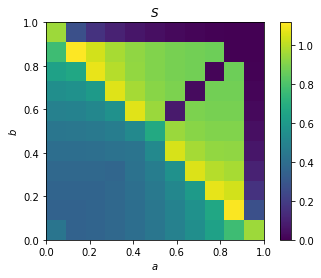

In [120]:
Z = np.vstack(S[:, :]).astype(np.float)
plt.imshow(Z, extent=[a_list[0], a_list[-1], b_list[0], b_list[-1]], origin='lower',
           cmap='viridis')
plt.colorbar()
plt.axis(aspect='image')
plt.title(r"$S$")
plt.xlabel(r'$a$')
plt.ylabel(r'$b$')
plt.savefig(f'Entanglement Entropy L={L}.png')

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


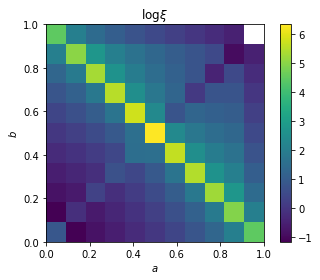

In [121]:
Z = np.vstack(xi[:, :]).astype(np.float)
Z = np.vstack(np.log(Z[:, :])).astype(np.float)
plt.imshow(Z, extent=[a_list[0], a_list[-1], b_list[0], b_list[-1]], origin='lower',
           cmap='viridis')
plt.colorbar()
plt.axis(aspect='image')
plt.title(r"$\log\xi$")
plt.xlabel(r'$a$')
plt.ylabel(r'$b$')
plt.savefig(f'Logarithm of Correlation Length L={L}.png')

In [109]:
S_dict

{(0.0, 0.0, 8): 0.416771500640735,
 (0.0, 0.0, 10): 0.15697692443599126,
 (0.0, 0.0, 12): 0.4258018965322159,
 (0.0, 0.0, 14): 0.6468916799954884,
 (0.0, 0.0, 16): 0.5795583341806441,
 (0.0, 0.0, 18): 0.6986950419110849,
 (0.0, 0.0, 20): 0.38767699339607964,
 (0.0, 0.0, 22): 0.20710711729406017,
 (0.0, 0.0, 24): 0.0697652575713141,
 (0.0, 0.0, 26): 0.6146783198830121,
 (0.0, 0.0, 28): 0.67537132139718,
 (0.0, 0.0, 30): 0.6224116996757245,
 (0.0, 0.0, 32): 0.9570337096567362,
 (0.0, 0.0, 34): 0.9795338536954322,
 (0.0, 0.0, 36): 0.21994518898125237,
 (0.0, 0.0, 38): 0.17006380551097217,
 (0.0, 0.0, 40): 0.2978018467381609,
 (0.0, 0.0, 42): 0.9532883997947592,
 (0.0, 0.0, 44): 0.17103390171382465,
 (0.0, 0.0, 46): 0.39396924594700183,
 (0.0, 0.0, 48): 0.36865967438260083,
 (0.0, 0.0, 50): 0.4327861634536027,
 (0.0, 0.0, 52): 0.6120447513328859,
 (0.0, 0.0, 54): 1.078152522246191,
 (0.0, 0.0, 56): 0.42251902926438945,
 (0.0, 0.0, 58): 0.4061590099976964,
 (0.0, 0.1, 8): 0.3497097782611829

Tests with increasing, non-canonical method.